# Summarize recorded interactions

In [1]:
# Import some useful modules
import json
import sys
import networkx
import pandas
import numpy

import matplotlib.pyplot as plotter
from pathlib import Path
from IPython.display import display, HTML

Specify the RESULTS_DIR used for recording interactions

In [2]:
# USE ABSOLUTE PATHS HERE!!!
DATA_DIR = Path("/home/ashinde/PhD/CaffineBravery/results_l3/")
DATA_FILES = list(DATA_DIR.iterdir())

for _file in DATA_FILES:
    print(f"Using {_file}")

Using /home/ashinde/PhD/CaffineBravery/results_l3/843710487_attl0_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results_l3/1458091526_attl0_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results_l3/1275028674_defl1_active_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results_l3/455888635_defl1_passive_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results_l3/1164365897_attl2_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results_l3/635611994_defl3_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results_l3/trace.0.json
Using /home/ashinde/PhD/CaffineBravery/results_l3/trace.1.json
Using /home/ashinde/PhD/CaffineBravery/results_l3/trace.2.json
Using /home/ashinde/PhD/CaffineBravery/results_l3/trace.3.json
Using /home/ashinde/PhD/CaffineBravery/results_l3/trace.4.json
Using /home/ashinde/PhD/CaffineBravery/results_l3/trace.5.json
Using /home/ashinde/PhD/CaffineBravery/results_l3/trace.6.json
Using /home/ashinde/PhD/CaffineBravery/results_l3/trace

In [3]:
# Common utility function for reading JSON from a file
def load_json(fname):

    data = None

    with open(fname) as f:
        data = json.load(f)

    return data

---
Take a look at the policy graphs of the agents

In [4]:
# Draw policy graphs
import graphviz


def get_edge_map(edges):
    start = 0
    edge_map = {}
    multi_edge_map = {}
    
    for src, children in edges.items():
        for obs, child in children.items():
            
            # index this observation if not already done
            if obs not in edge_map.keys():
                edge_map[obs] = start
                start += 1
                
            # Add obs to (src, dst) key
            if (src, child) not in multi_edge_map.keys():
                multi_edge_map[(src, child)] = [edge_map[obs]]
            
            else:
                _l = multi_edge_map[(src, child)]
                _l.append(edge_map[obs])
                multi_edge_map[(src, child)] = _l
                
    return edge_map, multi_edge_map


def get_graphviz_graph(json_data):
    
    # initialize empty graph
    G = graphviz.Digraph()
    
    nodes = json_data["nodes"]
    edges = json_data["edges"]
    
    edge_map, multi_edge_map = get_edge_map(edges)
    print(f"Edge map is:")
    for e, i in edge_map.items():
        print(f"{i}:{e}")

    for k, v in nodes.items():
        l = v["act"] + "_start" if "start" in v.keys() else v["act"]
        G.node(k, label=l, fontsize="12")
        
    for s, t in multi_edge_map.keys():
        G.edge(s, t, label=str(multi_edge_map[(s, t)]))
        
    return G

---
## Plot policy graphs

Displaying /home/ashinde/PhD/CaffineBravery/results_l3/843710487_attl0_pol_graph.json
Edge map is:
0:[(AccessPerm, denied), (HostObs, none), (ActionResult, failure), (ConnStatus, active)]
1:[(AccessPerm, denied), (HostObs, none), (ActionResult, success), (ConnStatus, active)]
2:[(AccessPerm, denied), (HostObs, user_files), (ActionResult, failure), (ConnStatus, active)]
3:[(AccessPerm, denied), (HostObs, user_files), (ActionResult, success), (ConnStatus, active)]
4:[(AccessPerm, auth), (HostObs, user_files), (ActionResult, failure), (ConnStatus, terminated)]
5:[(AccessPerm, auth), (HostObs, user_files), (ActionResult, success), (ConnStatus, terminated)]
6:[(AccessPerm, auth), (HostObs, none), (ActionResult, failure), (ConnStatus, terminated)]
7:[(AccessPerm, auth), (HostObs, none), (ActionResult, success), (ConnStatus, terminated)]
8:[(AccessPerm, denied), (HostObs, user_files), (ActionResult, failure), (ConnStatus, terminated)]
9:[(AccessPerm, denied), (HostObs, user_files), (ActionRes

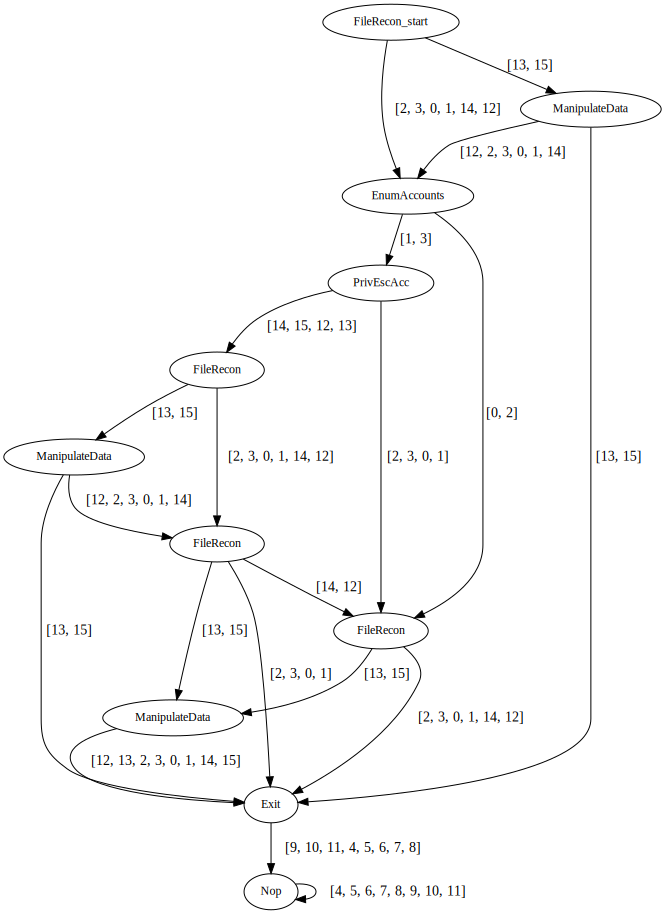

Displaying /home/ashinde/PhD/CaffineBravery/results_l3/1458091526_attl0_pol_graph.json
Edge map is:
0:[(AccessPerm, denied), (HostObs, user_files), (ActionResult, success), (ConnStatus, terminated)]
1:[(AccessPerm, denied), (HostObs, none), (ActionResult, failure), (ConnStatus, terminated)]
2:[(AccessPerm, denied), (HostObs, none), (ActionResult, success), (ConnStatus, terminated)]
3:[(AccessPerm, auth), (HostObs, user_files), (ActionResult, failure), (ConnStatus, terminated)]
4:[(AccessPerm, auth), (HostObs, user_files), (ActionResult, success), (ConnStatus, terminated)]
5:[(AccessPerm, auth), (HostObs, none), (ActionResult, failure), (ConnStatus, terminated)]
6:[(AccessPerm, auth), (HostObs, none), (ActionResult, success), (ConnStatus, terminated)]
7:[(AccessPerm, denied), (HostObs, user_files), (ActionResult, failure), (ConnStatus, terminated)]
8:[(AccessPerm, denied), (HostObs, none), (ActionResult, failure), (ConnStatus, active)]
9:[(AccessPerm, denied), (HostObs, none), (ActionRe

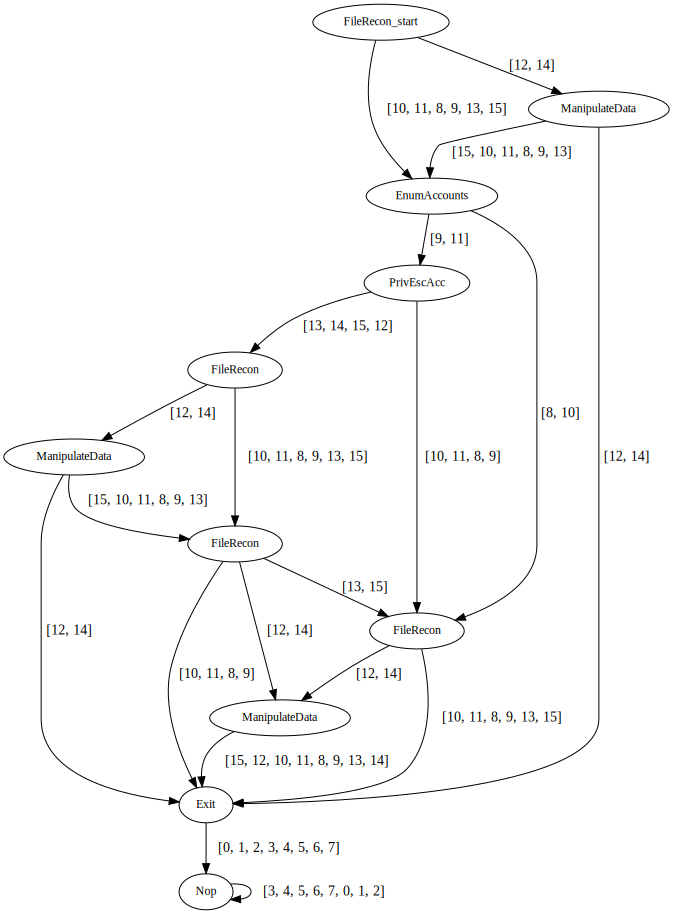

Displaying /home/ashinde/PhD/CaffineBravery/results_l3/1275028674_defl1_active_pol_graph.json
Edge map is:
0:[(EndPtAlerts, file_enum)]
1:[(EndPtAlerts, file_write)]
2:[(EndPtAlerts, login_activity)]
3:[(EndPtAlerts, none)]


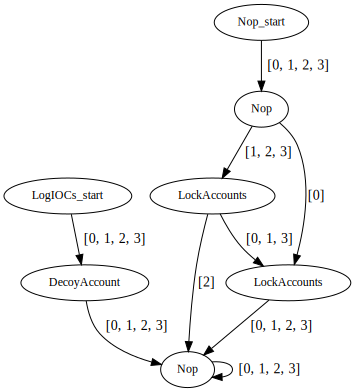

Displaying /home/ashinde/PhD/CaffineBravery/results_l3/455888635_defl1_passive_pol_graph.json
Edge map is:
0:[(EndPtAlerts, file_enum)]
1:[(EndPtAlerts, file_write)]
2:[(EndPtAlerts, login_activity)]
3:[(EndPtAlerts, none)]


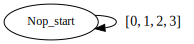

Displaying /home/ashinde/PhD/CaffineBravery/results_l3/1164365897_attl2_pol_graph.json
Edge map is:
0:[(AccessPerm, auth), (HostObs, none), (ActionResult, success), (ConnStatus, active), (DefenseObs, acc_policy_change)]
1:[(AccessPerm, auth), (HostObs, none), (ActionResult, success), (ConnStatus, active), (DefenseObs, perms_change)]
2:[(AccessPerm, auth), (HostObs, none), (ActionResult, success), (ConnStatus, active), (DefenseObs, none)]
3:[(AccessPerm, denied), (HostObs, user_files), (ActionResult, failure), (ConnStatus, active), (DefenseObs, acc_policy_change)]
4:[(AccessPerm, denied), (HostObs, user_files), (ActionResult, failure), (ConnStatus, active), (DefenseObs, none)]
5:[(AccessPerm, denied), (HostObs, user_files), (ActionResult, failure), (ConnStatus, active), (DefenseObs, perms_change)]
6:[(AccessPerm, denied), (HostObs, none), (ActionResult, failure), (ConnStatus, active), (DefenseObs, acc_policy_change)]
7:[(AccessPerm, denied), (HostObs, none), (ActionResult, failure), (Co

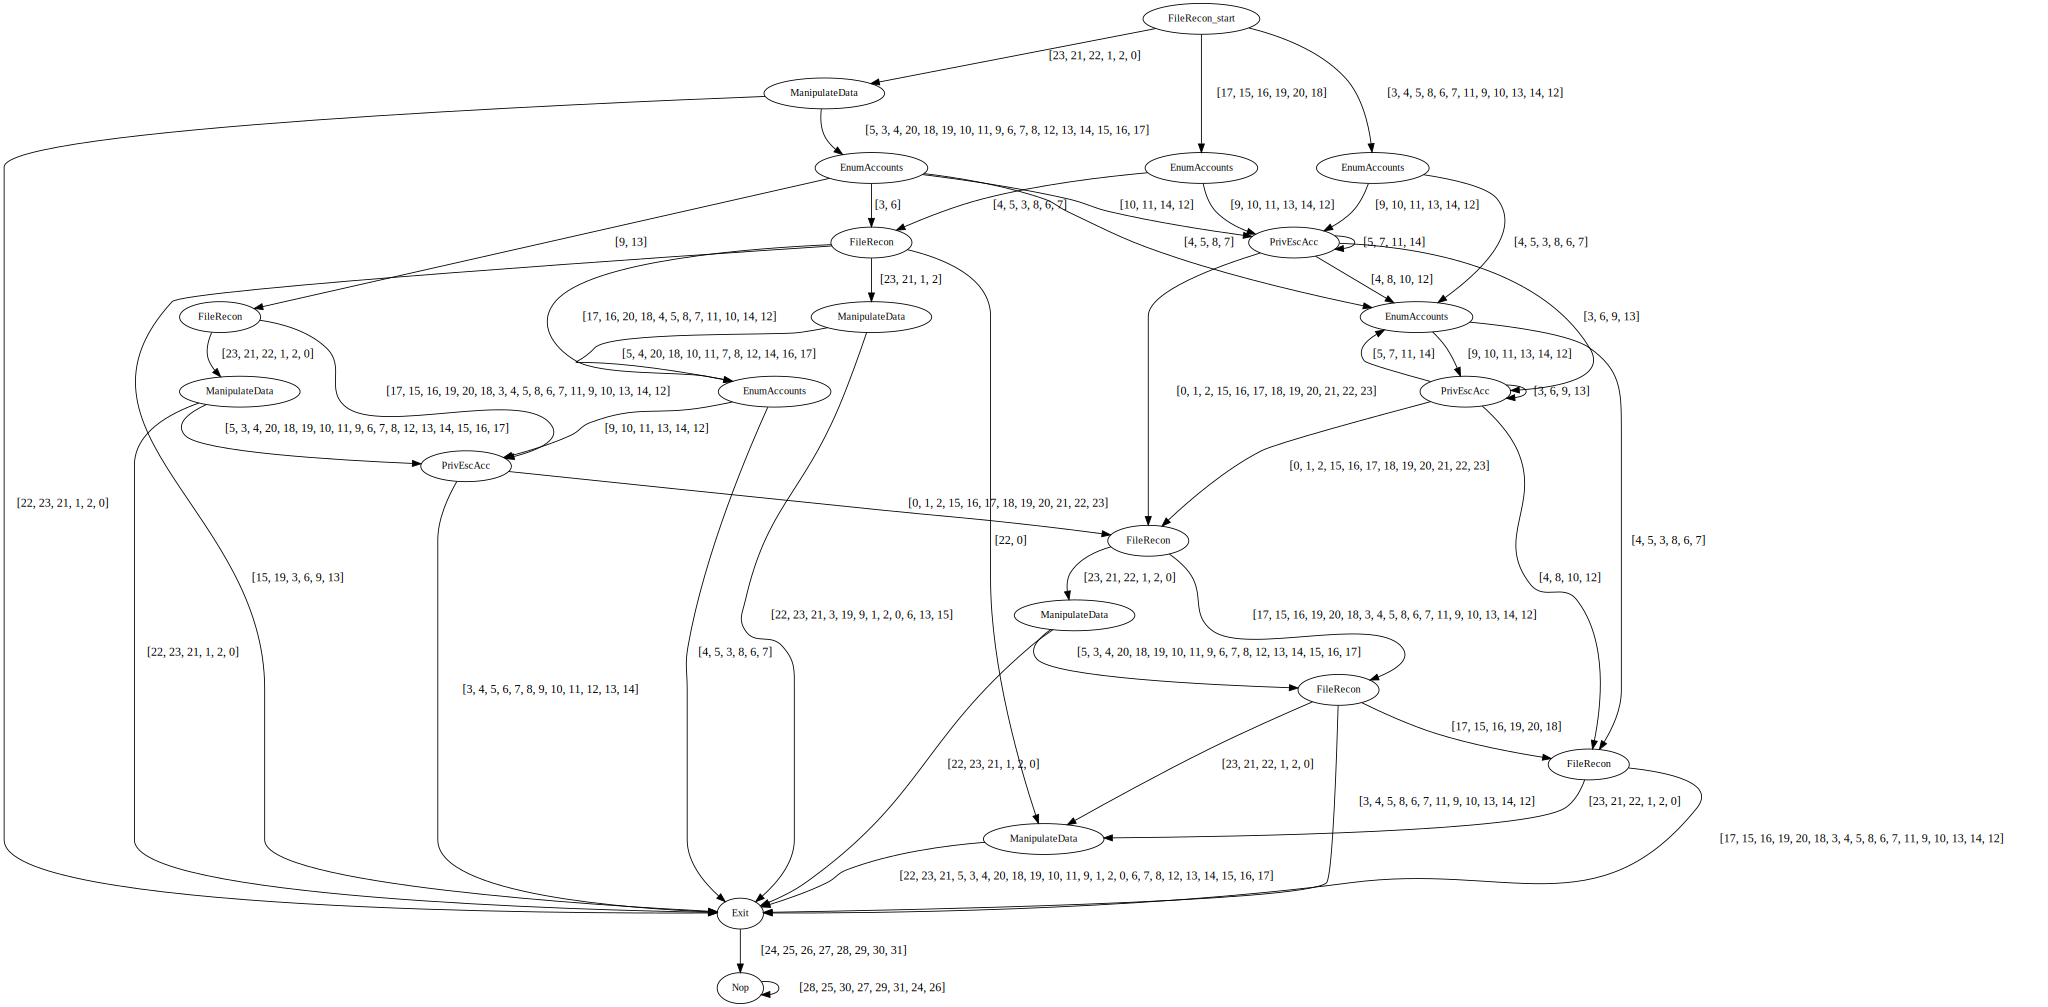

Displaying /home/ashinde/PhD/CaffineBravery/results_l3/635611994_defl3_pol_graph.json
Edge map is:
0:[(EndPtAlerts, file_enum)]
1:[(EndPtAlerts, file_write)]
2:[(EndPtAlerts, login_activity)]
3:[(EndPtAlerts, none)]


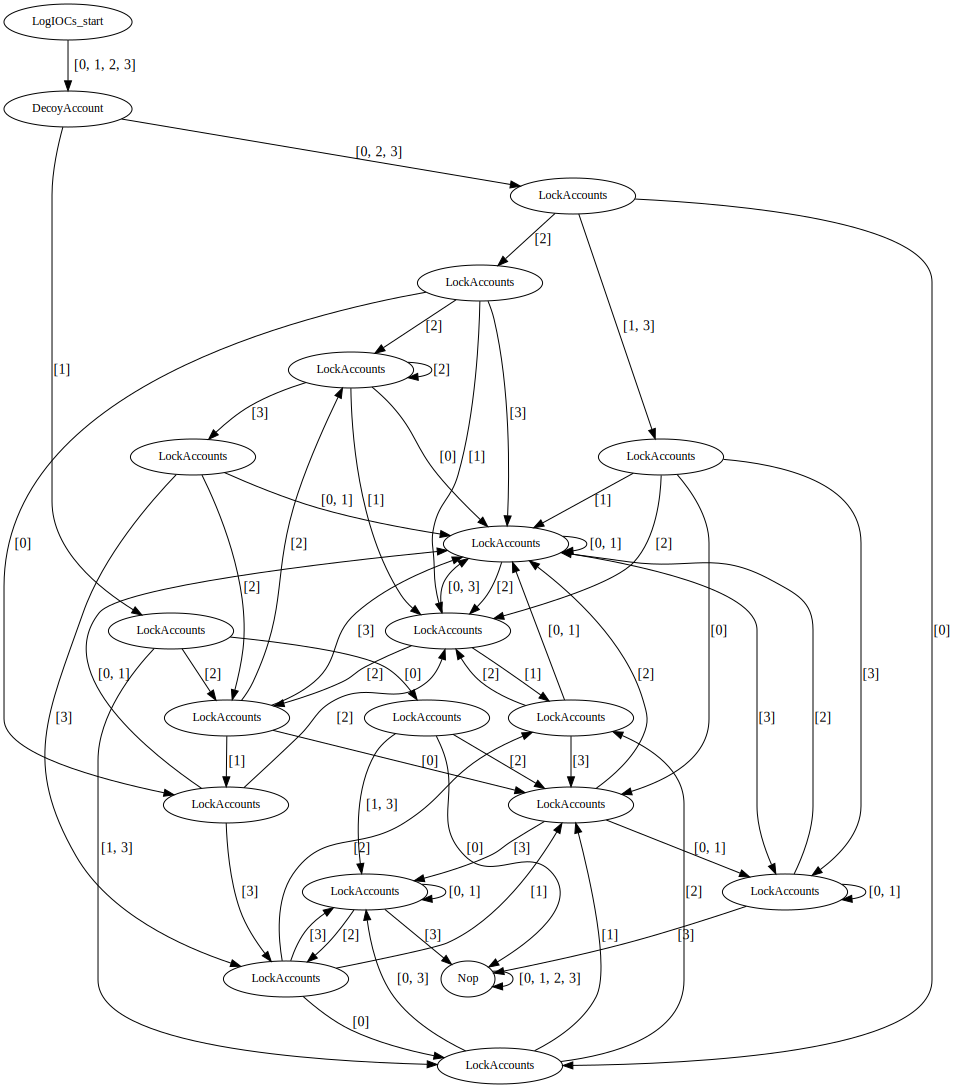

In [5]:
GRAPH_FILES = list(filter(lambda x: "pol_graph" in x.parts[-1], DATA_FILES))

for g in GRAPH_FILES:
    print(f"Displaying {g}")
    data = load_json(g)
    G = get_graphviz_graph(data)
    display(G)

---
Summarize the actual interactions

In [6]:
# Get the trace files
TRACE_FILES = list(filter(lambda x: "trace" in x.parts[-1], DATA_FILES))

for _file in TRACE_FILES:
    print(f"Using trace from {_file}")


Using trace from /home/ashinde/PhD/CaffineBravery/results_l3/trace.0.json
Using trace from /home/ashinde/PhD/CaffineBravery/results_l3/trace.1.json
Using trace from /home/ashinde/PhD/CaffineBravery/results_l3/trace.2.json
Using trace from /home/ashinde/PhD/CaffineBravery/results_l3/trace.3.json
Using trace from /home/ashinde/PhD/CaffineBravery/results_l3/trace.4.json
Using trace from /home/ashinde/PhD/CaffineBravery/results_l3/trace.5.json
Using trace from /home/ashinde/PhD/CaffineBravery/results_l3/trace.6.json
Using trace from /home/ashinde/PhD/CaffineBravery/results_l3/trace.7.json
Using trace from /home/ashinde/PhD/CaffineBravery/results_l3/trace.8.json
Using trace from /home/ashinde/PhD/CaffineBravery/results_l3/trace.9.json


+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                        file_enum
2                               1.0                        file_enum
3                               1.0                   login_activity
4                               1.0                   login_activity
5                               1.0                        file_enum
6                               1.0                   login_activity
7                               1.0                             none
8                               1.0                             none
9                               1.0                             none

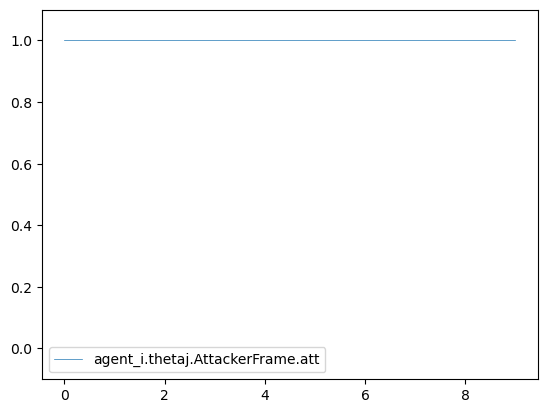

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.500000                        0.500000   
2                         0.436364                        0.563636   
3                         0.906788                        0.093212   
4                         0.993562                        0.006438   
5                         0.980542                        0.019458   
6                         0.980542                        0.019458   
7                         0.980542                        0.019458   
8                         0.980542                        0.019458   
9                         0.980542                        0.019458   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                         none   
1                          denied                         none   
2                          denied                         none   
3                          denied                   user_files   
4                          denied                   user_files   
5                          denied                         none   
6                          denied                         none   
7                            auth                   user_files   
8                            auth                         none   
9                            auth                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                          active   
2                           success                          active   
3                           failure                          active   
4                           failure                          active   
5                           failure                          active   
6                           failure                      terminated   
7                           failure                      terminated   
8                           success                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2               acc_policy_change  
3               acc_policy_change  
4               acc_policy_change  
5               acc_policy_change  
6                            none  
7                            none  
8                            none  
9                            none

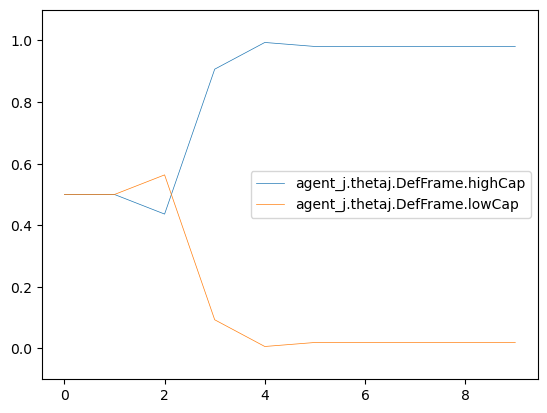

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user agent_i.action  \
0                     0.0                     1.0        LogIOCs   
1                     0.0                     1.0   DecoyAccount   
2                     0.0                     1.0   LockAccounts   
3                     0.0                     1.0   LockAccounts   
4                     0.0                     1.0   LockAccounts   
5                     0.0                     1.0   LockAccounts   
6                     0.0                     1.0   LockAccounts   
7                     0.0                     1.0   LockAccounts   
8                     0.0                     1.0   LockAccounts   
9                     0.0                     1.0   LockAccounts   

  agent_j.action  
0      FileRecon  
1   EnumAccounts  
2   EnumAccounts  
3     PrivEscAcc  
4     PrivEscAcc  
5      FileRecon  
6           Exit  
7            Nop  
8            Nop  
9            Nop

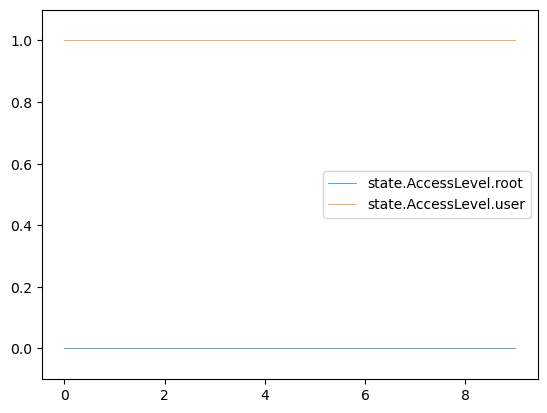

agent_i.AccessLevel.root  agent_i.AccessLevel.user agent_i.action  \
0                       0.0                       1.0        LogIOCs   
1                       0.0                       1.0   DecoyAccount   
2                       0.0                       1.0   LockAccounts   
3                       0.0                       1.0   LockAccounts   
4                       0.0                       1.0   LockAccounts   
5                       0.0                       1.0   LockAccounts   
6                       0.0                       1.0   LockAccounts   
7                       0.0                       1.0   LockAccounts   
8                       0.0                       1.0   LockAccounts   
9                       0.0                       1.0   LockAccounts   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1   EnumAccounts                        file_enum  
2   EnumAccounts                        file_enum  
3     PrivEscAcc                   login_activity  
4     PrivEscAcc                   login_activity  
5      FileRecon                        file_enum  
6           Exit                   login_activity  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

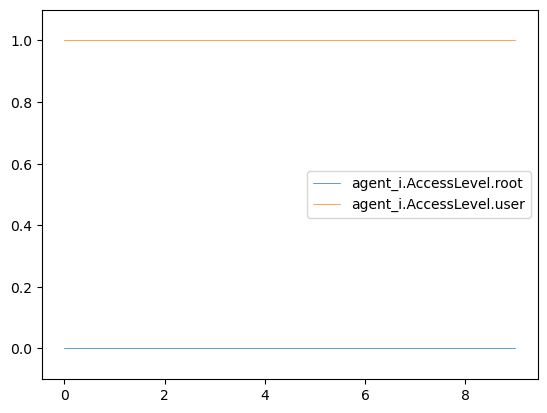

agent_j.AccessLevel.root  agent_j.AccessLevel.user agent_j.action  \
0                       0.0                       1.0      FileRecon   
1                       0.0                       1.0   EnumAccounts   
2                       0.0                       1.0   EnumAccounts   
3                       0.0                       1.0     PrivEscAcc   
4                       0.0                       1.0     PrivEscAcc   
5                       0.0                       1.0      FileRecon   
6                       0.0                       1.0           Exit   
7                       0.0                       1.0            Nop   
8                       0.0                       1.0            Nop   
9                       0.0                       1.0            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                          denied                         none   
1   DecoyAccount                          denied                         none   
2   LockAccounts                          denied                         none   
3   LockAccounts                          denied                   user_files   
4   LockAccounts                          denied                   user_files   
5   LockAccounts                          denied                         none   
6   LockAccounts                          denied                         none   
7   LockAccounts                            auth                   user_files   
8   LockAccounts                            auth                         none   
9   LockAccounts                            auth                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                          active   
2                           success                          active   
3                           failure                          active   
4                           failure                          active   
5                           failure                          active   
6                           failure                      terminated   
7                           failure                      terminated   
8                           success                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2               acc_policy_change  
3               acc_policy_change  
4               acc_policy_change  
5               acc_policy_change  
6                            none  
7                            none  
8                            none  
9                            none

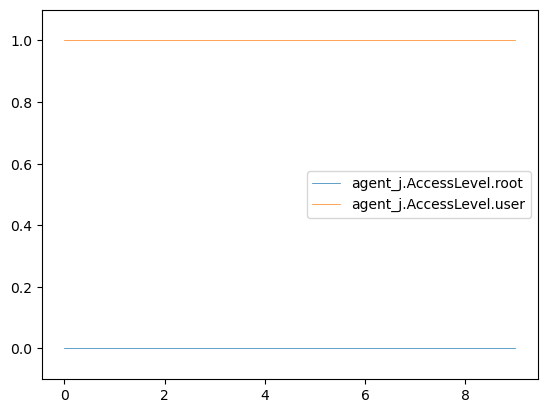

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes agent_i.action agent_j.action
0                   1.0                    0.0        LogIOCs      FileRecon
1                   1.0                    0.0   DecoyAccount   EnumAccounts
2                   0.0                    1.0   LockAccounts   EnumAccounts
3                   0.0                    1.0   LockAccounts     PrivEscAcc
4                   0.0                    1.0   LockAccounts     PrivEscAcc
5                   0.0                    1.0   LockAccounts      FileRecon
6                   0.0                    1.0   LockAccounts           Exit
7                   0.0                    1.0   LockAccounts            Nop
8                   0.0                    1.0   LockAccounts            Nop
9                   0.0                    1.0   LockAccounts            Nop

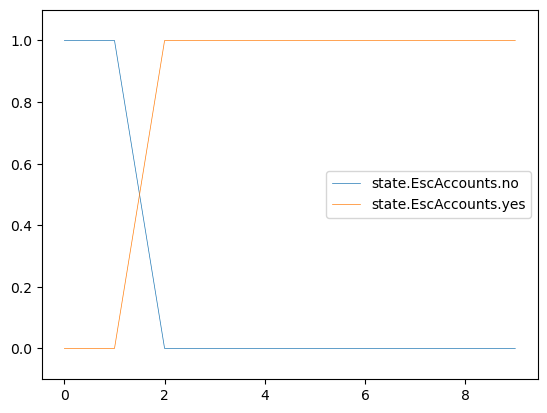

agent_i.EscAccounts.no  agent_i.EscAccounts.yes agent_i.action  \
0                     1.0                      0.0        LogIOCs   
1                     1.0                      0.0   DecoyAccount   
2                     0.0                      1.0   LockAccounts   
3                     0.0                      1.0   LockAccounts   
4                     0.0                      1.0   LockAccounts   
5                     0.0                      1.0   LockAccounts   
6                     0.0                      1.0   LockAccounts   
7                     0.0                      1.0   LockAccounts   
8                     0.0                      1.0   LockAccounts   
9                     0.0                      1.0   LockAccounts   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1   EnumAccounts                        file_enum  
2   EnumAccounts                        file_enum  
3     PrivEscAcc                   login_activity  
4     PrivEscAcc                   login_activity  
5      FileRecon                        file_enum  
6           Exit                   login_activity  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

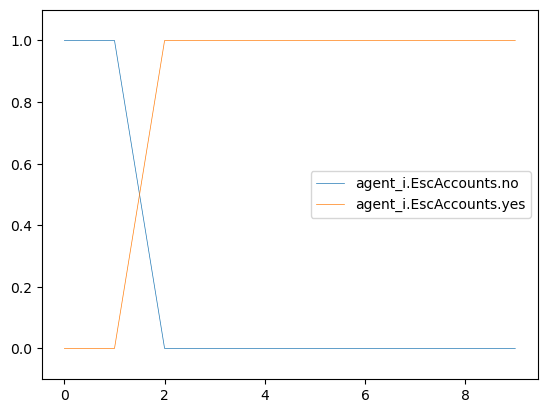

agent_j.EscAccounts.no  agent_j.EscAccounts.yes agent_j.action  \
0                0.500000                 0.500000      FileRecon   
1                0.500000                 0.500000   EnumAccounts   
2                0.613636                 0.386364   EnumAccounts   
3                0.253293                 0.746707     PrivEscAcc   
4                0.303063                 0.696937     PrivEscAcc   
5                0.915957                 0.084043      FileRecon   
6                0.915957                 0.084043           Exit   
7                0.915957                 0.084043            Nop   
8                0.915957                 0.084043            Nop   
9                0.915957                 0.084043            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                          denied                         none   
1   DecoyAccount                          denied                         none   
2   LockAccounts                          denied                         none   
3   LockAccounts                          denied                   user_files   
4   LockAccounts                          denied                   user_files   
5   LockAccounts                          denied                         none   
6   LockAccounts                          denied                         none   
7   LockAccounts                            auth                   user_files   
8   LockAccounts                            auth                         none   
9   LockAccounts                            auth                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                          active   
2                           success                          active   
3                           failure                          active   
4                           failure                          active   
5                           failure                          active   
6                           failure                      terminated   
7                           failure                      terminated   
8                           success                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2               acc_policy_change  
3               acc_policy_change  
4               acc_policy_change  
5               acc_policy_change  
6                            none  
7                            none  
8                            none  
9                            none

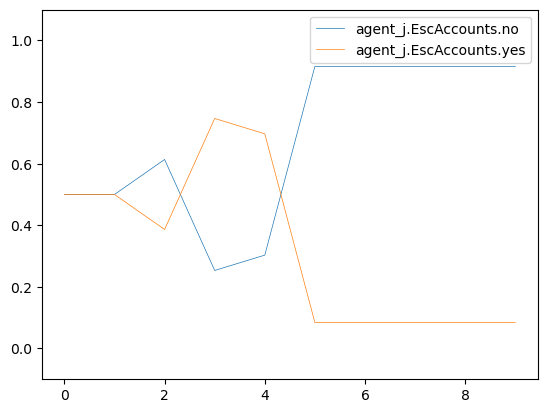

=============AccFound============


state.AccFound.no  state.AccFound.yes agent_i.action agent_j.action
0                1.0                 0.0        LogIOCs      FileRecon
1                1.0                 0.0   DecoyAccount   EnumAccounts
2                1.0                 0.0   LockAccounts   EnumAccounts
3                0.0                 1.0   LockAccounts     PrivEscAcc
4                0.0                 1.0   LockAccounts     PrivEscAcc
5                0.0                 1.0   LockAccounts      FileRecon
6                0.0                 1.0   LockAccounts           Exit
7                0.0                 1.0   LockAccounts            Nop
8                0.0                 1.0   LockAccounts            Nop
9                0.0                 1.0   LockAccounts            Nop

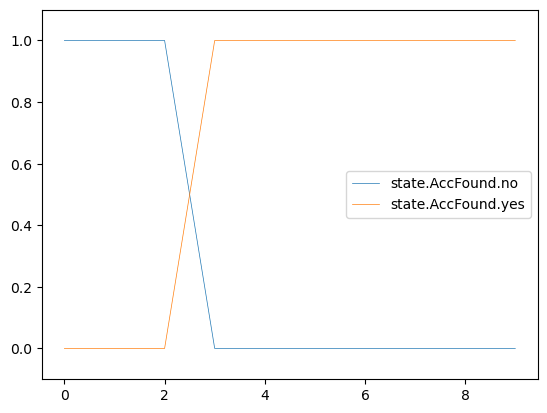

agent_i.AccFound.no  agent_i.AccFound.yes agent_i.action agent_j.action  \
0             1.000000              0.000000        LogIOCs      FileRecon   
1             1.000000              0.000000   DecoyAccount   EnumAccounts   
2             0.305224              0.694776   LockAccounts   EnumAccounts   
3             0.400784              0.599216   LockAccounts     PrivEscAcc   
4             0.125245              0.874755   LockAccounts     PrivEscAcc   
5             0.053204              0.946797   LockAccounts      FileRecon   
6             0.042272              0.957728   LockAccounts           Exit   
7             0.030610              0.969390   LockAccounts            Nop   
8             0.041531              0.958469   LockAccounts            Nop   
9             0.061287              0.938713   LockAccounts            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                        file_enum  
3                   login_activity  
4                   login_activity  
5                        file_enum  
6                   login_activity  
7                             none  
8                             none  
9                             none

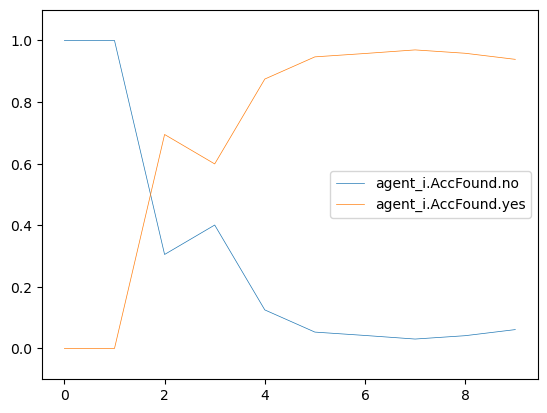

agent_j.AccFound.no  agent_j.AccFound.yes agent_j.action agent_i.action  \
0             1.000000              0.000000      FileRecon        LogIOCs   
1             1.000000              0.000000   EnumAccounts   DecoyAccount   
2             0.920454              0.079545   EnumAccounts   LockAccounts   
3             0.278369              0.721631     PrivEscAcc   LockAccounts   
4             0.330871              0.669129     PrivEscAcc   LockAccounts   
5             1.000000              0.000000      FileRecon   LockAccounts   
6             1.000000              0.000000           Exit   LockAccounts   
7             1.000000              0.000000            Nop   LockAccounts   
8             1.000000              0.000000            Nop   LockAccounts   
9             1.000000              0.000000            Nop   LockAccounts   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                         none   
1                          denied                         none   
2                          denied                         none   
3                          denied                   user_files   
4                          denied                   user_files   
5                          denied                         none   
6                          denied                         none   
7                            auth                   user_files   
8                            auth                         none   
9                            auth                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                          active   
2                           success                          active   
3                           failure                          active   
4                           failure                          active   
5                           failure                          active   
6                           failure                      terminated   
7                           failure                      terminated   
8                           success                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2               acc_policy_change  
3               acc_policy_change  
4               acc_policy_change  
5               acc_policy_change  
6                            none  
7                            none  
8                            none  
9                            none

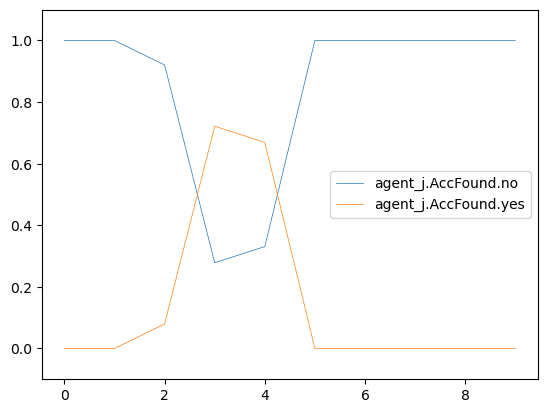

=============DataFound============


state.DataFound.no  state.DataFound.yes agent_i.action agent_j.action
0                 1.0                  0.0        LogIOCs      FileRecon
1                 1.0                  0.0   DecoyAccount   EnumAccounts
2                 1.0                  0.0   LockAccounts   EnumAccounts
3                 1.0                  0.0   LockAccounts     PrivEscAcc
4                 1.0                  0.0   LockAccounts     PrivEscAcc
5                 1.0                  0.0   LockAccounts      FileRecon
6                 1.0                  0.0   LockAccounts           Exit
7                 1.0                  0.0   LockAccounts            Nop
8                 1.0                  0.0   LockAccounts            Nop
9                 1.0                  0.0   LockAccounts            Nop

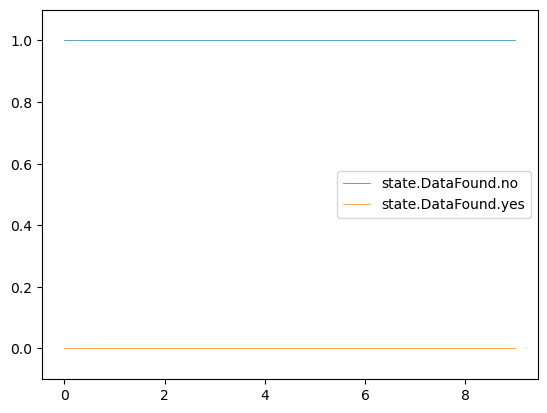

agent_i.DataFound.no  agent_i.DataFound.yes agent_i.action agent_j.action  \
0                   1.0                    0.0        LogIOCs      FileRecon   
1                   1.0                    0.0   DecoyAccount   EnumAccounts   
2                   1.0                    0.0   LockAccounts   EnumAccounts   
3                   1.0                    0.0   LockAccounts     PrivEscAcc   
4                   1.0                    0.0   LockAccounts     PrivEscAcc   
5                   1.0                    0.0   LockAccounts      FileRecon   
6                   1.0                    0.0   LockAccounts           Exit   
7                   1.0                    0.0   LockAccounts            Nop   
8                   1.0                    0.0   LockAccounts            Nop   
9                   1.0                    0.0   LockAccounts            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                        file_enum  
3                   login_activity  
4                   login_activity  
5                        file_enum  
6                   login_activity  
7                             none  
8                             none  
9                             none

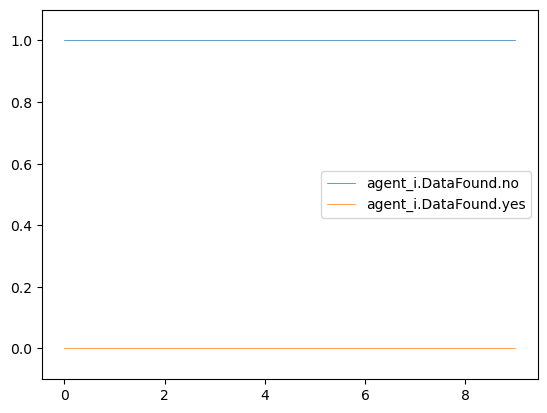

agent_j.DataFound.no  agent_j.DataFound.yes agent_j.action agent_i.action  \
0                   1.0                    0.0      FileRecon        LogIOCs   
1                   1.0                    0.0   EnumAccounts   DecoyAccount   
2                   1.0                    0.0   EnumAccounts   LockAccounts   
3                   1.0                    0.0     PrivEscAcc   LockAccounts   
4                   1.0                    0.0     PrivEscAcc   LockAccounts   
5                   1.0                    0.0      FileRecon   LockAccounts   
6                   1.0                    0.0           Exit   LockAccounts   
7                   1.0                    0.0            Nop   LockAccounts   
8                   1.0                    0.0            Nop   LockAccounts   
9                   1.0                    0.0            Nop   LockAccounts   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                         none   
1                          denied                         none   
2                          denied                         none   
3                          denied                   user_files   
4                          denied                   user_files   
5                          denied                         none   
6                          denied                         none   
7                            auth                   user_files   
8                            auth                         none   
9                            auth                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                          active   
2                           success                          active   
3                           failure                          active   
4                           failure                          active   
5                           failure                          active   
6                           failure                      terminated   
7                           failure                      terminated   
8                           success                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2               acc_policy_change  
3               acc_policy_change  
4               acc_policy_change  
5               acc_policy_change  
6                            none  
7                            none  
8                            none  
9                            none

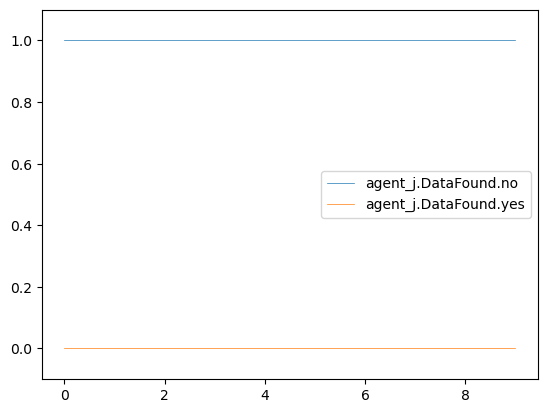

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes agent_i.action agent_j.action
0                    1.0                     0.0        LogIOCs      FileRecon
1                    1.0                     0.0   DecoyAccount   EnumAccounts
2                    1.0                     0.0   LockAccounts   EnumAccounts
3                    1.0                     0.0   LockAccounts     PrivEscAcc
4                    1.0                     0.0   LockAccounts     PrivEscAcc
5                    1.0                     0.0   LockAccounts      FileRecon
6                    1.0                     0.0   LockAccounts           Exit
7                    1.0                     0.0   LockAccounts            Nop
8                    1.0                     0.0   LockAccounts            Nop
9                    1.0                     0.0   LockAccounts            Nop

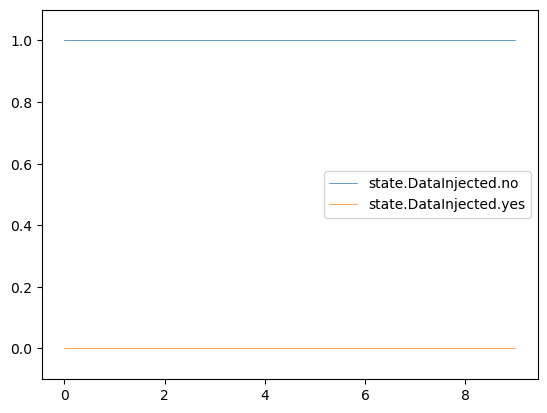

agent_i.DataInjected.no  agent_i.DataInjected.yes agent_i.action  \
0                      1.0                       0.0        LogIOCs   
1                      1.0                       0.0   DecoyAccount   
2                      1.0                       0.0   LockAccounts   
3                      1.0                       0.0   LockAccounts   
4                      1.0                       0.0   LockAccounts   
5                      1.0                       0.0   LockAccounts   
6                      1.0                       0.0   LockAccounts   
7                      1.0                       0.0   LockAccounts   
8                      1.0                       0.0   LockAccounts   
9                      1.0                       0.0   LockAccounts   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1   EnumAccounts                        file_enum  
2   EnumAccounts                        file_enum  
3     PrivEscAcc                   login_activity  
4     PrivEscAcc                   login_activity  
5      FileRecon                        file_enum  
6           Exit                   login_activity  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

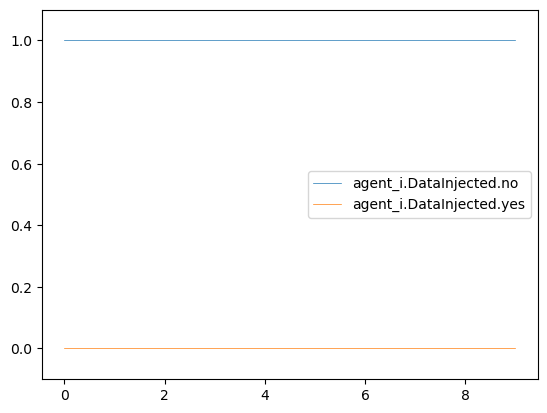

agent_j.DataInjected.no  agent_j.DataInjected.yes agent_j.action  \
0                      1.0                       0.0      FileRecon   
1                      1.0                       0.0   EnumAccounts   
2                      1.0                       0.0   EnumAccounts   
3                      1.0                       0.0     PrivEscAcc   
4                      1.0                       0.0     PrivEscAcc   
5                      1.0                       0.0      FileRecon   
6                      1.0                       0.0           Exit   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                          denied                         none   
1   DecoyAccount                          denied                         none   
2   LockAccounts                          denied                         none   
3   LockAccounts                          denied                   user_files   
4   LockAccounts                          denied                   user_files   
5   LockAccounts                          denied                         none   
6   LockAccounts                          denied                         none   
7   LockAccounts                            auth                   user_files   
8   LockAccounts                            auth                         none   
9   LockAccounts                            auth                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                          active   
2                           success                          active   
3                           failure                          active   
4                           failure                          active   
5                           failure                          active   
6                           failure                      terminated   
7                           failure                      terminated   
8                           success                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2               acc_policy_change  
3               acc_policy_change  
4               acc_policy_change  
5               acc_policy_change  
6                            none  
7                            none  
8                            none  
9                            none

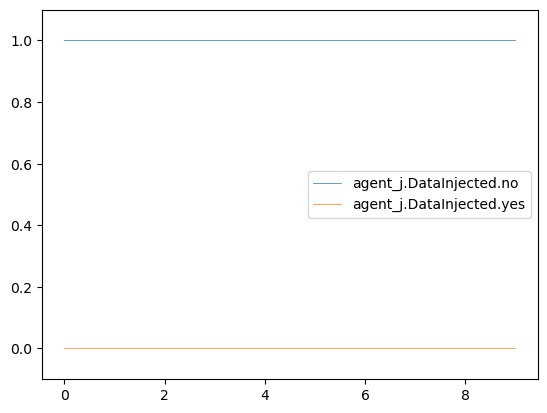

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes agent_i.action agent_j.action
0                   0.0                    1.0        LogIOCs      FileRecon
1                   0.0                    1.0   DecoyAccount   EnumAccounts
2                   0.0                    1.0   LockAccounts   EnumAccounts
3                   0.0                    1.0   LockAccounts     PrivEscAcc
4                   0.0                    1.0   LockAccounts     PrivEscAcc
5                   0.0                    1.0   LockAccounts      FileRecon
6                   0.0                    1.0   LockAccounts           Exit
7                   0.0                    1.0   LockAccounts            Nop
8                   0.0                    1.0   LockAccounts            Nop
9                   0.0                    1.0   LockAccounts            Nop

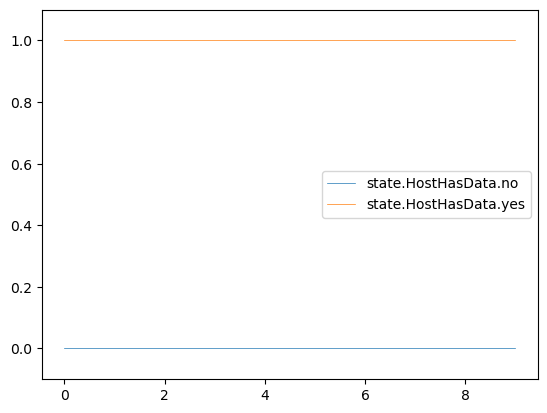

agent_i.HostHasData.no  agent_i.HostHasData.yes agent_i.action  \
0                     0.0                      1.0        LogIOCs   
1                     0.0                      1.0   DecoyAccount   
2                     0.0                      1.0   LockAccounts   
3                     0.0                      1.0   LockAccounts   
4                     0.0                      1.0   LockAccounts   
5                     0.0                      1.0   LockAccounts   
6                     0.0                      1.0   LockAccounts   
7                     0.0                      1.0   LockAccounts   
8                     0.0                      1.0   LockAccounts   
9                     0.0                      1.0   LockAccounts   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1   EnumAccounts                        file_enum  
2   EnumAccounts                        file_enum  
3     PrivEscAcc                   login_activity  
4     PrivEscAcc                   login_activity  
5      FileRecon                        file_enum  
6           Exit                   login_activity  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

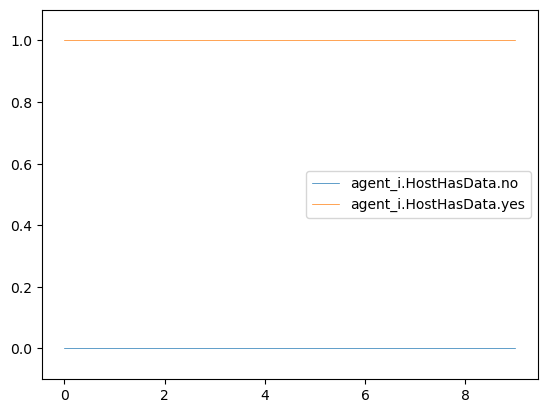

agent_j.HostHasData.no  agent_j.HostHasData.yes agent_j.action  \
0                0.500000                 0.500000      FileRecon   
1                0.606061                 0.393939   EnumAccounts   
2                0.606061                 0.393939   EnumAccounts   
3                0.606061                 0.393939     PrivEscAcc   
4                0.606061                 0.393939     PrivEscAcc   
5                0.606061                 0.393939      FileRecon   
6                0.647249                 0.352751           Exit   
7                0.647249                 0.352751            Nop   
8                0.647249                 0.352751            Nop   
9                0.647249                 0.352751            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                          denied                         none   
1   DecoyAccount                          denied                         none   
2   LockAccounts                          denied                         none   
3   LockAccounts                          denied                   user_files   
4   LockAccounts                          denied                   user_files   
5   LockAccounts                          denied                         none   
6   LockAccounts                          denied                         none   
7   LockAccounts                            auth                   user_files   
8   LockAccounts                            auth                         none   
9   LockAccounts                            auth                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                          active   
2                           success                          active   
3                           failure                          active   
4                           failure                          active   
5                           failure                          active   
6                           failure                      terminated   
7                           failure                      terminated   
8                           success                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2               acc_policy_change  
3               acc_policy_change  
4               acc_policy_change  
5               acc_policy_change  
6                            none  
7                            none  
8                            none  
9                            none

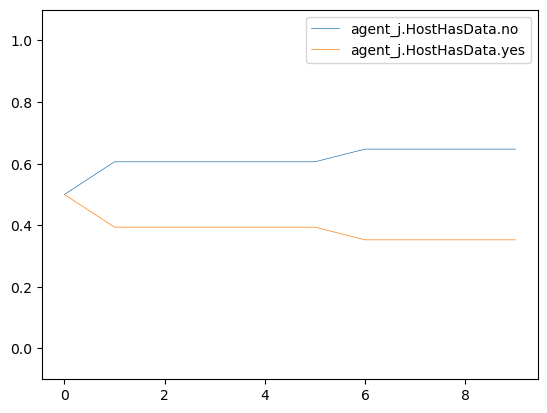

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user agent_i.action agent_j.action
0                   1.0                   0.0        LogIOCs      FileRecon
1                   1.0                   0.0   DecoyAccount   EnumAccounts
2                   1.0                   0.0   LockAccounts   EnumAccounts
3                   1.0                   0.0   LockAccounts     PrivEscAcc
4                   1.0                   0.0   LockAccounts     PrivEscAcc
5                   1.0                   0.0   LockAccounts      FileRecon
6                   1.0                   0.0   LockAccounts           Exit
7                   1.0                   0.0   LockAccounts            Nop
8                   1.0                   0.0   LockAccounts            Nop
9                   1.0                   0.0   LockAccounts            Nop

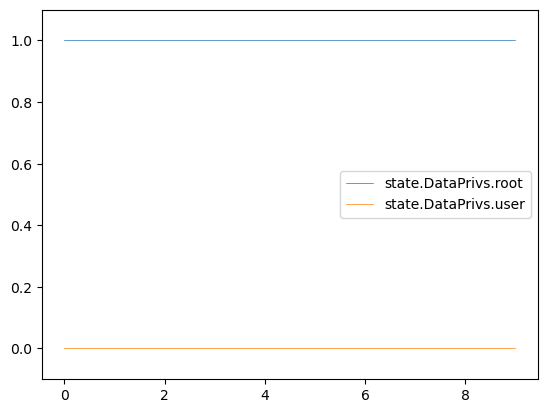

agent_i.DataPrivs.root  agent_i.DataPrivs.user agent_i.action  \
0                     1.0                     0.0        LogIOCs   
1                     1.0                     0.0   DecoyAccount   
2                     1.0                     0.0   LockAccounts   
3                     1.0                     0.0   LockAccounts   
4                     1.0                     0.0   LockAccounts   
5                     1.0                     0.0   LockAccounts   
6                     1.0                     0.0   LockAccounts   
7                     1.0                     0.0   LockAccounts   
8                     1.0                     0.0   LockAccounts   
9                     1.0                     0.0   LockAccounts   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1   EnumAccounts                        file_enum  
2   EnumAccounts                        file_enum  
3     PrivEscAcc                   login_activity  
4     PrivEscAcc                   login_activity  
5      FileRecon                        file_enum  
6           Exit                   login_activity  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

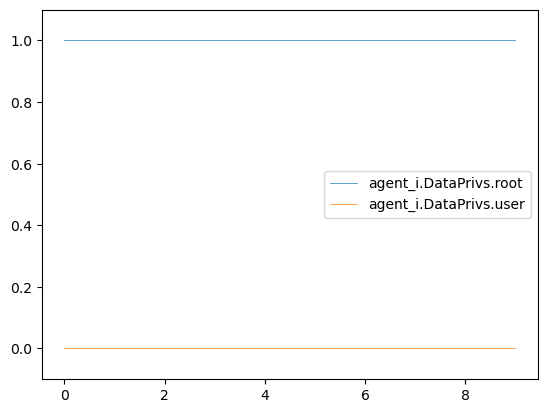

agent_j.DataPrivs.root  agent_j.DataPrivs.user agent_j.action  \
0                0.500000                0.500000      FileRecon   
1                0.606061                0.393939   EnumAccounts   
2                0.606061                0.393939   EnumAccounts   
3                0.606061                0.393939     PrivEscAcc   
4                0.606061                0.393939     PrivEscAcc   
5                0.606061                0.393939      FileRecon   
6                0.647249                0.352751           Exit   
7                0.647249                0.352751            Nop   
8                0.647249                0.352751            Nop   
9                0.647249                0.352751            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                          denied                         none   
1   DecoyAccount                          denied                         none   
2   LockAccounts                          denied                         none   
3   LockAccounts                          denied                   user_files   
4   LockAccounts                          denied                   user_files   
5   LockAccounts                          denied                         none   
6   LockAccounts                          denied                         none   
7   LockAccounts                            auth                   user_files   
8   LockAccounts                            auth                         none   
9   LockAccounts                            auth                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                          active   
2                           success                          active   
3                           failure                          active   
4                           failure                          active   
5                           failure                          active   
6                           failure                      terminated   
7                           failure                      terminated   
8                           success                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2               acc_policy_change  
3               acc_policy_change  
4               acc_policy_change  
5               acc_policy_change  
6                            none  
7                            none  
8                            none  
9                            none

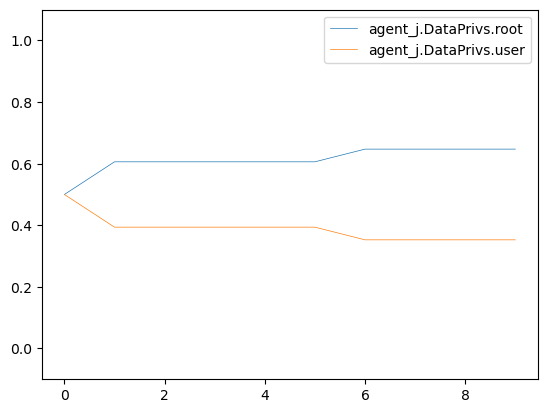

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot agent_i.action agent_j.action  
0                      1.0        LogIOCs      FileRecon  
1                      1.0   DecoyAccount   EnumAccounts  
2                      1.0   LockAccounts   EnumAccounts  
3                      1.0   LockAccounts     PrivEscAcc  
4                      1.0   LockAccounts     PrivEscAcc  
5                      1.0   LockAccounts      FileRecon  
6                      1.0   LockAccounts           Exit  
7                      1.0   LockAccounts            Nop  
8                      1.0   LockAccounts            Nop  
9                      1.0   LockAccounts            Nop

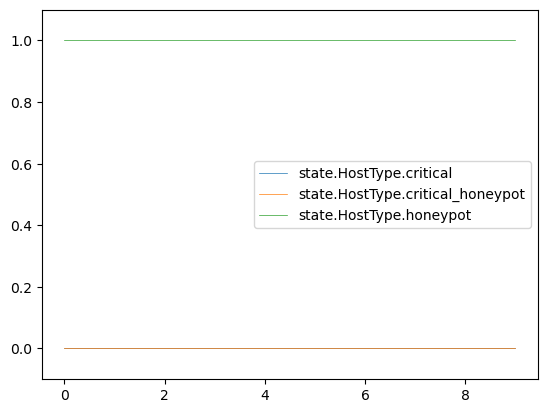

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot agent_i.action agent_j.action  \
0                        1.0        LogIOCs      FileRecon   
1                        1.0   DecoyAccount   EnumAccounts   
2                        1.0   LockAccounts   EnumAccounts   
3                        1.0   LockAccounts     PrivEscAcc   
4                        1.0   LockAccounts     PrivEscAcc   
5                        1.0   LockAccounts      FileRecon   
6                        1.0   LockAccounts           Exit   
7                        1.0   LockAccounts            Nop   
8                        1.0   LockAccounts            Nop   
9                        1.0   LockAccounts            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                        file_enum  
3                   login_activity  
4                   login_activity  
5                        file_enum  
6                   login_activity  
7                             none  
8                             none  
9                             none

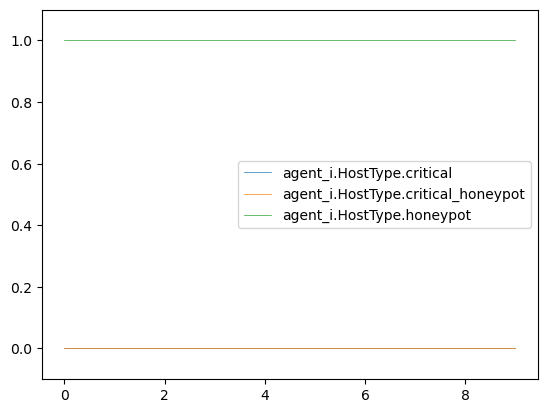

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_j.HostType.honeypot agent_j.action agent_i.action  \
0                        0.0      FileRecon        LogIOCs   
1                        0.0   EnumAccounts   DecoyAccount   
2                        0.0   EnumAccounts   LockAccounts   
3                        0.0     PrivEscAcc   LockAccounts   
4                        0.0     PrivEscAcc   LockAccounts   
5                        0.0      FileRecon   LockAccounts   
6                        0.0           Exit   LockAccounts   
7                        0.0            Nop   LockAccounts   
8                        0.0            Nop   LockAccounts   
9                        0.0            Nop   LockAccounts   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                         none   
1                          denied                         none   
2                          denied                         none   
3                          denied                   user_files   
4                          denied                   user_files   
5                          denied                         none   
6                          denied                         none   
7                            auth                   user_files   
8                            auth                         none   
9                            auth                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                          active   
2                           success                          active   
3                           failure                          active   
4                           failure                          active   
5                           failure                          active   
6                           failure                      terminated   
7                           failure                      terminated   
8                           success                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2               acc_policy_change  
3               acc_policy_change  
4               acc_policy_change  
5               acc_policy_change  
6                            none  
7                            none  
8                            none  
9                            none

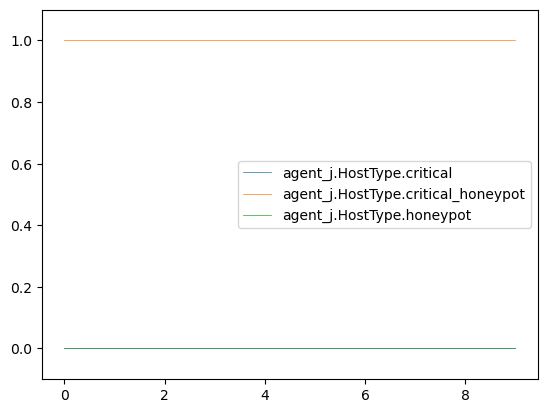

=============AttActive============


state.AttActive.no  state.AttActive.yes agent_i.action agent_j.action
0                 0.0                  1.0        LogIOCs      FileRecon
1                 0.0                  1.0   DecoyAccount   EnumAccounts
2                 0.0                  1.0   LockAccounts   EnumAccounts
3                 0.0                  1.0   LockAccounts     PrivEscAcc
4                 0.0                  1.0   LockAccounts     PrivEscAcc
5                 0.0                  1.0   LockAccounts      FileRecon
6                 0.0                  1.0   LockAccounts           Exit
7                 1.0                  0.0   LockAccounts            Nop
8                 1.0                  0.0   LockAccounts            Nop
9                 1.0                  0.0   LockAccounts            Nop

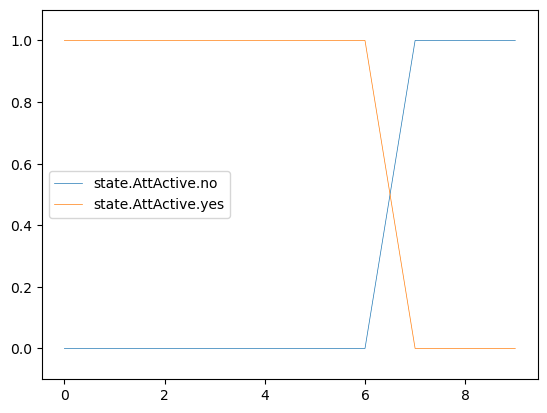

agent_i.AttActive.no  agent_i.AttActive.yes agent_i.action agent_j.action  \
0              0.000000               1.000000        LogIOCs      FileRecon   
1              0.000000               1.000000   DecoyAccount   EnumAccounts   
2              0.000000               1.000000   LockAccounts   EnumAccounts   
3              0.000001               0.999999   LockAccounts     PrivEscAcc   
4              0.078962               0.921038   LockAccounts     PrivEscAcc   
5              0.019999               0.980001   LockAccounts      FileRecon   
6              0.023975               0.976025   LockAccounts           Exit   
7              0.044867               0.955133   LockAccounts            Nop   
8              0.295003               0.704997   LockAccounts            Nop   
9              0.774433               0.225567   LockAccounts            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                        file_enum  
3                   login_activity  
4                   login_activity  
5                        file_enum  
6                   login_activity  
7                             none  
8                             none  
9                             none

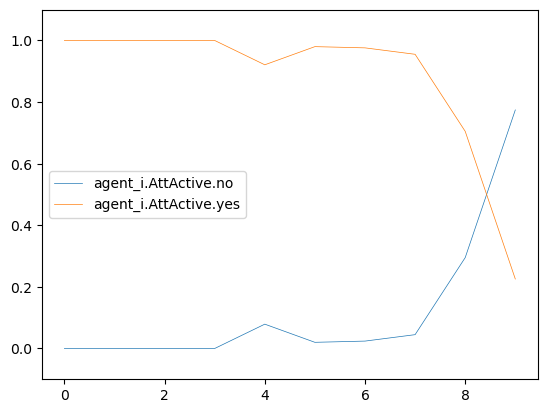

agent_j.AttActive.no  agent_j.AttActive.yes agent_j.action agent_i.action  \
0                   0.0                    1.0      FileRecon        LogIOCs   
1                   0.0                    1.0   EnumAccounts   DecoyAccount   
2                   0.0                    1.0   EnumAccounts   LockAccounts   
3                   0.0                    1.0     PrivEscAcc   LockAccounts   
4                   0.0                    1.0     PrivEscAcc   LockAccounts   
5                   0.0                    1.0      FileRecon   LockAccounts   
6                   0.0                    1.0           Exit   LockAccounts   
7                   1.0                    0.0            Nop   LockAccounts   
8                   1.0                    0.0            Nop   LockAccounts   
9                   1.0                    0.0            Nop   LockAccounts   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                         none   
1                          denied                         none   
2                          denied                         none   
3                          denied                   user_files   
4                          denied                   user_files   
5                          denied                         none   
6                          denied                         none   
7                            auth                   user_files   
8                            auth                         none   
9                            auth                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                          active   
2                           success                          active   
3                           failure                          active   
4                           failure                          active   
5                           failure                          active   
6                           failure                      terminated   
7                           failure                      terminated   
8                           success                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2               acc_policy_change  
3               acc_policy_change  
4               acc_policy_change  
5               acc_policy_change  
6                            none  
7                            none  
8                            none  
9                            none

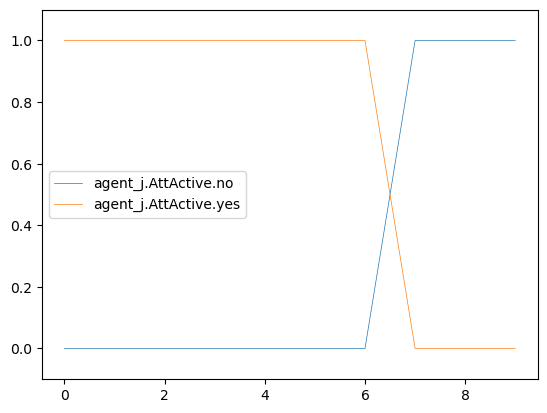

=============IOCsLogged============


state.IOCsLogged.no  state.IOCsLogged.yes agent_i.action agent_j.action
0                  1.0                   0.0        LogIOCs      FileRecon
1                  0.0                   1.0   DecoyAccount   EnumAccounts
2                  0.0                   1.0   LockAccounts   EnumAccounts
3                  0.0                   1.0   LockAccounts     PrivEscAcc
4                  0.0                   1.0   LockAccounts     PrivEscAcc
5                  0.0                   1.0   LockAccounts      FileRecon
6                  0.0                   1.0   LockAccounts           Exit
7                  0.0                   1.0   LockAccounts            Nop
8                  0.0                   1.0   LockAccounts            Nop
9                  0.0                   1.0   LockAccounts            Nop

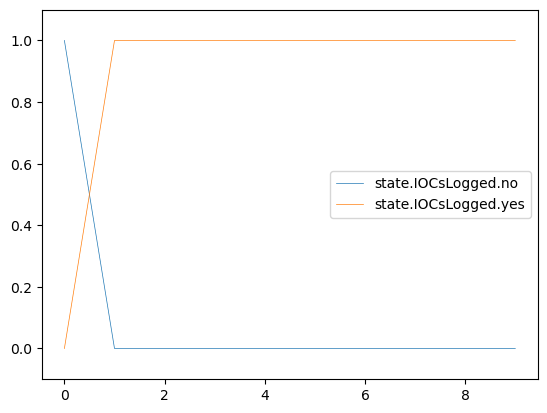

agent_i.IOCsLogged.no  agent_i.IOCsLogged.yes agent_i.action  \
0                    1.0                     0.0        LogIOCs   
1                    0.0                     1.0   DecoyAccount   
2                    0.0                     1.0   LockAccounts   
3                    0.0                     1.0   LockAccounts   
4                    0.0                     1.0   LockAccounts   
5                    0.0                     1.0   LockAccounts   
6                    0.0                     1.0   LockAccounts   
7                    0.0                     1.0   LockAccounts   
8                    0.0                     1.0   LockAccounts   
9                    0.0                     1.0   LockAccounts   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1   EnumAccounts                        file_enum  
2   EnumAccounts                        file_enum  
3     PrivEscAcc                   login_activity  
4     PrivEscAcc                   login_activity  
5      FileRecon                        file_enum  
6           Exit                   login_activity  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

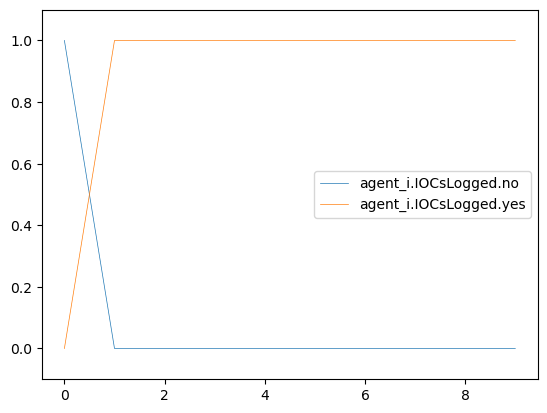

agent_j.IOCsLogged.no  agent_j.IOCsLogged.yes agent_j.action  \
0               1.000000                0.000000      FileRecon   
1               0.750000                0.250000   EnumAccounts   
2               0.845454                0.154545   EnumAccounts   
3               0.932118                0.067882     PrivEscAcc   
4               0.999468                0.000532     PrivEscAcc   
5               0.998393                0.001607      FileRecon   
6               0.998393                0.001607           Exit   
7               0.998393                0.001607            Nop   
8               0.998393                0.001607            Nop   
9               0.998393                0.001607            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                          denied                         none   
1   DecoyAccount                          denied                         none   
2   LockAccounts                          denied                         none   
3   LockAccounts                          denied                   user_files   
4   LockAccounts                          denied                   user_files   
5   LockAccounts                          denied                         none   
6   LockAccounts                          denied                         none   
7   LockAccounts                            auth                   user_files   
8   LockAccounts                            auth                         none   
9   LockAccounts                            auth                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                          active   
2                           success                          active   
3                           failure                          active   
4                           failure                          active   
5                           failure                          active   
6                           failure                      terminated   
7                           failure                      terminated   
8                           success                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2               acc_policy_change  
3               acc_policy_change  
4               acc_policy_change  
5               acc_policy_change  
6                            none  
7                            none  
8                            none  
9                            none

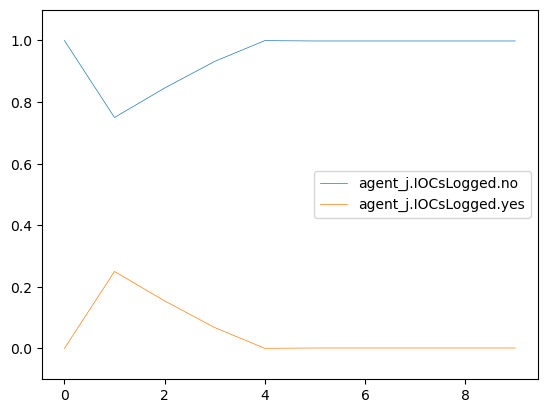

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                        file_enum
2                               1.0                             none
3                               1.0                             none
4                               1.0                             none
5                               1.0                             none
6                               1.0                        file_enum
7                               1.0                             none
8                               1.0                             none
9                               1.0                             none

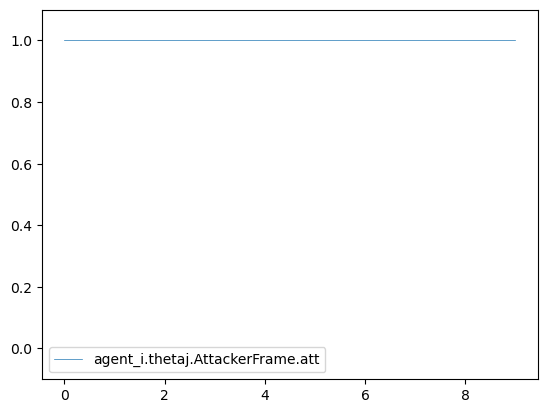

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.500000                        0.500000   
2                         0.436364                        0.563636   
3                         0.901076                        0.098925   
4                         0.980552                        0.019448   
5                         0.980552                        0.019448   
6                         0.980552                        0.019448   
7                         0.980552                        0.019448   
8                         0.980552                        0.019448   
9                         0.980552                        0.019448   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                         none   
1                          denied                   user_files   
2                          denied                   user_files   
3                          denied                         none   
4                          denied                         none   
5                            auth                   user_files   
6                          denied                   user_files   
7                          denied                   user_files   
8                          denied                   user_files   
9                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                          active   
2                           failure                          active   
3                           failure                          active   
4                           failure                      terminated   
5                           failure                      terminated   
6                           failure                      terminated   
7                           failure                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2               acc_policy_change  
3               acc_policy_change  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

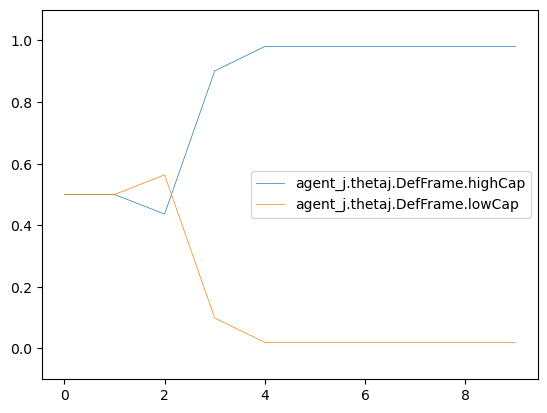

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user agent_i.action  \
0                     0.0                     1.0        LogIOCs   
1                     0.0                     1.0   DecoyAccount   
2                     0.0                     1.0   LockAccounts   
3                     0.0                     1.0   LockAccounts   
4                     0.0                     1.0   LockAccounts   
5                     0.0                     1.0            Nop   
6                     0.0                     1.0            Nop   
7                     0.0                     1.0            Nop   
8                     0.0                     1.0            Nop   
9                     0.0                     1.0            Nop   

  agent_j.action  
0      FileRecon  
1   EnumAccounts  
2   EnumAccounts  
3      FileRecon  
4           Exit  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

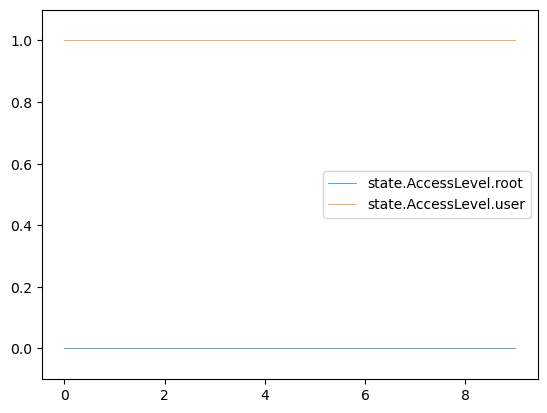

agent_i.AccessLevel.root  agent_i.AccessLevel.user agent_i.action  \
0                  0.000000                  1.000000        LogIOCs   
1                  0.000000                  1.000000   DecoyAccount   
2                  0.000000                  1.000000   LockAccounts   
3                  0.000000                  1.000000   LockAccounts   
4                  0.000000                  1.000000   LockAccounts   
5                  0.000000                  1.000000            Nop   
6                  0.012552                  0.987448            Nop   
7                  0.082021                  0.917979            Nop   
8                  0.012624                  0.987376            Nop   
9                  0.009049                  0.990951            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1   EnumAccounts                        file_enum  
2   EnumAccounts                             none  
3      FileRecon                             none  
4           Exit                             none  
5            Nop                             none  
6            Nop                        file_enum  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

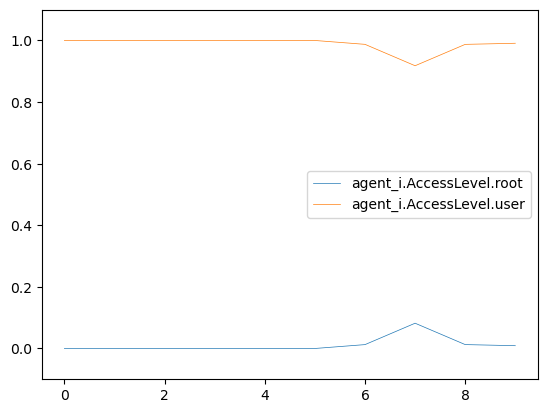

agent_j.AccessLevel.root  agent_j.AccessLevel.user agent_j.action  \
0                       0.0                       1.0      FileRecon   
1                       0.0                       1.0   EnumAccounts   
2                       0.0                       1.0   EnumAccounts   
3                       0.0                       1.0      FileRecon   
4                       0.0                       1.0           Exit   
5                       0.0                       1.0            Nop   
6                       0.0                       1.0            Nop   
7                       0.0                       1.0            Nop   
8                       0.0                       1.0            Nop   
9                       0.0                       1.0            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                          denied                         none   
1   DecoyAccount                          denied                   user_files   
2   LockAccounts                          denied                   user_files   
3   LockAccounts                          denied                         none   
4   LockAccounts                          denied                         none   
5            Nop                            auth                   user_files   
6            Nop                          denied                   user_files   
7            Nop                          denied                   user_files   
8            Nop                          denied                   user_files   
9            Nop                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                          active   
2                           failure                          active   
3                           failure                          active   
4                           failure                      terminated   
5                           failure                      terminated   
6                           failure                      terminated   
7                           failure                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2               acc_policy_change  
3               acc_policy_change  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

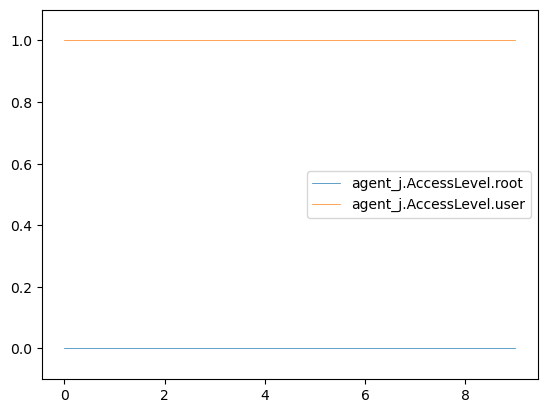

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes agent_i.action agent_j.action
0                   1.0                    0.0        LogIOCs      FileRecon
1                   1.0                    0.0   DecoyAccount   EnumAccounts
2                   0.0                    1.0   LockAccounts   EnumAccounts
3                   0.0                    1.0   LockAccounts      FileRecon
4                   0.0                    1.0   LockAccounts           Exit
5                   0.0                    1.0            Nop            Nop
6                   0.0                    1.0            Nop            Nop
7                   0.0                    1.0            Nop            Nop
8                   0.0                    1.0            Nop            Nop
9                   0.0                    1.0            Nop            Nop

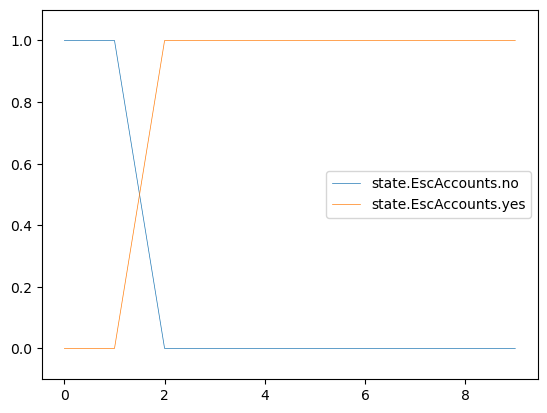

agent_i.EscAccounts.no  agent_i.EscAccounts.yes agent_i.action  \
0                     1.0                      0.0        LogIOCs   
1                     1.0                      0.0   DecoyAccount   
2                     0.0                      1.0   LockAccounts   
3                     0.0                      1.0   LockAccounts   
4                     0.0                      1.0   LockAccounts   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1   EnumAccounts                        file_enum  
2   EnumAccounts                             none  
3      FileRecon                             none  
4           Exit                             none  
5            Nop                             none  
6            Nop                        file_enum  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

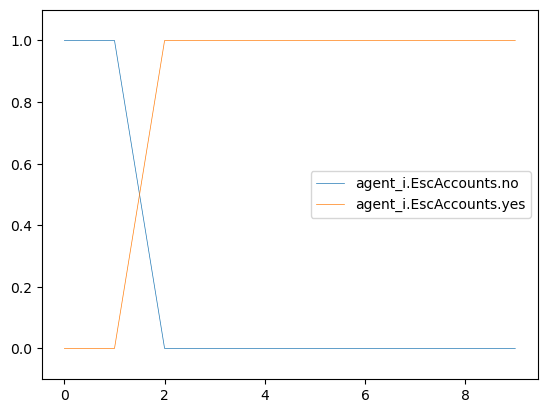

agent_j.EscAccounts.no  agent_j.EscAccounts.yes agent_j.action  \
0                0.500000                 0.500000      FileRecon   
1                0.500000                 0.500000   EnumAccounts   
2                0.613636                 0.386364   EnumAccounts   
3                0.881700                 0.118300      FileRecon   
4                0.889401                 0.110599           Exit   
5                0.889401                 0.110599            Nop   
6                0.889401                 0.110599            Nop   
7                0.889401                 0.110599            Nop   
8                0.889401                 0.110599            Nop   
9                0.889401                 0.110599            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                          denied                         none   
1   DecoyAccount                          denied                   user_files   
2   LockAccounts                          denied                   user_files   
3   LockAccounts                          denied                         none   
4   LockAccounts                          denied                         none   
5            Nop                            auth                   user_files   
6            Nop                          denied                   user_files   
7            Nop                          denied                   user_files   
8            Nop                          denied                   user_files   
9            Nop                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                          active   
2                           failure                          active   
3                           failure                          active   
4                           failure                      terminated   
5                           failure                      terminated   
6                           failure                      terminated   
7                           failure                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2               acc_policy_change  
3               acc_policy_change  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

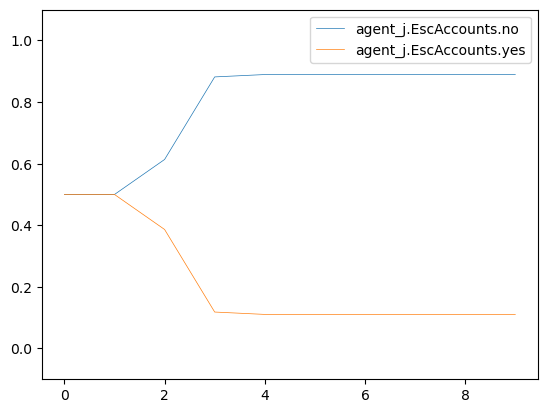

=============AccFound============


state.AccFound.no  state.AccFound.yes agent_i.action agent_j.action
0                1.0                 0.0        LogIOCs      FileRecon
1                1.0                 0.0   DecoyAccount   EnumAccounts
2                1.0                 0.0   LockAccounts   EnumAccounts
3                1.0                 0.0   LockAccounts      FileRecon
4                1.0                 0.0   LockAccounts           Exit
5                1.0                 0.0            Nop            Nop
6                1.0                 0.0            Nop            Nop
7                1.0                 0.0            Nop            Nop
8                1.0                 0.0            Nop            Nop
9                1.0                 0.0            Nop            Nop

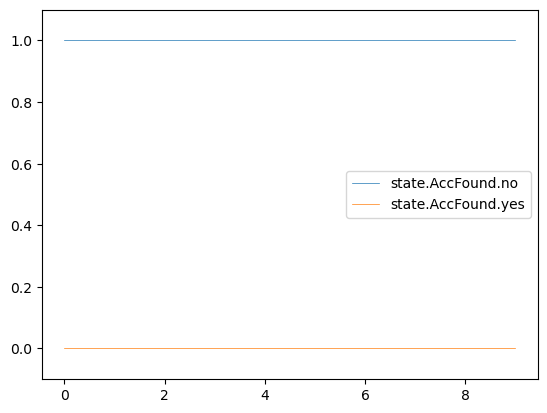

agent_i.AccFound.no  agent_i.AccFound.yes agent_i.action agent_j.action  \
0             1.000000              0.000000        LogIOCs      FileRecon   
1             1.000000              0.000000   DecoyAccount   EnumAccounts   
2             0.305224              0.694776   LockAccounts   EnumAccounts   
3             0.201289              0.798711   LockAccounts      FileRecon   
4             0.463149              0.536851   LockAccounts           Exit   
5             0.715850              0.284150            Nop            Nop   
6             0.774878              0.225122            Nop            Nop   
7             0.720994              0.279006            Nop            Nop   
8             0.775568              0.224432            Nop            Nop   
9             0.778376              0.221624            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                             none  
3                             none  
4                             none  
5                             none  
6                        file_enum  
7                             none  
8                             none  
9                             none

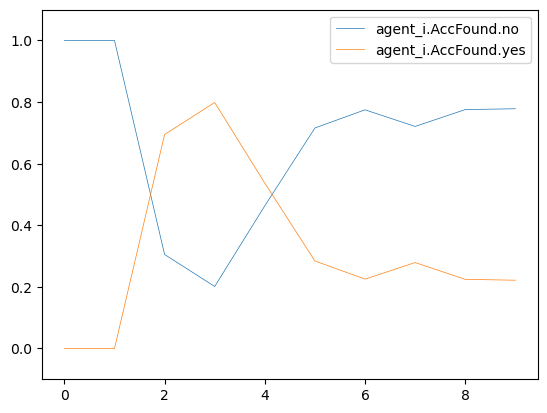

agent_j.AccFound.no  agent_j.AccFound.yes agent_j.action agent_i.action  \
0             1.000000              0.000000      FileRecon        LogIOCs   
1             1.000000              0.000000   EnumAccounts   DecoyAccount   
2             0.920454              0.079545   EnumAccounts   LockAccounts   
3             0.968988              0.031012      FileRecon   LockAccounts   
4             0.971007              0.028993           Exit   LockAccounts   
5             0.971007              0.028993            Nop            Nop   
6             0.971007              0.028993            Nop            Nop   
7             0.971007              0.028993            Nop            Nop   
8             0.971007              0.028993            Nop            Nop   
9             0.971007              0.028993            Nop            Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                         none   
1                          denied                   user_files   
2                          denied                   user_files   
3                          denied                         none   
4                          denied                         none   
5                            auth                   user_files   
6                          denied                   user_files   
7                          denied                   user_files   
8                          denied                   user_files   
9                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                          active   
2                           failure                          active   
3                           failure                          active   
4                           failure                      terminated   
5                           failure                      terminated   
6                           failure                      terminated   
7                           failure                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2               acc_policy_change  
3               acc_policy_change  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

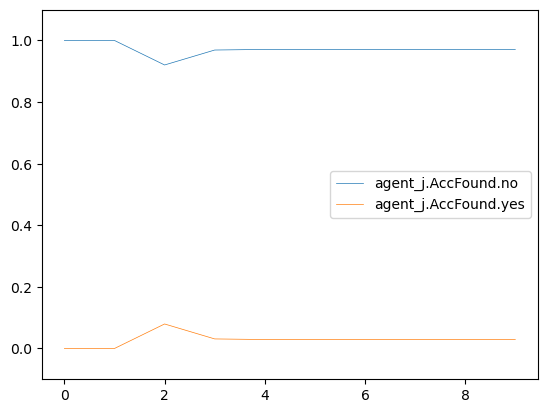

=============DataFound============


state.DataFound.no  state.DataFound.yes agent_i.action agent_j.action
0                 1.0                  0.0        LogIOCs      FileRecon
1                 1.0                  0.0   DecoyAccount   EnumAccounts
2                 1.0                  0.0   LockAccounts   EnumAccounts
3                 1.0                  0.0   LockAccounts      FileRecon
4                 1.0                  0.0   LockAccounts           Exit
5                 1.0                  0.0            Nop            Nop
6                 1.0                  0.0            Nop            Nop
7                 1.0                  0.0            Nop            Nop
8                 1.0                  0.0            Nop            Nop
9                 1.0                  0.0            Nop            Nop

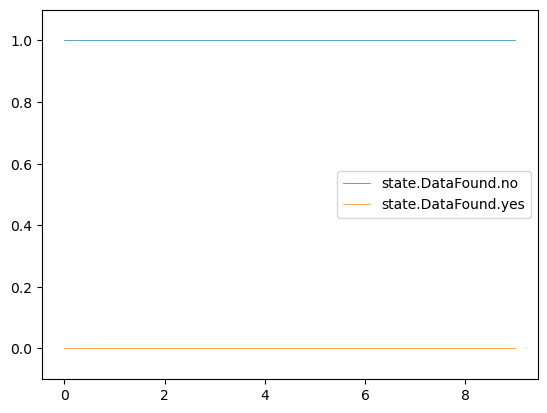

agent_i.DataFound.no  agent_i.DataFound.yes agent_i.action agent_j.action  \
0              1.000000               0.000000        LogIOCs      FileRecon   
1              1.000000               0.000000   DecoyAccount   EnumAccounts   
2              1.000000               0.000000   LockAccounts   EnumAccounts   
3              1.000000               0.000000   LockAccounts      FileRecon   
4              1.000000               0.000000   LockAccounts           Exit   
5              1.000000               0.000000            Nop            Nop   
6              1.000000               0.000000            Nop            Nop   
7              0.942983               0.057017            Nop            Nop   
8              0.988677               0.011323            Nop            Nop   
9              0.991527               0.008473            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                             none  
3                             none  
4                             none  
5                             none  
6                        file_enum  
7                             none  
8                             none  
9                             none

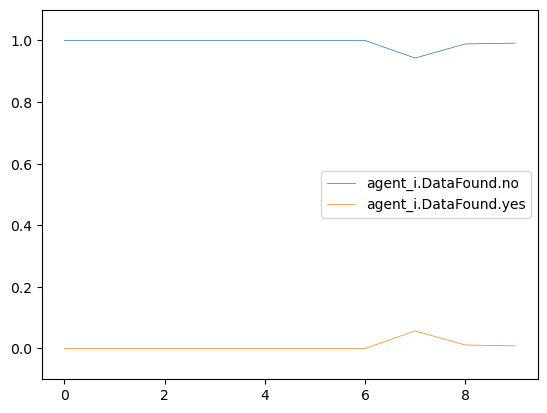

agent_j.DataFound.no  agent_j.DataFound.yes agent_j.action agent_i.action  \
0                   1.0                    0.0      FileRecon        LogIOCs   
1                   1.0                    0.0   EnumAccounts   DecoyAccount   
2                   1.0                    0.0   EnumAccounts   LockAccounts   
3                   1.0                    0.0      FileRecon   LockAccounts   
4                   1.0                    0.0           Exit   LockAccounts   
5                   1.0                    0.0            Nop            Nop   
6                   1.0                    0.0            Nop            Nop   
7                   1.0                    0.0            Nop            Nop   
8                   1.0                    0.0            Nop            Nop   
9                   1.0                    0.0            Nop            Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                         none   
1                          denied                   user_files   
2                          denied                   user_files   
3                          denied                         none   
4                          denied                         none   
5                            auth                   user_files   
6                          denied                   user_files   
7                          denied                   user_files   
8                          denied                   user_files   
9                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                          active   
2                           failure                          active   
3                           failure                          active   
4                           failure                      terminated   
5                           failure                      terminated   
6                           failure                      terminated   
7                           failure                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2               acc_policy_change  
3               acc_policy_change  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

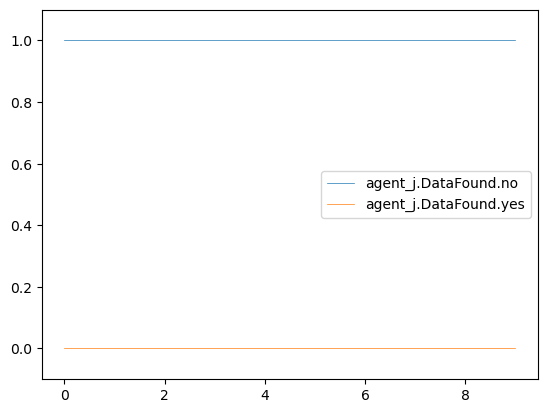

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes agent_i.action agent_j.action
0                    1.0                     0.0        LogIOCs      FileRecon
1                    1.0                     0.0   DecoyAccount   EnumAccounts
2                    1.0                     0.0   LockAccounts   EnumAccounts
3                    1.0                     0.0   LockAccounts      FileRecon
4                    1.0                     0.0   LockAccounts           Exit
5                    1.0                     0.0            Nop            Nop
6                    1.0                     0.0            Nop            Nop
7                    1.0                     0.0            Nop            Nop
8                    1.0                     0.0            Nop            Nop
9                    1.0                     0.0            Nop            Nop

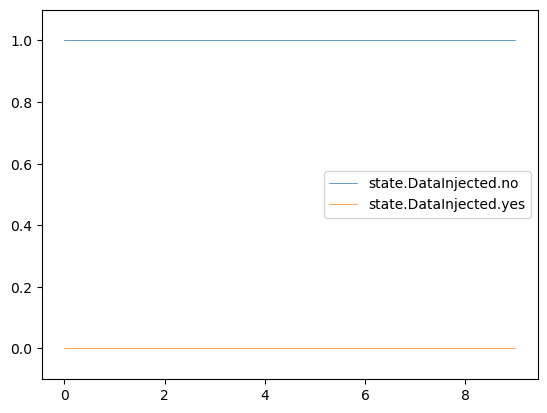

agent_i.DataInjected.no  agent_i.DataInjected.yes agent_i.action  \
0                 1.000000                  0.000000        LogIOCs   
1                 1.000000                  0.000000   DecoyAccount   
2                 1.000000                  0.000000   LockAccounts   
3                 1.000000                  0.000000   LockAccounts   
4                 1.000000                  0.000000   LockAccounts   
5                 1.000000                  0.000000            Nop   
6                 1.000000                  0.000000            Nop   
7                 1.000000                  0.000000            Nop   
8                 0.992112                  0.007888            Nop   
9                 0.991647                  0.008353            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1   EnumAccounts                        file_enum  
2   EnumAccounts                             none  
3      FileRecon                             none  
4           Exit                             none  
5            Nop                             none  
6            Nop                        file_enum  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

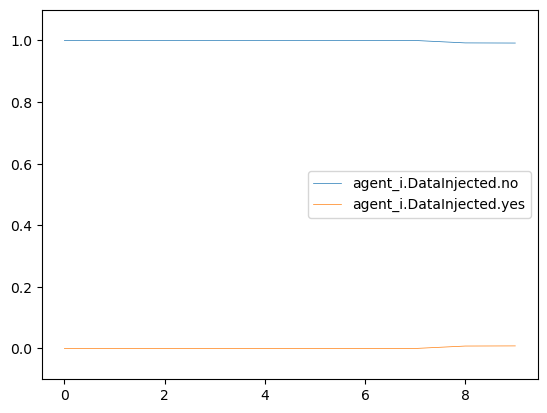

agent_j.DataInjected.no  agent_j.DataInjected.yes agent_j.action  \
0                      1.0                       0.0      FileRecon   
1                      1.0                       0.0   EnumAccounts   
2                      1.0                       0.0   EnumAccounts   
3                      1.0                       0.0      FileRecon   
4                      1.0                       0.0           Exit   
5                      1.0                       0.0            Nop   
6                      1.0                       0.0            Nop   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                          denied                         none   
1   DecoyAccount                          denied                   user_files   
2   LockAccounts                          denied                   user_files   
3   LockAccounts                          denied                         none   
4   LockAccounts                          denied                         none   
5            Nop                            auth                   user_files   
6            Nop                          denied                   user_files   
7            Nop                          denied                   user_files   
8            Nop                          denied                   user_files   
9            Nop                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                          active   
2                           failure                          active   
3                           failure                          active   
4                           failure                      terminated   
5                           failure                      terminated   
6                           failure                      terminated   
7                           failure                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2               acc_policy_change  
3               acc_policy_change  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

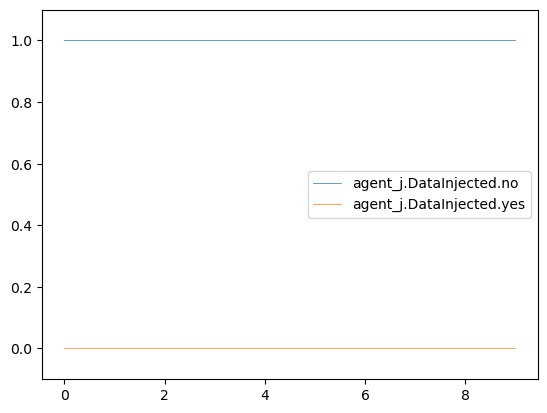

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes agent_i.action agent_j.action
0                   0.0                    1.0        LogIOCs      FileRecon
1                   0.0                    1.0   DecoyAccount   EnumAccounts
2                   0.0                    1.0   LockAccounts   EnumAccounts
3                   0.0                    1.0   LockAccounts      FileRecon
4                   0.0                    1.0   LockAccounts           Exit
5                   0.0                    1.0            Nop            Nop
6                   0.0                    1.0            Nop            Nop
7                   0.0                    1.0            Nop            Nop
8                   0.0                    1.0            Nop            Nop
9                   0.0                    1.0            Nop            Nop

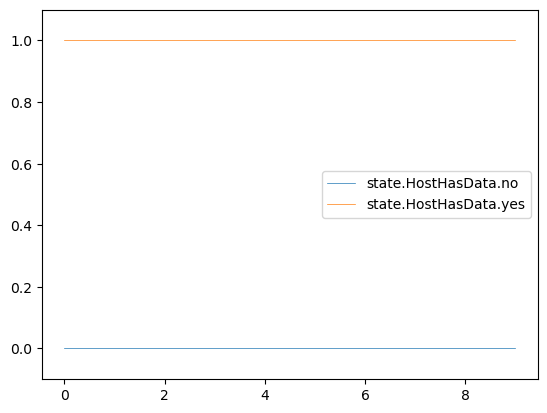

agent_i.HostHasData.no  agent_i.HostHasData.yes agent_i.action  \
0                     0.0                      1.0        LogIOCs   
1                     0.0                      1.0   DecoyAccount   
2                     0.0                      1.0   LockAccounts   
3                     0.0                      1.0   LockAccounts   
4                     0.0                      1.0   LockAccounts   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1   EnumAccounts                        file_enum  
2   EnumAccounts                             none  
3      FileRecon                             none  
4           Exit                             none  
5            Nop                             none  
6            Nop                        file_enum  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

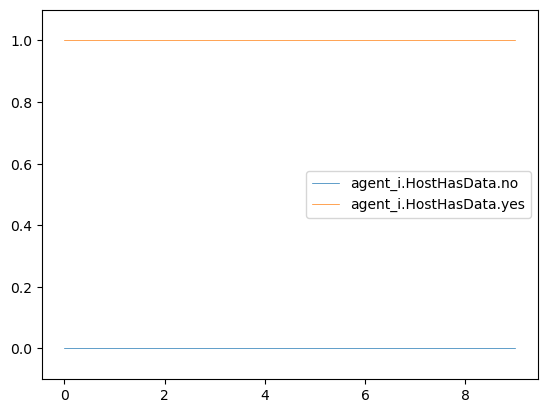

agent_j.HostHasData.no  agent_j.HostHasData.yes agent_j.action  \
0                0.500000                 0.500000      FileRecon   
1                0.606061                 0.393939   EnumAccounts   
2                0.606061                 0.393939   EnumAccounts   
3                0.606061                 0.393939      FileRecon   
4                0.647249                 0.352751           Exit   
5                0.647249                 0.352751            Nop   
6                0.647249                 0.352751            Nop   
7                0.647249                 0.352751            Nop   
8                0.647249                 0.352751            Nop   
9                0.647249                 0.352751            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                          denied                         none   
1   DecoyAccount                          denied                   user_files   
2   LockAccounts                          denied                   user_files   
3   LockAccounts                          denied                         none   
4   LockAccounts                          denied                         none   
5            Nop                            auth                   user_files   
6            Nop                          denied                   user_files   
7            Nop                          denied                   user_files   
8            Nop                          denied                   user_files   
9            Nop                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                          active   
2                           failure                          active   
3                           failure                          active   
4                           failure                      terminated   
5                           failure                      terminated   
6                           failure                      terminated   
7                           failure                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2               acc_policy_change  
3               acc_policy_change  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

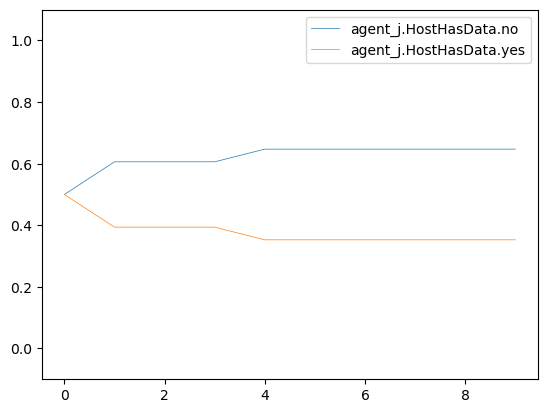

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user agent_i.action agent_j.action
0                   1.0                   0.0        LogIOCs      FileRecon
1                   1.0                   0.0   DecoyAccount   EnumAccounts
2                   1.0                   0.0   LockAccounts   EnumAccounts
3                   1.0                   0.0   LockAccounts      FileRecon
4                   1.0                   0.0   LockAccounts           Exit
5                   1.0                   0.0            Nop            Nop
6                   1.0                   0.0            Nop            Nop
7                   1.0                   0.0            Nop            Nop
8                   1.0                   0.0            Nop            Nop
9                   1.0                   0.0            Nop            Nop

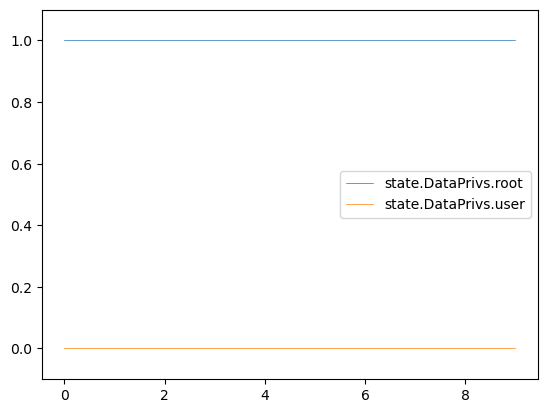

agent_i.DataPrivs.root  agent_i.DataPrivs.user agent_i.action  \
0                     1.0                     0.0        LogIOCs   
1                     1.0                     0.0   DecoyAccount   
2                     1.0                     0.0   LockAccounts   
3                     1.0                     0.0   LockAccounts   
4                     1.0                     0.0   LockAccounts   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1   EnumAccounts                        file_enum  
2   EnumAccounts                             none  
3      FileRecon                             none  
4           Exit                             none  
5            Nop                             none  
6            Nop                        file_enum  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

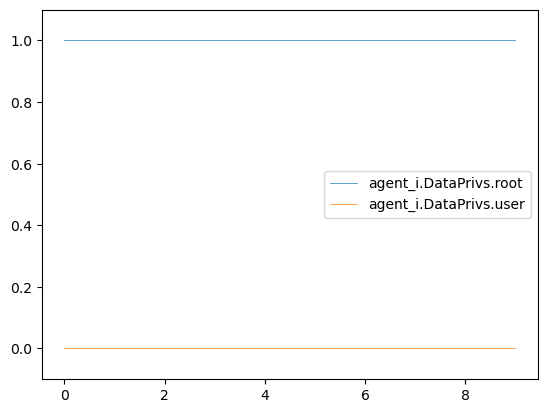

agent_j.DataPrivs.root  agent_j.DataPrivs.user agent_j.action  \
0                0.500000                0.500000      FileRecon   
1                0.606061                0.393939   EnumAccounts   
2                0.606061                0.393939   EnumAccounts   
3                0.606061                0.393939      FileRecon   
4                0.647249                0.352751           Exit   
5                0.647249                0.352751            Nop   
6                0.647249                0.352751            Nop   
7                0.647249                0.352751            Nop   
8                0.647249                0.352751            Nop   
9                0.647249                0.352751            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                          denied                         none   
1   DecoyAccount                          denied                   user_files   
2   LockAccounts                          denied                   user_files   
3   LockAccounts                          denied                         none   
4   LockAccounts                          denied                         none   
5            Nop                            auth                   user_files   
6            Nop                          denied                   user_files   
7            Nop                          denied                   user_files   
8            Nop                          denied                   user_files   
9            Nop                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                          active   
2                           failure                          active   
3                           failure                          active   
4                           failure                      terminated   
5                           failure                      terminated   
6                           failure                      terminated   
7                           failure                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2               acc_policy_change  
3               acc_policy_change  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

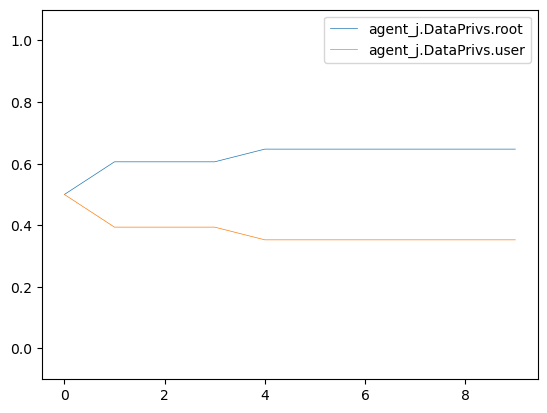

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot agent_i.action agent_j.action  
0                      1.0        LogIOCs      FileRecon  
1                      1.0   DecoyAccount   EnumAccounts  
2                      1.0   LockAccounts   EnumAccounts  
3                      1.0   LockAccounts      FileRecon  
4                      1.0   LockAccounts           Exit  
5                      1.0            Nop            Nop  
6                      1.0            Nop            Nop  
7                      1.0            Nop            Nop  
8                      1.0            Nop            Nop  
9                      1.0            Nop            Nop

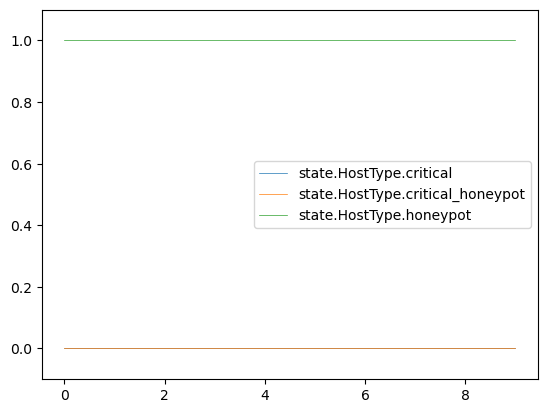

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot agent_i.action agent_j.action  \
0                        1.0        LogIOCs      FileRecon   
1                        1.0   DecoyAccount   EnumAccounts   
2                        1.0   LockAccounts   EnumAccounts   
3                        1.0   LockAccounts      FileRecon   
4                        1.0   LockAccounts           Exit   
5                        1.0            Nop            Nop   
6                        1.0            Nop            Nop   
7                        1.0            Nop            Nop   
8                        1.0            Nop            Nop   
9                        1.0            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                             none  
3                             none  
4                             none  
5                             none  
6                        file_enum  
7                             none  
8                             none  
9                             none

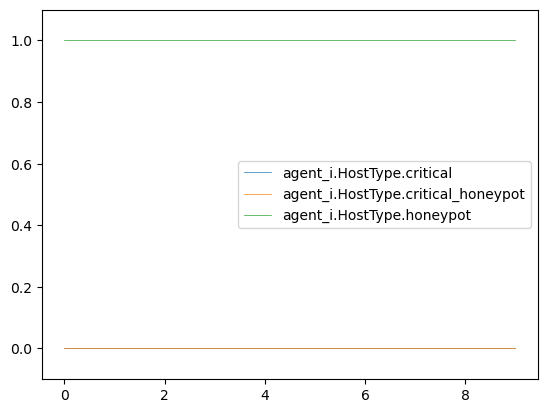

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_j.HostType.honeypot agent_j.action agent_i.action  \
0                        0.0      FileRecon        LogIOCs   
1                        0.0   EnumAccounts   DecoyAccount   
2                        0.0   EnumAccounts   LockAccounts   
3                        0.0      FileRecon   LockAccounts   
4                        0.0           Exit   LockAccounts   
5                        0.0            Nop            Nop   
6                        0.0            Nop            Nop   
7                        0.0            Nop            Nop   
8                        0.0            Nop            Nop   
9                        0.0            Nop            Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                         none   
1                          denied                   user_files   
2                          denied                   user_files   
3                          denied                         none   
4                          denied                         none   
5                            auth                   user_files   
6                          denied                   user_files   
7                          denied                   user_files   
8                          denied                   user_files   
9                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                          active   
2                           failure                          active   
3                           failure                          active   
4                           failure                      terminated   
5                           failure                      terminated   
6                           failure                      terminated   
7                           failure                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2               acc_policy_change  
3               acc_policy_change  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

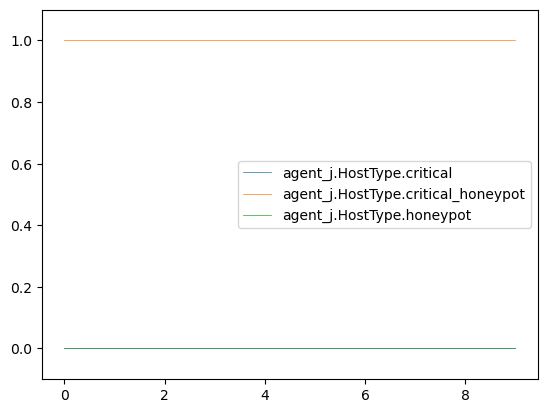

=============AttActive============


state.AttActive.no  state.AttActive.yes agent_i.action agent_j.action
0                 0.0                  1.0        LogIOCs      FileRecon
1                 0.0                  1.0   DecoyAccount   EnumAccounts
2                 0.0                  1.0   LockAccounts   EnumAccounts
3                 0.0                  1.0   LockAccounts      FileRecon
4                 0.0                  1.0   LockAccounts           Exit
5                 1.0                  0.0            Nop            Nop
6                 1.0                  0.0            Nop            Nop
7                 1.0                  0.0            Nop            Nop
8                 1.0                  0.0            Nop            Nop
9                 1.0                  0.0            Nop            Nop

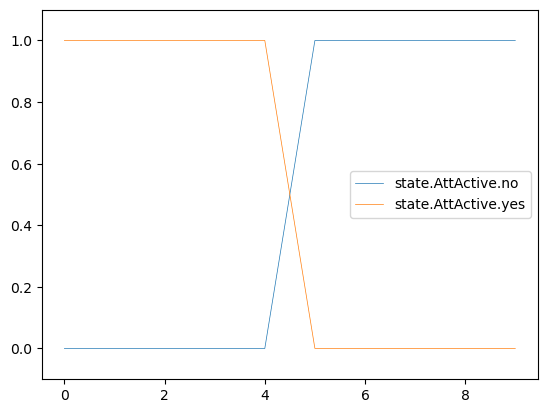

agent_i.AttActive.no  agent_i.AttActive.yes agent_i.action agent_j.action  \
0              0.000000               1.000000        LogIOCs      FileRecon   
1              0.000000               1.000000   DecoyAccount   EnumAccounts   
2              0.000000               1.000000   LockAccounts   EnumAccounts   
3              0.000026               0.999974   LockAccounts      FileRecon   
4              0.525702               0.474298   LockAccounts           Exit   
5              0.899260               0.100740            Nop            Nop   
6              0.985432               0.014568            Nop            Nop   
7              0.914228               0.085772            Nop            Nop   
8              0.987335               0.012664            Nop            Nop   
9              0.999396               0.000604            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                             none  
3                             none  
4                             none  
5                             none  
6                        file_enum  
7                             none  
8                             none  
9                             none

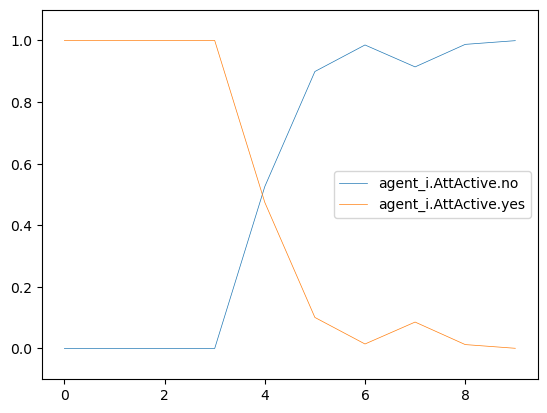

agent_j.AttActive.no  agent_j.AttActive.yes agent_j.action agent_i.action  \
0                   0.0                    1.0      FileRecon        LogIOCs   
1                   0.0                    1.0   EnumAccounts   DecoyAccount   
2                   0.0                    1.0   EnumAccounts   LockAccounts   
3                   0.0                    1.0      FileRecon   LockAccounts   
4                   0.0                    1.0           Exit   LockAccounts   
5                   1.0                    0.0            Nop            Nop   
6                   1.0                    0.0            Nop            Nop   
7                   1.0                    0.0            Nop            Nop   
8                   1.0                    0.0            Nop            Nop   
9                   1.0                    0.0            Nop            Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                         none   
1                          denied                   user_files   
2                          denied                   user_files   
3                          denied                         none   
4                          denied                         none   
5                            auth                   user_files   
6                          denied                   user_files   
7                          denied                   user_files   
8                          denied                   user_files   
9                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                          active   
2                           failure                          active   
3                           failure                          active   
4                           failure                      terminated   
5                           failure                      terminated   
6                           failure                      terminated   
7                           failure                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2               acc_policy_change  
3               acc_policy_change  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

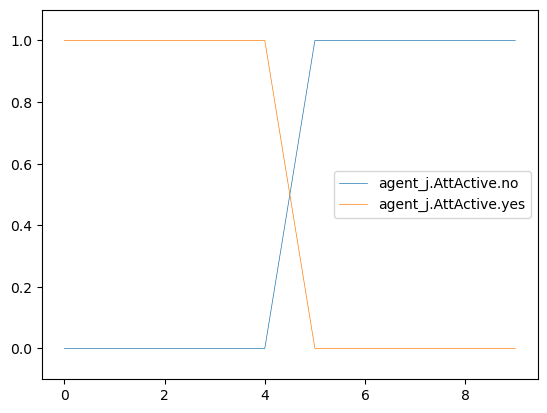

=============IOCsLogged============


state.IOCsLogged.no  state.IOCsLogged.yes agent_i.action agent_j.action
0                  1.0                   0.0        LogIOCs      FileRecon
1                  0.0                   1.0   DecoyAccount   EnumAccounts
2                  0.0                   1.0   LockAccounts   EnumAccounts
3                  0.0                   1.0   LockAccounts      FileRecon
4                  0.0                   1.0   LockAccounts           Exit
5                  0.0                   1.0            Nop            Nop
6                  0.0                   1.0            Nop            Nop
7                  0.0                   1.0            Nop            Nop
8                  0.0                   1.0            Nop            Nop
9                  0.0                   1.0            Nop            Nop

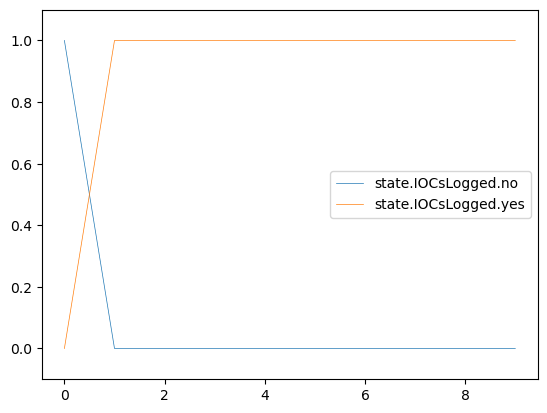

agent_i.IOCsLogged.no  agent_i.IOCsLogged.yes agent_i.action  \
0                    1.0                     0.0        LogIOCs   
1                    0.0                     1.0   DecoyAccount   
2                    0.0                     1.0   LockAccounts   
3                    0.0                     1.0   LockAccounts   
4                    0.0                     1.0   LockAccounts   
5                    0.0                     1.0            Nop   
6                    0.0                     1.0            Nop   
7                    0.0                     1.0            Nop   
8                    0.0                     1.0            Nop   
9                    0.0                     1.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1   EnumAccounts                        file_enum  
2   EnumAccounts                             none  
3      FileRecon                             none  
4           Exit                             none  
5            Nop                             none  
6            Nop                        file_enum  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

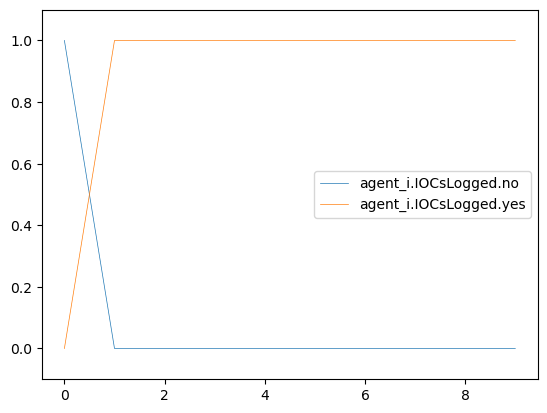

agent_j.IOCsLogged.no  agent_j.IOCsLogged.yes agent_j.action  \
0               1.000000                0.000000      FileRecon   
1               0.750000                0.250000   EnumAccounts   
2               0.845454                0.154545   EnumAccounts   
3               0.989245                0.010755      FileRecon   
4               0.997886                0.002114           Exit   
5               0.997886                0.002114            Nop   
6               0.997886                0.002114            Nop   
7               0.997886                0.002114            Nop   
8               0.997886                0.002114            Nop   
9               0.997886                0.002114            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                          denied                         none   
1   DecoyAccount                          denied                   user_files   
2   LockAccounts                          denied                   user_files   
3   LockAccounts                          denied                         none   
4   LockAccounts                          denied                         none   
5            Nop                            auth                   user_files   
6            Nop                          denied                   user_files   
7            Nop                          denied                   user_files   
8            Nop                          denied                   user_files   
9            Nop                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                          active   
2                           failure                          active   
3                           failure                          active   
4                           failure                      terminated   
5                           failure                      terminated   
6                           failure                      terminated   
7                           failure                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2               acc_policy_change  
3               acc_policy_change  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

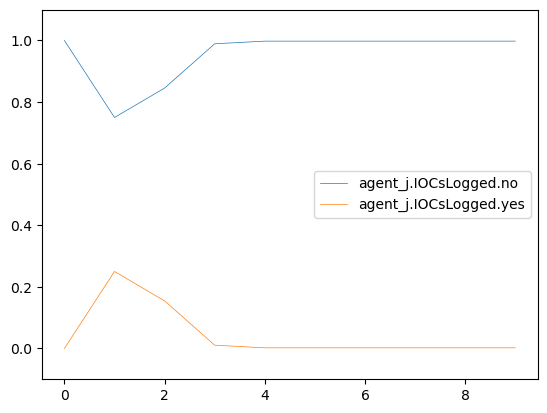

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                        file_enum
2                               1.0                   login_activity
3                               1.0                   login_activity
4                               1.0                             none
5                               1.0                             none
6                               1.0                             none
7                               1.0                             none
8                               1.0                       file_write
9                               1.0                             none

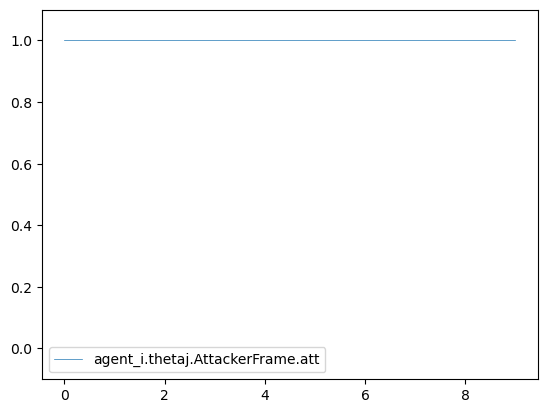

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.500000                        0.500000   
2                         0.577778                        0.422222   
3                         0.981429                        0.018571   
4                         0.989436                        0.010564   
5                         0.958335                        0.041665   
6                         0.958335                        0.041665   
7                         0.958335                        0.041665   
8                         0.958335                        0.041665   
9                         0.958335                        0.041665   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                            auth                   user_files   
1                          denied                         none   
2                          denied                   user_files   
3                          denied                         none   
4                          denied                   user_files   
5                            auth                   user_files   
6                            auth                         none   
7                            auth                   user_files   
8                          denied                   user_files   
9                            auth                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                          active   
2                           failure                          active   
3                           failure                          active   
4                           success                          active   
5                           failure                          active   
6                           failure                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2               acc_policy_change  
3               acc_policy_change  
4               acc_policy_change  
5               acc_policy_change  
6                            none  
7                            none  
8                            none  
9                            none

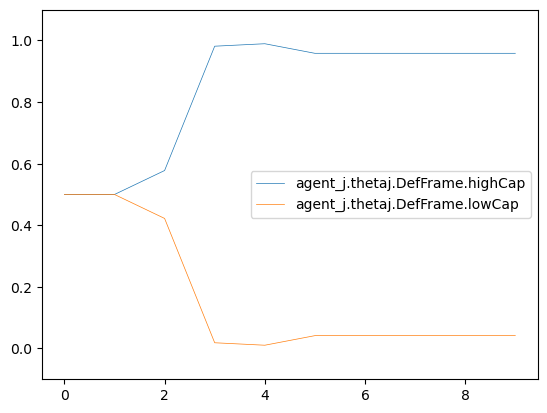

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user agent_i.action  \
0                     0.0                     1.0        LogIOCs   
1                     0.0                     1.0   DecoyAccount   
2                     0.0                     1.0   LockAccounts   
3                     0.0                     1.0   LockAccounts   
4                     0.0                     1.0   LockAccounts   
5                     0.0                     1.0   LockAccounts   
6                     0.0                     1.0   LockAccounts   
7                     0.0                     1.0   LockAccounts   
8                     0.0                     1.0            Nop   
9                     0.0                     1.0            Nop   

  agent_j.action  
0      FileRecon  
1   EnumAccounts  
2     PrivEscAcc  
3     PrivEscAcc  
4     PrivEscAcc  
5      FileRecon  
6           Exit  
7            Nop  
8            Nop  
9            Nop

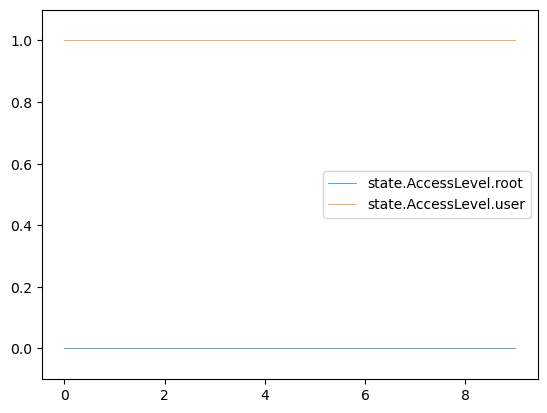

agent_i.AccessLevel.root  agent_i.AccessLevel.user agent_i.action  \
0                  0.000000                  1.000000        LogIOCs   
1                  0.000000                  1.000000   DecoyAccount   
2                  0.000000                  1.000000   LockAccounts   
3                  0.000000                  1.000000   LockAccounts   
4                  0.000000                  1.000000   LockAccounts   
5                  0.000000                  1.000000   LockAccounts   
6                  0.000000                  1.000000   LockAccounts   
7                  0.000000                  1.000000   LockAccounts   
8                  0.000000                  1.000000            Nop   
9                  0.020208                  0.979792            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1   EnumAccounts                        file_enum  
2     PrivEscAcc                   login_activity  
3     PrivEscAcc                   login_activity  
4     PrivEscAcc                             none  
5      FileRecon                             none  
6           Exit                             none  
7            Nop                             none  
8            Nop                       file_write  
9            Nop                             none

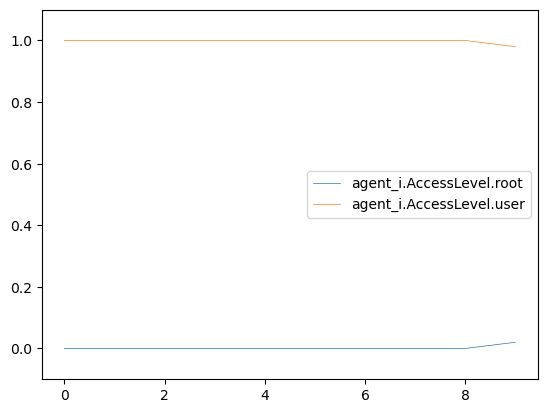

agent_j.AccessLevel.root  agent_j.AccessLevel.user agent_j.action  \
0                       0.0                       1.0      FileRecon   
1                       0.0                       1.0   EnumAccounts   
2                       0.0                       1.0     PrivEscAcc   
3                       0.0                       1.0     PrivEscAcc   
4                       0.0                       1.0     PrivEscAcc   
5                       0.0                       1.0      FileRecon   
6                       0.0                       1.0           Exit   
7                       0.0                       1.0            Nop   
8                       0.0                       1.0            Nop   
9                       0.0                       1.0            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                            auth                   user_files   
1   DecoyAccount                          denied                         none   
2   LockAccounts                          denied                   user_files   
3   LockAccounts                          denied                         none   
4   LockAccounts                          denied                   user_files   
5   LockAccounts                            auth                   user_files   
6   LockAccounts                            auth                         none   
7   LockAccounts                            auth                   user_files   
8            Nop                          denied                   user_files   
9            Nop                            auth                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                          active   
2                           failure                          active   
3                           failure                          active   
4                           success                          active   
5                           failure                          active   
6                           failure                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2               acc_policy_change  
3               acc_policy_change  
4               acc_policy_change  
5               acc_policy_change  
6                            none  
7                            none  
8                            none  
9                            none

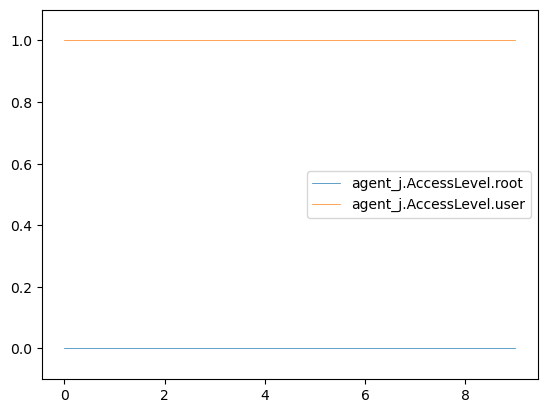

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes agent_i.action agent_j.action
0                   1.0                    0.0        LogIOCs      FileRecon
1                   1.0                    0.0   DecoyAccount   EnumAccounts
2                   0.0                    1.0   LockAccounts     PrivEscAcc
3                   0.0                    1.0   LockAccounts     PrivEscAcc
4                   0.0                    1.0   LockAccounts     PrivEscAcc
5                   0.0                    1.0   LockAccounts      FileRecon
6                   0.0                    1.0   LockAccounts           Exit
7                   0.0                    1.0   LockAccounts            Nop
8                   0.0                    1.0            Nop            Nop
9                   0.0                    1.0            Nop            Nop

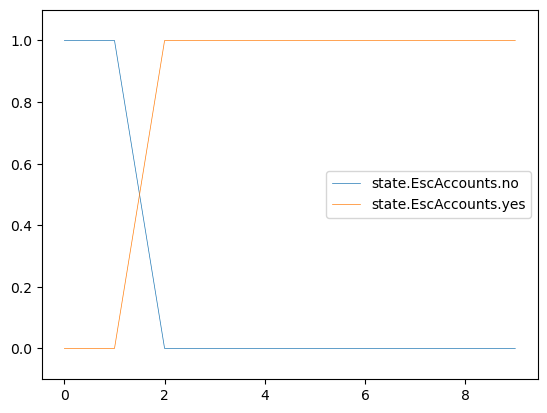

agent_i.EscAccounts.no  agent_i.EscAccounts.yes agent_i.action  \
0                     1.0                      0.0        LogIOCs   
1                     1.0                      0.0   DecoyAccount   
2                     0.0                      1.0   LockAccounts   
3                     0.0                      1.0   LockAccounts   
4                     0.0                      1.0   LockAccounts   
5                     0.0                      1.0   LockAccounts   
6                     0.0                      1.0   LockAccounts   
7                     0.0                      1.0   LockAccounts   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1   EnumAccounts                        file_enum  
2     PrivEscAcc                   login_activity  
3     PrivEscAcc                   login_activity  
4     PrivEscAcc                             none  
5      FileRecon                             none  
6           Exit                             none  
7            Nop                             none  
8            Nop                       file_write  
9            Nop                             none

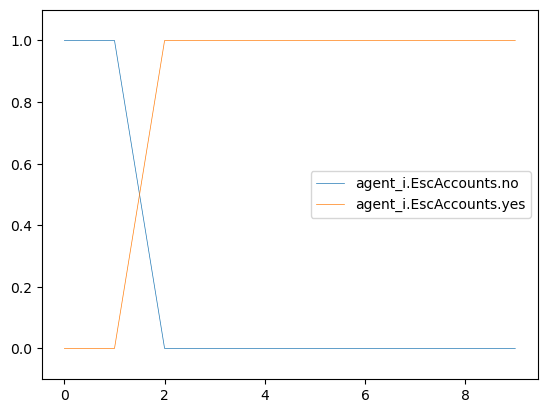

agent_j.EscAccounts.no  agent_j.EscAccounts.yes agent_j.action  \
0                0.500000                 0.500000      FileRecon   
1                0.500000                 0.500000   EnumAccounts   
2                0.083333                 0.916667     PrivEscAcc   
3                0.142857                 0.857143     PrivEscAcc   
4                0.193166                 0.806834     PrivEscAcc   
5                0.761834                 0.238165      FileRecon   
6                0.761834                 0.238165           Exit   
7                0.761835                 0.238166            Nop   
8                0.761835                 0.238166            Nop   
9                0.761835                 0.238166            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                            auth                   user_files   
1   DecoyAccount                          denied                         none   
2   LockAccounts                          denied                   user_files   
3   LockAccounts                          denied                         none   
4   LockAccounts                          denied                   user_files   
5   LockAccounts                            auth                   user_files   
6   LockAccounts                            auth                         none   
7   LockAccounts                            auth                   user_files   
8            Nop                          denied                   user_files   
9            Nop                            auth                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                          active   
2                           failure                          active   
3                           failure                          active   
4                           success                          active   
5                           failure                          active   
6                           failure                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2               acc_policy_change  
3               acc_policy_change  
4               acc_policy_change  
5               acc_policy_change  
6                            none  
7                            none  
8                            none  
9                            none

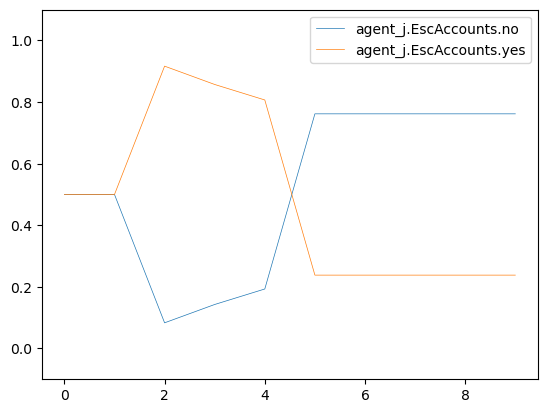

=============AccFound============


state.AccFound.no  state.AccFound.yes agent_i.action agent_j.action
0                1.0                 0.0        LogIOCs      FileRecon
1                1.0                 0.0   DecoyAccount   EnumAccounts
2                0.0                 1.0   LockAccounts     PrivEscAcc
3                0.0                 1.0   LockAccounts     PrivEscAcc
4                0.0                 1.0   LockAccounts     PrivEscAcc
5                0.0                 1.0   LockAccounts      FileRecon
6                0.0                 1.0   LockAccounts           Exit
7                0.0                 1.0   LockAccounts            Nop
8                0.0                 1.0            Nop            Nop
9                0.0                 1.0            Nop            Nop

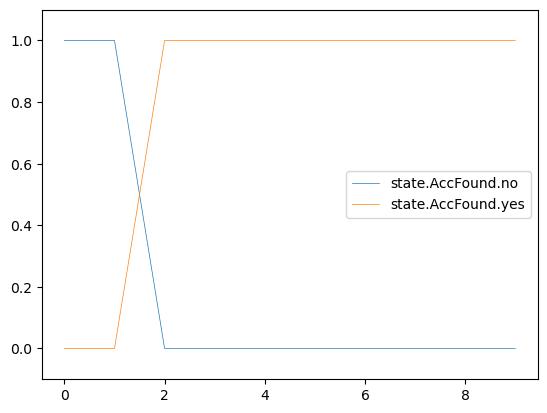

agent_i.AccFound.no  agent_i.AccFound.yes agent_i.action agent_j.action  \
0             1.000000              0.000000        LogIOCs      FileRecon   
1             1.000000              0.000000   DecoyAccount   EnumAccounts   
2             0.305224              0.694776   LockAccounts     PrivEscAcc   
3             0.077058              0.922942   LockAccounts     PrivEscAcc   
4             0.049569              0.950430   LockAccounts     PrivEscAcc   
5             0.074568              0.925432   LockAccounts      FileRecon   
6             0.186922              0.813078   LockAccounts           Exit   
7             0.325815              0.674185   LockAccounts            Nop   
8             0.368274              0.631726            Nop            Nop   
9             0.368119              0.631881            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                   login_activity  
3                   login_activity  
4                             none  
5                             none  
6                             none  
7                             none  
8                       file_write  
9                             none

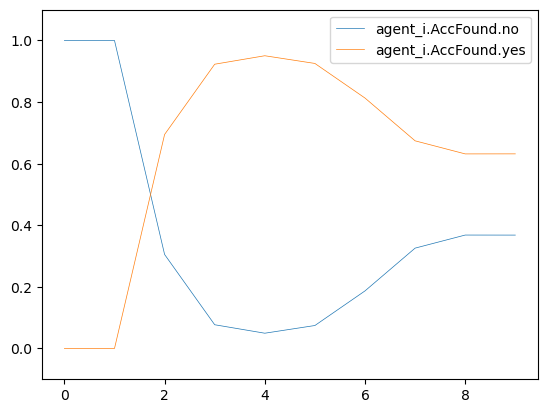

agent_j.AccFound.no  agent_j.AccFound.yes agent_j.action agent_i.action  \
0             1.000000              0.000000      FileRecon        LogIOCs   
1             1.000000              0.000000   EnumAccounts   DecoyAccount   
2             0.125000              0.875000     PrivEscAcc   LockAccounts   
3             0.190000              0.810000     PrivEscAcc   LockAccounts   
4             0.253553              0.746447     PrivEscAcc   LockAccounts   
5             1.000000              0.000000      FileRecon   LockAccounts   
6             1.000000              0.000000           Exit   LockAccounts   
7             1.000000              0.000000            Nop   LockAccounts   
8             1.000000              0.000000            Nop            Nop   
9             1.000000              0.000000            Nop            Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                            auth                   user_files   
1                          denied                         none   
2                          denied                   user_files   
3                          denied                         none   
4                          denied                   user_files   
5                            auth                   user_files   
6                            auth                         none   
7                            auth                   user_files   
8                          denied                   user_files   
9                            auth                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                          active   
2                           failure                          active   
3                           failure                          active   
4                           success                          active   
5                           failure                          active   
6                           failure                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2               acc_policy_change  
3               acc_policy_change  
4               acc_policy_change  
5               acc_policy_change  
6                            none  
7                            none  
8                            none  
9                            none

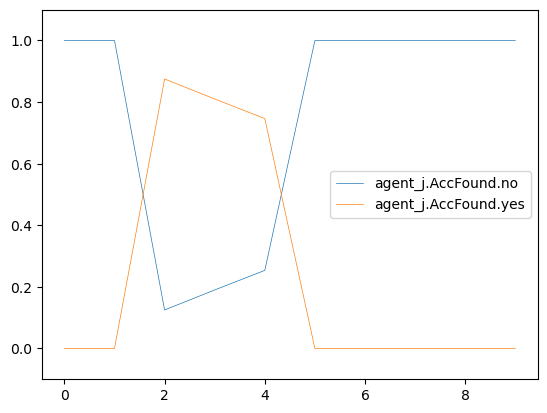

=============DataFound============


state.DataFound.no  state.DataFound.yes agent_i.action agent_j.action
0                 1.0                  0.0        LogIOCs      FileRecon
1                 1.0                  0.0   DecoyAccount   EnumAccounts
2                 1.0                  0.0   LockAccounts     PrivEscAcc
3                 1.0                  0.0   LockAccounts     PrivEscAcc
4                 1.0                  0.0   LockAccounts     PrivEscAcc
5                 1.0                  0.0   LockAccounts      FileRecon
6                 1.0                  0.0   LockAccounts           Exit
7                 1.0                  0.0   LockAccounts            Nop
8                 1.0                  0.0            Nop            Nop
9                 1.0                  0.0            Nop            Nop

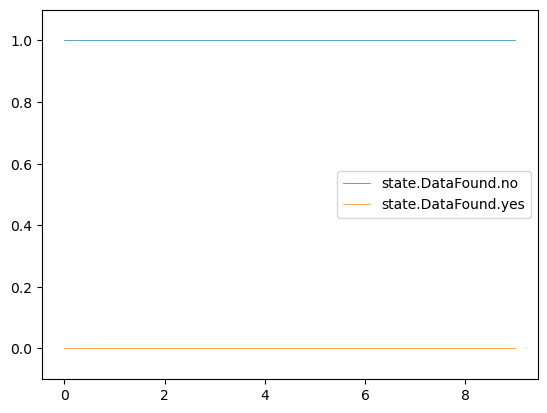

agent_i.DataFound.no  agent_i.DataFound.yes agent_i.action agent_j.action  \
0                   1.0                    0.0        LogIOCs      FileRecon   
1                   1.0                    0.0   DecoyAccount   EnumAccounts   
2                   1.0                    0.0   LockAccounts     PrivEscAcc   
3                   1.0                    0.0   LockAccounts     PrivEscAcc   
4                   1.0                    0.0   LockAccounts     PrivEscAcc   
5                   1.0                    0.0   LockAccounts      FileRecon   
6                   1.0                    0.0   LockAccounts           Exit   
7                   1.0                    0.0   LockAccounts            Nop   
8                   1.0                    0.0            Nop            Nop   
9                   1.0                    0.0            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                   login_activity  
3                   login_activity  
4                             none  
5                             none  
6                             none  
7                             none  
8                       file_write  
9                             none

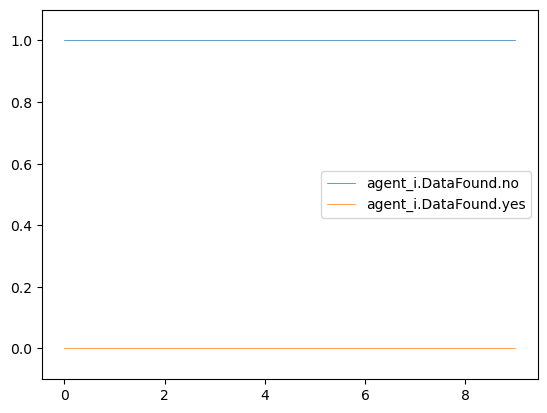

agent_j.DataFound.no  agent_j.DataFound.yes agent_j.action agent_i.action  \
0              1.000000               0.000000      FileRecon        LogIOCs   
1              0.954984               0.045016   EnumAccounts   DecoyAccount   
2              0.954984               0.045016     PrivEscAcc   LockAccounts   
3              0.954984               0.045016     PrivEscAcc   LockAccounts   
4              0.954984               0.045016     PrivEscAcc   LockAccounts   
5              0.954984               0.045016      FileRecon   LockAccounts   
6              0.974384               0.025616           Exit   LockAccounts   
7              0.974384               0.025616            Nop   LockAccounts   
8              0.974384               0.025616            Nop            Nop   
9              0.974384               0.025616            Nop            Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                            auth                   user_files   
1                          denied                         none   
2                          denied                   user_files   
3                          denied                         none   
4                          denied                   user_files   
5                            auth                   user_files   
6                            auth                         none   
7                            auth                   user_files   
8                          denied                   user_files   
9                            auth                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                          active   
2                           failure                          active   
3                           failure                          active   
4                           success                          active   
5                           failure                          active   
6                           failure                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2               acc_policy_change  
3               acc_policy_change  
4               acc_policy_change  
5               acc_policy_change  
6                            none  
7                            none  
8                            none  
9                            none

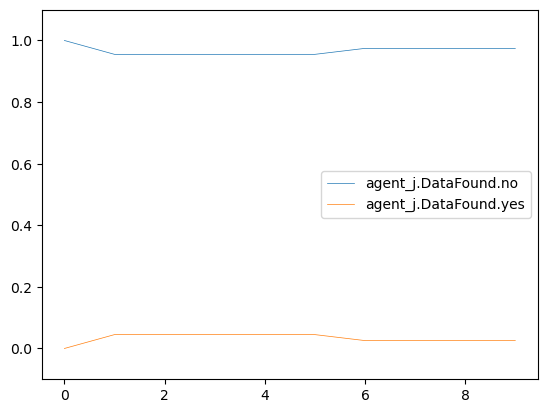

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes agent_i.action agent_j.action
0                    1.0                     0.0        LogIOCs      FileRecon
1                    1.0                     0.0   DecoyAccount   EnumAccounts
2                    1.0                     0.0   LockAccounts     PrivEscAcc
3                    1.0                     0.0   LockAccounts     PrivEscAcc
4                    1.0                     0.0   LockAccounts     PrivEscAcc
5                    1.0                     0.0   LockAccounts      FileRecon
6                    1.0                     0.0   LockAccounts           Exit
7                    1.0                     0.0   LockAccounts            Nop
8                    1.0                     0.0            Nop            Nop
9                    1.0                     0.0            Nop            Nop

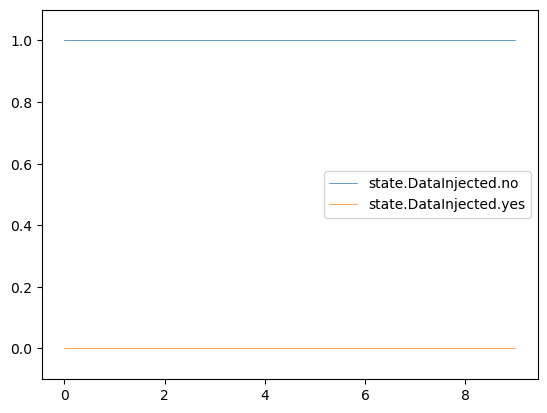

agent_i.DataInjected.no  agent_i.DataInjected.yes agent_i.action  \
0                      1.0                       0.0        LogIOCs   
1                      1.0                       0.0   DecoyAccount   
2                      1.0                       0.0   LockAccounts   
3                      1.0                       0.0   LockAccounts   
4                      1.0                       0.0   LockAccounts   
5                      1.0                       0.0   LockAccounts   
6                      1.0                       0.0   LockAccounts   
7                      1.0                       0.0   LockAccounts   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1   EnumAccounts                        file_enum  
2     PrivEscAcc                   login_activity  
3     PrivEscAcc                   login_activity  
4     PrivEscAcc                             none  
5      FileRecon                             none  
6           Exit                             none  
7            Nop                             none  
8            Nop                       file_write  
9            Nop                             none

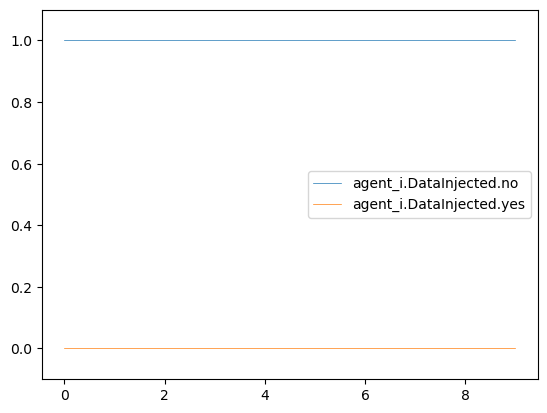

agent_j.DataInjected.no  agent_j.DataInjected.yes agent_j.action  \
0                      1.0                       0.0      FileRecon   
1                      1.0                       0.0   EnumAccounts   
2                      1.0                       0.0     PrivEscAcc   
3                      1.0                       0.0     PrivEscAcc   
4                      1.0                       0.0     PrivEscAcc   
5                      1.0                       0.0      FileRecon   
6                      1.0                       0.0           Exit   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                            auth                   user_files   
1   DecoyAccount                          denied                         none   
2   LockAccounts                          denied                   user_files   
3   LockAccounts                          denied                         none   
4   LockAccounts                          denied                   user_files   
5   LockAccounts                            auth                   user_files   
6   LockAccounts                            auth                         none   
7   LockAccounts                            auth                   user_files   
8            Nop                          denied                   user_files   
9            Nop                            auth                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                          active   
2                           failure                          active   
3                           failure                          active   
4                           success                          active   
5                           failure                          active   
6                           failure                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2               acc_policy_change  
3               acc_policy_change  
4               acc_policy_change  
5               acc_policy_change  
6                            none  
7                            none  
8                            none  
9                            none

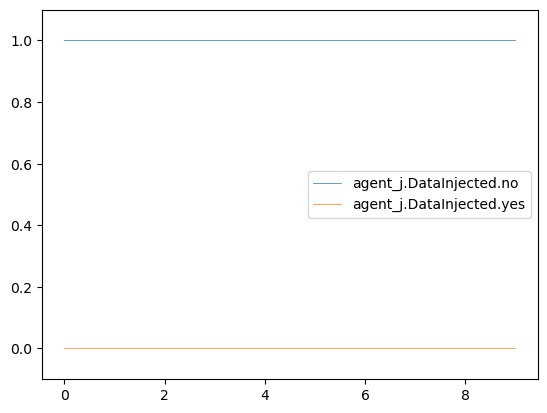

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes agent_i.action agent_j.action
0                   0.0                    1.0        LogIOCs      FileRecon
1                   0.0                    1.0   DecoyAccount   EnumAccounts
2                   0.0                    1.0   LockAccounts     PrivEscAcc
3                   0.0                    1.0   LockAccounts     PrivEscAcc
4                   0.0                    1.0   LockAccounts     PrivEscAcc
5                   0.0                    1.0   LockAccounts      FileRecon
6                   0.0                    1.0   LockAccounts           Exit
7                   0.0                    1.0   LockAccounts            Nop
8                   0.0                    1.0            Nop            Nop
9                   0.0                    1.0            Nop            Nop

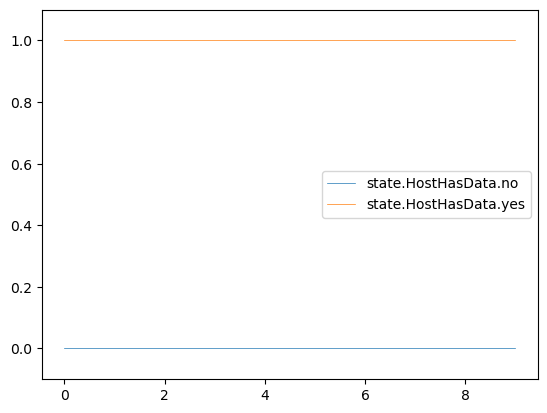

agent_i.HostHasData.no  agent_i.HostHasData.yes agent_i.action  \
0                     0.0                      1.0        LogIOCs   
1                     0.0                      1.0   DecoyAccount   
2                     0.0                      1.0   LockAccounts   
3                     0.0                      1.0   LockAccounts   
4                     0.0                      1.0   LockAccounts   
5                     0.0                      1.0   LockAccounts   
6                     0.0                      1.0   LockAccounts   
7                     0.0                      1.0   LockAccounts   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1   EnumAccounts                        file_enum  
2     PrivEscAcc                   login_activity  
3     PrivEscAcc                   login_activity  
4     PrivEscAcc                             none  
5      FileRecon                             none  
6           Exit                             none  
7            Nop                             none  
8            Nop                       file_write  
9            Nop                             none

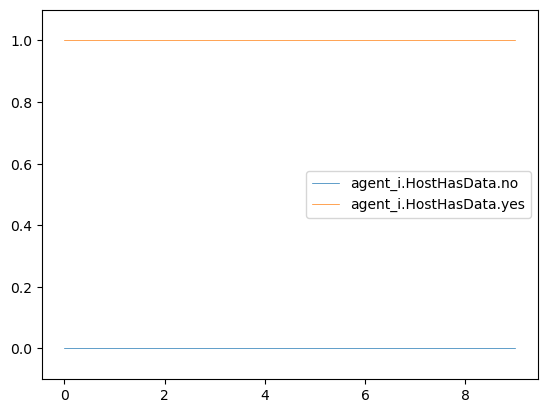

agent_j.HostHasData.no  agent_j.HostHasData.yes agent_j.action  \
0                0.500000                 0.500000      FileRecon   
1                0.578778                 0.421222   EnumAccounts   
2                0.578778                 0.421222     PrivEscAcc   
3                0.578778                 0.421222     PrivEscAcc   
4                0.578778                 0.421222     PrivEscAcc   
5                0.578778                 0.421222      FileRecon   
6                0.630669                 0.369331           Exit   
7                0.630669                 0.369331            Nop   
8                0.630669                 0.369331            Nop   
9                0.630669                 0.369331            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                            auth                   user_files   
1   DecoyAccount                          denied                         none   
2   LockAccounts                          denied                   user_files   
3   LockAccounts                          denied                         none   
4   LockAccounts                          denied                   user_files   
5   LockAccounts                            auth                   user_files   
6   LockAccounts                            auth                         none   
7   LockAccounts                            auth                   user_files   
8            Nop                          denied                   user_files   
9            Nop                            auth                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                          active   
2                           failure                          active   
3                           failure                          active   
4                           success                          active   
5                           failure                          active   
6                           failure                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2               acc_policy_change  
3               acc_policy_change  
4               acc_policy_change  
5               acc_policy_change  
6                            none  
7                            none  
8                            none  
9                            none

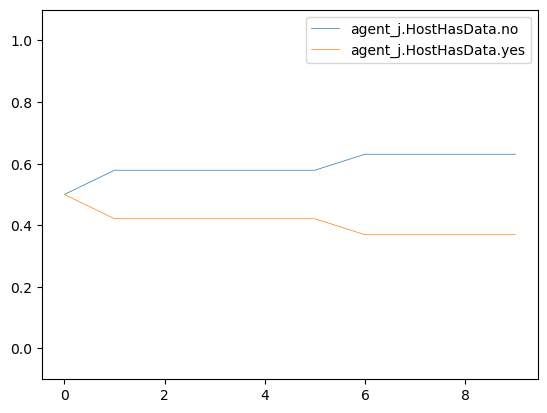

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user agent_i.action agent_j.action
0                   1.0                   0.0        LogIOCs      FileRecon
1                   1.0                   0.0   DecoyAccount   EnumAccounts
2                   1.0                   0.0   LockAccounts     PrivEscAcc
3                   1.0                   0.0   LockAccounts     PrivEscAcc
4                   1.0                   0.0   LockAccounts     PrivEscAcc
5                   1.0                   0.0   LockAccounts      FileRecon
6                   1.0                   0.0   LockAccounts           Exit
7                   1.0                   0.0   LockAccounts            Nop
8                   1.0                   0.0            Nop            Nop
9                   1.0                   0.0            Nop            Nop

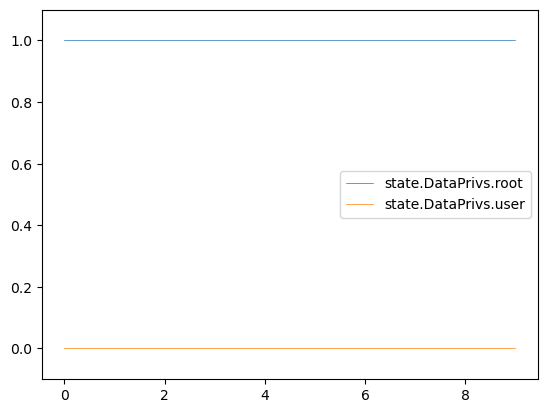

agent_i.DataPrivs.root  agent_i.DataPrivs.user agent_i.action  \
0                     1.0                     0.0        LogIOCs   
1                     1.0                     0.0   DecoyAccount   
2                     1.0                     0.0   LockAccounts   
3                     1.0                     0.0   LockAccounts   
4                     1.0                     0.0   LockAccounts   
5                     1.0                     0.0   LockAccounts   
6                     1.0                     0.0   LockAccounts   
7                     1.0                     0.0   LockAccounts   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1   EnumAccounts                        file_enum  
2     PrivEscAcc                   login_activity  
3     PrivEscAcc                   login_activity  
4     PrivEscAcc                             none  
5      FileRecon                             none  
6           Exit                             none  
7            Nop                             none  
8            Nop                       file_write  
9            Nop                             none

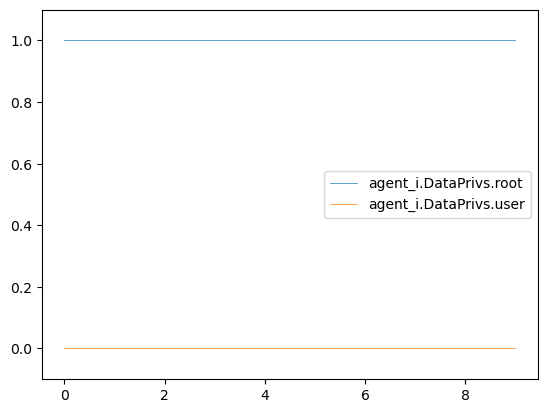

agent_j.DataPrivs.root  agent_j.DataPrivs.user agent_j.action  \
0                0.500000                0.500000      FileRecon   
1                0.578778                0.421222   EnumAccounts   
2                0.578778                0.421222     PrivEscAcc   
3                0.578778                0.421222     PrivEscAcc   
4                0.578778                0.421222     PrivEscAcc   
5                0.578778                0.421222      FileRecon   
6                0.630669                0.369331           Exit   
7                0.630669                0.369331            Nop   
8                0.630669                0.369331            Nop   
9                0.630669                0.369331            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                            auth                   user_files   
1   DecoyAccount                          denied                         none   
2   LockAccounts                          denied                   user_files   
3   LockAccounts                          denied                         none   
4   LockAccounts                          denied                   user_files   
5   LockAccounts                            auth                   user_files   
6   LockAccounts                            auth                         none   
7   LockAccounts                            auth                   user_files   
8            Nop                          denied                   user_files   
9            Nop                            auth                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                          active   
2                           failure                          active   
3                           failure                          active   
4                           success                          active   
5                           failure                          active   
6                           failure                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2               acc_policy_change  
3               acc_policy_change  
4               acc_policy_change  
5               acc_policy_change  
6                            none  
7                            none  
8                            none  
9                            none

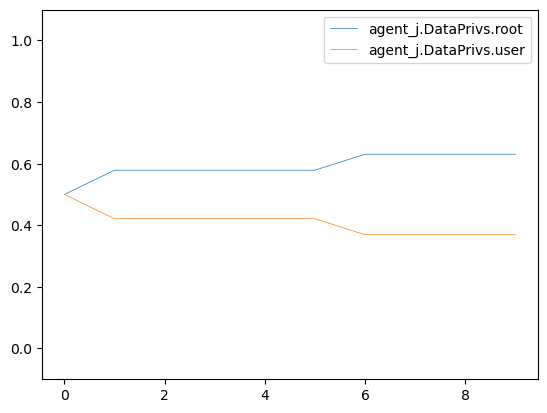

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot agent_i.action agent_j.action  
0                      1.0        LogIOCs      FileRecon  
1                      1.0   DecoyAccount   EnumAccounts  
2                      1.0   LockAccounts     PrivEscAcc  
3                      1.0   LockAccounts     PrivEscAcc  
4                      1.0   LockAccounts     PrivEscAcc  
5                      1.0   LockAccounts      FileRecon  
6                      1.0   LockAccounts           Exit  
7                      1.0   LockAccounts            Nop  
8                      1.0            Nop            Nop  
9                      1.0            Nop            Nop

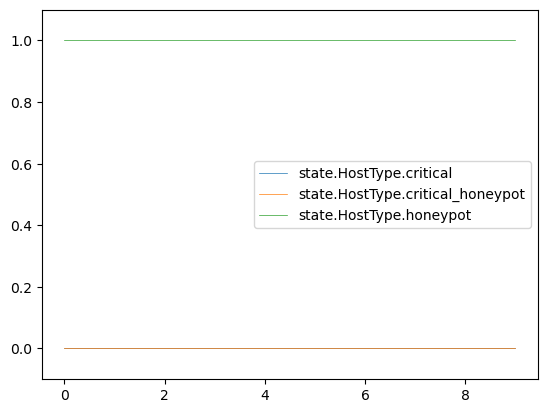

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot agent_i.action agent_j.action  \
0                        1.0        LogIOCs      FileRecon   
1                        1.0   DecoyAccount   EnumAccounts   
2                        1.0   LockAccounts     PrivEscAcc   
3                        1.0   LockAccounts     PrivEscAcc   
4                        1.0   LockAccounts     PrivEscAcc   
5                        1.0   LockAccounts      FileRecon   
6                        1.0   LockAccounts           Exit   
7                        1.0   LockAccounts            Nop   
8                        1.0            Nop            Nop   
9                        1.0            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                   login_activity  
3                   login_activity  
4                             none  
5                             none  
6                             none  
7                             none  
8                       file_write  
9                             none

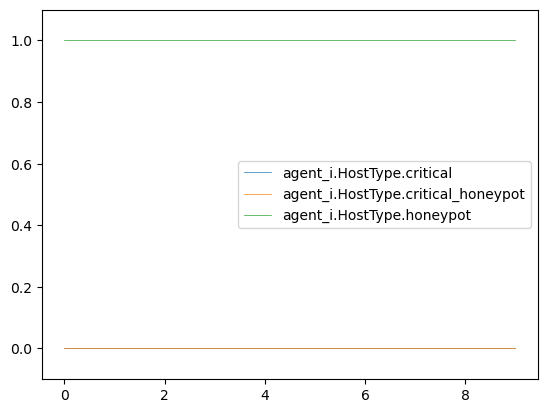

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_j.HostType.honeypot agent_j.action agent_i.action  \
0                        0.0      FileRecon        LogIOCs   
1                        0.0   EnumAccounts   DecoyAccount   
2                        0.0     PrivEscAcc   LockAccounts   
3                        0.0     PrivEscAcc   LockAccounts   
4                        0.0     PrivEscAcc   LockAccounts   
5                        0.0      FileRecon   LockAccounts   
6                        0.0           Exit   LockAccounts   
7                        0.0            Nop   LockAccounts   
8                        0.0            Nop            Nop   
9                        0.0            Nop            Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                            auth                   user_files   
1                          denied                         none   
2                          denied                   user_files   
3                          denied                         none   
4                          denied                   user_files   
5                            auth                   user_files   
6                            auth                         none   
7                            auth                   user_files   
8                          denied                   user_files   
9                            auth                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                          active   
2                           failure                          active   
3                           failure                          active   
4                           success                          active   
5                           failure                          active   
6                           failure                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2               acc_policy_change  
3               acc_policy_change  
4               acc_policy_change  
5               acc_policy_change  
6                            none  
7                            none  
8                            none  
9                            none

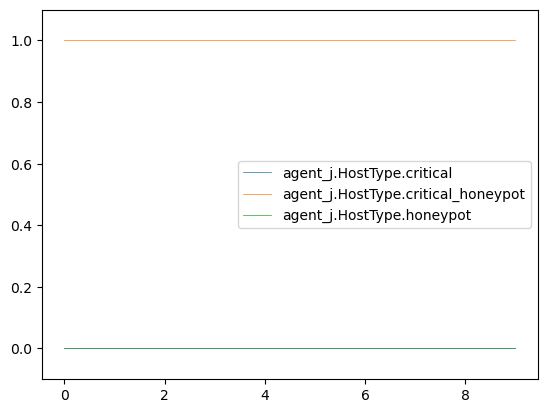

=============AttActive============


state.AttActive.no  state.AttActive.yes agent_i.action agent_j.action
0                 0.0                  1.0        LogIOCs      FileRecon
1                 0.0                  1.0   DecoyAccount   EnumAccounts
2                 0.0                  1.0   LockAccounts     PrivEscAcc
3                 0.0                  1.0   LockAccounts     PrivEscAcc
4                 0.0                  1.0   LockAccounts     PrivEscAcc
5                 0.0                  1.0   LockAccounts      FileRecon
6                 0.0                  1.0   LockAccounts           Exit
7                 1.0                  0.0   LockAccounts            Nop
8                 1.0                  0.0            Nop            Nop
9                 1.0                  0.0            Nop            Nop

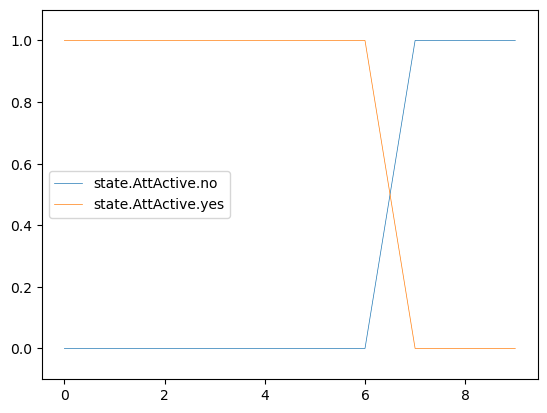

agent_i.AttActive.no  agent_i.AttActive.yes agent_i.action agent_j.action  \
0          0.000000e+00               1.000000        LogIOCs      FileRecon   
1          0.000000e+00               1.000000   DecoyAccount   EnumAccounts   
2          0.000000e+00               1.000000   LockAccounts     PrivEscAcc   
3          7.567961e-07               0.999999   LockAccounts     PrivEscAcc   
4          4.294361e-03               0.995705   LockAccounts     PrivEscAcc   
5          4.238654e-02               0.957613   LockAccounts      FileRecon   
6          3.985418e-01               0.601458   LockAccounts           Exit   
7          8.409393e-01               0.159061   LockAccounts            Nop   
8          9.752922e-01               0.024708            Nop            Nop   
9          9.762196e-01               0.023780            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                   login_activity  
3                   login_activity  
4                             none  
5                             none  
6                             none  
7                             none  
8                       file_write  
9                             none

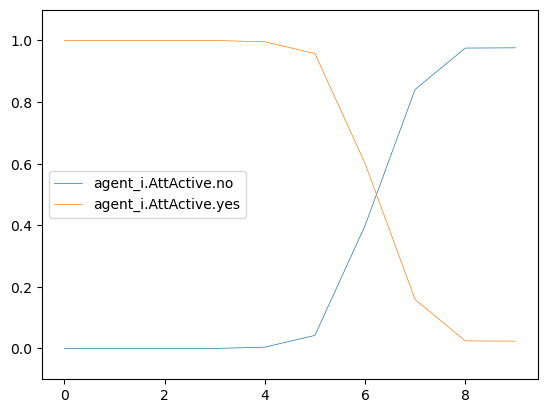

agent_j.AttActive.no  agent_j.AttActive.yes agent_j.action agent_i.action  \
0                   0.0                    1.0      FileRecon        LogIOCs   
1                   0.0                    1.0   EnumAccounts   DecoyAccount   
2                   0.0                    1.0     PrivEscAcc   LockAccounts   
3                   0.0                    1.0     PrivEscAcc   LockAccounts   
4                   0.0                    1.0     PrivEscAcc   LockAccounts   
5                   0.0                    1.0      FileRecon   LockAccounts   
6                   0.0                    1.0           Exit   LockAccounts   
7                   1.0                    0.0            Nop   LockAccounts   
8                   1.0                    0.0            Nop            Nop   
9                   1.0                    0.0            Nop            Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                            auth                   user_files   
1                          denied                         none   
2                          denied                   user_files   
3                          denied                         none   
4                          denied                   user_files   
5                            auth                   user_files   
6                            auth                         none   
7                            auth                   user_files   
8                          denied                   user_files   
9                            auth                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                          active   
2                           failure                          active   
3                           failure                          active   
4                           success                          active   
5                           failure                          active   
6                           failure                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2               acc_policy_change  
3               acc_policy_change  
4               acc_policy_change  
5               acc_policy_change  
6                            none  
7                            none  
8                            none  
9                            none

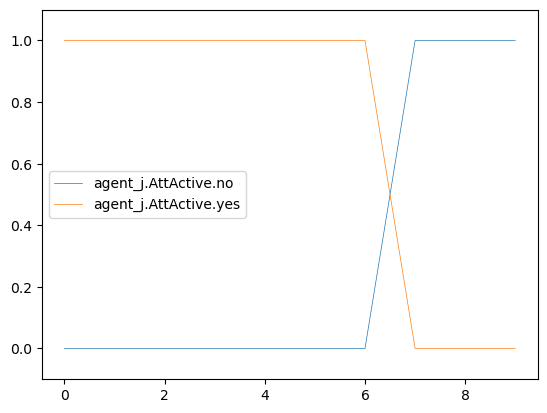

=============IOCsLogged============


state.IOCsLogged.no  state.IOCsLogged.yes agent_i.action agent_j.action
0                  1.0                   0.0        LogIOCs      FileRecon
1                  0.0                   1.0   DecoyAccount   EnumAccounts
2                  0.0                   1.0   LockAccounts     PrivEscAcc
3                  0.0                   1.0   LockAccounts     PrivEscAcc
4                  0.0                   1.0   LockAccounts     PrivEscAcc
5                  0.0                   1.0   LockAccounts      FileRecon
6                  0.0                   1.0   LockAccounts           Exit
7                  0.0                   1.0   LockAccounts            Nop
8                  0.0                   1.0            Nop            Nop
9                  0.0                   1.0            Nop            Nop

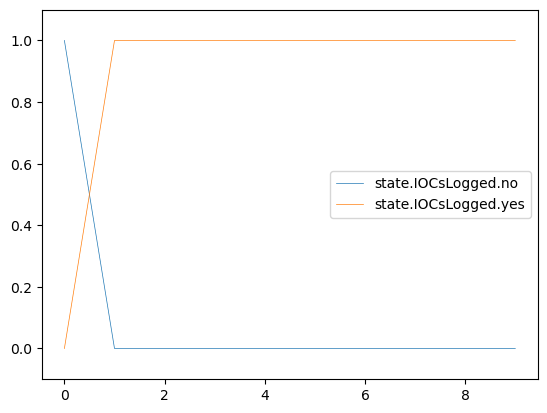

agent_i.IOCsLogged.no  agent_i.IOCsLogged.yes agent_i.action  \
0                    1.0                     0.0        LogIOCs   
1                    0.0                     1.0   DecoyAccount   
2                    0.0                     1.0   LockAccounts   
3                    0.0                     1.0   LockAccounts   
4                    0.0                     1.0   LockAccounts   
5                    0.0                     1.0   LockAccounts   
6                    0.0                     1.0   LockAccounts   
7                    0.0                     1.0   LockAccounts   
8                    0.0                     1.0            Nop   
9                    0.0                     1.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1   EnumAccounts                        file_enum  
2     PrivEscAcc                   login_activity  
3     PrivEscAcc                   login_activity  
4     PrivEscAcc                             none  
5      FileRecon                             none  
6           Exit                             none  
7            Nop                             none  
8            Nop                       file_write  
9            Nop                             none

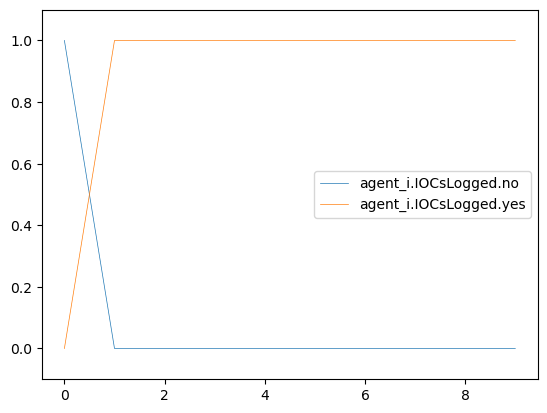

agent_j.IOCsLogged.no  agent_j.IOCsLogged.yes agent_j.action  \
0               1.000000                0.000000      FileRecon   
1               0.750000                0.250000   EnumAccounts   
2               0.633333                0.366667     PrivEscAcc   
3               0.995714                0.004286     PrivEscAcc   
4               0.997562                0.002438     PrivEscAcc   
5               0.990385                0.009615      FileRecon   
6               0.990385                0.009615           Exit   
7               0.990385                0.009615            Nop   
8               0.990385                0.009615            Nop   
9               0.990385                0.009615            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                            auth                   user_files   
1   DecoyAccount                          denied                         none   
2   LockAccounts                          denied                   user_files   
3   LockAccounts                          denied                         none   
4   LockAccounts                          denied                   user_files   
5   LockAccounts                            auth                   user_files   
6   LockAccounts                            auth                         none   
7   LockAccounts                            auth                   user_files   
8            Nop                          denied                   user_files   
9            Nop                            auth                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                          active   
2                           failure                          active   
3                           failure                          active   
4                           success                          active   
5                           failure                          active   
6                           failure                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2               acc_policy_change  
3               acc_policy_change  
4               acc_policy_change  
5               acc_policy_change  
6                            none  
7                            none  
8                            none  
9                            none

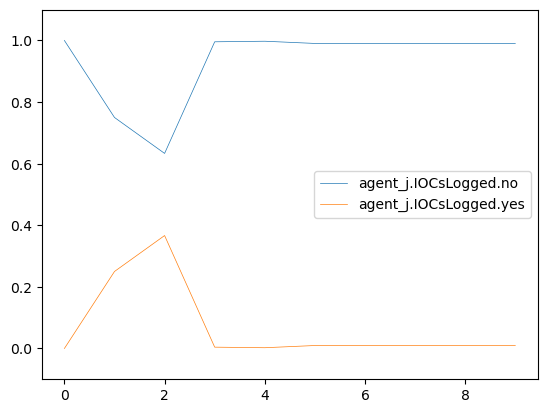

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                             none
2                               1.0                        file_enum
3                               1.0                       file_write
4                               1.0                             none
5                               1.0                   login_activity
6                               1.0                       file_write
7                               1.0                             none
8                               1.0                             none
9                               1.0                             none

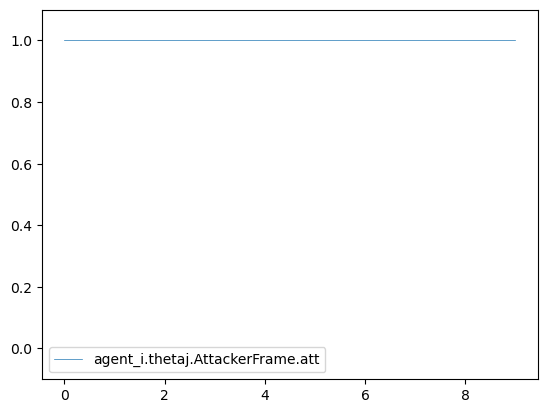

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.500000                        0.500000   
2                         0.436364                        0.563636   
3                         0.430536                        0.569464   
4                         0.358409                        0.641591   
5                         0.192145                        0.807855   
6                         0.192145                        0.807855   
7                         0.192145                        0.807855   
8                         0.192145                        0.807855   
9                         0.192145                        0.807855   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                         none   
1                          denied                         none   
2                          denied                         none   
3                          denied                         none   
4                          denied                         none   
5                          denied                         none   
6                            auth                   user_files   
7                          denied                   user_files   
8                          denied                         none   
9                          denied                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                          active   
2                           success                          active   
3                           success                          active   
4                           success                          active   
5                           failure                          active   
6                           success                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3               acc_policy_change  
4               acc_policy_change  
5               acc_policy_change  
6                            none  
7                            none  
8                            none  
9                            none

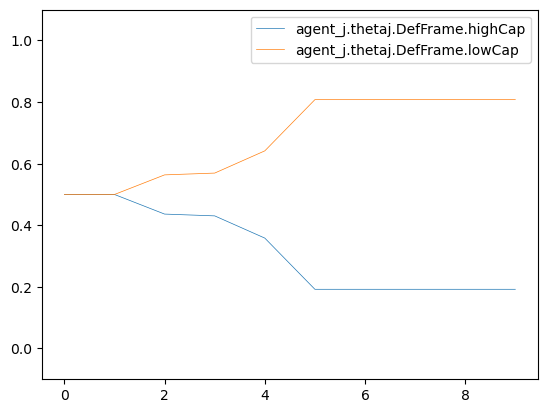

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user agent_i.action  \
0                     0.0                     1.0        LogIOCs   
1                     0.0                     1.0   DecoyAccount   
2                     0.0                     1.0   LockAccounts   
3                     0.0                     1.0   LockAccounts   
4                     0.0                     1.0   LockAccounts   
5                     0.0                     1.0   LockAccounts   
6                     0.0                     1.0   LockAccounts   
7                     0.0                     1.0   LockAccounts   
8                     0.0                     1.0            Nop   
9                     0.0                     1.0            Nop   

  agent_j.action  
0      FileRecon  
1   EnumAccounts  
2   EnumAccounts  
3     PrivEscAcc  
4     PrivEscAcc  
5      FileRecon  
6           Exit  
7            Nop  
8            Nop  
9            Nop

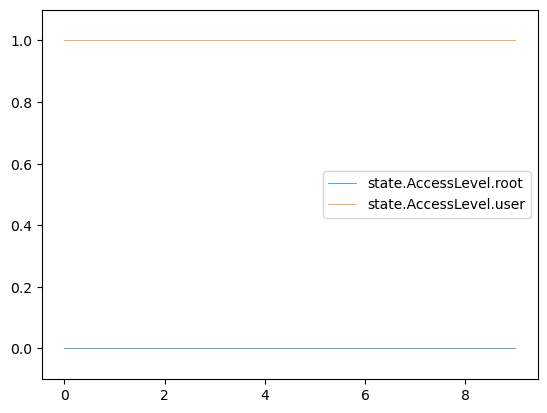

agent_i.AccessLevel.root  agent_i.AccessLevel.user agent_i.action  \
0                  0.000000                  1.000000        LogIOCs   
1                  0.000000                  1.000000   DecoyAccount   
2                  0.000000                  1.000000   LockAccounts   
3                  0.000000                  1.000000   LockAccounts   
4                  0.000000                  1.000000   LockAccounts   
5                  0.000000                  1.000000   LockAccounts   
6                  0.000000                  1.000000   LockAccounts   
7                  0.000000                  1.000000   LockAccounts   
8                  0.000000                  1.000000            Nop   
9                  0.010779                  0.989221            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1   EnumAccounts                             none  
2   EnumAccounts                        file_enum  
3     PrivEscAcc                       file_write  
4     PrivEscAcc                             none  
5      FileRecon                   login_activity  
6           Exit                       file_write  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

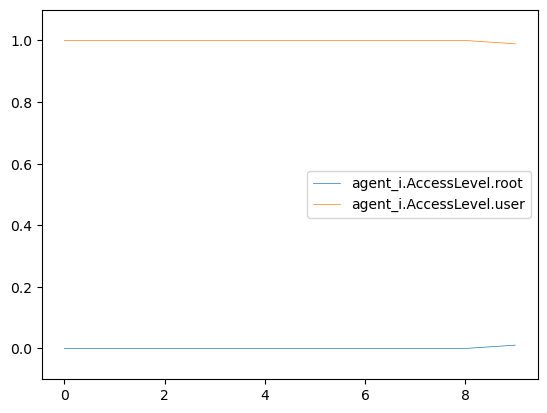

agent_j.AccessLevel.root  agent_j.AccessLevel.user agent_j.action  \
0                       0.0                       1.0      FileRecon   
1                       0.0                       1.0   EnumAccounts   
2                       0.0                       1.0   EnumAccounts   
3                       0.0                       1.0     PrivEscAcc   
4                       0.0                       1.0     PrivEscAcc   
5                       0.0                       1.0      FileRecon   
6                       0.0                       1.0           Exit   
7                       0.0                       1.0            Nop   
8                       0.0                       1.0            Nop   
9                       0.0                       1.0            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                          denied                         none   
1   DecoyAccount                          denied                         none   
2   LockAccounts                          denied                         none   
3   LockAccounts                          denied                         none   
4   LockAccounts                          denied                         none   
5   LockAccounts                          denied                         none   
6   LockAccounts                            auth                   user_files   
7   LockAccounts                          denied                   user_files   
8            Nop                          denied                         none   
9            Nop                          denied                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                          active   
2                           success                          active   
3                           success                          active   
4                           success                          active   
5                           failure                          active   
6                           success                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3               acc_policy_change  
4               acc_policy_change  
5               acc_policy_change  
6                            none  
7                            none  
8                            none  
9                            none

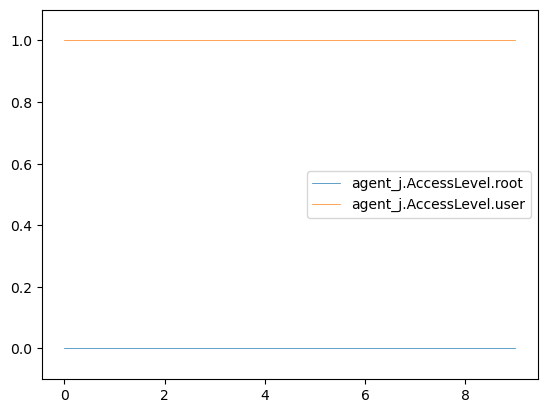

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes agent_i.action agent_j.action
0                   1.0                    0.0        LogIOCs      FileRecon
1                   1.0                    0.0   DecoyAccount   EnumAccounts
2                   0.0                    1.0   LockAccounts   EnumAccounts
3                   0.0                    1.0   LockAccounts     PrivEscAcc
4                   0.0                    1.0   LockAccounts     PrivEscAcc
5                   0.0                    1.0   LockAccounts      FileRecon
6                   0.0                    1.0   LockAccounts           Exit
7                   0.0                    1.0   LockAccounts            Nop
8                   0.0                    1.0            Nop            Nop
9                   0.0                    1.0            Nop            Nop

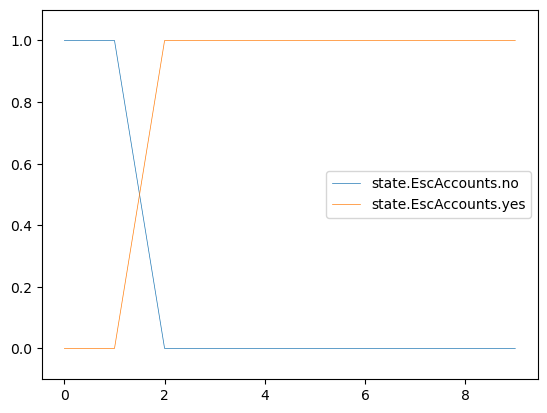

agent_i.EscAccounts.no  agent_i.EscAccounts.yes agent_i.action  \
0                     1.0                      0.0        LogIOCs   
1                     1.0                      0.0   DecoyAccount   
2                     0.0                      1.0   LockAccounts   
3                     0.0                      1.0   LockAccounts   
4                     0.0                      1.0   LockAccounts   
5                     0.0                      1.0   LockAccounts   
6                     0.0                      1.0   LockAccounts   
7                     0.0                      1.0   LockAccounts   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1   EnumAccounts                             none  
2   EnumAccounts                        file_enum  
3     PrivEscAcc                       file_write  
4     PrivEscAcc                             none  
5      FileRecon                   login_activity  
6           Exit                       file_write  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

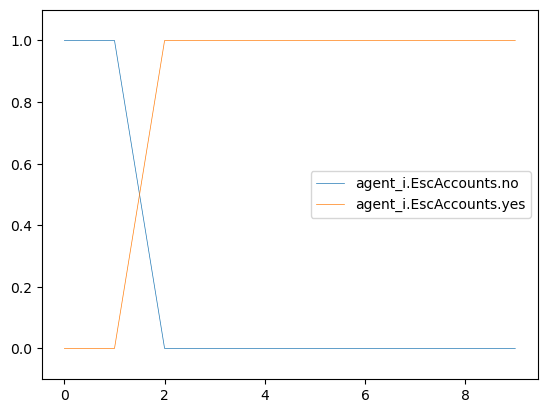

agent_j.EscAccounts.no  agent_j.EscAccounts.yes agent_j.action  \
0                0.500000                 0.500000      FileRecon   
1                0.500000                 0.500000   EnumAccounts   
2                0.613636                 0.386364   EnumAccounts   
3                0.159044                 0.840956     PrivEscAcc   
4                0.680014                 0.319986     PrivEscAcc   
5                0.856235                 0.143765      FileRecon   
6                0.856235                 0.143765           Exit   
7                0.856235                 0.143765            Nop   
8                0.856235                 0.143765            Nop   
9                0.856235                 0.143765            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                          denied                         none   
1   DecoyAccount                          denied                         none   
2   LockAccounts                          denied                         none   
3   LockAccounts                          denied                         none   
4   LockAccounts                          denied                         none   
5   LockAccounts                          denied                         none   
6   LockAccounts                            auth                   user_files   
7   LockAccounts                          denied                   user_files   
8            Nop                          denied                         none   
9            Nop                          denied                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                          active   
2                           success                          active   
3                           success                          active   
4                           success                          active   
5                           failure                          active   
6                           success                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3               acc_policy_change  
4               acc_policy_change  
5               acc_policy_change  
6                            none  
7                            none  
8                            none  
9                            none

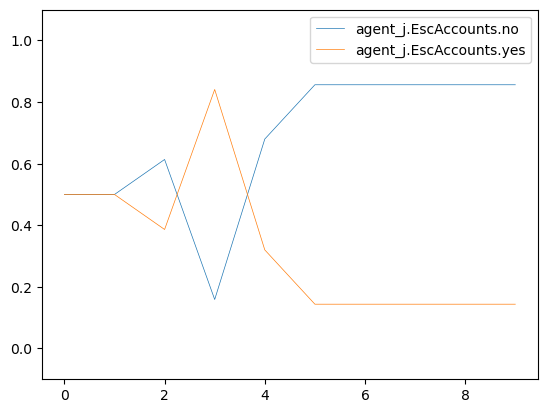

=============AccFound============


state.AccFound.no  state.AccFound.yes agent_i.action agent_j.action
0                1.0                 0.0        LogIOCs      FileRecon
1                1.0                 0.0   DecoyAccount   EnumAccounts
2                1.0                 0.0   LockAccounts   EnumAccounts
3                0.0                 1.0   LockAccounts     PrivEscAcc
4                0.0                 1.0   LockAccounts     PrivEscAcc
5                0.0                 1.0   LockAccounts      FileRecon
6                0.0                 1.0   LockAccounts           Exit
7                0.0                 1.0   LockAccounts            Nop
8                0.0                 1.0            Nop            Nop
9                0.0                 1.0            Nop            Nop

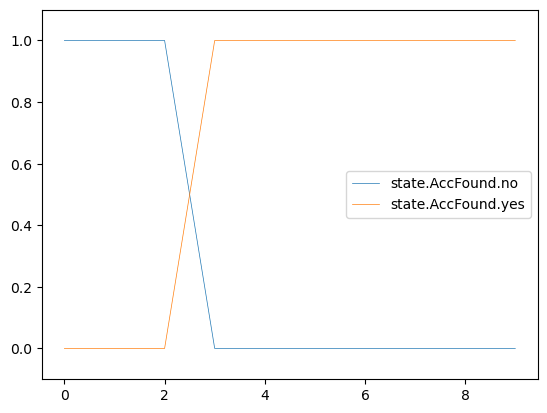

agent_i.AccFound.no  agent_i.AccFound.yes agent_i.action agent_j.action  \
0             1.000000              0.000000        LogIOCs      FileRecon   
1             1.000000              0.000000   DecoyAccount   EnumAccounts   
2             0.335000              0.665000   LockAccounts   EnumAccounts   
3             0.391455              0.608545   LockAccounts     PrivEscAcc   
4             0.409776              0.590224   LockAccounts     PrivEscAcc   
5             0.686912              0.313088   LockAccounts      FileRecon   
6             0.453056              0.546944   LockAccounts           Exit   
7             0.452112              0.547888   LockAccounts            Nop   
8             0.666068              0.333932            Nop            Nop   
9             0.713234              0.286766            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                             none  
2                        file_enum  
3                       file_write  
4                             none  
5                   login_activity  
6                       file_write  
7                             none  
8                             none  
9                             none

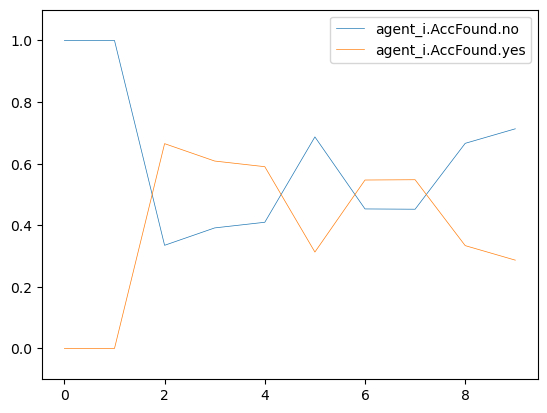

agent_j.AccFound.no  agent_j.AccFound.yes agent_j.action agent_i.action  \
0             1.000000              0.000000      FileRecon        LogIOCs   
1             1.000000              0.000000   EnumAccounts   DecoyAccount   
2             0.920454              0.079545   EnumAccounts   LockAccounts   
3             0.187285              0.812715     PrivEscAcc   LockAccounts   
4             0.794191              0.205809     PrivEscAcc   LockAccounts   
5             1.000000              0.000000      FileRecon   LockAccounts   
6             1.000000              0.000000           Exit   LockAccounts   
7             1.000000              0.000000            Nop   LockAccounts   
8             1.000000              0.000000            Nop            Nop   
9             1.000000              0.000000            Nop            Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                         none   
1                          denied                         none   
2                          denied                         none   
3                          denied                         none   
4                          denied                         none   
5                          denied                         none   
6                            auth                   user_files   
7                          denied                   user_files   
8                          denied                         none   
9                          denied                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                          active   
2                           success                          active   
3                           success                          active   
4                           success                          active   
5                           failure                          active   
6                           success                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3               acc_policy_change  
4               acc_policy_change  
5               acc_policy_change  
6                            none  
7                            none  
8                            none  
9                            none

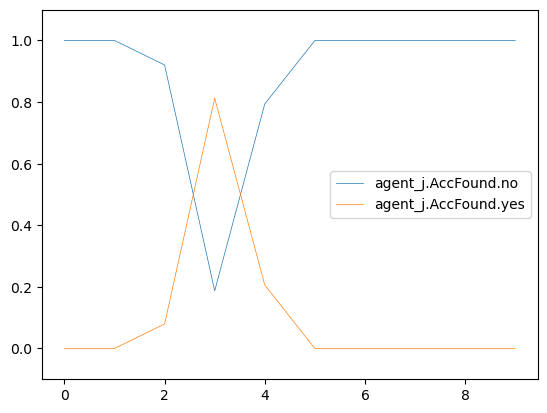

=============DataFound============


state.DataFound.no  state.DataFound.yes agent_i.action agent_j.action
0                 1.0                  0.0        LogIOCs      FileRecon
1                 1.0                  0.0   DecoyAccount   EnumAccounts
2                 1.0                  0.0   LockAccounts   EnumAccounts
3                 1.0                  0.0   LockAccounts     PrivEscAcc
4                 1.0                  0.0   LockAccounts     PrivEscAcc
5                 1.0                  0.0   LockAccounts      FileRecon
6                 1.0                  0.0   LockAccounts           Exit
7                 1.0                  0.0   LockAccounts            Nop
8                 1.0                  0.0            Nop            Nop
9                 1.0                  0.0            Nop            Nop

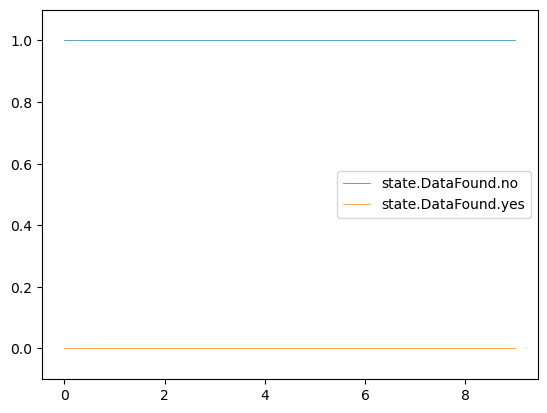

agent_i.DataFound.no  agent_i.DataFound.yes agent_i.action agent_j.action  \
0                   1.0                    0.0        LogIOCs      FileRecon   
1                   1.0                    0.0   DecoyAccount   EnumAccounts   
2                   1.0                    0.0   LockAccounts   EnumAccounts   
3                   1.0                    0.0   LockAccounts     PrivEscAcc   
4                   1.0                    0.0   LockAccounts     PrivEscAcc   
5                   1.0                    0.0   LockAccounts      FileRecon   
6                   1.0                    0.0   LockAccounts           Exit   
7                   1.0                    0.0   LockAccounts            Nop   
8                   1.0                    0.0            Nop            Nop   
9                   1.0                    0.0            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                             none  
2                        file_enum  
3                       file_write  
4                             none  
5                   login_activity  
6                       file_write  
7                             none  
8                             none  
9                             none

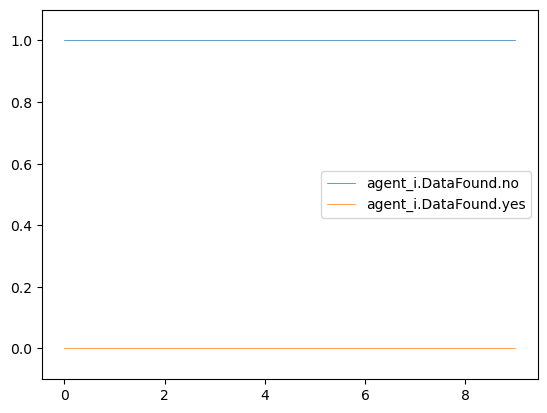

agent_j.DataFound.no  agent_j.DataFound.yes agent_j.action agent_i.action  \
0                   1.0                    0.0      FileRecon        LogIOCs   
1                   1.0                    0.0   EnumAccounts   DecoyAccount   
2                   1.0                    0.0   EnumAccounts   LockAccounts   
3                   1.0                    0.0     PrivEscAcc   LockAccounts   
4                   1.0                    0.0     PrivEscAcc   LockAccounts   
5                   1.0                    0.0      FileRecon   LockAccounts   
6                   1.0                    0.0           Exit   LockAccounts   
7                   1.0                    0.0            Nop   LockAccounts   
8                   1.0                    0.0            Nop            Nop   
9                   1.0                    0.0            Nop            Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                         none   
1                          denied                         none   
2                          denied                         none   
3                          denied                         none   
4                          denied                         none   
5                          denied                         none   
6                            auth                   user_files   
7                          denied                   user_files   
8                          denied                         none   
9                          denied                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                          active   
2                           success                          active   
3                           success                          active   
4                           success                          active   
5                           failure                          active   
6                           success                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3               acc_policy_change  
4               acc_policy_change  
5               acc_policy_change  
6                            none  
7                            none  
8                            none  
9                            none

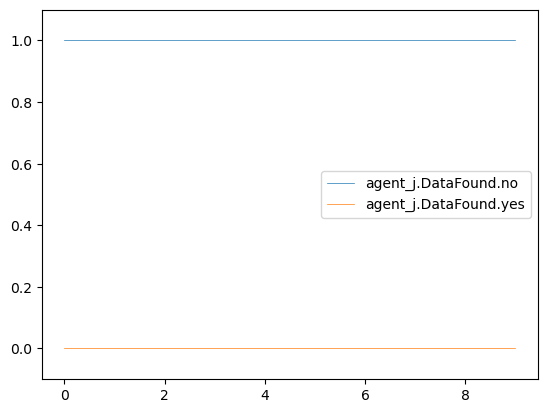

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes agent_i.action agent_j.action
0                    1.0                     0.0        LogIOCs      FileRecon
1                    1.0                     0.0   DecoyAccount   EnumAccounts
2                    1.0                     0.0   LockAccounts   EnumAccounts
3                    1.0                     0.0   LockAccounts     PrivEscAcc
4                    1.0                     0.0   LockAccounts     PrivEscAcc
5                    1.0                     0.0   LockAccounts      FileRecon
6                    1.0                     0.0   LockAccounts           Exit
7                    1.0                     0.0   LockAccounts            Nop
8                    1.0                     0.0            Nop            Nop
9                    1.0                     0.0            Nop            Nop

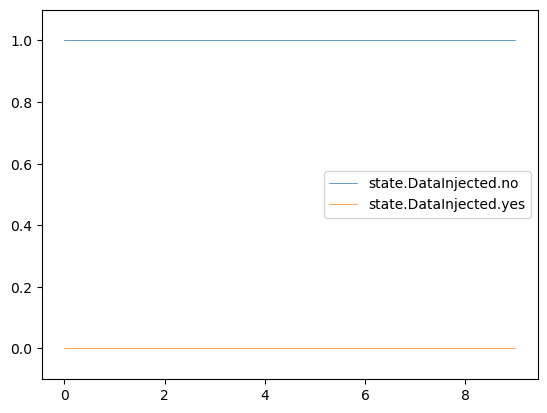

agent_i.DataInjected.no  agent_i.DataInjected.yes agent_i.action  \
0                      1.0                       0.0        LogIOCs   
1                      1.0                       0.0   DecoyAccount   
2                      1.0                       0.0   LockAccounts   
3                      1.0                       0.0   LockAccounts   
4                      1.0                       0.0   LockAccounts   
5                      1.0                       0.0   LockAccounts   
6                      1.0                       0.0   LockAccounts   
7                      1.0                       0.0   LockAccounts   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1   EnumAccounts                             none  
2   EnumAccounts                        file_enum  
3     PrivEscAcc                       file_write  
4     PrivEscAcc                             none  
5      FileRecon                   login_activity  
6           Exit                       file_write  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

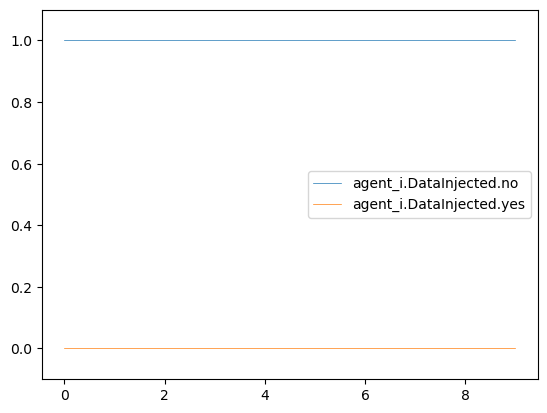

agent_j.DataInjected.no  agent_j.DataInjected.yes agent_j.action  \
0                      1.0                       0.0      FileRecon   
1                      1.0                       0.0   EnumAccounts   
2                      1.0                       0.0   EnumAccounts   
3                      1.0                       0.0     PrivEscAcc   
4                      1.0                       0.0     PrivEscAcc   
5                      1.0                       0.0      FileRecon   
6                      1.0                       0.0           Exit   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                          denied                         none   
1   DecoyAccount                          denied                         none   
2   LockAccounts                          denied                         none   
3   LockAccounts                          denied                         none   
4   LockAccounts                          denied                         none   
5   LockAccounts                          denied                         none   
6   LockAccounts                            auth                   user_files   
7   LockAccounts                          denied                   user_files   
8            Nop                          denied                         none   
9            Nop                          denied                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                          active   
2                           success                          active   
3                           success                          active   
4                           success                          active   
5                           failure                          active   
6                           success                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3               acc_policy_change  
4               acc_policy_change  
5               acc_policy_change  
6                            none  
7                            none  
8                            none  
9                            none

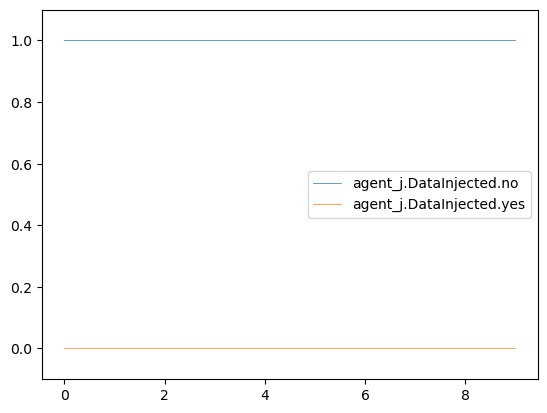

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes agent_i.action agent_j.action
0                   0.0                    1.0        LogIOCs      FileRecon
1                   0.0                    1.0   DecoyAccount   EnumAccounts
2                   0.0                    1.0   LockAccounts   EnumAccounts
3                   0.0                    1.0   LockAccounts     PrivEscAcc
4                   0.0                    1.0   LockAccounts     PrivEscAcc
5                   0.0                    1.0   LockAccounts      FileRecon
6                   0.0                    1.0   LockAccounts           Exit
7                   0.0                    1.0   LockAccounts            Nop
8                   0.0                    1.0            Nop            Nop
9                   0.0                    1.0            Nop            Nop

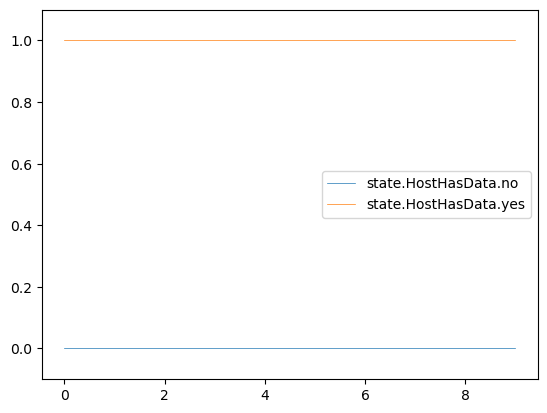

agent_i.HostHasData.no  agent_i.HostHasData.yes agent_i.action  \
0                     0.0                      1.0        LogIOCs   
1                     0.0                      1.0   DecoyAccount   
2                     0.0                      1.0   LockAccounts   
3                     0.0                      1.0   LockAccounts   
4                     0.0                      1.0   LockAccounts   
5                     0.0                      1.0   LockAccounts   
6                     0.0                      1.0   LockAccounts   
7                     0.0                      1.0   LockAccounts   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1   EnumAccounts                             none  
2   EnumAccounts                        file_enum  
3     PrivEscAcc                       file_write  
4     PrivEscAcc                             none  
5      FileRecon                   login_activity  
6           Exit                       file_write  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

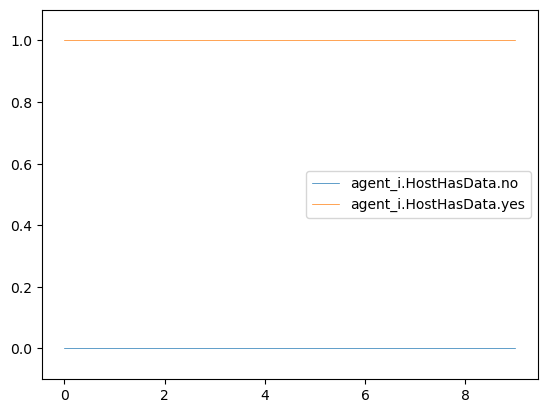

agent_j.HostHasData.no  agent_j.HostHasData.yes agent_j.action  \
0                0.500000                 0.500000      FileRecon   
1                0.606061                 0.393939   EnumAccounts   
2                0.606061                 0.393939   EnumAccounts   
3                0.606061                 0.393939     PrivEscAcc   
4                0.606061                 0.393939     PrivEscAcc   
5                0.606061                 0.393939      FileRecon   
6                0.647249                 0.352751           Exit   
7                0.647249                 0.352751            Nop   
8                0.647249                 0.352751            Nop   
9                0.647249                 0.352751            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                          denied                         none   
1   DecoyAccount                          denied                         none   
2   LockAccounts                          denied                         none   
3   LockAccounts                          denied                         none   
4   LockAccounts                          denied                         none   
5   LockAccounts                          denied                         none   
6   LockAccounts                            auth                   user_files   
7   LockAccounts                          denied                   user_files   
8            Nop                          denied                         none   
9            Nop                          denied                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                          active   
2                           success                          active   
3                           success                          active   
4                           success                          active   
5                           failure                          active   
6                           success                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3               acc_policy_change  
4               acc_policy_change  
5               acc_policy_change  
6                            none  
7                            none  
8                            none  
9                            none

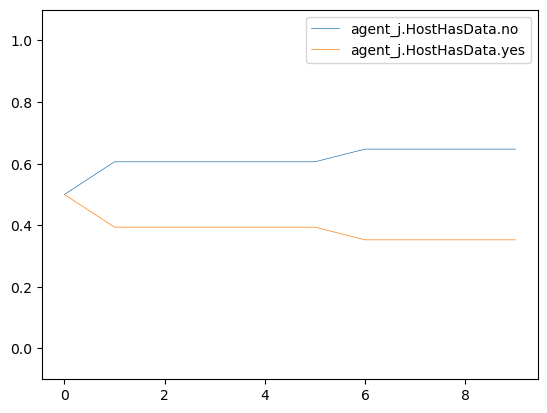

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user agent_i.action agent_j.action
0                   1.0                   0.0        LogIOCs      FileRecon
1                   1.0                   0.0   DecoyAccount   EnumAccounts
2                   1.0                   0.0   LockAccounts   EnumAccounts
3                   1.0                   0.0   LockAccounts     PrivEscAcc
4                   1.0                   0.0   LockAccounts     PrivEscAcc
5                   1.0                   0.0   LockAccounts      FileRecon
6                   1.0                   0.0   LockAccounts           Exit
7                   1.0                   0.0   LockAccounts            Nop
8                   1.0                   0.0            Nop            Nop
9                   1.0                   0.0            Nop            Nop

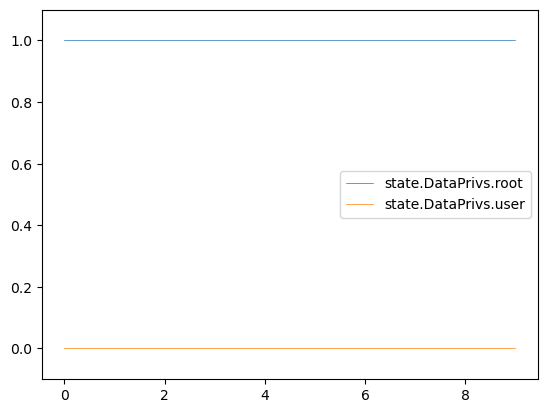

agent_i.DataPrivs.root  agent_i.DataPrivs.user agent_i.action  \
0                     1.0                     0.0        LogIOCs   
1                     1.0                     0.0   DecoyAccount   
2                     1.0                     0.0   LockAccounts   
3                     1.0                     0.0   LockAccounts   
4                     1.0                     0.0   LockAccounts   
5                     1.0                     0.0   LockAccounts   
6                     1.0                     0.0   LockAccounts   
7                     1.0                     0.0   LockAccounts   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1   EnumAccounts                             none  
2   EnumAccounts                        file_enum  
3     PrivEscAcc                       file_write  
4     PrivEscAcc                             none  
5      FileRecon                   login_activity  
6           Exit                       file_write  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

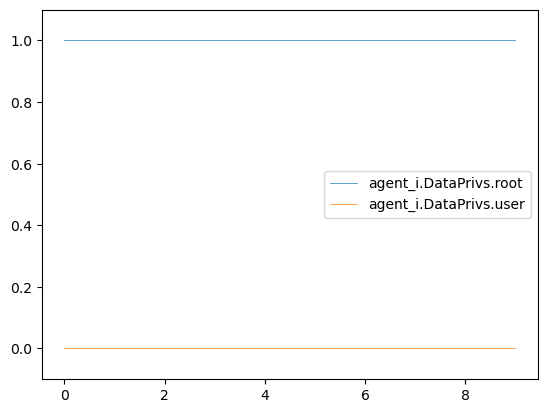

agent_j.DataPrivs.root  agent_j.DataPrivs.user agent_j.action  \
0                0.500000                0.500000      FileRecon   
1                0.606061                0.393939   EnumAccounts   
2                0.606061                0.393939   EnumAccounts   
3                0.606061                0.393939     PrivEscAcc   
4                0.606061                0.393939     PrivEscAcc   
5                0.606061                0.393939      FileRecon   
6                0.647249                0.352751           Exit   
7                0.647249                0.352751            Nop   
8                0.647249                0.352751            Nop   
9                0.647249                0.352751            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                          denied                         none   
1   DecoyAccount                          denied                         none   
2   LockAccounts                          denied                         none   
3   LockAccounts                          denied                         none   
4   LockAccounts                          denied                         none   
5   LockAccounts                          denied                         none   
6   LockAccounts                            auth                   user_files   
7   LockAccounts                          denied                   user_files   
8            Nop                          denied                         none   
9            Nop                          denied                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                          active   
2                           success                          active   
3                           success                          active   
4                           success                          active   
5                           failure                          active   
6                           success                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3               acc_policy_change  
4               acc_policy_change  
5               acc_policy_change  
6                            none  
7                            none  
8                            none  
9                            none

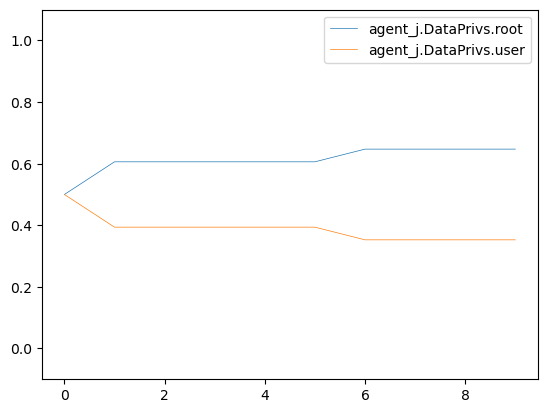

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot agent_i.action agent_j.action  
0                      1.0        LogIOCs      FileRecon  
1                      1.0   DecoyAccount   EnumAccounts  
2                      1.0   LockAccounts   EnumAccounts  
3                      1.0   LockAccounts     PrivEscAcc  
4                      1.0   LockAccounts     PrivEscAcc  
5                      1.0   LockAccounts      FileRecon  
6                      1.0   LockAccounts           Exit  
7                      1.0   LockAccounts            Nop  
8                      1.0            Nop            Nop  
9                      1.0            Nop            Nop

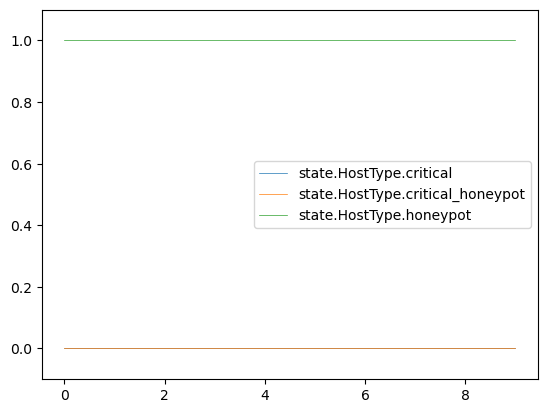

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot agent_i.action agent_j.action  \
0                        1.0        LogIOCs      FileRecon   
1                        1.0   DecoyAccount   EnumAccounts   
2                        1.0   LockAccounts   EnumAccounts   
3                        1.0   LockAccounts     PrivEscAcc   
4                        1.0   LockAccounts     PrivEscAcc   
5                        1.0   LockAccounts      FileRecon   
6                        1.0   LockAccounts           Exit   
7                        1.0   LockAccounts            Nop   
8                        1.0            Nop            Nop   
9                        1.0            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                             none  
2                        file_enum  
3                       file_write  
4                             none  
5                   login_activity  
6                       file_write  
7                             none  
8                             none  
9                             none

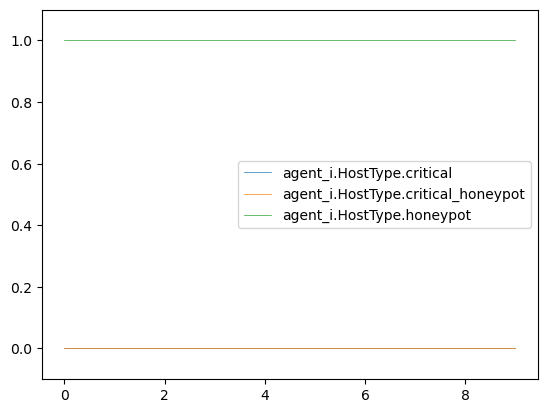

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_j.HostType.honeypot agent_j.action agent_i.action  \
0                        0.0      FileRecon        LogIOCs   
1                        0.0   EnumAccounts   DecoyAccount   
2                        0.0   EnumAccounts   LockAccounts   
3                        0.0     PrivEscAcc   LockAccounts   
4                        0.0     PrivEscAcc   LockAccounts   
5                        0.0      FileRecon   LockAccounts   
6                        0.0           Exit   LockAccounts   
7                        0.0            Nop   LockAccounts   
8                        0.0            Nop            Nop   
9                        0.0            Nop            Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                         none   
1                          denied                         none   
2                          denied                         none   
3                          denied                         none   
4                          denied                         none   
5                          denied                         none   
6                            auth                   user_files   
7                          denied                   user_files   
8                          denied                         none   
9                          denied                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                          active   
2                           success                          active   
3                           success                          active   
4                           success                          active   
5                           failure                          active   
6                           success                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3               acc_policy_change  
4               acc_policy_change  
5               acc_policy_change  
6                            none  
7                            none  
8                            none  
9                            none

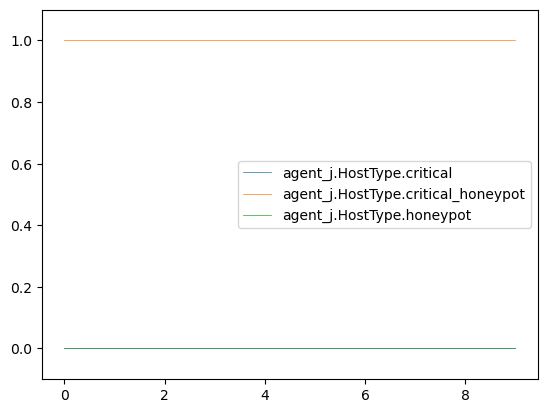

=============AttActive============


state.AttActive.no  state.AttActive.yes agent_i.action agent_j.action
0                 0.0                  1.0        LogIOCs      FileRecon
1                 0.0                  1.0   DecoyAccount   EnumAccounts
2                 0.0                  1.0   LockAccounts   EnumAccounts
3                 0.0                  1.0   LockAccounts     PrivEscAcc
4                 0.0                  1.0   LockAccounts     PrivEscAcc
5                 0.0                  1.0   LockAccounts      FileRecon
6                 0.0                  1.0   LockAccounts           Exit
7                 1.0                  0.0   LockAccounts            Nop
8                 1.0                  0.0            Nop            Nop
9                 1.0                  0.0            Nop            Nop

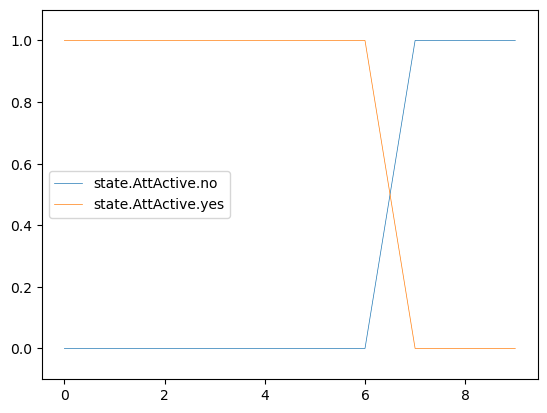

agent_i.AttActive.no  agent_i.AttActive.yes agent_i.action agent_j.action  \
0              0.000000               1.000000        LogIOCs      FileRecon   
1              0.000000               1.000000   DecoyAccount   EnumAccounts   
2              0.000000               1.000000   LockAccounts   EnumAccounts   
3              0.000008               0.999992   LockAccounts     PrivEscAcc   
4              0.257289               0.742711   LockAccounts     PrivEscAcc   
5              0.869599               0.130401   LockAccounts      FileRecon   
6              0.574222               0.425778   LockAccounts           Exit   
7              0.583588               0.416412   LockAccounts            Nop   
8              0.914588               0.085412            Nop            Nop   
9              0.987583               0.012417            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                             none  
2                        file_enum  
3                       file_write  
4                             none  
5                   login_activity  
6                       file_write  
7                             none  
8                             none  
9                             none

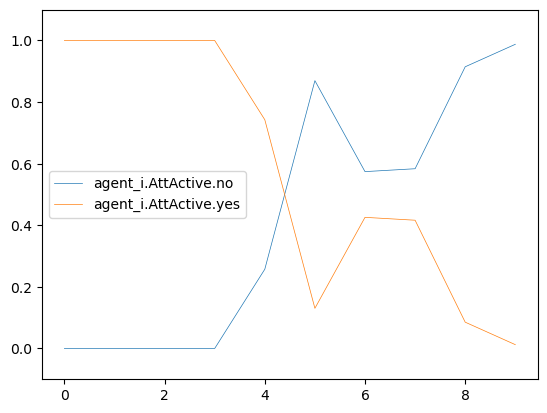

agent_j.AttActive.no  agent_j.AttActive.yes agent_j.action agent_i.action  \
0                   0.0                    1.0      FileRecon        LogIOCs   
1                   0.0                    1.0   EnumAccounts   DecoyAccount   
2                   0.0                    1.0   EnumAccounts   LockAccounts   
3                   0.0                    1.0     PrivEscAcc   LockAccounts   
4                   0.0                    1.0     PrivEscAcc   LockAccounts   
5                   0.0                    1.0      FileRecon   LockAccounts   
6                   0.0                    1.0           Exit   LockAccounts   
7                   1.0                    0.0            Nop   LockAccounts   
8                   1.0                    0.0            Nop            Nop   
9                   1.0                    0.0            Nop            Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                         none   
1                          denied                         none   
2                          denied                         none   
3                          denied                         none   
4                          denied                         none   
5                          denied                         none   
6                            auth                   user_files   
7                          denied                   user_files   
8                          denied                         none   
9                          denied                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                          active   
2                           success                          active   
3                           success                          active   
4                           success                          active   
5                           failure                          active   
6                           success                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3               acc_policy_change  
4               acc_policy_change  
5               acc_policy_change  
6                            none  
7                            none  
8                            none  
9                            none

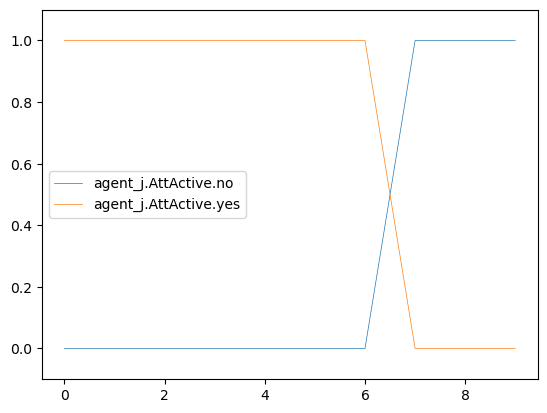

=============IOCsLogged============


state.IOCsLogged.no  state.IOCsLogged.yes agent_i.action agent_j.action
0                  1.0                   0.0        LogIOCs      FileRecon
1                  0.0                   1.0   DecoyAccount   EnumAccounts
2                  0.0                   1.0   LockAccounts   EnumAccounts
3                  0.0                   1.0   LockAccounts     PrivEscAcc
4                  0.0                   1.0   LockAccounts     PrivEscAcc
5                  0.0                   1.0   LockAccounts      FileRecon
6                  0.0                   1.0   LockAccounts           Exit
7                  0.0                   1.0   LockAccounts            Nop
8                  0.0                   1.0            Nop            Nop
9                  0.0                   1.0            Nop            Nop

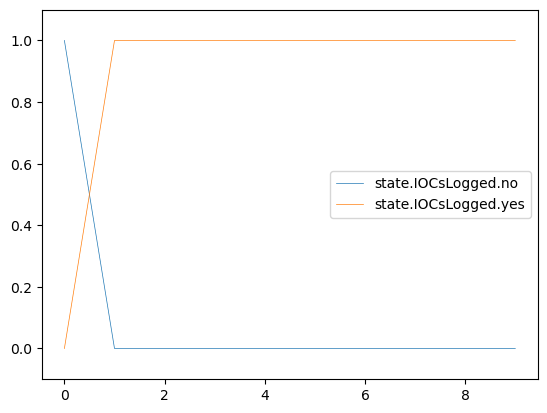

agent_i.IOCsLogged.no  agent_i.IOCsLogged.yes agent_i.action  \
0                    1.0                     0.0        LogIOCs   
1                    0.0                     1.0   DecoyAccount   
2                    0.0                     1.0   LockAccounts   
3                    0.0                     1.0   LockAccounts   
4                    0.0                     1.0   LockAccounts   
5                    0.0                     1.0   LockAccounts   
6                    0.0                     1.0   LockAccounts   
7                    0.0                     1.0   LockAccounts   
8                    0.0                     1.0            Nop   
9                    0.0                     1.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1   EnumAccounts                             none  
2   EnumAccounts                        file_enum  
3     PrivEscAcc                       file_write  
4     PrivEscAcc                             none  
5      FileRecon                   login_activity  
6           Exit                       file_write  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

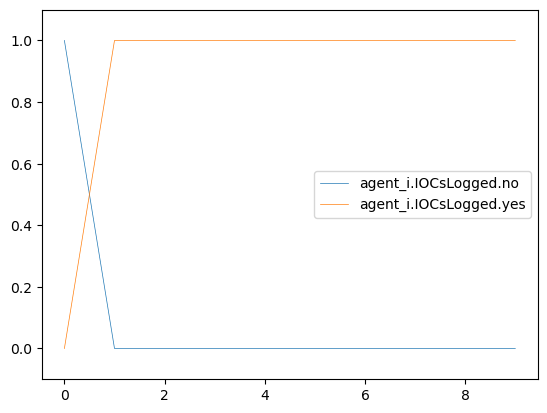

agent_j.IOCsLogged.no  agent_j.IOCsLogged.yes agent_j.action  \
0               1.000000                0.000000      FileRecon   
1               0.750000                0.250000   EnumAccounts   
2               0.845454                0.154545   EnumAccounts   
3               0.585282                0.414718     PrivEscAcc   
4               0.947025                0.052975     PrivEscAcc   
5               0.933296                0.066704      FileRecon   
6               0.933296                0.066704           Exit   
7               0.933296                0.066704            Nop   
8               0.933296                0.066704            Nop   
9               0.933296                0.066704            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                          denied                         none   
1   DecoyAccount                          denied                         none   
2   LockAccounts                          denied                         none   
3   LockAccounts                          denied                         none   
4   LockAccounts                          denied                         none   
5   LockAccounts                          denied                         none   
6   LockAccounts                            auth                   user_files   
7   LockAccounts                          denied                   user_files   
8            Nop                          denied                         none   
9            Nop                          denied                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                          active   
2                           success                          active   
3                           success                          active   
4                           success                          active   
5                           failure                          active   
6                           success                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3               acc_policy_change  
4               acc_policy_change  
5               acc_policy_change  
6                            none  
7                            none  
8                            none  
9                            none

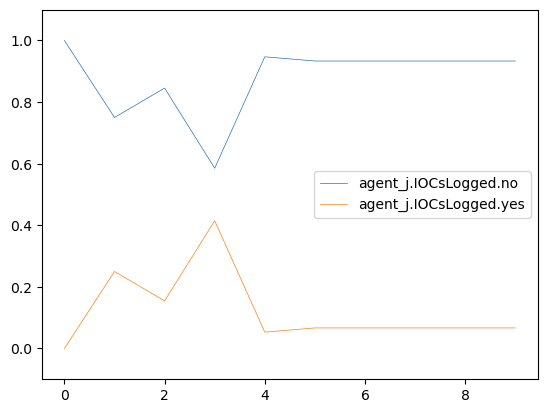

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                        file_enum
2                               1.0                        file_enum
3                               1.0                             none
4                               1.0                             none
5                               1.0                             none
6                               1.0                       file_write
7                               1.0                             none
8                               1.0                   login_activity
9                               1.0                             none

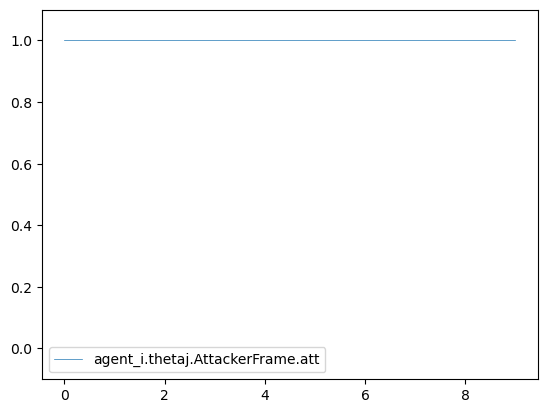

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.500000                        0.500000   
2                         0.436364                        0.563636   
3                         0.902669                        0.097331   
4                         0.902669                        0.097331   
5                         0.902669                        0.097331   
6                         0.902669                        0.097331   
7                         0.902669                        0.097331   
8                         0.902669                        0.097331   
9                         0.902669                        0.097331   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                            auth                         none   
1                          denied                         none   
2                            auth                   user_files   
3                            auth                   user_files   
4                          denied                   user_files   
5                          denied                   user_files   
6                          denied                   user_files   
7                          denied                   user_files   
8                          denied                         none   
9                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                          active   
2                           failure                          active   
3                           success                      terminated   
4                           failure                      terminated   
5                           failure                      terminated   
6                           failure                      terminated   
7                           failure                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2               acc_policy_change  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

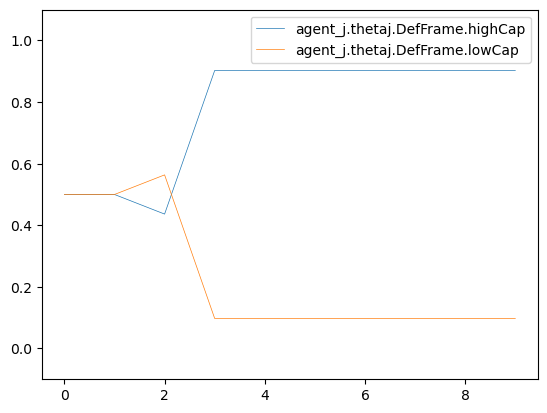

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user agent_i.action  \
0                     0.0                     1.0        LogIOCs   
1                     0.0                     1.0   DecoyAccount   
2                     0.0                     1.0   LockAccounts   
3                     0.0                     1.0   LockAccounts   
4                     0.0                     1.0   LockAccounts   
5                     0.0                     1.0            Nop   
6                     0.0                     1.0            Nop   
7                     0.0                     1.0            Nop   
8                     0.0                     1.0            Nop   
9                     0.0                     1.0            Nop   

  agent_j.action  
0      FileRecon  
1   EnumAccounts  
2      FileRecon  
3           Exit  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

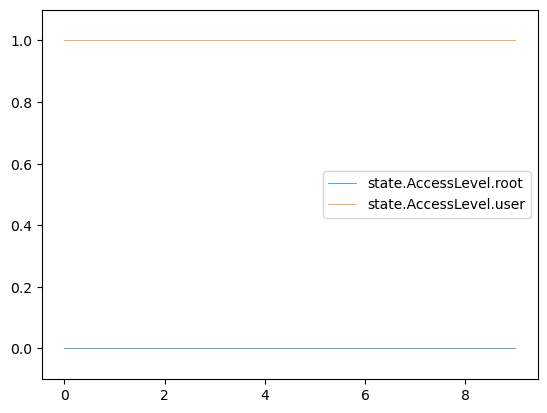

agent_i.AccessLevel.root  agent_i.AccessLevel.user agent_i.action  \
0                  0.000000                  1.000000        LogIOCs   
1                  0.000000                  1.000000   DecoyAccount   
2                  0.000000                  1.000000   LockAccounts   
3                  0.000000                  1.000000   LockAccounts   
4                  0.000000                  1.000000   LockAccounts   
5                  0.000000                  1.000000            Nop   
6                  0.003609                  0.996391            Nop   
7                  0.003784                  0.996216            Nop   
8                  0.000543                  0.999457            Nop   
9                  0.000543                  0.999457            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1   EnumAccounts                        file_enum  
2      FileRecon                        file_enum  
3           Exit                             none  
4            Nop                             none  
5            Nop                             none  
6            Nop                       file_write  
7            Nop                             none  
8            Nop                   login_activity  
9            Nop                             none

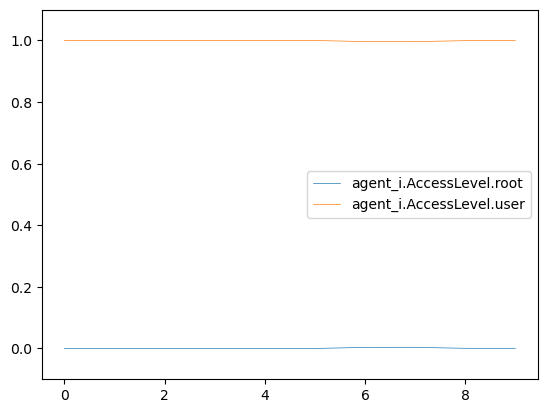

agent_j.AccessLevel.root  agent_j.AccessLevel.user agent_j.action  \
0                       0.0                       1.0      FileRecon   
1                       0.0                       1.0   EnumAccounts   
2                       0.0                       1.0      FileRecon   
3                       0.0                       1.0           Exit   
4                       0.0                       1.0            Nop   
5                       0.0                       1.0            Nop   
6                       0.0                       1.0            Nop   
7                       0.0                       1.0            Nop   
8                       0.0                       1.0            Nop   
9                       0.0                       1.0            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                            auth                         none   
1   DecoyAccount                          denied                         none   
2   LockAccounts                            auth                   user_files   
3   LockAccounts                            auth                   user_files   
4   LockAccounts                          denied                   user_files   
5            Nop                          denied                   user_files   
6            Nop                          denied                   user_files   
7            Nop                          denied                   user_files   
8            Nop                          denied                         none   
9            Nop                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                          active   
2                           failure                          active   
3                           success                      terminated   
4                           failure                      terminated   
5                           failure                      terminated   
6                           failure                      terminated   
7                           failure                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2               acc_policy_change  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

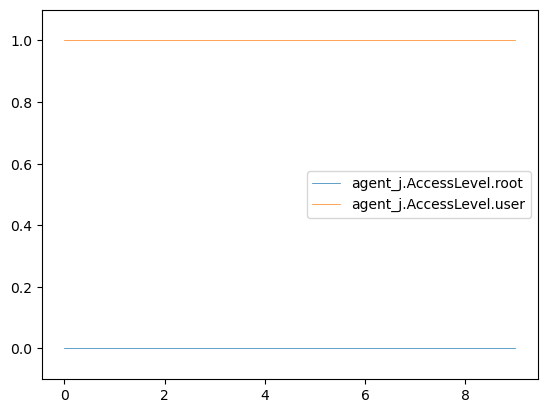

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes agent_i.action agent_j.action
0                   1.0                    0.0        LogIOCs      FileRecon
1                   1.0                    0.0   DecoyAccount   EnumAccounts
2                   0.0                    1.0   LockAccounts      FileRecon
3                   0.0                    1.0   LockAccounts           Exit
4                   0.0                    1.0   LockAccounts            Nop
5                   0.0                    1.0            Nop            Nop
6                   0.0                    1.0            Nop            Nop
7                   0.0                    1.0            Nop            Nop
8                   0.0                    1.0            Nop            Nop
9                   0.0                    1.0            Nop            Nop

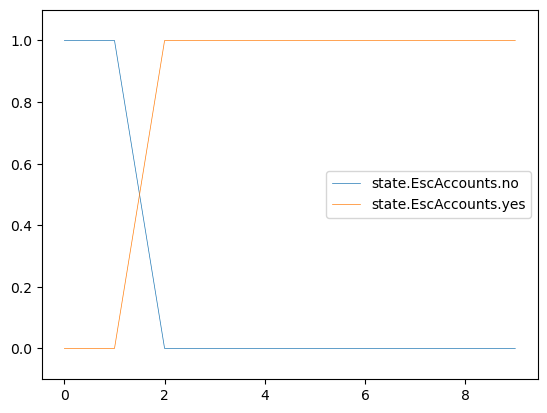

agent_i.EscAccounts.no  agent_i.EscAccounts.yes agent_i.action  \
0                     1.0                      0.0        LogIOCs   
1                     1.0                      0.0   DecoyAccount   
2                     0.0                      1.0   LockAccounts   
3                     0.0                      1.0   LockAccounts   
4                     0.0                      1.0   LockAccounts   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1   EnumAccounts                        file_enum  
2      FileRecon                        file_enum  
3           Exit                             none  
4            Nop                             none  
5            Nop                             none  
6            Nop                       file_write  
7            Nop                             none  
8            Nop                   login_activity  
9            Nop                             none

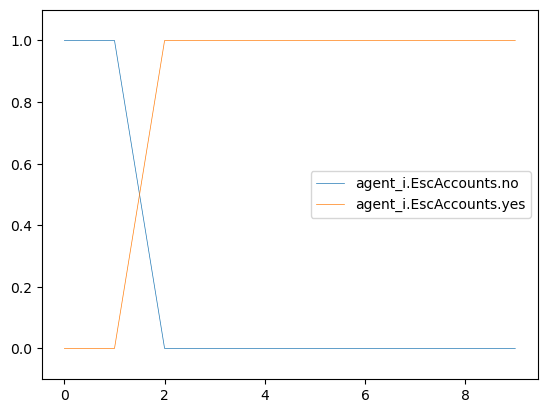

agent_j.EscAccounts.no  agent_j.EscAccounts.yes agent_j.action  \
0                0.500000                 0.500000      FileRecon   
1                0.500000                 0.500000   EnumAccounts   
2                0.613636                 0.386364      FileRecon   
3                0.706436                 0.293564           Exit   
4                0.706437                 0.293564            Nop   
5                0.706436                 0.293564            Nop   
6                0.706437                 0.293564            Nop   
7                0.706436                 0.293564            Nop   
8                0.706437                 0.293564            Nop   
9                0.706436                 0.293564            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                            auth                         none   
1   DecoyAccount                          denied                         none   
2   LockAccounts                            auth                   user_files   
3   LockAccounts                            auth                   user_files   
4   LockAccounts                          denied                   user_files   
5            Nop                          denied                   user_files   
6            Nop                          denied                   user_files   
7            Nop                          denied                   user_files   
8            Nop                          denied                         none   
9            Nop                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                          active   
2                           failure                          active   
3                           success                      terminated   
4                           failure                      terminated   
5                           failure                      terminated   
6                           failure                      terminated   
7                           failure                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2               acc_policy_change  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

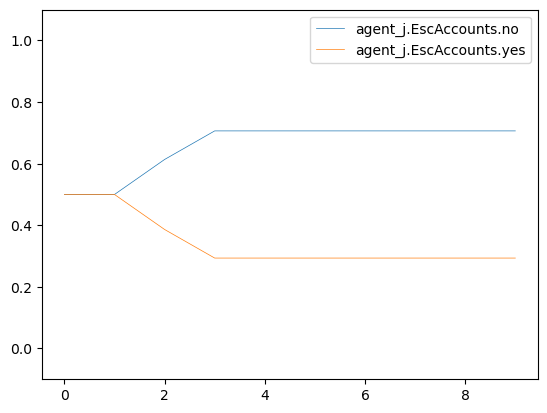

=============AccFound============


state.AccFound.no  state.AccFound.yes agent_i.action agent_j.action
0                1.0                 0.0        LogIOCs      FileRecon
1                1.0                 0.0   DecoyAccount   EnumAccounts
2                1.0                 0.0   LockAccounts      FileRecon
3                1.0                 0.0   LockAccounts           Exit
4                1.0                 0.0   LockAccounts            Nop
5                1.0                 0.0            Nop            Nop
6                1.0                 0.0            Nop            Nop
7                1.0                 0.0            Nop            Nop
8                1.0                 0.0            Nop            Nop
9                1.0                 0.0            Nop            Nop

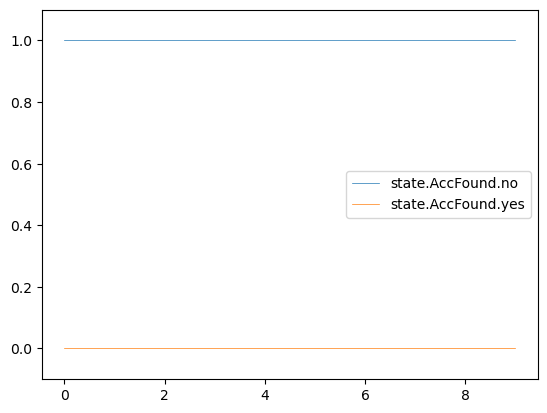

agent_i.AccFound.no  agent_i.AccFound.yes agent_i.action agent_j.action  \
0             1.000000              0.000000        LogIOCs      FileRecon   
1             1.000000              0.000000   DecoyAccount   EnumAccounts   
2             0.305224              0.694776   LockAccounts      FileRecon   
3             0.400784              0.599216   LockAccounts           Exit   
4             0.650134              0.349866   LockAccounts            Nop   
5             0.767053              0.232947            Nop            Nop   
6             0.785336              0.214664            Nop            Nop   
7             0.785282              0.214718            Nop            Nop   
8             0.787839              0.212161            Nop            Nop   
9             0.787838              0.212162            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                        file_enum  
3                             none  
4                             none  
5                             none  
6                       file_write  
7                             none  
8                   login_activity  
9                             none

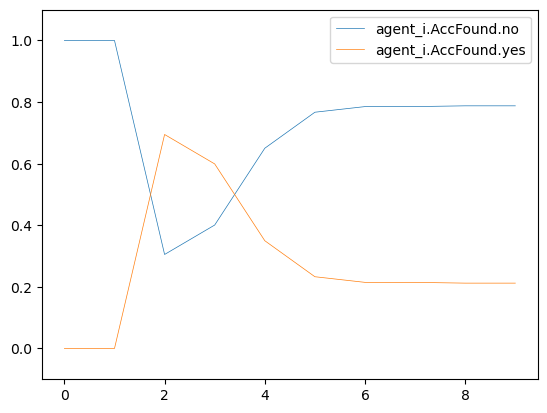

agent_j.AccFound.no  agent_j.AccFound.yes agent_j.action agent_i.action  \
0             1.000000              0.000000      FileRecon        LogIOCs   
1             1.000000              0.000000   EnumAccounts   DecoyAccount   
2             0.920454              0.079545      FileRecon   LockAccounts   
3             0.939560              0.060440           Exit   LockAccounts   
4             0.939561              0.060440            Nop   LockAccounts   
5             0.939560              0.060440            Nop            Nop   
6             0.939561              0.060440            Nop            Nop   
7             0.939560              0.060440            Nop            Nop   
8             0.939561              0.060440            Nop            Nop   
9             0.939560              0.060440            Nop            Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                            auth                         none   
1                          denied                         none   
2                            auth                   user_files   
3                            auth                   user_files   
4                          denied                   user_files   
5                          denied                   user_files   
6                          denied                   user_files   
7                          denied                   user_files   
8                          denied                         none   
9                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                          active   
2                           failure                          active   
3                           success                      terminated   
4                           failure                      terminated   
5                           failure                      terminated   
6                           failure                      terminated   
7                           failure                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2               acc_policy_change  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

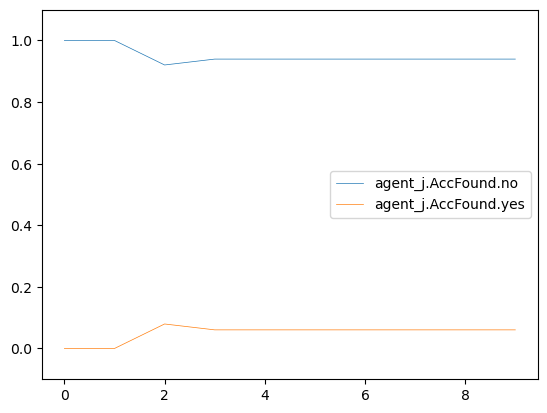

=============DataFound============


state.DataFound.no  state.DataFound.yes agent_i.action agent_j.action
0                 1.0                  0.0        LogIOCs      FileRecon
1                 1.0                  0.0   DecoyAccount   EnumAccounts
2                 1.0                  0.0   LockAccounts      FileRecon
3                 1.0                  0.0   LockAccounts           Exit
4                 1.0                  0.0   LockAccounts            Nop
5                 1.0                  0.0            Nop            Nop
6                 1.0                  0.0            Nop            Nop
7                 1.0                  0.0            Nop            Nop
8                 1.0                  0.0            Nop            Nop
9                 1.0                  0.0            Nop            Nop

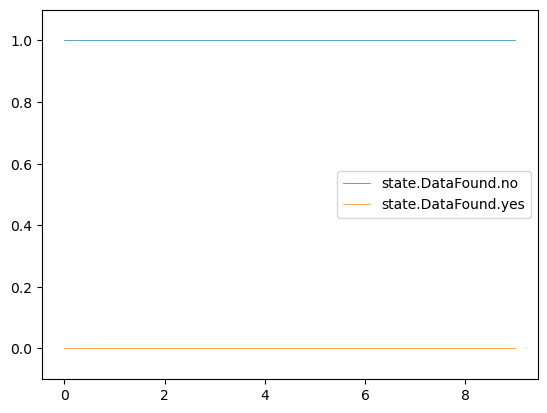

agent_i.DataFound.no  agent_i.DataFound.yes agent_i.action agent_j.action  \
0              1.000000               0.000000        LogIOCs      FileRecon   
1              1.000000               0.000000   DecoyAccount   EnumAccounts   
2              1.000000               0.000000   LockAccounts      FileRecon   
3              1.000000               0.000000   LockAccounts           Exit   
4              1.000000               0.000000   LockAccounts            Nop   
5              1.000000               0.000000            Nop            Nop   
6              1.000000               0.000000            Nop            Nop   
7              0.997474               0.002526            Nop            Nop   
8              0.999517               0.000483            Nop            Nop   
9              0.999492               0.000508            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                        file_enum  
3                             none  
4                             none  
5                             none  
6                       file_write  
7                             none  
8                   login_activity  
9                             none

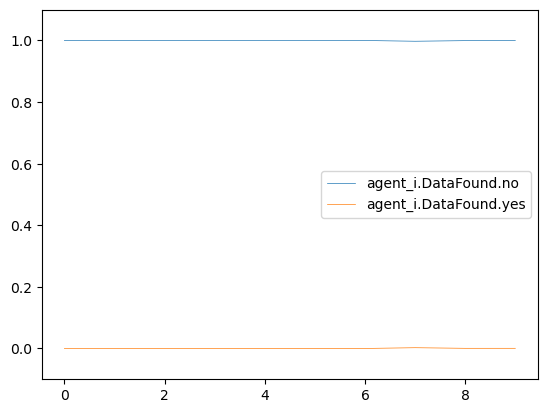

agent_j.DataFound.no  agent_j.DataFound.yes agent_j.action agent_i.action  \
0              1.000000               0.000000      FileRecon        LogIOCs   
1              0.954984               0.045016   EnumAccounts   DecoyAccount   
2              0.954984               0.045016      FileRecon   LockAccounts   
3              0.974384               0.025616           Exit   LockAccounts   
4              0.974384               0.025616            Nop   LockAccounts   
5              0.974384               0.025616            Nop            Nop   
6              0.974384               0.025616            Nop            Nop   
7              0.974384               0.025616            Nop            Nop   
8              0.974384               0.025616            Nop            Nop   
9              0.974384               0.025616            Nop            Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                            auth                         none   
1                          denied                         none   
2                            auth                   user_files   
3                            auth                   user_files   
4                          denied                   user_files   
5                          denied                   user_files   
6                          denied                   user_files   
7                          denied                   user_files   
8                          denied                         none   
9                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                          active   
2                           failure                          active   
3                           success                      terminated   
4                           failure                      terminated   
5                           failure                      terminated   
6                           failure                      terminated   
7                           failure                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2               acc_policy_change  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

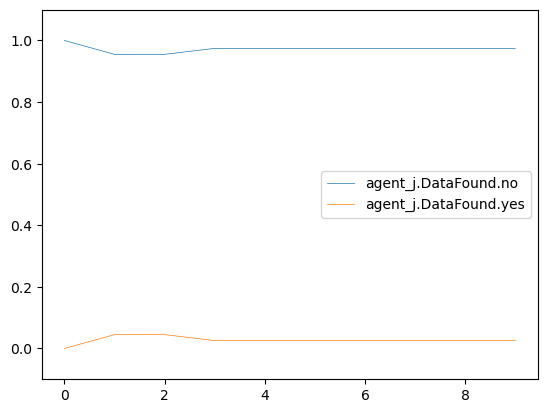

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes agent_i.action agent_j.action
0                    1.0                     0.0        LogIOCs      FileRecon
1                    1.0                     0.0   DecoyAccount   EnumAccounts
2                    1.0                     0.0   LockAccounts      FileRecon
3                    1.0                     0.0   LockAccounts           Exit
4                    1.0                     0.0   LockAccounts            Nop
5                    1.0                     0.0            Nop            Nop
6                    1.0                     0.0            Nop            Nop
7                    1.0                     0.0            Nop            Nop
8                    1.0                     0.0            Nop            Nop
9                    1.0                     0.0            Nop            Nop

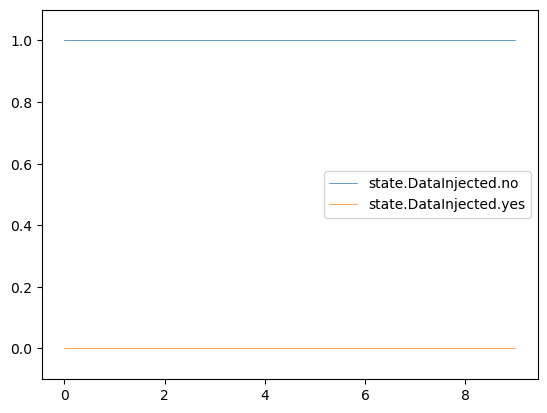

agent_i.DataInjected.no  agent_i.DataInjected.yes agent_i.action  \
0                 1.000000                  0.000000        LogIOCs   
1                 1.000000                  0.000000   DecoyAccount   
2                 1.000000                  0.000000   LockAccounts   
3                 1.000000                  0.000000   LockAccounts   
4                 1.000000                  0.000000   LockAccounts   
5                 1.000000                  0.000000            Nop   
6                 1.000000                  0.000000            Nop   
7                 1.000000                  0.000000            Nop   
8                 0.999674                  0.000326            Nop   
9                 0.999533                  0.000467            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1   EnumAccounts                        file_enum  
2      FileRecon                        file_enum  
3           Exit                             none  
4            Nop                             none  
5            Nop                             none  
6            Nop                       file_write  
7            Nop                             none  
8            Nop                   login_activity  
9            Nop                             none

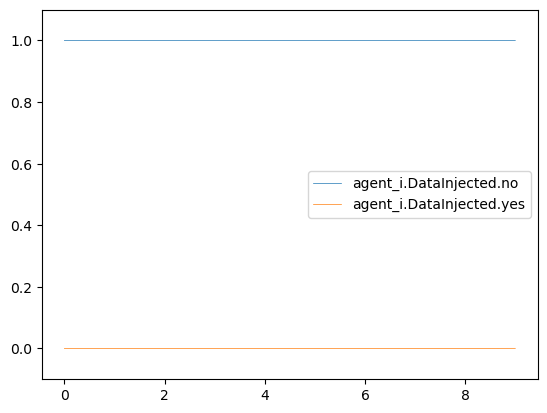

agent_j.DataInjected.no  agent_j.DataInjected.yes agent_j.action  \
0                      1.0                       0.0      FileRecon   
1                      1.0                       0.0   EnumAccounts   
2                      1.0                       0.0      FileRecon   
3                      1.0                       0.0           Exit   
4                      1.0                       0.0            Nop   
5                      1.0                       0.0            Nop   
6                      1.0                       0.0            Nop   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                            auth                         none   
1   DecoyAccount                          denied                         none   
2   LockAccounts                            auth                   user_files   
3   LockAccounts                            auth                   user_files   
4   LockAccounts                          denied                   user_files   
5            Nop                          denied                   user_files   
6            Nop                          denied                   user_files   
7            Nop                          denied                   user_files   
8            Nop                          denied                         none   
9            Nop                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                          active   
2                           failure                          active   
3                           success                      terminated   
4                           failure                      terminated   
5                           failure                      terminated   
6                           failure                      terminated   
7                           failure                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2               acc_policy_change  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

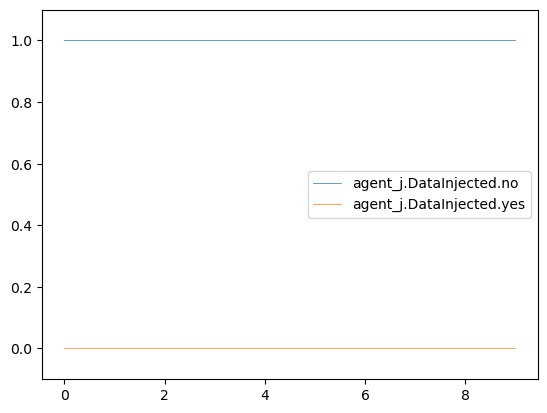

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes agent_i.action agent_j.action
0                   0.0                    1.0        LogIOCs      FileRecon
1                   0.0                    1.0   DecoyAccount   EnumAccounts
2                   0.0                    1.0   LockAccounts      FileRecon
3                   0.0                    1.0   LockAccounts           Exit
4                   0.0                    1.0   LockAccounts            Nop
5                   0.0                    1.0            Nop            Nop
6                   0.0                    1.0            Nop            Nop
7                   0.0                    1.0            Nop            Nop
8                   0.0                    1.0            Nop            Nop
9                   0.0                    1.0            Nop            Nop

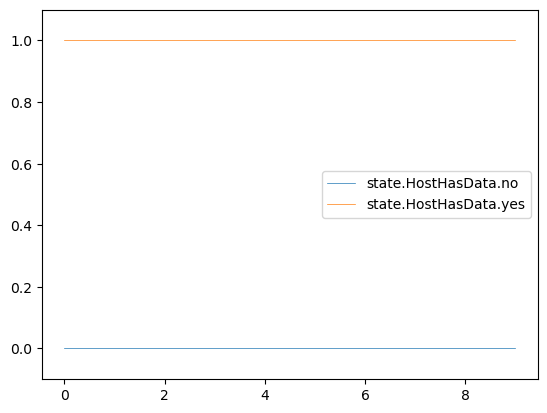

agent_i.HostHasData.no  agent_i.HostHasData.yes agent_i.action  \
0                     0.0                      1.0        LogIOCs   
1                     0.0                      1.0   DecoyAccount   
2                     0.0                      1.0   LockAccounts   
3                     0.0                      1.0   LockAccounts   
4                     0.0                      1.0   LockAccounts   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1   EnumAccounts                        file_enum  
2      FileRecon                        file_enum  
3           Exit                             none  
4            Nop                             none  
5            Nop                             none  
6            Nop                       file_write  
7            Nop                             none  
8            Nop                   login_activity  
9            Nop                             none

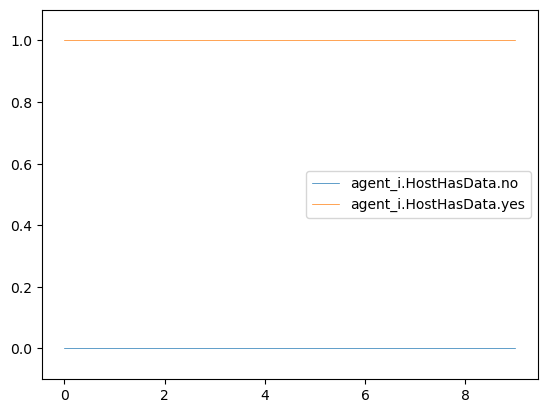

agent_j.HostHasData.no  agent_j.HostHasData.yes agent_j.action  \
0                0.500000                 0.500000      FileRecon   
1                0.578778                 0.421222   EnumAccounts   
2                0.578778                 0.421222      FileRecon   
3                0.630669                 0.369331           Exit   
4                0.630669                 0.369331            Nop   
5                0.630669                 0.369331            Nop   
6                0.630669                 0.369331            Nop   
7                0.630669                 0.369331            Nop   
8                0.630669                 0.369331            Nop   
9                0.630669                 0.369331            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                            auth                         none   
1   DecoyAccount                          denied                         none   
2   LockAccounts                            auth                   user_files   
3   LockAccounts                            auth                   user_files   
4   LockAccounts                          denied                   user_files   
5            Nop                          denied                   user_files   
6            Nop                          denied                   user_files   
7            Nop                          denied                   user_files   
8            Nop                          denied                         none   
9            Nop                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                          active   
2                           failure                          active   
3                           success                      terminated   
4                           failure                      terminated   
5                           failure                      terminated   
6                           failure                      terminated   
7                           failure                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2               acc_policy_change  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

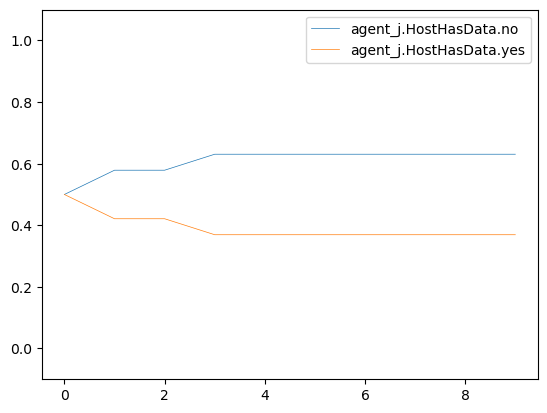

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user agent_i.action agent_j.action
0                   1.0                   0.0        LogIOCs      FileRecon
1                   1.0                   0.0   DecoyAccount   EnumAccounts
2                   1.0                   0.0   LockAccounts      FileRecon
3                   1.0                   0.0   LockAccounts           Exit
4                   1.0                   0.0   LockAccounts            Nop
5                   1.0                   0.0            Nop            Nop
6                   1.0                   0.0            Nop            Nop
7                   1.0                   0.0            Nop            Nop
8                   1.0                   0.0            Nop            Nop
9                   1.0                   0.0            Nop            Nop

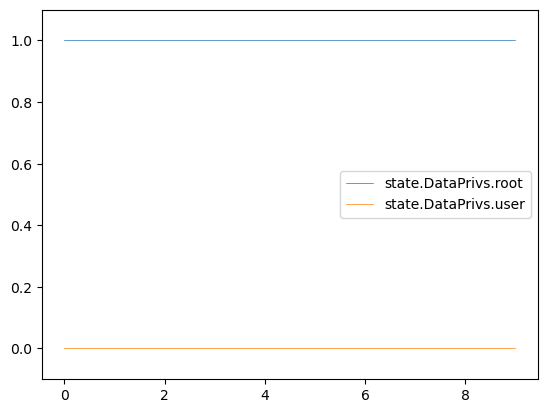

agent_i.DataPrivs.root  agent_i.DataPrivs.user agent_i.action  \
0                     1.0                     0.0        LogIOCs   
1                     1.0                     0.0   DecoyAccount   
2                     1.0                     0.0   LockAccounts   
3                     1.0                     0.0   LockAccounts   
4                     1.0                     0.0   LockAccounts   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1   EnumAccounts                        file_enum  
2      FileRecon                        file_enum  
3           Exit                             none  
4            Nop                             none  
5            Nop                             none  
6            Nop                       file_write  
7            Nop                             none  
8            Nop                   login_activity  
9            Nop                             none

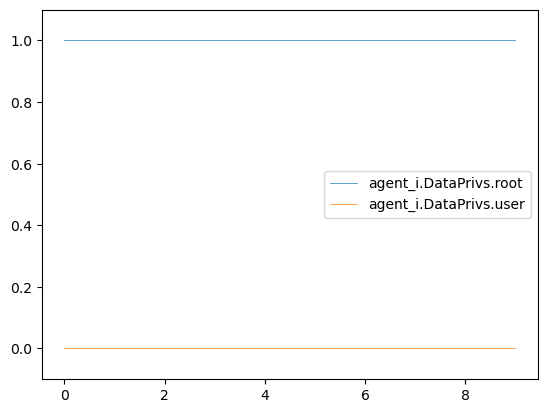

agent_j.DataPrivs.root  agent_j.DataPrivs.user agent_j.action  \
0                0.500000                0.500000      FileRecon   
1                0.578778                0.421222   EnumAccounts   
2                0.578778                0.421222      FileRecon   
3                0.630669                0.369331           Exit   
4                0.630669                0.369331            Nop   
5                0.630669                0.369331            Nop   
6                0.630669                0.369331            Nop   
7                0.630669                0.369331            Nop   
8                0.630669                0.369331            Nop   
9                0.630669                0.369331            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                            auth                         none   
1   DecoyAccount                          denied                         none   
2   LockAccounts                            auth                   user_files   
3   LockAccounts                            auth                   user_files   
4   LockAccounts                          denied                   user_files   
5            Nop                          denied                   user_files   
6            Nop                          denied                   user_files   
7            Nop                          denied                   user_files   
8            Nop                          denied                         none   
9            Nop                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                          active   
2                           failure                          active   
3                           success                      terminated   
4                           failure                      terminated   
5                           failure                      terminated   
6                           failure                      terminated   
7                           failure                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2               acc_policy_change  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

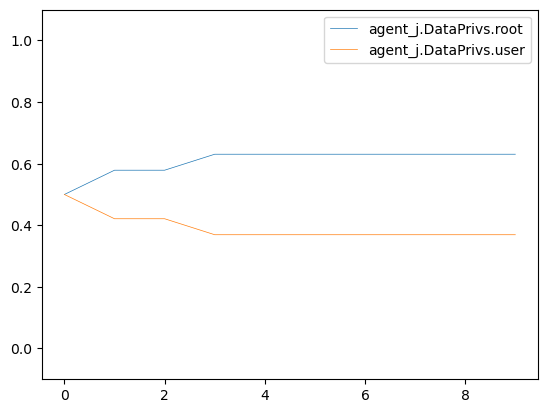

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot agent_i.action agent_j.action  
0                      1.0        LogIOCs      FileRecon  
1                      1.0   DecoyAccount   EnumAccounts  
2                      1.0   LockAccounts      FileRecon  
3                      1.0   LockAccounts           Exit  
4                      1.0   LockAccounts            Nop  
5                      1.0            Nop            Nop  
6                      1.0            Nop            Nop  
7                      1.0            Nop            Nop  
8                      1.0            Nop            Nop  
9                      1.0            Nop            Nop

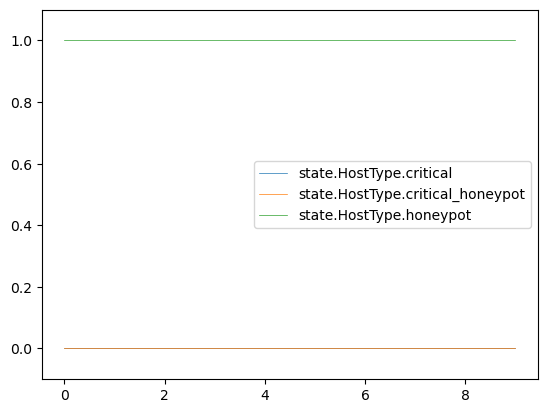

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot agent_i.action agent_j.action  \
0                        1.0        LogIOCs      FileRecon   
1                        1.0   DecoyAccount   EnumAccounts   
2                        1.0   LockAccounts      FileRecon   
3                        1.0   LockAccounts           Exit   
4                        1.0   LockAccounts            Nop   
5                        1.0            Nop            Nop   
6                        1.0            Nop            Nop   
7                        1.0            Nop            Nop   
8                        1.0            Nop            Nop   
9                        1.0            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                        file_enum  
3                             none  
4                             none  
5                             none  
6                       file_write  
7                             none  
8                   login_activity  
9                             none

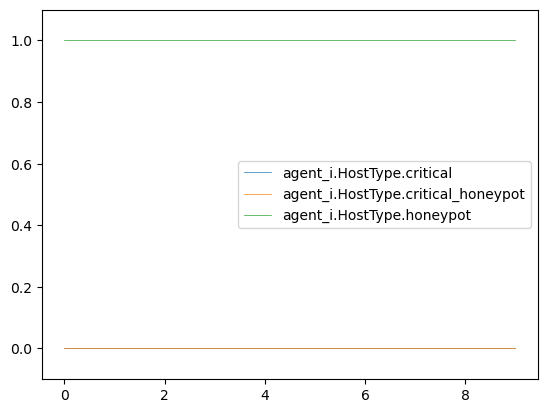

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_j.HostType.honeypot agent_j.action agent_i.action  \
0                        0.0      FileRecon        LogIOCs   
1                        0.0   EnumAccounts   DecoyAccount   
2                        0.0      FileRecon   LockAccounts   
3                        0.0           Exit   LockAccounts   
4                        0.0            Nop   LockAccounts   
5                        0.0            Nop            Nop   
6                        0.0            Nop            Nop   
7                        0.0            Nop            Nop   
8                        0.0            Nop            Nop   
9                        0.0            Nop            Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                            auth                         none   
1                          denied                         none   
2                            auth                   user_files   
3                            auth                   user_files   
4                          denied                   user_files   
5                          denied                   user_files   
6                          denied                   user_files   
7                          denied                   user_files   
8                          denied                         none   
9                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                          active   
2                           failure                          active   
3                           success                      terminated   
4                           failure                      terminated   
5                           failure                      terminated   
6                           failure                      terminated   
7                           failure                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2               acc_policy_change  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

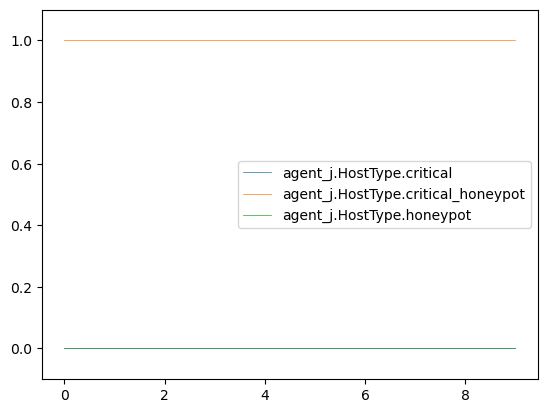

=============AttActive============


state.AttActive.no  state.AttActive.yes agent_i.action agent_j.action
0                 0.0                  1.0        LogIOCs      FileRecon
1                 0.0                  1.0   DecoyAccount   EnumAccounts
2                 0.0                  1.0   LockAccounts      FileRecon
3                 0.0                  1.0   LockAccounts           Exit
4                 1.0                  0.0   LockAccounts            Nop
5                 1.0                  0.0            Nop            Nop
6                 1.0                  0.0            Nop            Nop
7                 1.0                  0.0            Nop            Nop
8                 1.0                  0.0            Nop            Nop
9                 1.0                  0.0            Nop            Nop

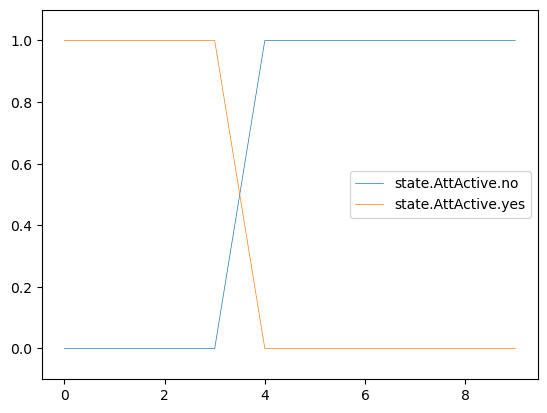

agent_i.AttActive.no  agent_i.AttActive.yes agent_i.action agent_j.action  \
0              0.000000               1.000000        LogIOCs      FileRecon   
1              0.000000               1.000000   DecoyAccount   EnumAccounts   
2              0.000000               1.000000   LockAccounts      FileRecon   
3              0.000001               0.999999   LockAccounts           Exit   
4              0.760174               0.239826   LockAccounts            Nop   
5              0.967674               0.032326            Nop            Nop   
6              0.995828               0.004172            Nop            Nop   
7              0.995983               0.004017            Nop            Nop   
8              0.999455               0.000545            Nop            Nop   
9              0.999804               0.000196            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                        file_enum  
3                             none  
4                             none  
5                             none  
6                       file_write  
7                             none  
8                   login_activity  
9                             none

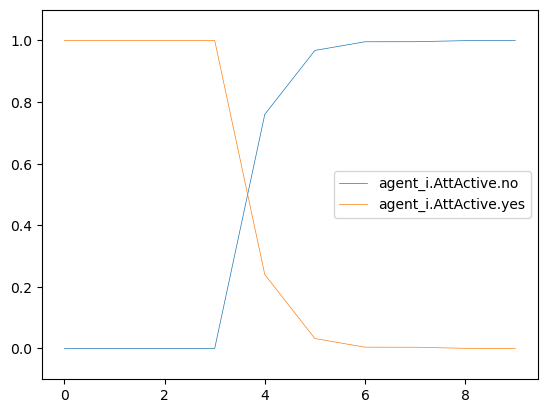

agent_j.AttActive.no  agent_j.AttActive.yes agent_j.action agent_i.action  \
0                   0.0                    1.0      FileRecon        LogIOCs   
1                   0.0                    1.0   EnumAccounts   DecoyAccount   
2                   0.0                    1.0      FileRecon   LockAccounts   
3                   0.0                    1.0           Exit   LockAccounts   
4                   1.0                    0.0            Nop   LockAccounts   
5                   1.0                    0.0            Nop            Nop   
6                   1.0                    0.0            Nop            Nop   
7                   1.0                    0.0            Nop            Nop   
8                   1.0                    0.0            Nop            Nop   
9                   1.0                    0.0            Nop            Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                            auth                         none   
1                          denied                         none   
2                            auth                   user_files   
3                            auth                   user_files   
4                          denied                   user_files   
5                          denied                   user_files   
6                          denied                   user_files   
7                          denied                   user_files   
8                          denied                         none   
9                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                          active   
2                           failure                          active   
3                           success                      terminated   
4                           failure                      terminated   
5                           failure                      terminated   
6                           failure                      terminated   
7                           failure                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2               acc_policy_change  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

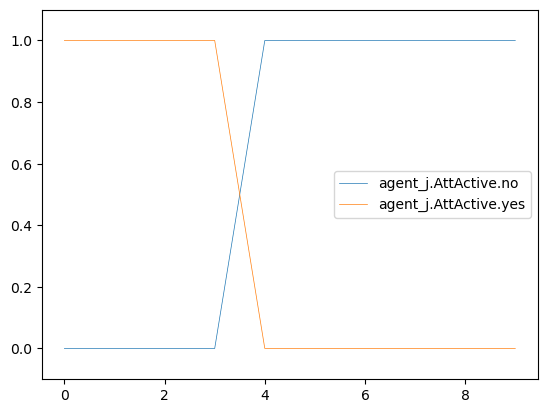

=============IOCsLogged============


state.IOCsLogged.no  state.IOCsLogged.yes agent_i.action agent_j.action
0                  1.0                   0.0        LogIOCs      FileRecon
1                  0.0                   1.0   DecoyAccount   EnumAccounts
2                  0.0                   1.0   LockAccounts      FileRecon
3                  0.0                   1.0   LockAccounts           Exit
4                  0.0                   1.0   LockAccounts            Nop
5                  0.0                   1.0            Nop            Nop
6                  0.0                   1.0            Nop            Nop
7                  0.0                   1.0            Nop            Nop
8                  0.0                   1.0            Nop            Nop
9                  0.0                   1.0            Nop            Nop

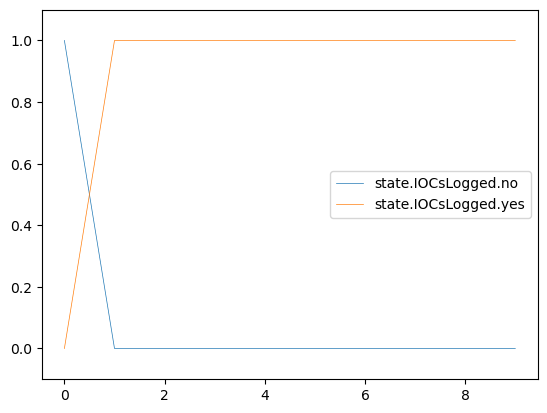

agent_i.IOCsLogged.no  agent_i.IOCsLogged.yes agent_i.action  \
0                    1.0                     0.0        LogIOCs   
1                    0.0                     1.0   DecoyAccount   
2                    0.0                     1.0   LockAccounts   
3                    0.0                     1.0   LockAccounts   
4                    0.0                     1.0   LockAccounts   
5                    0.0                     1.0            Nop   
6                    0.0                     1.0            Nop   
7                    0.0                     1.0            Nop   
8                    0.0                     1.0            Nop   
9                    0.0                     1.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1   EnumAccounts                        file_enum  
2      FileRecon                        file_enum  
3           Exit                             none  
4            Nop                             none  
5            Nop                             none  
6            Nop                       file_write  
7            Nop                             none  
8            Nop                   login_activity  
9            Nop                             none

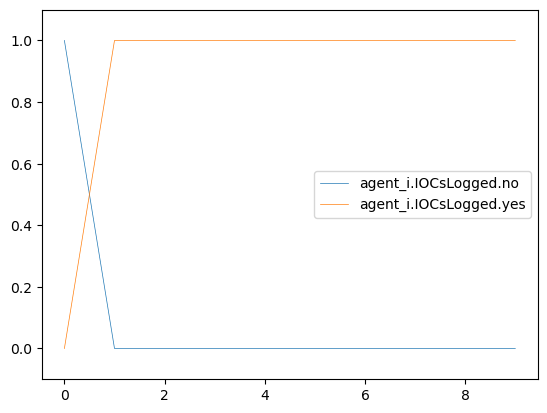

agent_j.IOCsLogged.no  agent_j.IOCsLogged.yes agent_j.action  \
0               1.000000                0.000000      FileRecon   
1               0.750000                0.250000   EnumAccounts   
2               0.845454                0.154545      FileRecon   
3               0.973312                0.026688           Exit   
4               0.973313                0.026688            Nop   
5               0.973312                0.026688            Nop   
6               0.973313                0.026688            Nop   
7               0.973312                0.026688            Nop   
8               0.973313                0.026688            Nop   
9               0.973312                0.026688            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                            auth                         none   
1   DecoyAccount                          denied                         none   
2   LockAccounts                            auth                   user_files   
3   LockAccounts                            auth                   user_files   
4   LockAccounts                          denied                   user_files   
5            Nop                          denied                   user_files   
6            Nop                          denied                   user_files   
7            Nop                          denied                   user_files   
8            Nop                          denied                         none   
9            Nop                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                          active   
2                           failure                          active   
3                           success                      terminated   
4                           failure                      terminated   
5                           failure                      terminated   
6                           failure                      terminated   
7                           failure                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2               acc_policy_change  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

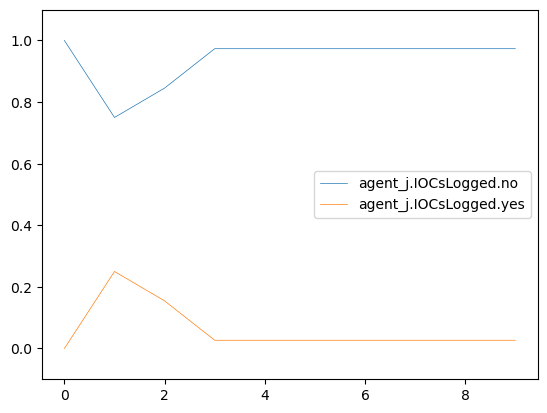

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                        file_enum
2                               1.0                        file_enum
3                               1.0                        file_enum
4                               1.0                   login_activity
5                               1.0                       file_write
6                               1.0                             none
7                               1.0                             none
8                               1.0                             none
9                               1.0                             none

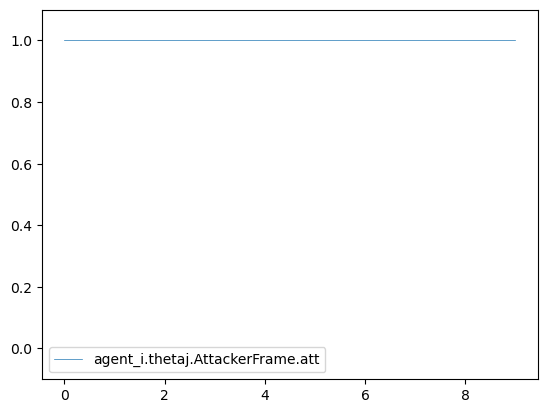

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.500000                        0.500000   
2                         0.436364                        0.563636   
3                         0.906788                        0.093212   
4                         0.993562                        0.006438   
5                         0.980542                        0.019458   
6                         0.980542                        0.019458   
7                         0.980542                        0.019458   
8                         0.980542                        0.019458   
9                         0.980542                        0.019458   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                   user_files   
1                          denied                         none   
2                          denied                         none   
3                          denied                   user_files   
4                          denied                         none   
5                          denied                         none   
6                          denied                         none   
7                            auth                         none   
8                          denied                         none   
9                            auth                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                          active   
2                           success                          active   
3                           success                          active   
4                           success                          active   
5                           failure                          active   
6                           success                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2               acc_policy_change  
3               acc_policy_change  
4               acc_policy_change  
5               acc_policy_change  
6                            none  
7                            none  
8                            none  
9                            none

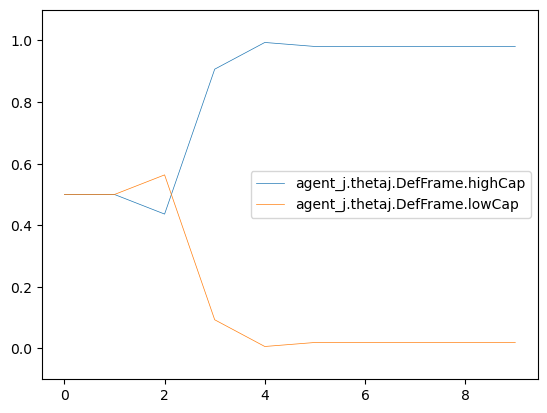

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user agent_i.action  \
0                     0.0                     1.0        LogIOCs   
1                     0.0                     1.0   DecoyAccount   
2                     0.0                     1.0   LockAccounts   
3                     0.0                     1.0   LockAccounts   
4                     0.0                     1.0   LockAccounts   
5                     0.0                     1.0   LockAccounts   
6                     0.0                     1.0   LockAccounts   
7                     0.0                     1.0   LockAccounts   
8                     0.0                     1.0            Nop   
9                     0.0                     1.0            Nop   

  agent_j.action  
0      FileRecon  
1   EnumAccounts  
2   EnumAccounts  
3     PrivEscAcc  
4     PrivEscAcc  
5      FileRecon  
6           Exit  
7            Nop  
8            Nop  
9            Nop

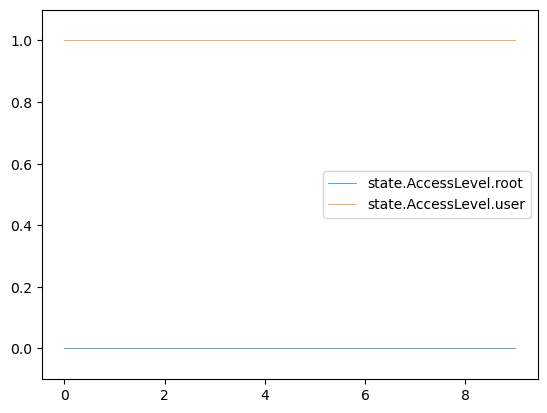

agent_i.AccessLevel.root  agent_i.AccessLevel.user agent_i.action  \
0                  0.000000                  1.000000        LogIOCs   
1                  0.000000                  1.000000   DecoyAccount   
2                  0.000000                  1.000000   LockAccounts   
3                  0.000000                  1.000000   LockAccounts   
4                  0.000000                  1.000000   LockAccounts   
5                  0.000000                  1.000000   LockAccounts   
6                  0.000000                  1.000000   LockAccounts   
7                  0.000000                  1.000000   LockAccounts   
8                  0.000000                  1.000000            Nop   
9                  0.002452                  0.997548            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1   EnumAccounts                        file_enum  
2   EnumAccounts                        file_enum  
3     PrivEscAcc                        file_enum  
4     PrivEscAcc                   login_activity  
5      FileRecon                       file_write  
6           Exit                             none  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

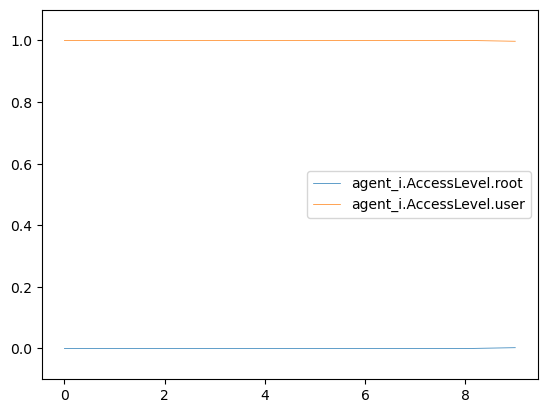

agent_j.AccessLevel.root  agent_j.AccessLevel.user agent_j.action  \
0                       0.0                       1.0      FileRecon   
1                       0.0                       1.0   EnumAccounts   
2                       0.0                       1.0   EnumAccounts   
3                       0.0                       1.0     PrivEscAcc   
4                       0.0                       1.0     PrivEscAcc   
5                       0.0                       1.0      FileRecon   
6                       0.0                       1.0           Exit   
7                       0.0                       1.0            Nop   
8                       0.0                       1.0            Nop   
9                       0.0                       1.0            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                          denied                   user_files   
1   DecoyAccount                          denied                         none   
2   LockAccounts                          denied                         none   
3   LockAccounts                          denied                   user_files   
4   LockAccounts                          denied                         none   
5   LockAccounts                          denied                         none   
6   LockAccounts                          denied                         none   
7   LockAccounts                            auth                         none   
8            Nop                          denied                         none   
9            Nop                            auth                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                          active   
2                           success                          active   
3                           success                          active   
4                           success                          active   
5                           failure                          active   
6                           success                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2               acc_policy_change  
3               acc_policy_change  
4               acc_policy_change  
5               acc_policy_change  
6                            none  
7                            none  
8                            none  
9                            none

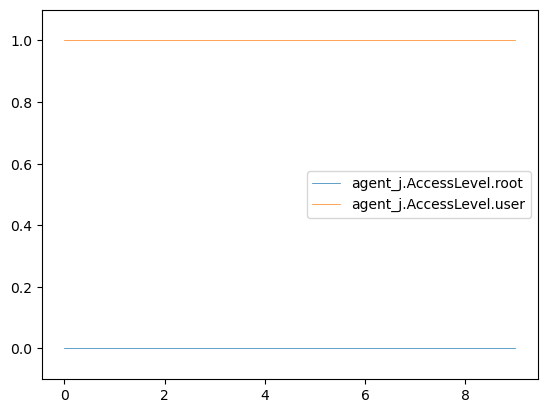

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes agent_i.action agent_j.action
0                   1.0                    0.0        LogIOCs      FileRecon
1                   1.0                    0.0   DecoyAccount   EnumAccounts
2                   0.0                    1.0   LockAccounts   EnumAccounts
3                   0.0                    1.0   LockAccounts     PrivEscAcc
4                   0.0                    1.0   LockAccounts     PrivEscAcc
5                   0.0                    1.0   LockAccounts      FileRecon
6                   0.0                    1.0   LockAccounts           Exit
7                   0.0                    1.0   LockAccounts            Nop
8                   0.0                    1.0            Nop            Nop
9                   0.0                    1.0            Nop            Nop

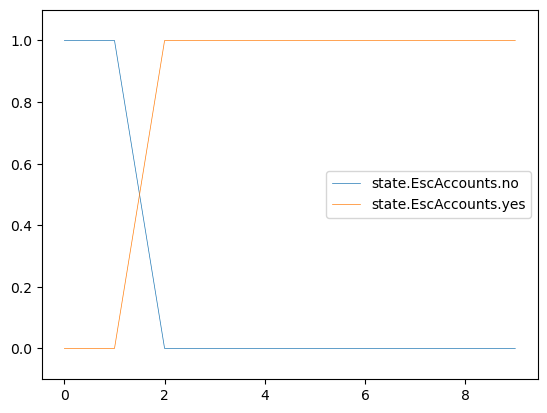

agent_i.EscAccounts.no  agent_i.EscAccounts.yes agent_i.action  \
0                     1.0                      0.0        LogIOCs   
1                     1.0                      0.0   DecoyAccount   
2                     0.0                      1.0   LockAccounts   
3                     0.0                      1.0   LockAccounts   
4                     0.0                      1.0   LockAccounts   
5                     0.0                      1.0   LockAccounts   
6                     0.0                      1.0   LockAccounts   
7                     0.0                      1.0   LockAccounts   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1   EnumAccounts                        file_enum  
2   EnumAccounts                        file_enum  
3     PrivEscAcc                        file_enum  
4     PrivEscAcc                   login_activity  
5      FileRecon                       file_write  
6           Exit                             none  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

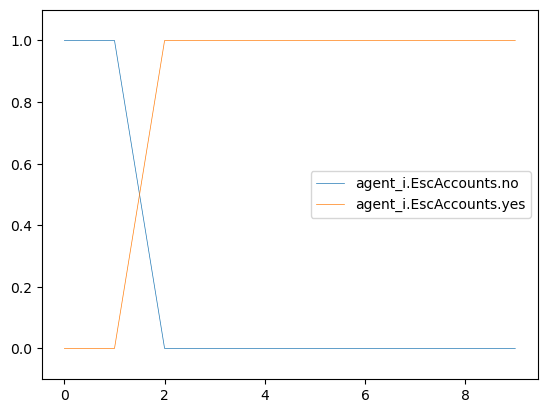

agent_j.EscAccounts.no  agent_j.EscAccounts.yes agent_j.action  \
0                0.500000                 0.500000      FileRecon   
1                0.500000                 0.500000   EnumAccounts   
2                0.613636                 0.386364   EnumAccounts   
3                0.253293                 0.746707     PrivEscAcc   
4                0.303063                 0.696937     PrivEscAcc   
5                0.915957                 0.084043      FileRecon   
6                0.915957                 0.084043           Exit   
7                0.915957                 0.084043            Nop   
8                0.915957                 0.084043            Nop   
9                0.915957                 0.084043            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                          denied                   user_files   
1   DecoyAccount                          denied                         none   
2   LockAccounts                          denied                         none   
3   LockAccounts                          denied                   user_files   
4   LockAccounts                          denied                         none   
5   LockAccounts                          denied                         none   
6   LockAccounts                          denied                         none   
7   LockAccounts                            auth                         none   
8            Nop                          denied                         none   
9            Nop                            auth                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                          active   
2                           success                          active   
3                           success                          active   
4                           success                          active   
5                           failure                          active   
6                           success                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2               acc_policy_change  
3               acc_policy_change  
4               acc_policy_change  
5               acc_policy_change  
6                            none  
7                            none  
8                            none  
9                            none

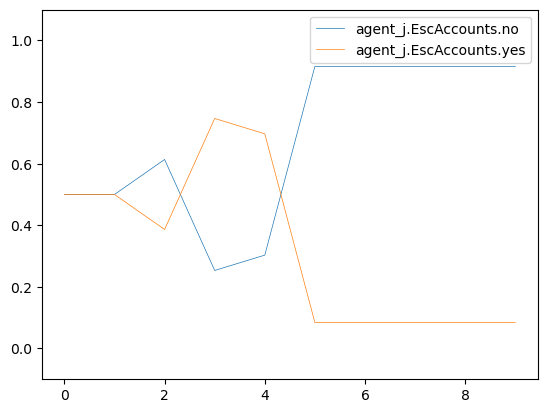

=============AccFound============


state.AccFound.no  state.AccFound.yes agent_i.action agent_j.action
0                1.0                 0.0        LogIOCs      FileRecon
1                1.0                 0.0   DecoyAccount   EnumAccounts
2                1.0                 0.0   LockAccounts   EnumAccounts
3                0.0                 1.0   LockAccounts     PrivEscAcc
4                0.0                 1.0   LockAccounts     PrivEscAcc
5                0.0                 1.0   LockAccounts      FileRecon
6                0.0                 1.0   LockAccounts           Exit
7                0.0                 1.0   LockAccounts            Nop
8                0.0                 1.0            Nop            Nop
9                0.0                 1.0            Nop            Nop

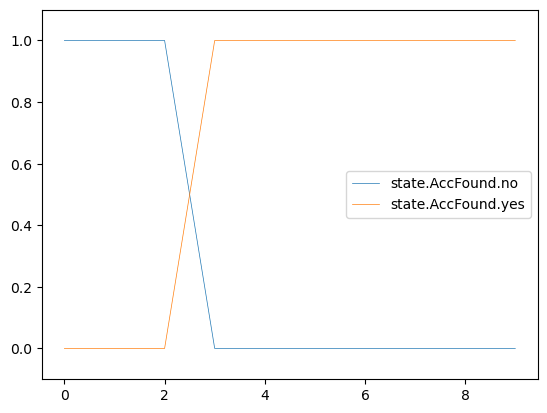

agent_i.AccFound.no  agent_i.AccFound.yes agent_i.action agent_j.action  \
0             1.000000              0.000000        LogIOCs      FileRecon   
1             1.000000              0.000000   DecoyAccount   EnumAccounts   
2             0.305224              0.694776   LockAccounts   EnumAccounts   
3             0.400784              0.599216   LockAccounts     PrivEscAcc   
4             0.473008              0.526992   LockAccounts     PrivEscAcc   
5             0.172413              0.827587   LockAccounts      FileRecon   
6             0.171631              0.828369   LockAccounts           Exit   
7             0.284076              0.715924   LockAccounts            Nop   
8             0.315145              0.684855            Nop            Nop   
9             0.319969              0.680031            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                        file_enum  
3                        file_enum  
4                   login_activity  
5                       file_write  
6                             none  
7                             none  
8                             none  
9                             none

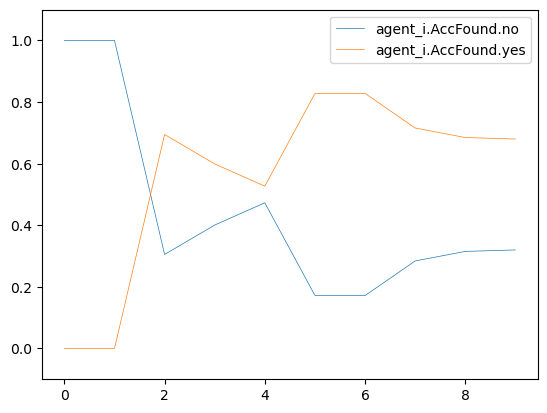

agent_j.AccFound.no  agent_j.AccFound.yes agent_j.action agent_i.action  \
0             1.000000              0.000000      FileRecon        LogIOCs   
1             1.000000              0.000000   EnumAccounts   DecoyAccount   
2             0.920454              0.079545   EnumAccounts   LockAccounts   
3             0.278369              0.721631     PrivEscAcc   LockAccounts   
4             0.330871              0.669129     PrivEscAcc   LockAccounts   
5             1.000000              0.000000      FileRecon   LockAccounts   
6             1.000000              0.000000           Exit   LockAccounts   
7             1.000000              0.000000            Nop   LockAccounts   
8             1.000000              0.000000            Nop            Nop   
9             1.000000              0.000000            Nop            Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                   user_files   
1                          denied                         none   
2                          denied                         none   
3                          denied                   user_files   
4                          denied                         none   
5                          denied                         none   
6                          denied                         none   
7                            auth                         none   
8                          denied                         none   
9                            auth                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                          active   
2                           success                          active   
3                           success                          active   
4                           success                          active   
5                           failure                          active   
6                           success                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2               acc_policy_change  
3               acc_policy_change  
4               acc_policy_change  
5               acc_policy_change  
6                            none  
7                            none  
8                            none  
9                            none

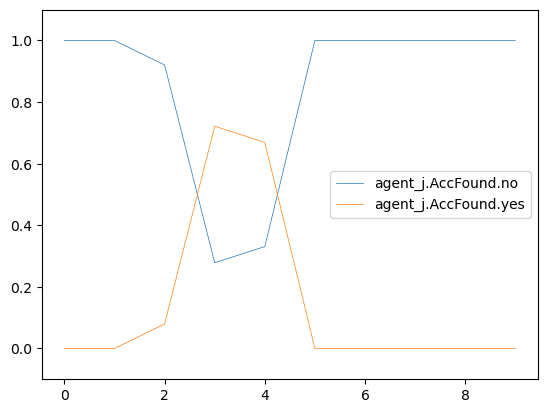

=============DataFound============


state.DataFound.no  state.DataFound.yes agent_i.action agent_j.action
0                 1.0                  0.0        LogIOCs      FileRecon
1                 1.0                  0.0   DecoyAccount   EnumAccounts
2                 1.0                  0.0   LockAccounts   EnumAccounts
3                 1.0                  0.0   LockAccounts     PrivEscAcc
4                 1.0                  0.0   LockAccounts     PrivEscAcc
5                 1.0                  0.0   LockAccounts      FileRecon
6                 1.0                  0.0   LockAccounts           Exit
7                 1.0                  0.0   LockAccounts            Nop
8                 1.0                  0.0            Nop            Nop
9                 1.0                  0.0            Nop            Nop

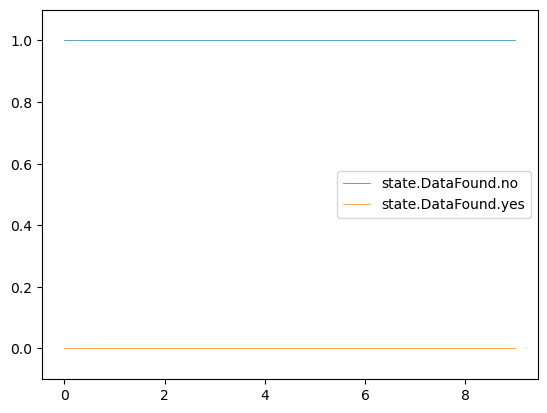

agent_i.DataFound.no  agent_i.DataFound.yes agent_i.action agent_j.action  \
0                   1.0                    0.0        LogIOCs      FileRecon   
1                   1.0                    0.0   DecoyAccount   EnumAccounts   
2                   1.0                    0.0   LockAccounts   EnumAccounts   
3                   1.0                    0.0   LockAccounts     PrivEscAcc   
4                   1.0                    0.0   LockAccounts     PrivEscAcc   
5                   1.0                    0.0   LockAccounts      FileRecon   
6                   1.0                    0.0   LockAccounts           Exit   
7                   1.0                    0.0   LockAccounts            Nop   
8                   1.0                    0.0            Nop            Nop   
9                   1.0                    0.0            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                        file_enum  
3                        file_enum  
4                   login_activity  
5                       file_write  
6                             none  
7                             none  
8                             none  
9                             none

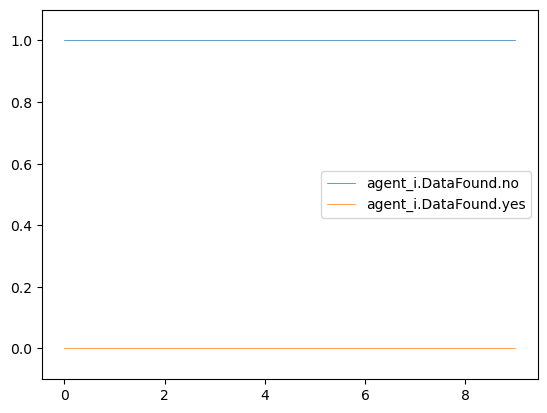

agent_j.DataFound.no  agent_j.DataFound.yes agent_j.action agent_i.action  \
0                   1.0                    0.0      FileRecon        LogIOCs   
1                   1.0                    0.0   EnumAccounts   DecoyAccount   
2                   1.0                    0.0   EnumAccounts   LockAccounts   
3                   1.0                    0.0     PrivEscAcc   LockAccounts   
4                   1.0                    0.0     PrivEscAcc   LockAccounts   
5                   1.0                    0.0      FileRecon   LockAccounts   
6                   1.0                    0.0           Exit   LockAccounts   
7                   1.0                    0.0            Nop   LockAccounts   
8                   1.0                    0.0            Nop            Nop   
9                   1.0                    0.0            Nop            Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                   user_files   
1                          denied                         none   
2                          denied                         none   
3                          denied                   user_files   
4                          denied                         none   
5                          denied                         none   
6                          denied                         none   
7                            auth                         none   
8                          denied                         none   
9                            auth                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                          active   
2                           success                          active   
3                           success                          active   
4                           success                          active   
5                           failure                          active   
6                           success                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2               acc_policy_change  
3               acc_policy_change  
4               acc_policy_change  
5               acc_policy_change  
6                            none  
7                            none  
8                            none  
9                            none

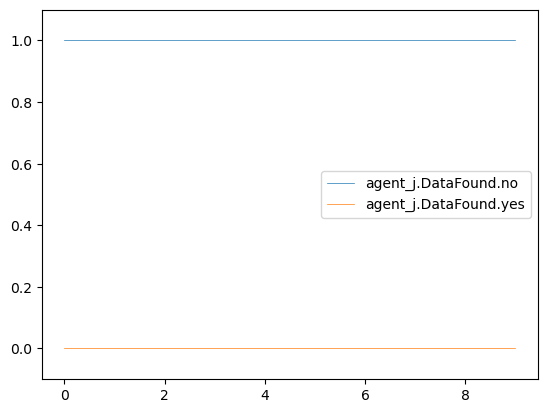

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes agent_i.action agent_j.action
0                    1.0                     0.0        LogIOCs      FileRecon
1                    1.0                     0.0   DecoyAccount   EnumAccounts
2                    1.0                     0.0   LockAccounts   EnumAccounts
3                    1.0                     0.0   LockAccounts     PrivEscAcc
4                    1.0                     0.0   LockAccounts     PrivEscAcc
5                    1.0                     0.0   LockAccounts      FileRecon
6                    1.0                     0.0   LockAccounts           Exit
7                    1.0                     0.0   LockAccounts            Nop
8                    1.0                     0.0            Nop            Nop
9                    1.0                     0.0            Nop            Nop

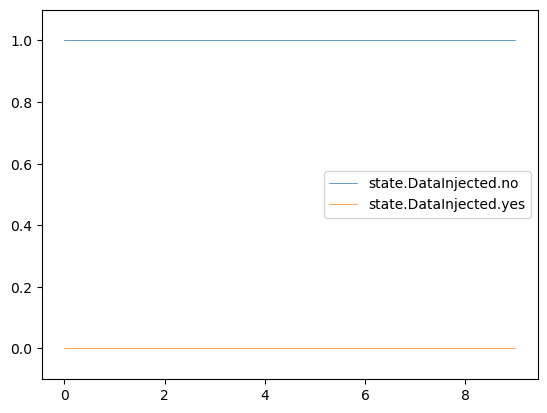

agent_i.DataInjected.no  agent_i.DataInjected.yes agent_i.action  \
0                      1.0                       0.0        LogIOCs   
1                      1.0                       0.0   DecoyAccount   
2                      1.0                       0.0   LockAccounts   
3                      1.0                       0.0   LockAccounts   
4                      1.0                       0.0   LockAccounts   
5                      1.0                       0.0   LockAccounts   
6                      1.0                       0.0   LockAccounts   
7                      1.0                       0.0   LockAccounts   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1   EnumAccounts                        file_enum  
2   EnumAccounts                        file_enum  
3     PrivEscAcc                        file_enum  
4     PrivEscAcc                   login_activity  
5      FileRecon                       file_write  
6           Exit                             none  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

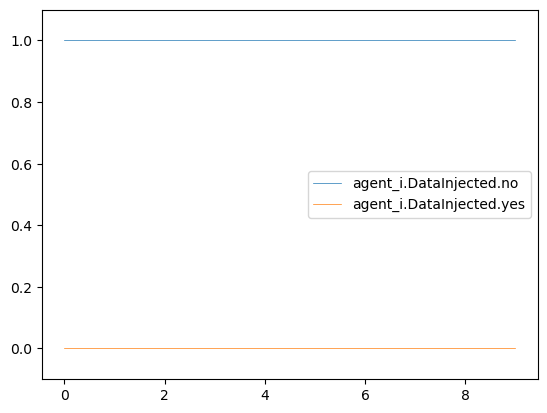

agent_j.DataInjected.no  agent_j.DataInjected.yes agent_j.action  \
0                      1.0                       0.0      FileRecon   
1                      1.0                       0.0   EnumAccounts   
2                      1.0                       0.0   EnumAccounts   
3                      1.0                       0.0     PrivEscAcc   
4                      1.0                       0.0     PrivEscAcc   
5                      1.0                       0.0      FileRecon   
6                      1.0                       0.0           Exit   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                          denied                   user_files   
1   DecoyAccount                          denied                         none   
2   LockAccounts                          denied                         none   
3   LockAccounts                          denied                   user_files   
4   LockAccounts                          denied                         none   
5   LockAccounts                          denied                         none   
6   LockAccounts                          denied                         none   
7   LockAccounts                            auth                         none   
8            Nop                          denied                         none   
9            Nop                            auth                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                          active   
2                           success                          active   
3                           success                          active   
4                           success                          active   
5                           failure                          active   
6                           success                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2               acc_policy_change  
3               acc_policy_change  
4               acc_policy_change  
5               acc_policy_change  
6                            none  
7                            none  
8                            none  
9                            none

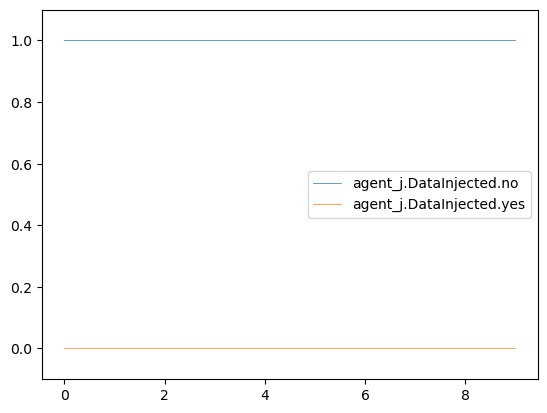

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes agent_i.action agent_j.action
0                   0.0                    1.0        LogIOCs      FileRecon
1                   0.0                    1.0   DecoyAccount   EnumAccounts
2                   0.0                    1.0   LockAccounts   EnumAccounts
3                   0.0                    1.0   LockAccounts     PrivEscAcc
4                   0.0                    1.0   LockAccounts     PrivEscAcc
5                   0.0                    1.0   LockAccounts      FileRecon
6                   0.0                    1.0   LockAccounts           Exit
7                   0.0                    1.0   LockAccounts            Nop
8                   0.0                    1.0            Nop            Nop
9                   0.0                    1.0            Nop            Nop

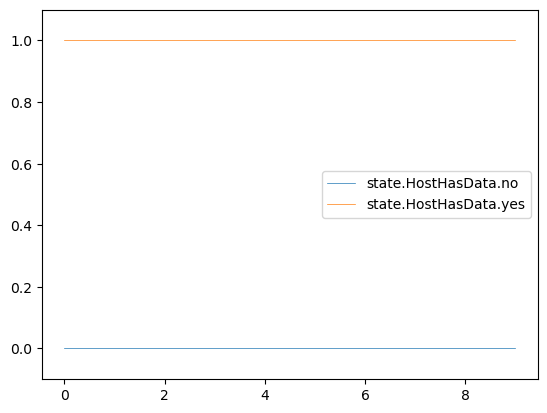

agent_i.HostHasData.no  agent_i.HostHasData.yes agent_i.action  \
0                     0.0                      1.0        LogIOCs   
1                     0.0                      1.0   DecoyAccount   
2                     0.0                      1.0   LockAccounts   
3                     0.0                      1.0   LockAccounts   
4                     0.0                      1.0   LockAccounts   
5                     0.0                      1.0   LockAccounts   
6                     0.0                      1.0   LockAccounts   
7                     0.0                      1.0   LockAccounts   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1   EnumAccounts                        file_enum  
2   EnumAccounts                        file_enum  
3     PrivEscAcc                        file_enum  
4     PrivEscAcc                   login_activity  
5      FileRecon                       file_write  
6           Exit                             none  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

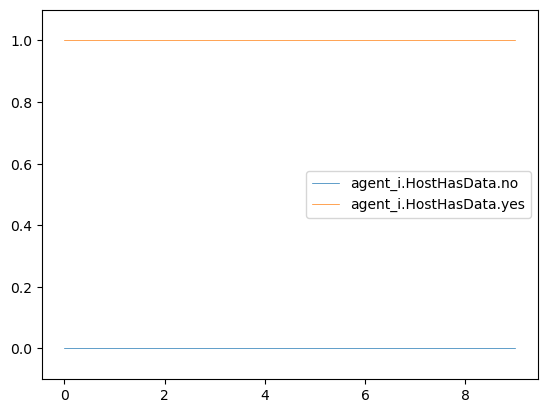

agent_j.HostHasData.no  agent_j.HostHasData.yes agent_j.action  \
0                0.500000                 0.500000      FileRecon   
1                0.606061                 0.393939   EnumAccounts   
2                0.606061                 0.393939   EnumAccounts   
3                0.606061                 0.393939     PrivEscAcc   
4                0.606061                 0.393939     PrivEscAcc   
5                0.606061                 0.393939      FileRecon   
6                0.647249                 0.352751           Exit   
7                0.647249                 0.352751            Nop   
8                0.647249                 0.352751            Nop   
9                0.647249                 0.352751            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                          denied                   user_files   
1   DecoyAccount                          denied                         none   
2   LockAccounts                          denied                         none   
3   LockAccounts                          denied                   user_files   
4   LockAccounts                          denied                         none   
5   LockAccounts                          denied                         none   
6   LockAccounts                          denied                         none   
7   LockAccounts                            auth                         none   
8            Nop                          denied                         none   
9            Nop                            auth                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                          active   
2                           success                          active   
3                           success                          active   
4                           success                          active   
5                           failure                          active   
6                           success                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2               acc_policy_change  
3               acc_policy_change  
4               acc_policy_change  
5               acc_policy_change  
6                            none  
7                            none  
8                            none  
9                            none

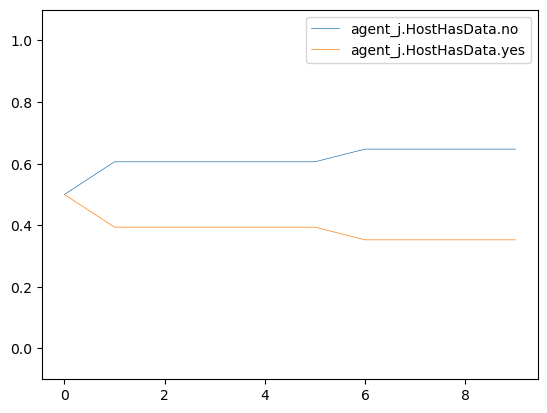

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user agent_i.action agent_j.action
0                   1.0                   0.0        LogIOCs      FileRecon
1                   1.0                   0.0   DecoyAccount   EnumAccounts
2                   1.0                   0.0   LockAccounts   EnumAccounts
3                   1.0                   0.0   LockAccounts     PrivEscAcc
4                   1.0                   0.0   LockAccounts     PrivEscAcc
5                   1.0                   0.0   LockAccounts      FileRecon
6                   1.0                   0.0   LockAccounts           Exit
7                   1.0                   0.0   LockAccounts            Nop
8                   1.0                   0.0            Nop            Nop
9                   1.0                   0.0            Nop            Nop

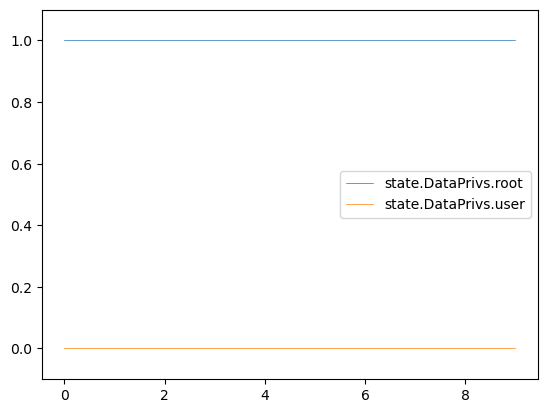

agent_i.DataPrivs.root  agent_i.DataPrivs.user agent_i.action  \
0                     1.0                     0.0        LogIOCs   
1                     1.0                     0.0   DecoyAccount   
2                     1.0                     0.0   LockAccounts   
3                     1.0                     0.0   LockAccounts   
4                     1.0                     0.0   LockAccounts   
5                     1.0                     0.0   LockAccounts   
6                     1.0                     0.0   LockAccounts   
7                     1.0                     0.0   LockAccounts   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1   EnumAccounts                        file_enum  
2   EnumAccounts                        file_enum  
3     PrivEscAcc                        file_enum  
4     PrivEscAcc                   login_activity  
5      FileRecon                       file_write  
6           Exit                             none  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

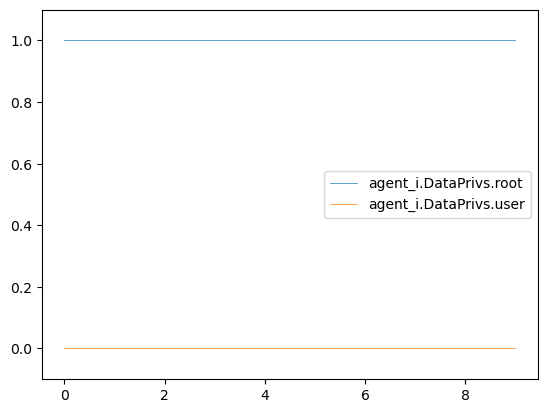

agent_j.DataPrivs.root  agent_j.DataPrivs.user agent_j.action  \
0                0.500000                0.500000      FileRecon   
1                0.606061                0.393939   EnumAccounts   
2                0.606061                0.393939   EnumAccounts   
3                0.606061                0.393939     PrivEscAcc   
4                0.606061                0.393939     PrivEscAcc   
5                0.606061                0.393939      FileRecon   
6                0.647249                0.352751           Exit   
7                0.647249                0.352751            Nop   
8                0.647249                0.352751            Nop   
9                0.647249                0.352751            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                          denied                   user_files   
1   DecoyAccount                          denied                         none   
2   LockAccounts                          denied                         none   
3   LockAccounts                          denied                   user_files   
4   LockAccounts                          denied                         none   
5   LockAccounts                          denied                         none   
6   LockAccounts                          denied                         none   
7   LockAccounts                            auth                         none   
8            Nop                          denied                         none   
9            Nop                            auth                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                          active   
2                           success                          active   
3                           success                          active   
4                           success                          active   
5                           failure                          active   
6                           success                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2               acc_policy_change  
3               acc_policy_change  
4               acc_policy_change  
5               acc_policy_change  
6                            none  
7                            none  
8                            none  
9                            none

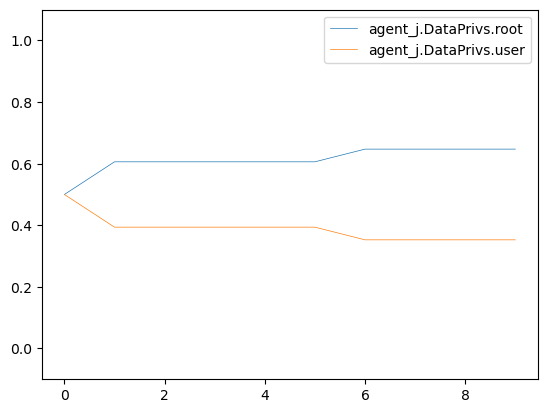

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot agent_i.action agent_j.action  
0                      1.0        LogIOCs      FileRecon  
1                      1.0   DecoyAccount   EnumAccounts  
2                      1.0   LockAccounts   EnumAccounts  
3                      1.0   LockAccounts     PrivEscAcc  
4                      1.0   LockAccounts     PrivEscAcc  
5                      1.0   LockAccounts      FileRecon  
6                      1.0   LockAccounts           Exit  
7                      1.0   LockAccounts            Nop  
8                      1.0            Nop            Nop  
9                      1.0            Nop            Nop

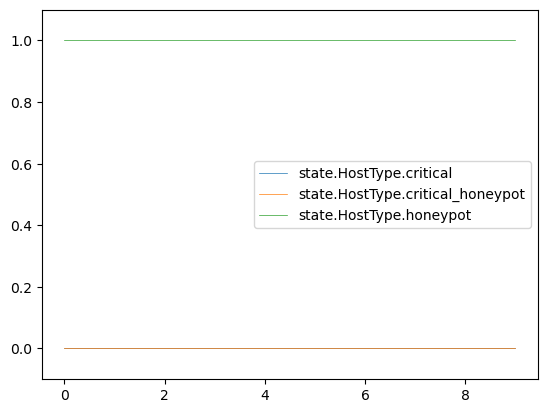

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot agent_i.action agent_j.action  \
0                        1.0        LogIOCs      FileRecon   
1                        1.0   DecoyAccount   EnumAccounts   
2                        1.0   LockAccounts   EnumAccounts   
3                        1.0   LockAccounts     PrivEscAcc   
4                        1.0   LockAccounts     PrivEscAcc   
5                        1.0   LockAccounts      FileRecon   
6                        1.0   LockAccounts           Exit   
7                        1.0   LockAccounts            Nop   
8                        1.0            Nop            Nop   
9                        1.0            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                        file_enum  
3                        file_enum  
4                   login_activity  
5                       file_write  
6                             none  
7                             none  
8                             none  
9                             none

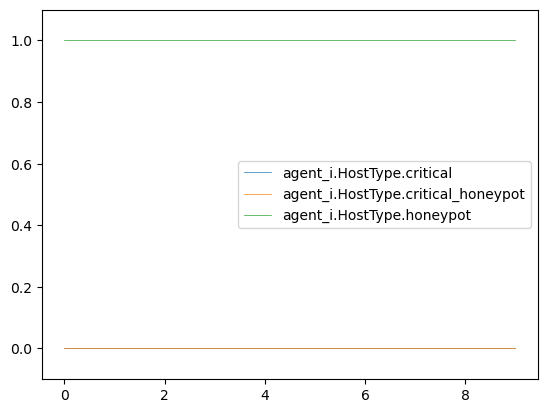

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_j.HostType.honeypot agent_j.action agent_i.action  \
0                        0.0      FileRecon        LogIOCs   
1                        0.0   EnumAccounts   DecoyAccount   
2                        0.0   EnumAccounts   LockAccounts   
3                        0.0     PrivEscAcc   LockAccounts   
4                        0.0     PrivEscAcc   LockAccounts   
5                        0.0      FileRecon   LockAccounts   
6                        0.0           Exit   LockAccounts   
7                        0.0            Nop   LockAccounts   
8                        0.0            Nop            Nop   
9                        0.0            Nop            Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                   user_files   
1                          denied                         none   
2                          denied                         none   
3                          denied                   user_files   
4                          denied                         none   
5                          denied                         none   
6                          denied                         none   
7                            auth                         none   
8                          denied                         none   
9                            auth                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                          active   
2                           success                          active   
3                           success                          active   
4                           success                          active   
5                           failure                          active   
6                           success                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2               acc_policy_change  
3               acc_policy_change  
4               acc_policy_change  
5               acc_policy_change  
6                            none  
7                            none  
8                            none  
9                            none

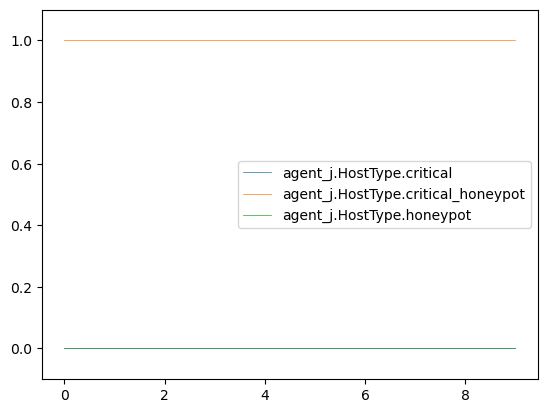

=============AttActive============


state.AttActive.no  state.AttActive.yes agent_i.action agent_j.action
0                 0.0                  1.0        LogIOCs      FileRecon
1                 0.0                  1.0   DecoyAccount   EnumAccounts
2                 0.0                  1.0   LockAccounts   EnumAccounts
3                 0.0                  1.0   LockAccounts     PrivEscAcc
4                 0.0                  1.0   LockAccounts     PrivEscAcc
5                 0.0                  1.0   LockAccounts      FileRecon
6                 0.0                  1.0   LockAccounts           Exit
7                 1.0                  0.0   LockAccounts            Nop
8                 1.0                  0.0            Nop            Nop
9                 1.0                  0.0            Nop            Nop

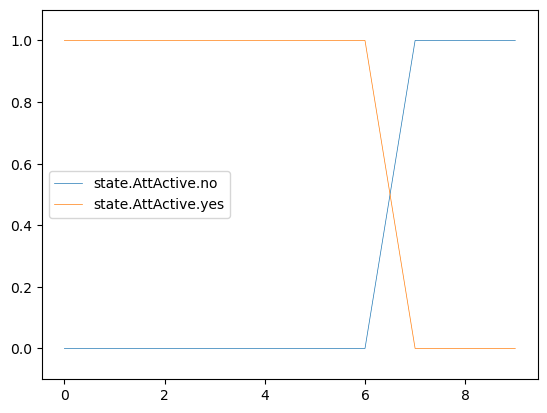

agent_i.AttActive.no  agent_i.AttActive.yes agent_i.action agent_j.action  \
0              0.000000               1.000000        LogIOCs      FileRecon   
1              0.000000               1.000000   DecoyAccount   EnumAccounts   
2              0.000000               1.000000   LockAccounts   EnumAccounts   
3              0.000001               0.999999   LockAccounts     PrivEscAcc   
4              0.150328               0.849672   LockAccounts     PrivEscAcc   
5              0.184501               0.815499   LockAccounts      FileRecon   
6              0.449766               0.550234   LockAccounts           Exit   
7              0.865354               0.134646   LockAccounts            Nop   
8              0.979547               0.020453            Nop            Nop   
9              0.997186               0.002814            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                        file_enum  
3                        file_enum  
4                   login_activity  
5                       file_write  
6                             none  
7                             none  
8                             none  
9                             none

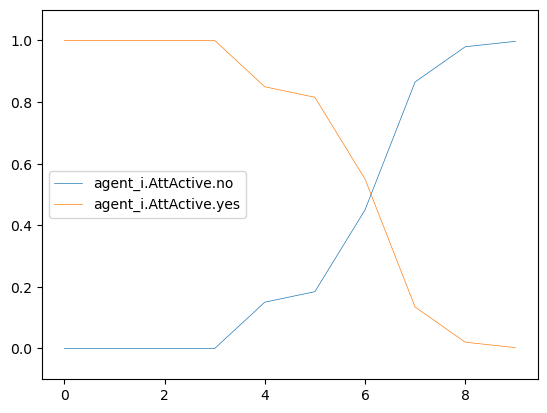

agent_j.AttActive.no  agent_j.AttActive.yes agent_j.action agent_i.action  \
0                   0.0                    1.0      FileRecon        LogIOCs   
1                   0.0                    1.0   EnumAccounts   DecoyAccount   
2                   0.0                    1.0   EnumAccounts   LockAccounts   
3                   0.0                    1.0     PrivEscAcc   LockAccounts   
4                   0.0                    1.0     PrivEscAcc   LockAccounts   
5                   0.0                    1.0      FileRecon   LockAccounts   
6                   0.0                    1.0           Exit   LockAccounts   
7                   1.0                    0.0            Nop   LockAccounts   
8                   1.0                    0.0            Nop            Nop   
9                   1.0                    0.0            Nop            Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                   user_files   
1                          denied                         none   
2                          denied                         none   
3                          denied                   user_files   
4                          denied                         none   
5                          denied                         none   
6                          denied                         none   
7                            auth                         none   
8                          denied                         none   
9                            auth                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                          active   
2                           success                          active   
3                           success                          active   
4                           success                          active   
5                           failure                          active   
6                           success                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2               acc_policy_change  
3               acc_policy_change  
4               acc_policy_change  
5               acc_policy_change  
6                            none  
7                            none  
8                            none  
9                            none

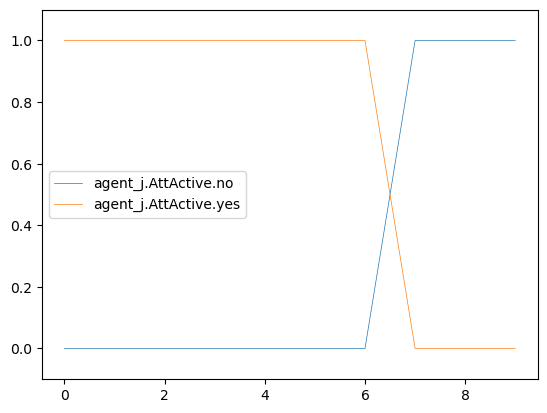

=============IOCsLogged============


state.IOCsLogged.no  state.IOCsLogged.yes agent_i.action agent_j.action
0                  1.0                   0.0        LogIOCs      FileRecon
1                  0.0                   1.0   DecoyAccount   EnumAccounts
2                  0.0                   1.0   LockAccounts   EnumAccounts
3                  0.0                   1.0   LockAccounts     PrivEscAcc
4                  0.0                   1.0   LockAccounts     PrivEscAcc
5                  0.0                   1.0   LockAccounts      FileRecon
6                  0.0                   1.0   LockAccounts           Exit
7                  0.0                   1.0   LockAccounts            Nop
8                  0.0                   1.0            Nop            Nop
9                  0.0                   1.0            Nop            Nop

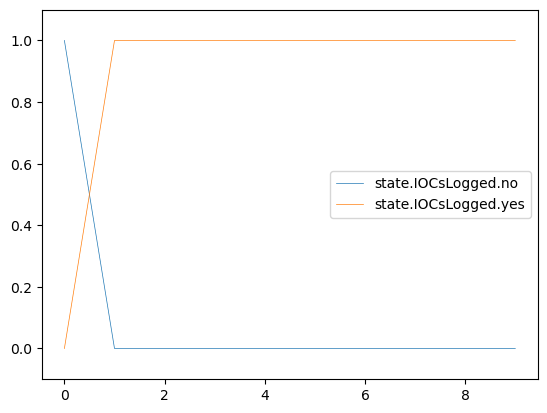

agent_i.IOCsLogged.no  agent_i.IOCsLogged.yes agent_i.action  \
0                    1.0                     0.0        LogIOCs   
1                    0.0                     1.0   DecoyAccount   
2                    0.0                     1.0   LockAccounts   
3                    0.0                     1.0   LockAccounts   
4                    0.0                     1.0   LockAccounts   
5                    0.0                     1.0   LockAccounts   
6                    0.0                     1.0   LockAccounts   
7                    0.0                     1.0   LockAccounts   
8                    0.0                     1.0            Nop   
9                    0.0                     1.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1   EnumAccounts                        file_enum  
2   EnumAccounts                        file_enum  
3     PrivEscAcc                        file_enum  
4     PrivEscAcc                   login_activity  
5      FileRecon                       file_write  
6           Exit                             none  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

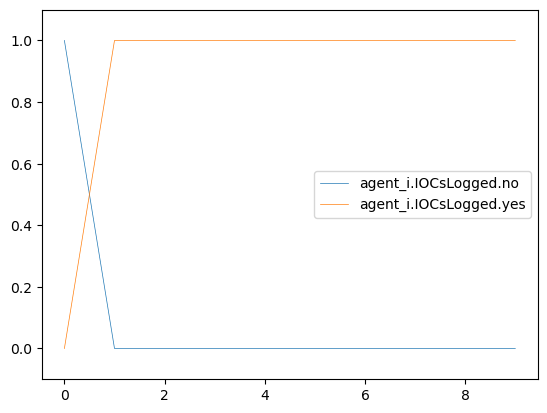

agent_j.IOCsLogged.no  agent_j.IOCsLogged.yes agent_j.action  \
0               1.000000                0.000000      FileRecon   
1               0.750000                0.250000   EnumAccounts   
2               0.845454                0.154545   EnumAccounts   
3               0.932118                0.067882     PrivEscAcc   
4               0.999468                0.000532     PrivEscAcc   
5               0.998393                0.001607      FileRecon   
6               0.998393                0.001607           Exit   
7               0.998393                0.001607            Nop   
8               0.998393                0.001607            Nop   
9               0.998393                0.001607            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                          denied                   user_files   
1   DecoyAccount                          denied                         none   
2   LockAccounts                          denied                         none   
3   LockAccounts                          denied                   user_files   
4   LockAccounts                          denied                         none   
5   LockAccounts                          denied                         none   
6   LockAccounts                          denied                         none   
7   LockAccounts                            auth                         none   
8            Nop                          denied                         none   
9            Nop                            auth                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                          active   
2                           success                          active   
3                           success                          active   
4                           success                          active   
5                           failure                          active   
6                           success                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2               acc_policy_change  
3               acc_policy_change  
4               acc_policy_change  
5               acc_policy_change  
6                            none  
7                            none  
8                            none  
9                            none

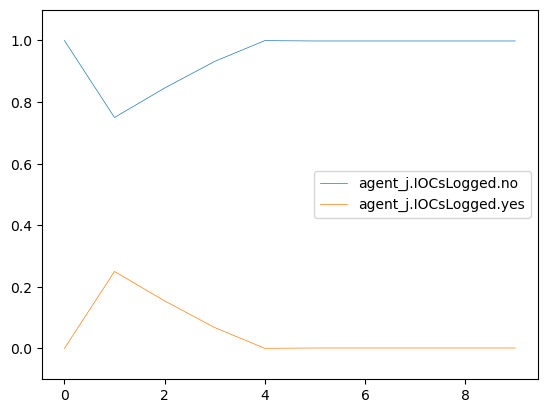

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                        file_enum
2                               1.0                   login_activity
3                               1.0                   login_activity
4                               1.0                   login_activity
5                               1.0                        file_enum
6                               1.0                             none
7                               1.0                        file_enum
8                               1.0                        file_enum
9                               1.0                             none

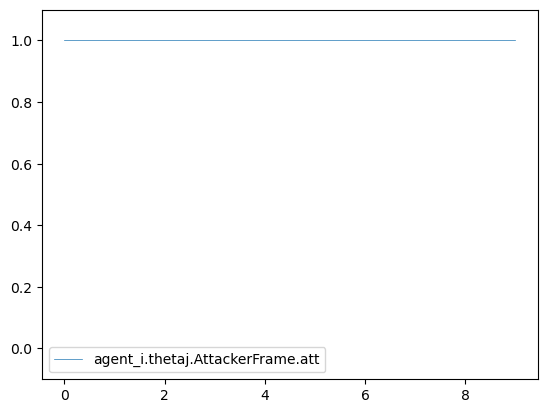

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.500000                        0.500000   
2                         0.436364                        0.563636   
3                         0.906788                        0.093212   
4                         0.993562                        0.006438   
5                         0.980542                        0.019458   
6                         0.980542                        0.019458   
7                         0.980542                        0.019458   
8                         0.980542                        0.019458   
9                         0.980542                        0.019458   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                         none   
1                          denied                         none   
2                          denied                         none   
3                          denied                         none   
4                          denied                         none   
5                          denied                         none   
6                          denied                   user_files   
7                            auth                         none   
8                          denied                         none   
9                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                          active   
2                           success                          active   
3                           failure                          active   
4                           failure                          active   
5                           success                          active   
6                           success                      terminated   
7                           success                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2               acc_policy_change  
3               acc_policy_change  
4               acc_policy_change  
5               acc_policy_change  
6                            none  
7                            none  
8                            none  
9                            none

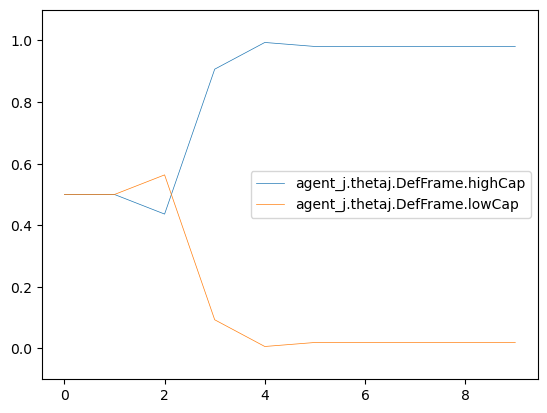

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user agent_i.action  \
0                     0.0                     1.0        LogIOCs   
1                     0.0                     1.0   DecoyAccount   
2                     0.0                     1.0   LockAccounts   
3                     0.0                     1.0   LockAccounts   
4                     0.0                     1.0   LockAccounts   
5                     0.0                     1.0   LockAccounts   
6                     0.0                     1.0   LockAccounts   
7                     0.0                     1.0   LockAccounts   
8                     0.0                     1.0   LockAccounts   
9                     0.0                     1.0   LockAccounts   

  agent_j.action  
0      FileRecon  
1   EnumAccounts  
2   EnumAccounts  
3     PrivEscAcc  
4     PrivEscAcc  
5      FileRecon  
6           Exit  
7            Nop  
8            Nop  
9            Nop

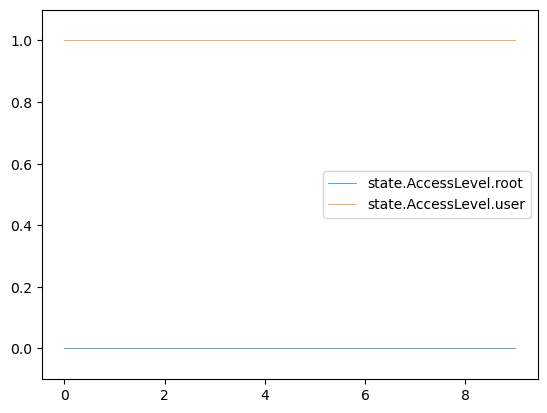

agent_i.AccessLevel.root  agent_i.AccessLevel.user agent_i.action  \
0                       0.0                       1.0        LogIOCs   
1                       0.0                       1.0   DecoyAccount   
2                       0.0                       1.0   LockAccounts   
3                       0.0                       1.0   LockAccounts   
4                       0.0                       1.0   LockAccounts   
5                       0.0                       1.0   LockAccounts   
6                       0.0                       1.0   LockAccounts   
7                       0.0                       1.0   LockAccounts   
8                       0.0                       1.0   LockAccounts   
9                       0.0                       1.0   LockAccounts   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1   EnumAccounts                        file_enum  
2   EnumAccounts                   login_activity  
3     PrivEscAcc                   login_activity  
4     PrivEscAcc                   login_activity  
5      FileRecon                        file_enum  
6           Exit                             none  
7            Nop                        file_enum  
8            Nop                        file_enum  
9            Nop                             none

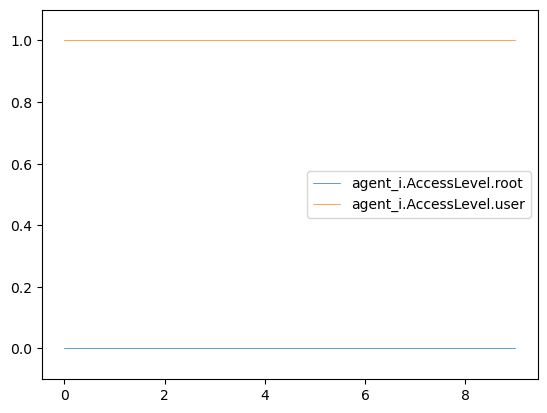

agent_j.AccessLevel.root  agent_j.AccessLevel.user agent_j.action  \
0                       0.0                       1.0      FileRecon   
1                       0.0                       1.0   EnumAccounts   
2                       0.0                       1.0   EnumAccounts   
3                       0.0                       1.0     PrivEscAcc   
4                       0.0                       1.0     PrivEscAcc   
5                       0.0                       1.0      FileRecon   
6                       0.0                       1.0           Exit   
7                       0.0                       1.0            Nop   
8                       0.0                       1.0            Nop   
9                       0.0                       1.0            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                          denied                         none   
1   DecoyAccount                          denied                         none   
2   LockAccounts                          denied                         none   
3   LockAccounts                          denied                         none   
4   LockAccounts                          denied                         none   
5   LockAccounts                          denied                         none   
6   LockAccounts                          denied                   user_files   
7   LockAccounts                            auth                         none   
8   LockAccounts                          denied                         none   
9   LockAccounts                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                          active   
2                           success                          active   
3                           failure                          active   
4                           failure                          active   
5                           success                          active   
6                           success                      terminated   
7                           success                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2               acc_policy_change  
3               acc_policy_change  
4               acc_policy_change  
5               acc_policy_change  
6                            none  
7                            none  
8                            none  
9                            none

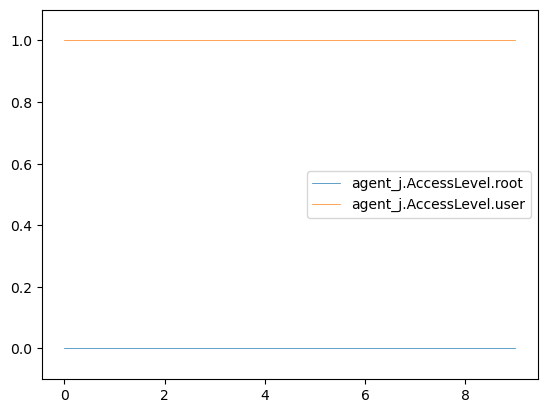

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes agent_i.action agent_j.action
0                   1.0                    0.0        LogIOCs      FileRecon
1                   1.0                    0.0   DecoyAccount   EnumAccounts
2                   0.0                    1.0   LockAccounts   EnumAccounts
3                   0.0                    1.0   LockAccounts     PrivEscAcc
4                   0.0                    1.0   LockAccounts     PrivEscAcc
5                   0.0                    1.0   LockAccounts      FileRecon
6                   0.0                    1.0   LockAccounts           Exit
7                   0.0                    1.0   LockAccounts            Nop
8                   0.0                    1.0   LockAccounts            Nop
9                   0.0                    1.0   LockAccounts            Nop

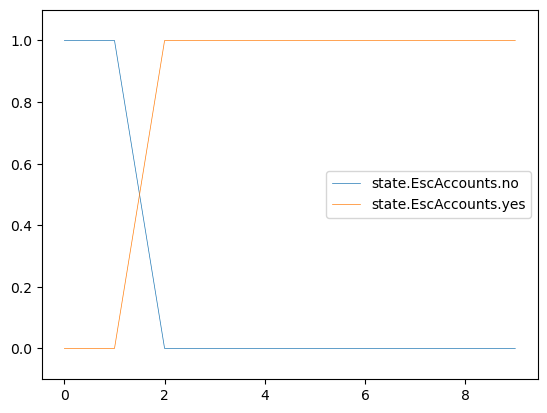

agent_i.EscAccounts.no  agent_i.EscAccounts.yes agent_i.action  \
0                     1.0                      0.0        LogIOCs   
1                     1.0                      0.0   DecoyAccount   
2                     0.0                      1.0   LockAccounts   
3                     0.0                      1.0   LockAccounts   
4                     0.0                      1.0   LockAccounts   
5                     0.0                      1.0   LockAccounts   
6                     0.0                      1.0   LockAccounts   
7                     0.0                      1.0   LockAccounts   
8                     0.0                      1.0   LockAccounts   
9                     0.0                      1.0   LockAccounts   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1   EnumAccounts                        file_enum  
2   EnumAccounts                   login_activity  
3     PrivEscAcc                   login_activity  
4     PrivEscAcc                   login_activity  
5      FileRecon                        file_enum  
6           Exit                             none  
7            Nop                        file_enum  
8            Nop                        file_enum  
9            Nop                             none

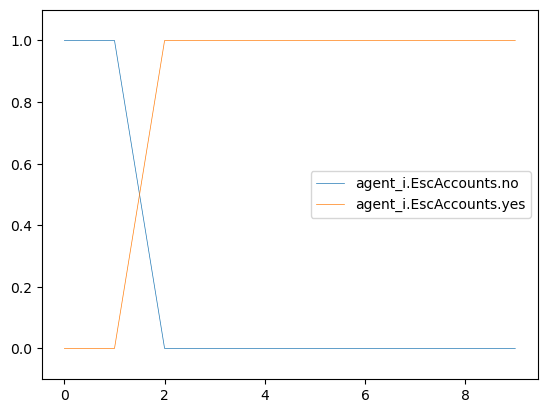

agent_j.EscAccounts.no  agent_j.EscAccounts.yes agent_j.action  \
0                0.500000                 0.500000      FileRecon   
1                0.500000                 0.500000   EnumAccounts   
2                0.613636                 0.386364   EnumAccounts   
3                0.253293                 0.746707     PrivEscAcc   
4                0.303063                 0.696937     PrivEscAcc   
5                0.915957                 0.084043      FileRecon   
6                0.915957                 0.084043           Exit   
7                0.915957                 0.084043            Nop   
8                0.915957                 0.084043            Nop   
9                0.915957                 0.084043            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                          denied                         none   
1   DecoyAccount                          denied                         none   
2   LockAccounts                          denied                         none   
3   LockAccounts                          denied                         none   
4   LockAccounts                          denied                         none   
5   LockAccounts                          denied                         none   
6   LockAccounts                          denied                   user_files   
7   LockAccounts                            auth                         none   
8   LockAccounts                          denied                         none   
9   LockAccounts                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                          active   
2                           success                          active   
3                           failure                          active   
4                           failure                          active   
5                           success                          active   
6                           success                      terminated   
7                           success                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2               acc_policy_change  
3               acc_policy_change  
4               acc_policy_change  
5               acc_policy_change  
6                            none  
7                            none  
8                            none  
9                            none

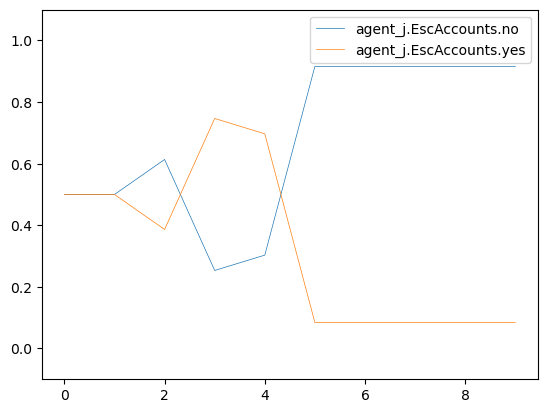

=============AccFound============


state.AccFound.no  state.AccFound.yes agent_i.action agent_j.action
0                1.0                 0.0        LogIOCs      FileRecon
1                1.0                 0.0   DecoyAccount   EnumAccounts
2                0.0                 1.0   LockAccounts   EnumAccounts
3                0.0                 1.0   LockAccounts     PrivEscAcc
4                0.0                 1.0   LockAccounts     PrivEscAcc
5                0.0                 1.0   LockAccounts      FileRecon
6                0.0                 1.0   LockAccounts           Exit
7                0.0                 1.0   LockAccounts            Nop
8                0.0                 1.0   LockAccounts            Nop
9                0.0                 1.0   LockAccounts            Nop

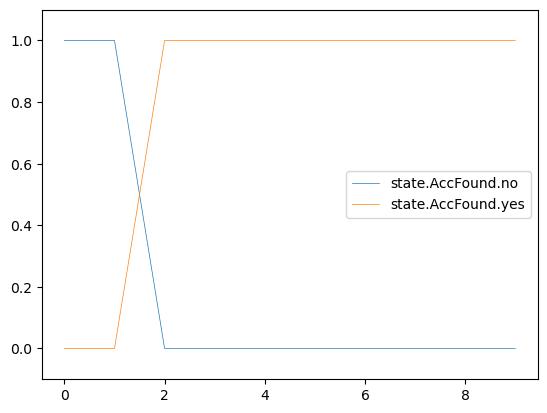

agent_i.AccFound.no  agent_i.AccFound.yes agent_i.action agent_j.action  \
0             1.000000              0.000000        LogIOCs      FileRecon   
1             1.000000              0.000000   DecoyAccount   EnumAccounts   
2             0.305224              0.694776   LockAccounts   EnumAccounts   
3             0.077058              0.922942   LockAccounts     PrivEscAcc   
4             0.049569              0.950430   LockAccounts     PrivEscAcc   
5             0.045308              0.954692   LockAccounts      FileRecon   
6             0.038561              0.961439   LockAccounts           Exit   
7             0.043520              0.956480   LockAccounts            Nop   
8             0.040245              0.959755   LockAccounts            Nop   
9             0.039654              0.960345   LockAccounts            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                   login_activity  
3                   login_activity  
4                   login_activity  
5                        file_enum  
6                             none  
7                        file_enum  
8                        file_enum  
9                             none

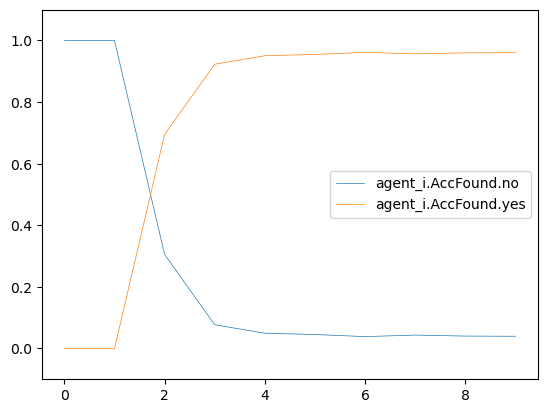

agent_j.AccFound.no  agent_j.AccFound.yes agent_j.action agent_i.action  \
0             1.000000              0.000000      FileRecon        LogIOCs   
1             1.000000              0.000000   EnumAccounts   DecoyAccount   
2             0.920454              0.079545   EnumAccounts   LockAccounts   
3             0.278369              0.721631     PrivEscAcc   LockAccounts   
4             0.330871              0.669129     PrivEscAcc   LockAccounts   
5             1.000000              0.000000      FileRecon   LockAccounts   
6             1.000000              0.000000           Exit   LockAccounts   
7             1.000000              0.000000            Nop   LockAccounts   
8             1.000000              0.000000            Nop   LockAccounts   
9             1.000000              0.000000            Nop   LockAccounts   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                         none   
1                          denied                         none   
2                          denied                         none   
3                          denied                         none   
4                          denied                         none   
5                          denied                         none   
6                          denied                   user_files   
7                            auth                         none   
8                          denied                         none   
9                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                          active   
2                           success                          active   
3                           failure                          active   
4                           failure                          active   
5                           success                          active   
6                           success                      terminated   
7                           success                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2               acc_policy_change  
3               acc_policy_change  
4               acc_policy_change  
5               acc_policy_change  
6                            none  
7                            none  
8                            none  
9                            none

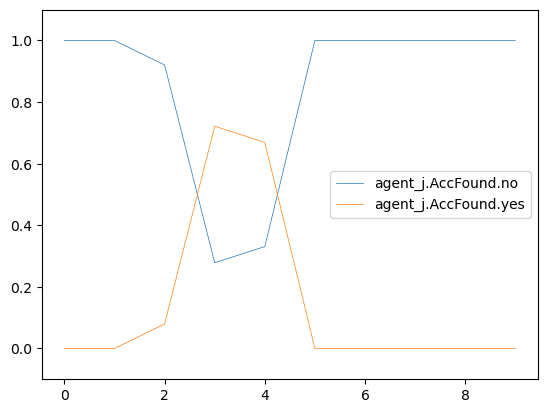

=============DataFound============


state.DataFound.no  state.DataFound.yes agent_i.action agent_j.action
0                 1.0                  0.0        LogIOCs      FileRecon
1                 1.0                  0.0   DecoyAccount   EnumAccounts
2                 1.0                  0.0   LockAccounts   EnumAccounts
3                 1.0                  0.0   LockAccounts     PrivEscAcc
4                 1.0                  0.0   LockAccounts     PrivEscAcc
5                 1.0                  0.0   LockAccounts      FileRecon
6                 1.0                  0.0   LockAccounts           Exit
7                 1.0                  0.0   LockAccounts            Nop
8                 1.0                  0.0   LockAccounts            Nop
9                 1.0                  0.0   LockAccounts            Nop

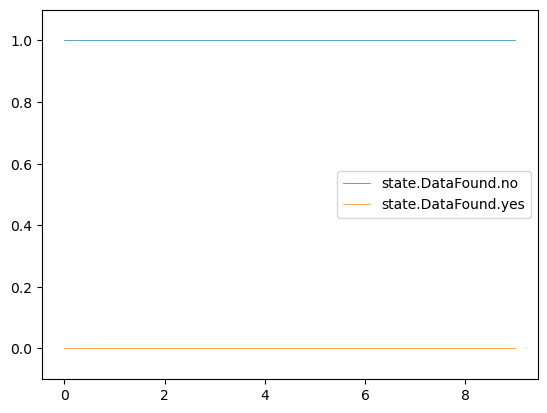

agent_i.DataFound.no  agent_i.DataFound.yes agent_i.action agent_j.action  \
0                   1.0                    0.0        LogIOCs      FileRecon   
1                   1.0                    0.0   DecoyAccount   EnumAccounts   
2                   1.0                    0.0   LockAccounts   EnumAccounts   
3                   1.0                    0.0   LockAccounts     PrivEscAcc   
4                   1.0                    0.0   LockAccounts     PrivEscAcc   
5                   1.0                    0.0   LockAccounts      FileRecon   
6                   1.0                    0.0   LockAccounts           Exit   
7                   1.0                    0.0   LockAccounts            Nop   
8                   1.0                    0.0   LockAccounts            Nop   
9                   1.0                    0.0   LockAccounts            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                   login_activity  
3                   login_activity  
4                   login_activity  
5                        file_enum  
6                             none  
7                        file_enum  
8                        file_enum  
9                             none

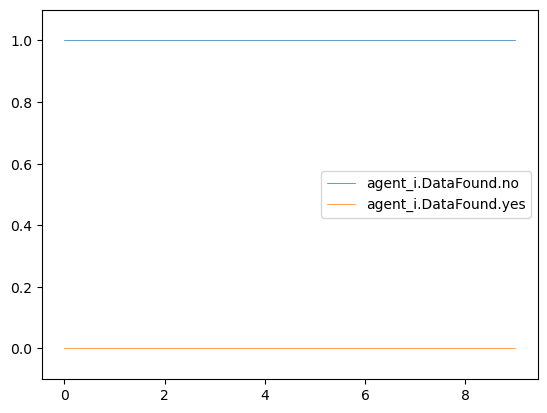

agent_j.DataFound.no  agent_j.DataFound.yes agent_j.action agent_i.action  \
0                   1.0                    0.0      FileRecon        LogIOCs   
1                   1.0                    0.0   EnumAccounts   DecoyAccount   
2                   1.0                    0.0   EnumAccounts   LockAccounts   
3                   1.0                    0.0     PrivEscAcc   LockAccounts   
4                   1.0                    0.0     PrivEscAcc   LockAccounts   
5                   1.0                    0.0      FileRecon   LockAccounts   
6                   1.0                    0.0           Exit   LockAccounts   
7                   1.0                    0.0            Nop   LockAccounts   
8                   1.0                    0.0            Nop   LockAccounts   
9                   1.0                    0.0            Nop   LockAccounts   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                         none   
1                          denied                         none   
2                          denied                         none   
3                          denied                         none   
4                          denied                         none   
5                          denied                         none   
6                          denied                   user_files   
7                            auth                         none   
8                          denied                         none   
9                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                          active   
2                           success                          active   
3                           failure                          active   
4                           failure                          active   
5                           success                          active   
6                           success                      terminated   
7                           success                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2               acc_policy_change  
3               acc_policy_change  
4               acc_policy_change  
5               acc_policy_change  
6                            none  
7                            none  
8                            none  
9                            none

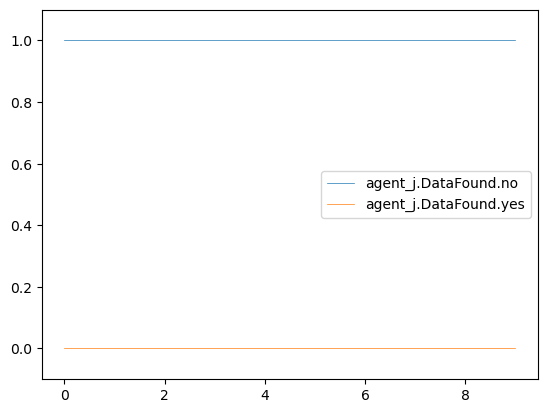

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes agent_i.action agent_j.action
0                    1.0                     0.0        LogIOCs      FileRecon
1                    1.0                     0.0   DecoyAccount   EnumAccounts
2                    1.0                     0.0   LockAccounts   EnumAccounts
3                    1.0                     0.0   LockAccounts     PrivEscAcc
4                    1.0                     0.0   LockAccounts     PrivEscAcc
5                    1.0                     0.0   LockAccounts      FileRecon
6                    1.0                     0.0   LockAccounts           Exit
7                    1.0                     0.0   LockAccounts            Nop
8                    1.0                     0.0   LockAccounts            Nop
9                    1.0                     0.0   LockAccounts            Nop

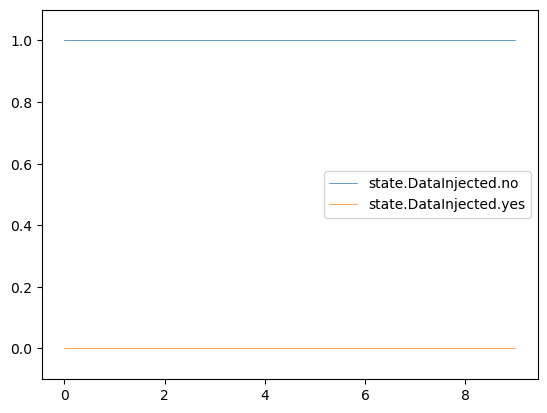

agent_i.DataInjected.no  agent_i.DataInjected.yes agent_i.action  \
0                      1.0                       0.0        LogIOCs   
1                      1.0                       0.0   DecoyAccount   
2                      1.0                       0.0   LockAccounts   
3                      1.0                       0.0   LockAccounts   
4                      1.0                       0.0   LockAccounts   
5                      1.0                       0.0   LockAccounts   
6                      1.0                       0.0   LockAccounts   
7                      1.0                       0.0   LockAccounts   
8                      1.0                       0.0   LockAccounts   
9                      1.0                       0.0   LockAccounts   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1   EnumAccounts                        file_enum  
2   EnumAccounts                   login_activity  
3     PrivEscAcc                   login_activity  
4     PrivEscAcc                   login_activity  
5      FileRecon                        file_enum  
6           Exit                             none  
7            Nop                        file_enum  
8            Nop                        file_enum  
9            Nop                             none

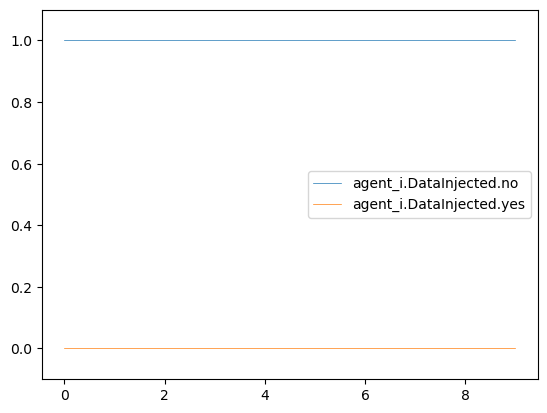

agent_j.DataInjected.no  agent_j.DataInjected.yes agent_j.action  \
0                      1.0                       0.0      FileRecon   
1                      1.0                       0.0   EnumAccounts   
2                      1.0                       0.0   EnumAccounts   
3                      1.0                       0.0     PrivEscAcc   
4                      1.0                       0.0     PrivEscAcc   
5                      1.0                       0.0      FileRecon   
6                      1.0                       0.0           Exit   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                          denied                         none   
1   DecoyAccount                          denied                         none   
2   LockAccounts                          denied                         none   
3   LockAccounts                          denied                         none   
4   LockAccounts                          denied                         none   
5   LockAccounts                          denied                         none   
6   LockAccounts                          denied                   user_files   
7   LockAccounts                            auth                         none   
8   LockAccounts                          denied                         none   
9   LockAccounts                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                          active   
2                           success                          active   
3                           failure                          active   
4                           failure                          active   
5                           success                          active   
6                           success                      terminated   
7                           success                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2               acc_policy_change  
3               acc_policy_change  
4               acc_policy_change  
5               acc_policy_change  
6                            none  
7                            none  
8                            none  
9                            none

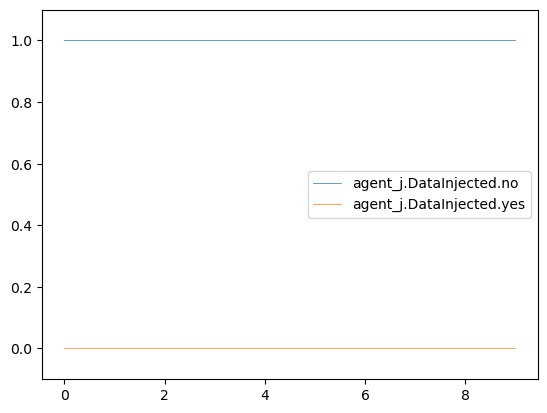

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes agent_i.action agent_j.action
0                   0.0                    1.0        LogIOCs      FileRecon
1                   0.0                    1.0   DecoyAccount   EnumAccounts
2                   0.0                    1.0   LockAccounts   EnumAccounts
3                   0.0                    1.0   LockAccounts     PrivEscAcc
4                   0.0                    1.0   LockAccounts     PrivEscAcc
5                   0.0                    1.0   LockAccounts      FileRecon
6                   0.0                    1.0   LockAccounts           Exit
7                   0.0                    1.0   LockAccounts            Nop
8                   0.0                    1.0   LockAccounts            Nop
9                   0.0                    1.0   LockAccounts            Nop

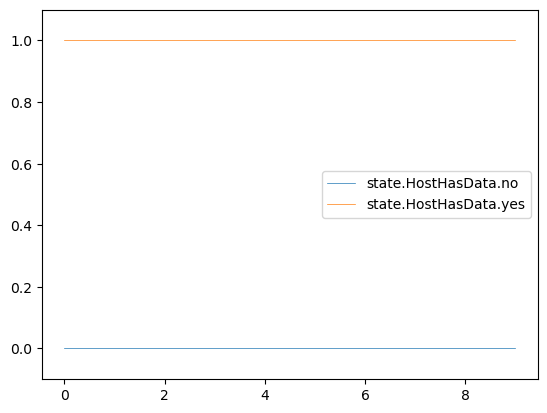

agent_i.HostHasData.no  agent_i.HostHasData.yes agent_i.action  \
0                     0.0                      1.0        LogIOCs   
1                     0.0                      1.0   DecoyAccount   
2                     0.0                      1.0   LockAccounts   
3                     0.0                      1.0   LockAccounts   
4                     0.0                      1.0   LockAccounts   
5                     0.0                      1.0   LockAccounts   
6                     0.0                      1.0   LockAccounts   
7                     0.0                      1.0   LockAccounts   
8                     0.0                      1.0   LockAccounts   
9                     0.0                      1.0   LockAccounts   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1   EnumAccounts                        file_enum  
2   EnumAccounts                   login_activity  
3     PrivEscAcc                   login_activity  
4     PrivEscAcc                   login_activity  
5      FileRecon                        file_enum  
6           Exit                             none  
7            Nop                        file_enum  
8            Nop                        file_enum  
9            Nop                             none

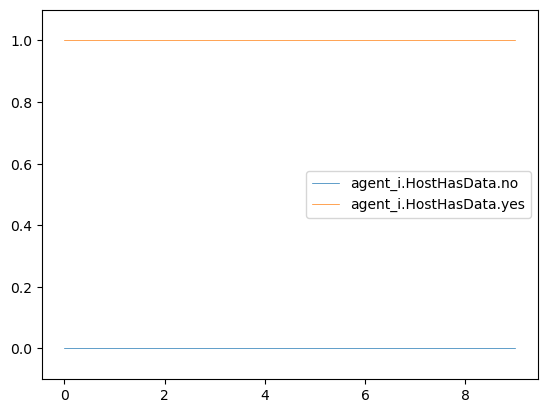

agent_j.HostHasData.no  agent_j.HostHasData.yes agent_j.action  \
0                0.500000                 0.500000      FileRecon   
1                0.606061                 0.393939   EnumAccounts   
2                0.606061                 0.393939   EnumAccounts   
3                0.606061                 0.393939     PrivEscAcc   
4                0.606061                 0.393939     PrivEscAcc   
5                0.606061                 0.393939      FileRecon   
6                0.647249                 0.352751           Exit   
7                0.647249                 0.352751            Nop   
8                0.647249                 0.352751            Nop   
9                0.647249                 0.352751            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                          denied                         none   
1   DecoyAccount                          denied                         none   
2   LockAccounts                          denied                         none   
3   LockAccounts                          denied                         none   
4   LockAccounts                          denied                         none   
5   LockAccounts                          denied                         none   
6   LockAccounts                          denied                   user_files   
7   LockAccounts                            auth                         none   
8   LockAccounts                          denied                         none   
9   LockAccounts                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                          active   
2                           success                          active   
3                           failure                          active   
4                           failure                          active   
5                           success                          active   
6                           success                      terminated   
7                           success                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2               acc_policy_change  
3               acc_policy_change  
4               acc_policy_change  
5               acc_policy_change  
6                            none  
7                            none  
8                            none  
9                            none

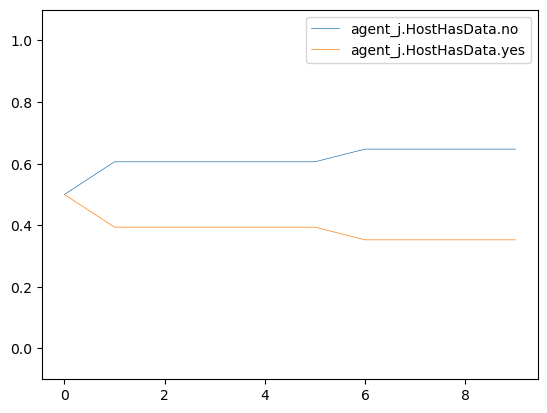

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user agent_i.action agent_j.action
0                   1.0                   0.0        LogIOCs      FileRecon
1                   1.0                   0.0   DecoyAccount   EnumAccounts
2                   1.0                   0.0   LockAccounts   EnumAccounts
3                   1.0                   0.0   LockAccounts     PrivEscAcc
4                   1.0                   0.0   LockAccounts     PrivEscAcc
5                   1.0                   0.0   LockAccounts      FileRecon
6                   1.0                   0.0   LockAccounts           Exit
7                   1.0                   0.0   LockAccounts            Nop
8                   1.0                   0.0   LockAccounts            Nop
9                   1.0                   0.0   LockAccounts            Nop

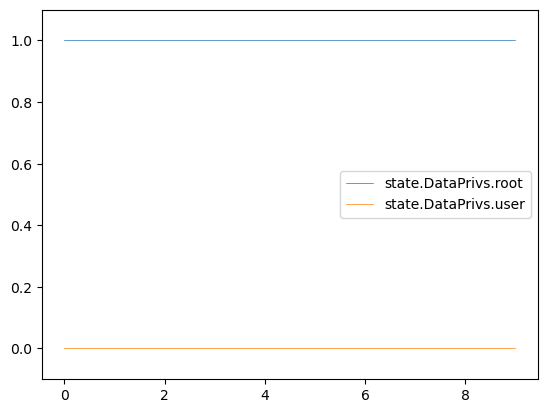

agent_i.DataPrivs.root  agent_i.DataPrivs.user agent_i.action  \
0                     1.0                     0.0        LogIOCs   
1                     1.0                     0.0   DecoyAccount   
2                     1.0                     0.0   LockAccounts   
3                     1.0                     0.0   LockAccounts   
4                     1.0                     0.0   LockAccounts   
5                     1.0                     0.0   LockAccounts   
6                     1.0                     0.0   LockAccounts   
7                     1.0                     0.0   LockAccounts   
8                     1.0                     0.0   LockAccounts   
9                     1.0                     0.0   LockAccounts   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1   EnumAccounts                        file_enum  
2   EnumAccounts                   login_activity  
3     PrivEscAcc                   login_activity  
4     PrivEscAcc                   login_activity  
5      FileRecon                        file_enum  
6           Exit                             none  
7            Nop                        file_enum  
8            Nop                        file_enum  
9            Nop                             none

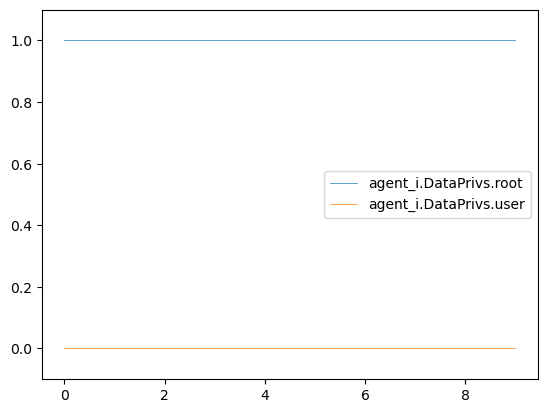

agent_j.DataPrivs.root  agent_j.DataPrivs.user agent_j.action  \
0                0.500000                0.500000      FileRecon   
1                0.606061                0.393939   EnumAccounts   
2                0.606061                0.393939   EnumAccounts   
3                0.606061                0.393939     PrivEscAcc   
4                0.606061                0.393939     PrivEscAcc   
5                0.606061                0.393939      FileRecon   
6                0.647249                0.352751           Exit   
7                0.647249                0.352751            Nop   
8                0.647249                0.352751            Nop   
9                0.647249                0.352751            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                          denied                         none   
1   DecoyAccount                          denied                         none   
2   LockAccounts                          denied                         none   
3   LockAccounts                          denied                         none   
4   LockAccounts                          denied                         none   
5   LockAccounts                          denied                         none   
6   LockAccounts                          denied                   user_files   
7   LockAccounts                            auth                         none   
8   LockAccounts                          denied                         none   
9   LockAccounts                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                          active   
2                           success                          active   
3                           failure                          active   
4                           failure                          active   
5                           success                          active   
6                           success                      terminated   
7                           success                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2               acc_policy_change  
3               acc_policy_change  
4               acc_policy_change  
5               acc_policy_change  
6                            none  
7                            none  
8                            none  
9                            none

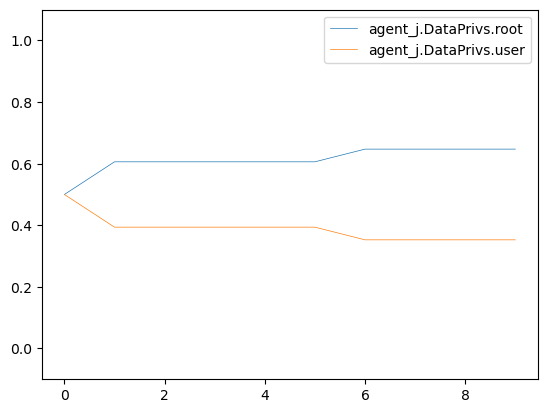

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot agent_i.action agent_j.action  
0                      1.0        LogIOCs      FileRecon  
1                      1.0   DecoyAccount   EnumAccounts  
2                      1.0   LockAccounts   EnumAccounts  
3                      1.0   LockAccounts     PrivEscAcc  
4                      1.0   LockAccounts     PrivEscAcc  
5                      1.0   LockAccounts      FileRecon  
6                      1.0   LockAccounts           Exit  
7                      1.0   LockAccounts            Nop  
8                      1.0   LockAccounts            Nop  
9                      1.0   LockAccounts            Nop

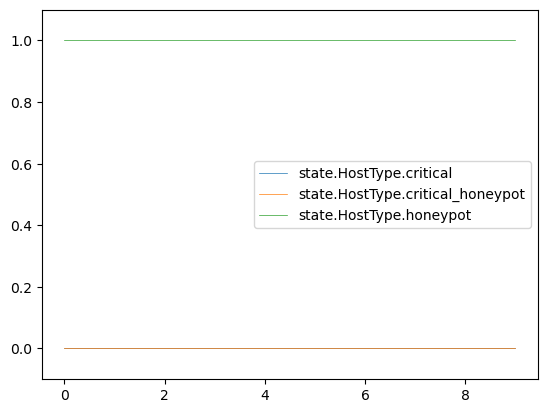

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot agent_i.action agent_j.action  \
0                        1.0        LogIOCs      FileRecon   
1                        1.0   DecoyAccount   EnumAccounts   
2                        1.0   LockAccounts   EnumAccounts   
3                        1.0   LockAccounts     PrivEscAcc   
4                        1.0   LockAccounts     PrivEscAcc   
5                        1.0   LockAccounts      FileRecon   
6                        1.0   LockAccounts           Exit   
7                        1.0   LockAccounts            Nop   
8                        1.0   LockAccounts            Nop   
9                        1.0   LockAccounts            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                   login_activity  
3                   login_activity  
4                   login_activity  
5                        file_enum  
6                             none  
7                        file_enum  
8                        file_enum  
9                             none

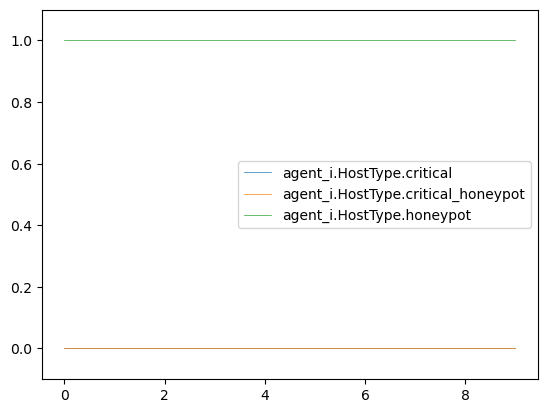

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_j.HostType.honeypot agent_j.action agent_i.action  \
0                        0.0      FileRecon        LogIOCs   
1                        0.0   EnumAccounts   DecoyAccount   
2                        0.0   EnumAccounts   LockAccounts   
3                        0.0     PrivEscAcc   LockAccounts   
4                        0.0     PrivEscAcc   LockAccounts   
5                        0.0      FileRecon   LockAccounts   
6                        0.0           Exit   LockAccounts   
7                        0.0            Nop   LockAccounts   
8                        0.0            Nop   LockAccounts   
9                        0.0            Nop   LockAccounts   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                         none   
1                          denied                         none   
2                          denied                         none   
3                          denied                         none   
4                          denied                         none   
5                          denied                         none   
6                          denied                   user_files   
7                            auth                         none   
8                          denied                         none   
9                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                          active   
2                           success                          active   
3                           failure                          active   
4                           failure                          active   
5                           success                          active   
6                           success                      terminated   
7                           success                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2               acc_policy_change  
3               acc_policy_change  
4               acc_policy_change  
5               acc_policy_change  
6                            none  
7                            none  
8                            none  
9                            none

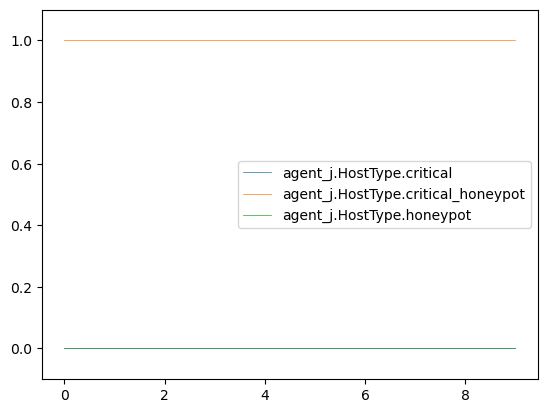

=============AttActive============


state.AttActive.no  state.AttActive.yes agent_i.action agent_j.action
0                 0.0                  1.0        LogIOCs      FileRecon
1                 0.0                  1.0   DecoyAccount   EnumAccounts
2                 0.0                  1.0   LockAccounts   EnumAccounts
3                 0.0                  1.0   LockAccounts     PrivEscAcc
4                 0.0                  1.0   LockAccounts     PrivEscAcc
5                 0.0                  1.0   LockAccounts      FileRecon
6                 0.0                  1.0   LockAccounts           Exit
7                 1.0                  0.0   LockAccounts            Nop
8                 1.0                  0.0   LockAccounts            Nop
9                 1.0                  0.0   LockAccounts            Nop

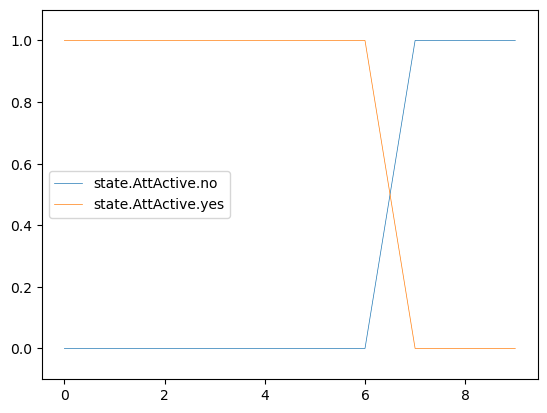

agent_i.AttActive.no  agent_i.AttActive.yes agent_i.action agent_j.action  \
0          0.000000e+00               1.000000        LogIOCs      FileRecon   
1          0.000000e+00               1.000000   DecoyAccount   EnumAccounts   
2          0.000000e+00               1.000000   LockAccounts   EnumAccounts   
3          7.567961e-07               0.999999   LockAccounts     PrivEscAcc   
4          4.294361e-03               0.995705   LockAccounts     PrivEscAcc   
5          9.848009e-04               0.999015   LockAccounts      FileRecon   
6          5.392931e-03               0.994607   LockAccounts           Exit   
7          6.554589e-01               0.344541   LockAccounts            Nop   
8          5.725087e-01               0.427491   LockAccounts            Nop   
9          5.543546e-01               0.445645   LockAccounts            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                   login_activity  
3                   login_activity  
4                   login_activity  
5                        file_enum  
6                             none  
7                        file_enum  
8                        file_enum  
9                             none

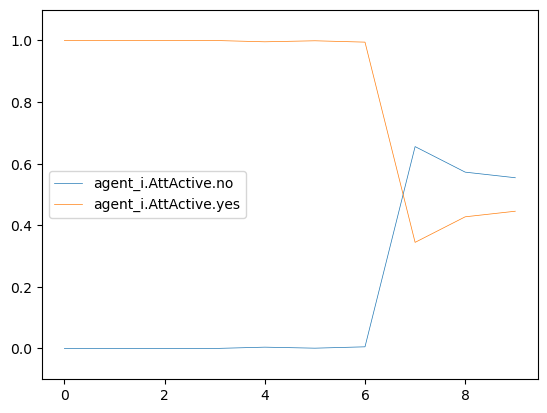

agent_j.AttActive.no  agent_j.AttActive.yes agent_j.action agent_i.action  \
0                   0.0                    1.0      FileRecon        LogIOCs   
1                   0.0                    1.0   EnumAccounts   DecoyAccount   
2                   0.0                    1.0   EnumAccounts   LockAccounts   
3                   0.0                    1.0     PrivEscAcc   LockAccounts   
4                   0.0                    1.0     PrivEscAcc   LockAccounts   
5                   0.0                    1.0      FileRecon   LockAccounts   
6                   0.0                    1.0           Exit   LockAccounts   
7                   1.0                    0.0            Nop   LockAccounts   
8                   1.0                    0.0            Nop   LockAccounts   
9                   1.0                    0.0            Nop   LockAccounts   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                         none   
1                          denied                         none   
2                          denied                         none   
3                          denied                         none   
4                          denied                         none   
5                          denied                         none   
6                          denied                   user_files   
7                            auth                         none   
8                          denied                         none   
9                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                          active   
2                           success                          active   
3                           failure                          active   
4                           failure                          active   
5                           success                          active   
6                           success                      terminated   
7                           success                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2               acc_policy_change  
3               acc_policy_change  
4               acc_policy_change  
5               acc_policy_change  
6                            none  
7                            none  
8                            none  
9                            none

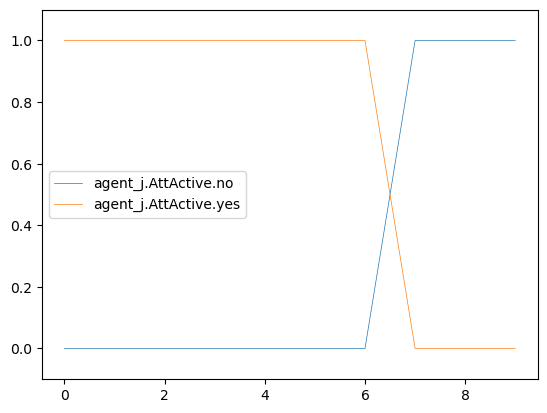

=============IOCsLogged============


state.IOCsLogged.no  state.IOCsLogged.yes agent_i.action agent_j.action
0                  1.0                   0.0        LogIOCs      FileRecon
1                  0.0                   1.0   DecoyAccount   EnumAccounts
2                  0.0                   1.0   LockAccounts   EnumAccounts
3                  0.0                   1.0   LockAccounts     PrivEscAcc
4                  0.0                   1.0   LockAccounts     PrivEscAcc
5                  0.0                   1.0   LockAccounts      FileRecon
6                  0.0                   1.0   LockAccounts           Exit
7                  0.0                   1.0   LockAccounts            Nop
8                  0.0                   1.0   LockAccounts            Nop
9                  0.0                   1.0   LockAccounts            Nop

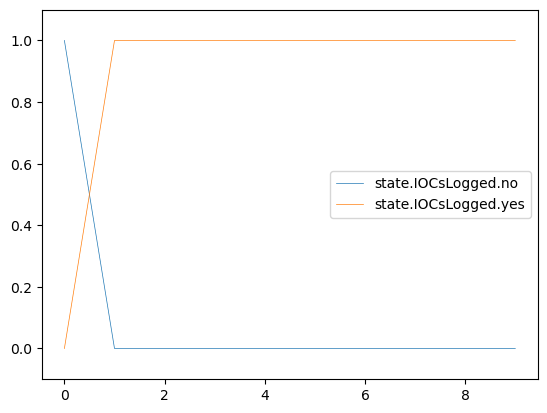

agent_i.IOCsLogged.no  agent_i.IOCsLogged.yes agent_i.action  \
0                    1.0                     0.0        LogIOCs   
1                    0.0                     1.0   DecoyAccount   
2                    0.0                     1.0   LockAccounts   
3                    0.0                     1.0   LockAccounts   
4                    0.0                     1.0   LockAccounts   
5                    0.0                     1.0   LockAccounts   
6                    0.0                     1.0   LockAccounts   
7                    0.0                     1.0   LockAccounts   
8                    0.0                     1.0   LockAccounts   
9                    0.0                     1.0   LockAccounts   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1   EnumAccounts                        file_enum  
2   EnumAccounts                   login_activity  
3     PrivEscAcc                   login_activity  
4     PrivEscAcc                   login_activity  
5      FileRecon                        file_enum  
6           Exit                             none  
7            Nop                        file_enum  
8            Nop                        file_enum  
9            Nop                             none

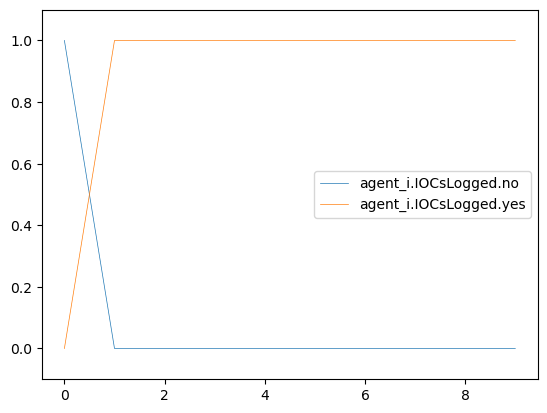

agent_j.IOCsLogged.no  agent_j.IOCsLogged.yes agent_j.action  \
0               1.000000                0.000000      FileRecon   
1               0.750000                0.250000   EnumAccounts   
2               0.845454                0.154545   EnumAccounts   
3               0.932118                0.067882     PrivEscAcc   
4               0.999468                0.000532     PrivEscAcc   
5               0.998393                0.001607      FileRecon   
6               0.998393                0.001607           Exit   
7               0.998393                0.001607            Nop   
8               0.998393                0.001607            Nop   
9               0.998393                0.001607            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                          denied                         none   
1   DecoyAccount                          denied                         none   
2   LockAccounts                          denied                         none   
3   LockAccounts                          denied                         none   
4   LockAccounts                          denied                         none   
5   LockAccounts                          denied                         none   
6   LockAccounts                          denied                   user_files   
7   LockAccounts                            auth                         none   
8   LockAccounts                          denied                         none   
9   LockAccounts                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                          active   
2                           success                          active   
3                           failure                          active   
4                           failure                          active   
5                           success                          active   
6                           success                      terminated   
7                           success                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2               acc_policy_change  
3               acc_policy_change  
4               acc_policy_change  
5               acc_policy_change  
6                            none  
7                            none  
8                            none  
9                            none

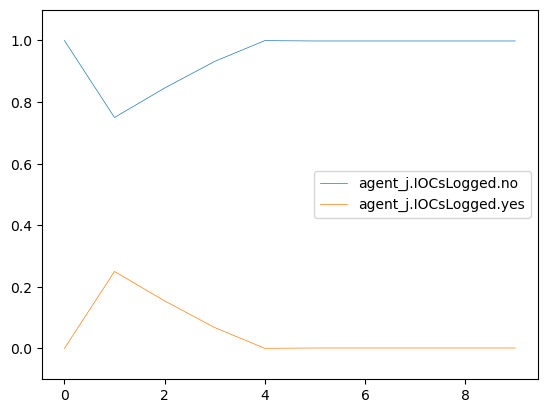

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                        file_enum
2                               1.0                             none
3                               1.0                   login_activity
4                               1.0                   login_activity
5                               1.0                        file_enum
6                               1.0                             none
7                               1.0                             none
8                               1.0                             none
9                               1.0                        file_enum

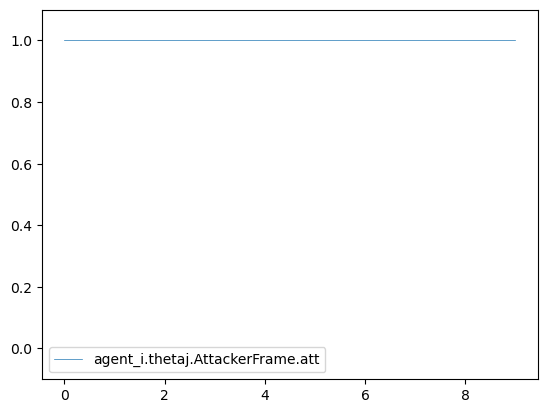

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.500000                        0.500000   
2                         0.577778                        0.422222   
3                         0.981429                        0.018571   
4                         0.989436                        0.010564   
5                         0.958335                        0.041665   
6                         0.958335                        0.041665   
7                         0.958335                        0.041665   
8                         0.958335                        0.041665   
9                         0.958335                        0.041665   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                            auth                         none   
1                          denied                   user_files   
2                          denied                   user_files   
3                          denied                         none   
4                          denied                         none   
5                          denied                   user_files   
6                          denied                   user_files   
7                            auth                   user_files   
8                            auth                   user_files   
9                            auth                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                          active   
2                           failure                          active   
3                           success                          active   
4                           failure                          active   
5                           failure                          active   
6                           failure                      terminated   
7                           failure                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2               acc_policy_change  
3               acc_policy_change  
4               acc_policy_change  
5               acc_policy_change  
6                            none  
7                            none  
8                            none  
9                            none

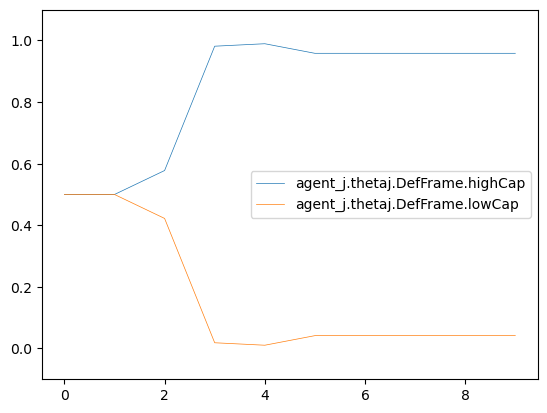

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user agent_i.action  \
0                     0.0                     1.0        LogIOCs   
1                     0.0                     1.0   DecoyAccount   
2                     0.0                     1.0   LockAccounts   
3                     0.0                     1.0   LockAccounts   
4                     0.0                     1.0   LockAccounts   
5                     0.0                     1.0   LockAccounts   
6                     0.0                     1.0   LockAccounts   
7                     0.0                     1.0   LockAccounts   
8                     0.0                     1.0            Nop   
9                     0.0                     1.0            Nop   

  agent_j.action  
0      FileRecon  
1   EnumAccounts  
2     PrivEscAcc  
3     PrivEscAcc  
4     PrivEscAcc  
5      FileRecon  
6           Exit  
7            Nop  
8            Nop  
9            Nop

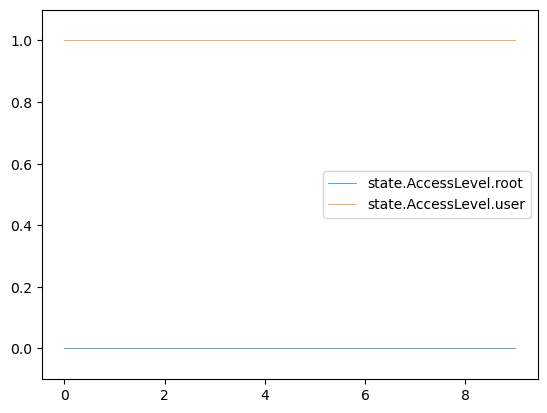

agent_i.AccessLevel.root  agent_i.AccessLevel.user agent_i.action  \
0                  0.000000                  1.000000        LogIOCs   
1                  0.000000                  1.000000   DecoyAccount   
2                  0.000000                  1.000000   LockAccounts   
3                  0.000000                  1.000000   LockAccounts   
4                  0.000000                  1.000000   LockAccounts   
5                  0.000000                  1.000000   LockAccounts   
6                  0.000000                  1.000000   LockAccounts   
7                  0.000000                  1.000000   LockAccounts   
8                  0.000000                  1.000000            Nop   
9                  0.007596                  0.992404            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1   EnumAccounts                        file_enum  
2     PrivEscAcc                             none  
3     PrivEscAcc                   login_activity  
4     PrivEscAcc                   login_activity  
5      FileRecon                        file_enum  
6           Exit                             none  
7            Nop                             none  
8            Nop                             none  
9            Nop                        file_enum

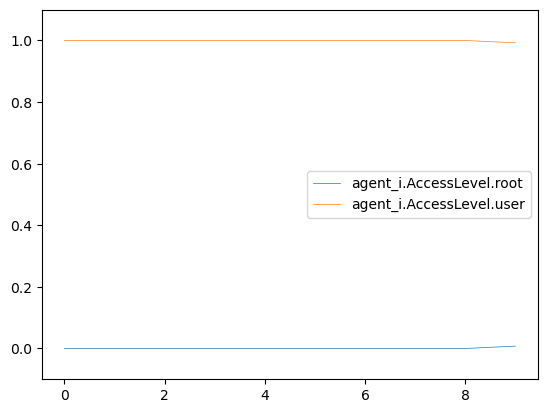

agent_j.AccessLevel.root  agent_j.AccessLevel.user agent_j.action  \
0                       0.0                       1.0      FileRecon   
1                       0.0                       1.0   EnumAccounts   
2                       0.0                       1.0     PrivEscAcc   
3                       0.0                       1.0     PrivEscAcc   
4                       0.0                       1.0     PrivEscAcc   
5                       0.0                       1.0      FileRecon   
6                       0.0                       1.0           Exit   
7                       0.0                       1.0            Nop   
8                       0.0                       1.0            Nop   
9                       0.0                       1.0            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                            auth                         none   
1   DecoyAccount                          denied                   user_files   
2   LockAccounts                          denied                   user_files   
3   LockAccounts                          denied                         none   
4   LockAccounts                          denied                         none   
5   LockAccounts                          denied                   user_files   
6   LockAccounts                          denied                   user_files   
7   LockAccounts                            auth                   user_files   
8            Nop                            auth                   user_files   
9            Nop                            auth                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                          active   
2                           failure                          active   
3                           success                          active   
4                           failure                          active   
5                           failure                          active   
6                           failure                      terminated   
7                           failure                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2               acc_policy_change  
3               acc_policy_change  
4               acc_policy_change  
5               acc_policy_change  
6                            none  
7                            none  
8                            none  
9                            none

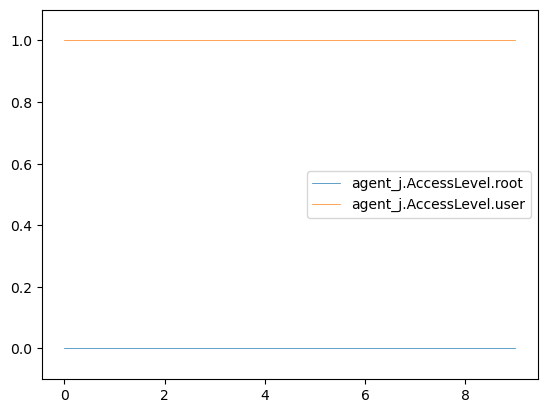

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes agent_i.action agent_j.action
0                   1.0                    0.0        LogIOCs      FileRecon
1                   1.0                    0.0   DecoyAccount   EnumAccounts
2                   0.0                    1.0   LockAccounts     PrivEscAcc
3                   0.0                    1.0   LockAccounts     PrivEscAcc
4                   0.0                    1.0   LockAccounts     PrivEscAcc
5                   0.0                    1.0   LockAccounts      FileRecon
6                   0.0                    1.0   LockAccounts           Exit
7                   0.0                    1.0   LockAccounts            Nop
8                   0.0                    1.0            Nop            Nop
9                   0.0                    1.0            Nop            Nop

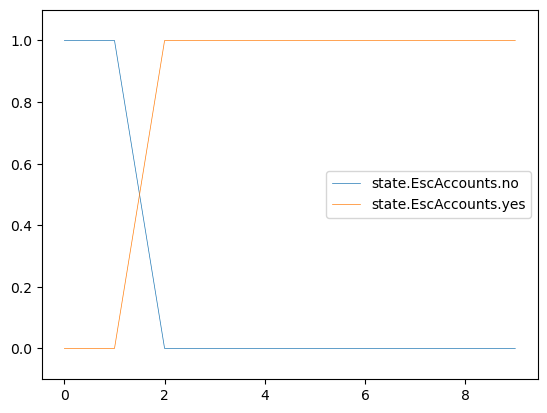

agent_i.EscAccounts.no  agent_i.EscAccounts.yes agent_i.action  \
0                     1.0                      0.0        LogIOCs   
1                     1.0                      0.0   DecoyAccount   
2                     0.0                      1.0   LockAccounts   
3                     0.0                      1.0   LockAccounts   
4                     0.0                      1.0   LockAccounts   
5                     0.0                      1.0   LockAccounts   
6                     0.0                      1.0   LockAccounts   
7                     0.0                      1.0   LockAccounts   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1   EnumAccounts                        file_enum  
2     PrivEscAcc                             none  
3     PrivEscAcc                   login_activity  
4     PrivEscAcc                   login_activity  
5      FileRecon                        file_enum  
6           Exit                             none  
7            Nop                             none  
8            Nop                             none  
9            Nop                        file_enum

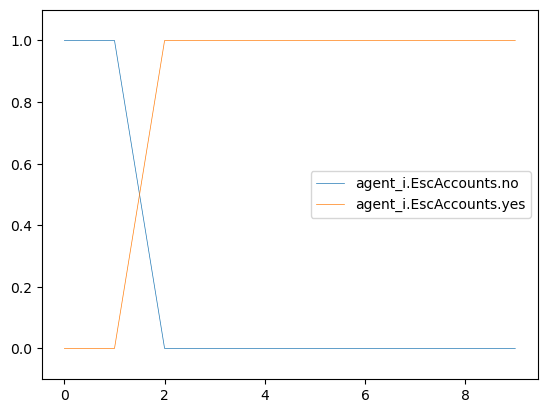

agent_j.EscAccounts.no  agent_j.EscAccounts.yes agent_j.action  \
0                0.500000                 0.500000      FileRecon   
1                0.500000                 0.500000   EnumAccounts   
2                0.083333                 0.916667     PrivEscAcc   
3                0.142857                 0.857143     PrivEscAcc   
4                0.193166                 0.806834     PrivEscAcc   
5                0.761834                 0.238165      FileRecon   
6                0.761834                 0.238165           Exit   
7                0.761835                 0.238165            Nop   
8                0.761834                 0.238165            Nop   
9                0.761835                 0.238165            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                            auth                         none   
1   DecoyAccount                          denied                   user_files   
2   LockAccounts                          denied                   user_files   
3   LockAccounts                          denied                         none   
4   LockAccounts                          denied                         none   
5   LockAccounts                          denied                   user_files   
6   LockAccounts                          denied                   user_files   
7   LockAccounts                            auth                   user_files   
8            Nop                            auth                   user_files   
9            Nop                            auth                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                          active   
2                           failure                          active   
3                           success                          active   
4                           failure                          active   
5                           failure                          active   
6                           failure                      terminated   
7                           failure                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2               acc_policy_change  
3               acc_policy_change  
4               acc_policy_change  
5               acc_policy_change  
6                            none  
7                            none  
8                            none  
9                            none

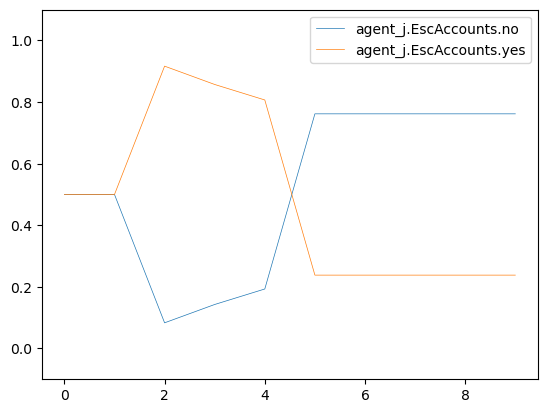

=============AccFound============


state.AccFound.no  state.AccFound.yes agent_i.action agent_j.action
0                1.0                 0.0        LogIOCs      FileRecon
1                1.0                 0.0   DecoyAccount   EnumAccounts
2                0.0                 1.0   LockAccounts     PrivEscAcc
3                0.0                 1.0   LockAccounts     PrivEscAcc
4                0.0                 1.0   LockAccounts     PrivEscAcc
5                0.0                 1.0   LockAccounts      FileRecon
6                0.0                 1.0   LockAccounts           Exit
7                0.0                 1.0   LockAccounts            Nop
8                0.0                 1.0            Nop            Nop
9                0.0                 1.0            Nop            Nop

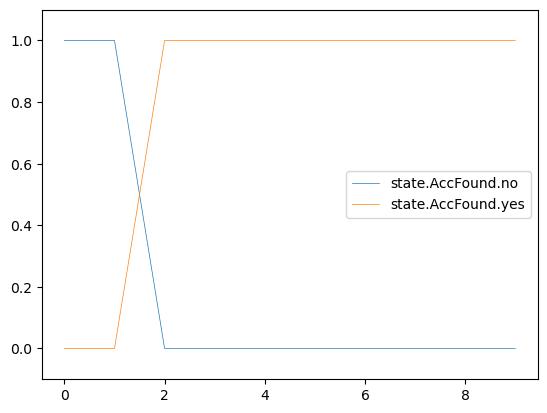

agent_i.AccFound.no  agent_i.AccFound.yes agent_i.action agent_j.action  \
0             1.000000              0.000000        LogIOCs      FileRecon   
1             1.000000              0.000000   DecoyAccount   EnumAccounts   
2             0.305224              0.694776   LockAccounts     PrivEscAcc   
3             0.201289              0.798711   LockAccounts     PrivEscAcc   
4             0.070439              0.929561   LockAccounts     PrivEscAcc   
5             0.047332              0.952668   LockAccounts      FileRecon   
6             0.039505              0.960495   LockAccounts           Exit   
7             0.048954              0.951046   LockAccounts            Nop   
8             0.055533              0.944467            Nop            Nop   
9             0.056898              0.943102            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                             none  
3                   login_activity  
4                   login_activity  
5                        file_enum  
6                             none  
7                             none  
8                             none  
9                        file_enum

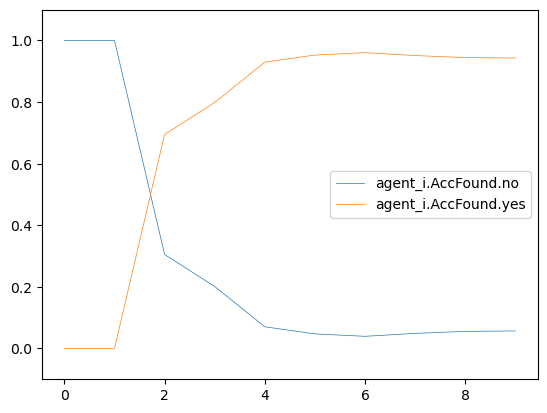

agent_j.AccFound.no  agent_j.AccFound.yes agent_j.action agent_i.action  \
0             1.000000              0.000000      FileRecon        LogIOCs   
1             1.000000              0.000000   EnumAccounts   DecoyAccount   
2             0.125000              0.875000     PrivEscAcc   LockAccounts   
3             0.190000              0.810000     PrivEscAcc   LockAccounts   
4             0.253553              0.746447     PrivEscAcc   LockAccounts   
5             1.000000              0.000000      FileRecon   LockAccounts   
6             1.000000              0.000000           Exit   LockAccounts   
7             1.000000              0.000000            Nop   LockAccounts   
8             1.000000              0.000000            Nop            Nop   
9             1.000000              0.000000            Nop            Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                            auth                         none   
1                          denied                   user_files   
2                          denied                   user_files   
3                          denied                         none   
4                          denied                         none   
5                          denied                   user_files   
6                          denied                   user_files   
7                            auth                   user_files   
8                            auth                   user_files   
9                            auth                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                          active   
2                           failure                          active   
3                           success                          active   
4                           failure                          active   
5                           failure                          active   
6                           failure                      terminated   
7                           failure                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2               acc_policy_change  
3               acc_policy_change  
4               acc_policy_change  
5               acc_policy_change  
6                            none  
7                            none  
8                            none  
9                            none

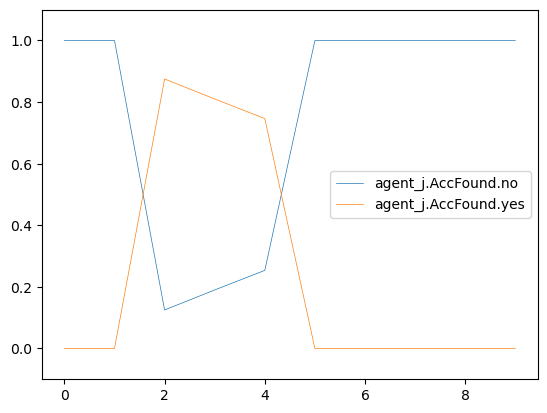

=============DataFound============


state.DataFound.no  state.DataFound.yes agent_i.action agent_j.action
0                 1.0                  0.0        LogIOCs      FileRecon
1                 1.0                  0.0   DecoyAccount   EnumAccounts
2                 1.0                  0.0   LockAccounts     PrivEscAcc
3                 1.0                  0.0   LockAccounts     PrivEscAcc
4                 1.0                  0.0   LockAccounts     PrivEscAcc
5                 1.0                  0.0   LockAccounts      FileRecon
6                 1.0                  0.0   LockAccounts           Exit
7                 1.0                  0.0   LockAccounts            Nop
8                 1.0                  0.0            Nop            Nop
9                 1.0                  0.0            Nop            Nop

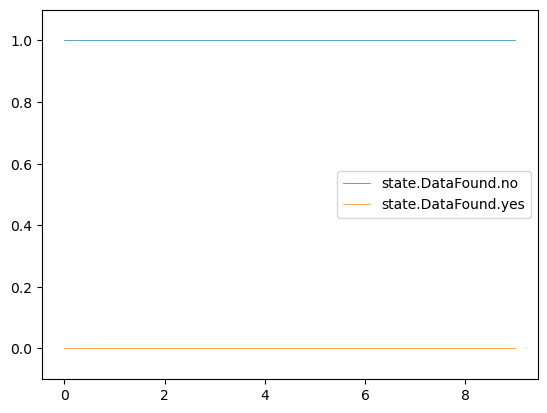

agent_i.DataFound.no  agent_i.DataFound.yes agent_i.action agent_j.action  \
0                   1.0                    0.0        LogIOCs      FileRecon   
1                   1.0                    0.0   DecoyAccount   EnumAccounts   
2                   1.0                    0.0   LockAccounts     PrivEscAcc   
3                   1.0                    0.0   LockAccounts     PrivEscAcc   
4                   1.0                    0.0   LockAccounts     PrivEscAcc   
5                   1.0                    0.0   LockAccounts      FileRecon   
6                   1.0                    0.0   LockAccounts           Exit   
7                   1.0                    0.0   LockAccounts            Nop   
8                   1.0                    0.0            Nop            Nop   
9                   1.0                    0.0            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                             none  
3                   login_activity  
4                   login_activity  
5                        file_enum  
6                             none  
7                             none  
8                             none  
9                        file_enum

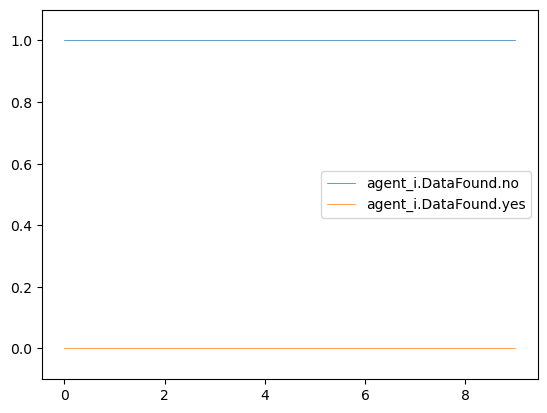

agent_j.DataFound.no  agent_j.DataFound.yes agent_j.action agent_i.action  \
0              1.000000               0.000000      FileRecon        LogIOCs   
1              0.954984               0.045016   EnumAccounts   DecoyAccount   
2              0.954984               0.045016     PrivEscAcc   LockAccounts   
3              0.954984               0.045016     PrivEscAcc   LockAccounts   
4              0.954984               0.045016     PrivEscAcc   LockAccounts   
5              0.954984               0.045016      FileRecon   LockAccounts   
6              1.000000               0.000000           Exit   LockAccounts   
7              1.000000               0.000000            Nop   LockAccounts   
8              1.000000               0.000000            Nop            Nop   
9              1.000000               0.000000            Nop            Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                            auth                         none   
1                          denied                   user_files   
2                          denied                   user_files   
3                          denied                         none   
4                          denied                         none   
5                          denied                   user_files   
6                          denied                   user_files   
7                            auth                   user_files   
8                            auth                   user_files   
9                            auth                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                          active   
2                           failure                          active   
3                           success                          active   
4                           failure                          active   
5                           failure                          active   
6                           failure                      terminated   
7                           failure                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2               acc_policy_change  
3               acc_policy_change  
4               acc_policy_change  
5               acc_policy_change  
6                            none  
7                            none  
8                            none  
9                            none

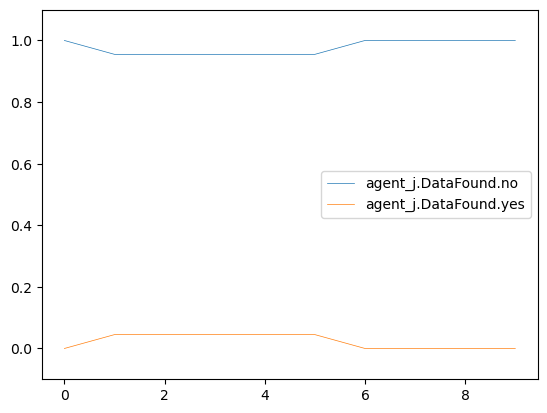

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes agent_i.action agent_j.action
0                    1.0                     0.0        LogIOCs      FileRecon
1                    1.0                     0.0   DecoyAccount   EnumAccounts
2                    1.0                     0.0   LockAccounts     PrivEscAcc
3                    1.0                     0.0   LockAccounts     PrivEscAcc
4                    1.0                     0.0   LockAccounts     PrivEscAcc
5                    1.0                     0.0   LockAccounts      FileRecon
6                    1.0                     0.0   LockAccounts           Exit
7                    1.0                     0.0   LockAccounts            Nop
8                    1.0                     0.0            Nop            Nop
9                    1.0                     0.0            Nop            Nop

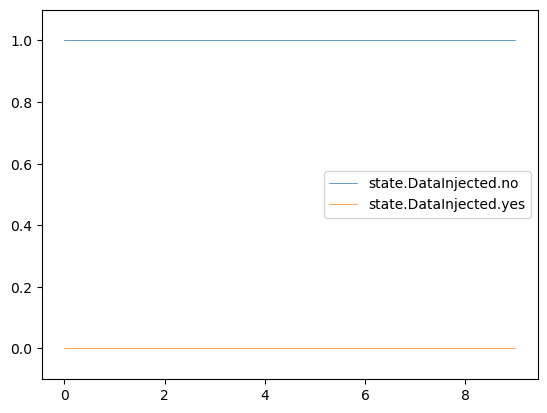

agent_i.DataInjected.no  agent_i.DataInjected.yes agent_i.action  \
0                      1.0                       0.0        LogIOCs   
1                      1.0                       0.0   DecoyAccount   
2                      1.0                       0.0   LockAccounts   
3                      1.0                       0.0   LockAccounts   
4                      1.0                       0.0   LockAccounts   
5                      1.0                       0.0   LockAccounts   
6                      1.0                       0.0   LockAccounts   
7                      1.0                       0.0   LockAccounts   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1   EnumAccounts                        file_enum  
2     PrivEscAcc                             none  
3     PrivEscAcc                   login_activity  
4     PrivEscAcc                   login_activity  
5      FileRecon                        file_enum  
6           Exit                             none  
7            Nop                             none  
8            Nop                             none  
9            Nop                        file_enum

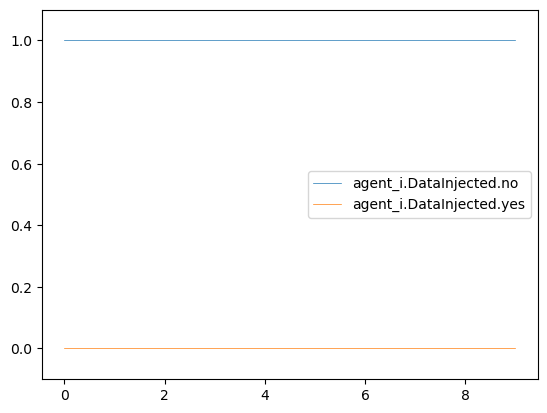

agent_j.DataInjected.no  agent_j.DataInjected.yes agent_j.action  \
0                      1.0                       0.0      FileRecon   
1                      1.0                       0.0   EnumAccounts   
2                      1.0                       0.0     PrivEscAcc   
3                      1.0                       0.0     PrivEscAcc   
4                      1.0                       0.0     PrivEscAcc   
5                      1.0                       0.0      FileRecon   
6                      1.0                       0.0           Exit   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                            auth                         none   
1   DecoyAccount                          denied                   user_files   
2   LockAccounts                          denied                   user_files   
3   LockAccounts                          denied                         none   
4   LockAccounts                          denied                         none   
5   LockAccounts                          denied                   user_files   
6   LockAccounts                          denied                   user_files   
7   LockAccounts                            auth                   user_files   
8            Nop                            auth                   user_files   
9            Nop                            auth                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                          active   
2                           failure                          active   
3                           success                          active   
4                           failure                          active   
5                           failure                          active   
6                           failure                      terminated   
7                           failure                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2               acc_policy_change  
3               acc_policy_change  
4               acc_policy_change  
5               acc_policy_change  
6                            none  
7                            none  
8                            none  
9                            none

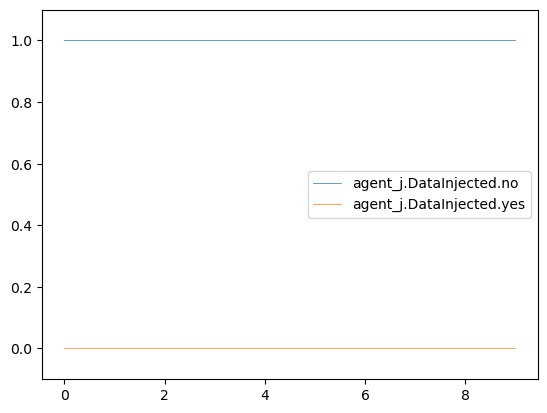

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes agent_i.action agent_j.action
0                   0.0                    1.0        LogIOCs      FileRecon
1                   0.0                    1.0   DecoyAccount   EnumAccounts
2                   0.0                    1.0   LockAccounts     PrivEscAcc
3                   0.0                    1.0   LockAccounts     PrivEscAcc
4                   0.0                    1.0   LockAccounts     PrivEscAcc
5                   0.0                    1.0   LockAccounts      FileRecon
6                   0.0                    1.0   LockAccounts           Exit
7                   0.0                    1.0   LockAccounts            Nop
8                   0.0                    1.0            Nop            Nop
9                   0.0                    1.0            Nop            Nop

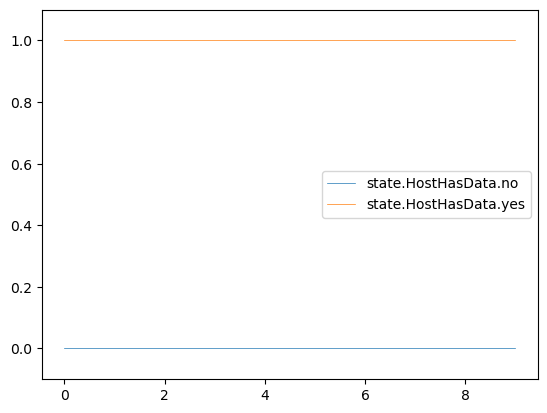

agent_i.HostHasData.no  agent_i.HostHasData.yes agent_i.action  \
0                     0.0                      1.0        LogIOCs   
1                     0.0                      1.0   DecoyAccount   
2                     0.0                      1.0   LockAccounts   
3                     0.0                      1.0   LockAccounts   
4                     0.0                      1.0   LockAccounts   
5                     0.0                      1.0   LockAccounts   
6                     0.0                      1.0   LockAccounts   
7                     0.0                      1.0   LockAccounts   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1   EnumAccounts                        file_enum  
2     PrivEscAcc                             none  
3     PrivEscAcc                   login_activity  
4     PrivEscAcc                   login_activity  
5      FileRecon                        file_enum  
6           Exit                             none  
7            Nop                             none  
8            Nop                             none  
9            Nop                        file_enum

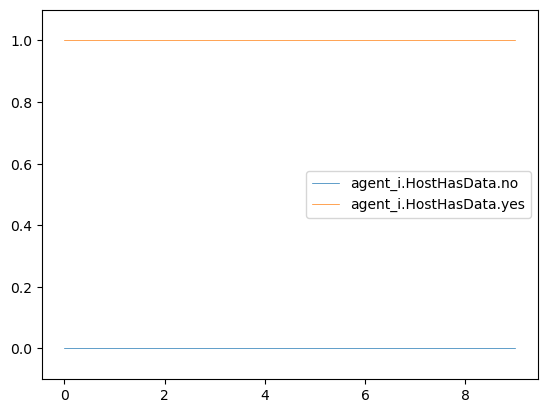

agent_j.HostHasData.no  agent_j.HostHasData.yes agent_j.action  \
0                0.500000                 0.500000      FileRecon   
1                0.578778                 0.421222   EnumAccounts   
2                0.578778                 0.421222     PrivEscAcc   
3                0.578778                 0.421222     PrivEscAcc   
4                0.578778                 0.421222     PrivEscAcc   
5                0.578778                 0.421222      FileRecon   
6                0.647249                 0.352751           Exit   
7                0.647249                 0.352751            Nop   
8                0.647249                 0.352751            Nop   
9                0.647249                 0.352751            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                            auth                         none   
1   DecoyAccount                          denied                   user_files   
2   LockAccounts                          denied                   user_files   
3   LockAccounts                          denied                         none   
4   LockAccounts                          denied                         none   
5   LockAccounts                          denied                   user_files   
6   LockAccounts                          denied                   user_files   
7   LockAccounts                            auth                   user_files   
8            Nop                            auth                   user_files   
9            Nop                            auth                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                          active   
2                           failure                          active   
3                           success                          active   
4                           failure                          active   
5                           failure                          active   
6                           failure                      terminated   
7                           failure                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2               acc_policy_change  
3               acc_policy_change  
4               acc_policy_change  
5               acc_policy_change  
6                            none  
7                            none  
8                            none  
9                            none

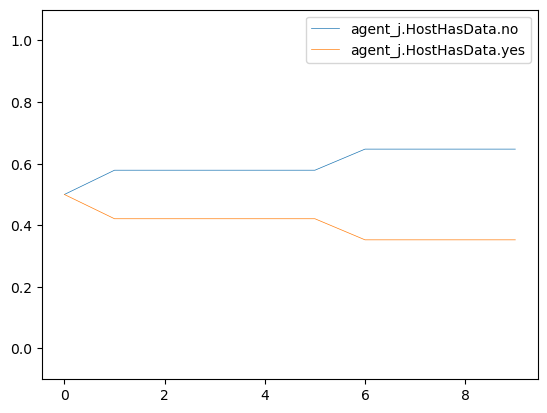

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user agent_i.action agent_j.action
0                   1.0                   0.0        LogIOCs      FileRecon
1                   1.0                   0.0   DecoyAccount   EnumAccounts
2                   1.0                   0.0   LockAccounts     PrivEscAcc
3                   1.0                   0.0   LockAccounts     PrivEscAcc
4                   1.0                   0.0   LockAccounts     PrivEscAcc
5                   1.0                   0.0   LockAccounts      FileRecon
6                   1.0                   0.0   LockAccounts           Exit
7                   1.0                   0.0   LockAccounts            Nop
8                   1.0                   0.0            Nop            Nop
9                   1.0                   0.0            Nop            Nop

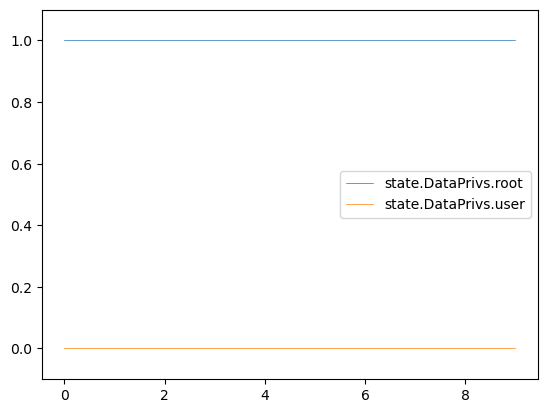

agent_i.DataPrivs.root  agent_i.DataPrivs.user agent_i.action  \
0                     1.0                     0.0        LogIOCs   
1                     1.0                     0.0   DecoyAccount   
2                     1.0                     0.0   LockAccounts   
3                     1.0                     0.0   LockAccounts   
4                     1.0                     0.0   LockAccounts   
5                     1.0                     0.0   LockAccounts   
6                     1.0                     0.0   LockAccounts   
7                     1.0                     0.0   LockAccounts   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1   EnumAccounts                        file_enum  
2     PrivEscAcc                             none  
3     PrivEscAcc                   login_activity  
4     PrivEscAcc                   login_activity  
5      FileRecon                        file_enum  
6           Exit                             none  
7            Nop                             none  
8            Nop                             none  
9            Nop                        file_enum

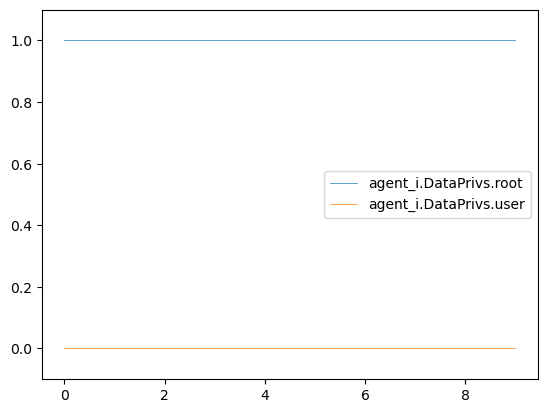

agent_j.DataPrivs.root  agent_j.DataPrivs.user agent_j.action  \
0                0.500000                0.500000      FileRecon   
1                0.578778                0.421222   EnumAccounts   
2                0.578778                0.421222     PrivEscAcc   
3                0.578778                0.421222     PrivEscAcc   
4                0.578778                0.421222     PrivEscAcc   
5                0.578778                0.421222      FileRecon   
6                0.647249                0.352751           Exit   
7                0.647249                0.352751            Nop   
8                0.647249                0.352751            Nop   
9                0.647249                0.352751            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                            auth                         none   
1   DecoyAccount                          denied                   user_files   
2   LockAccounts                          denied                   user_files   
3   LockAccounts                          denied                         none   
4   LockAccounts                          denied                         none   
5   LockAccounts                          denied                   user_files   
6   LockAccounts                          denied                   user_files   
7   LockAccounts                            auth                   user_files   
8            Nop                            auth                   user_files   
9            Nop                            auth                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                          active   
2                           failure                          active   
3                           success                          active   
4                           failure                          active   
5                           failure                          active   
6                           failure                      terminated   
7                           failure                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2               acc_policy_change  
3               acc_policy_change  
4               acc_policy_change  
5               acc_policy_change  
6                            none  
7                            none  
8                            none  
9                            none

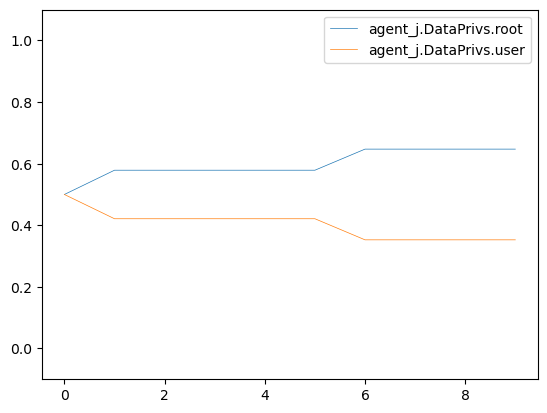

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot agent_i.action agent_j.action  
0                      1.0        LogIOCs      FileRecon  
1                      1.0   DecoyAccount   EnumAccounts  
2                      1.0   LockAccounts     PrivEscAcc  
3                      1.0   LockAccounts     PrivEscAcc  
4                      1.0   LockAccounts     PrivEscAcc  
5                      1.0   LockAccounts      FileRecon  
6                      1.0   LockAccounts           Exit  
7                      1.0   LockAccounts            Nop  
8                      1.0            Nop            Nop  
9                      1.0            Nop            Nop

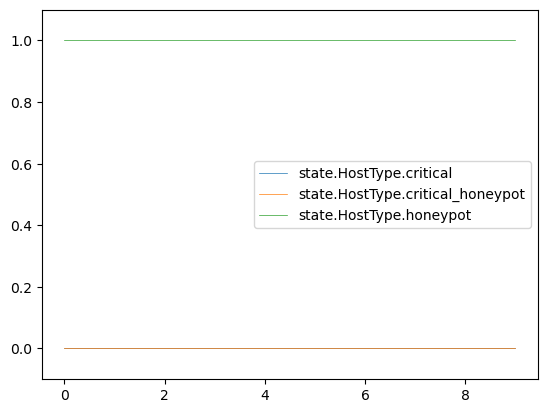

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot agent_i.action agent_j.action  \
0                        1.0        LogIOCs      FileRecon   
1                        1.0   DecoyAccount   EnumAccounts   
2                        1.0   LockAccounts     PrivEscAcc   
3                        1.0   LockAccounts     PrivEscAcc   
4                        1.0   LockAccounts     PrivEscAcc   
5                        1.0   LockAccounts      FileRecon   
6                        1.0   LockAccounts           Exit   
7                        1.0   LockAccounts            Nop   
8                        1.0            Nop            Nop   
9                        1.0            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                             none  
3                   login_activity  
4                   login_activity  
5                        file_enum  
6                             none  
7                             none  
8                             none  
9                        file_enum

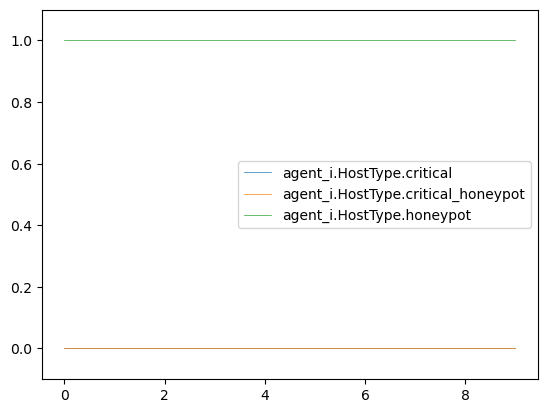

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_j.HostType.honeypot agent_j.action agent_i.action  \
0                        0.0      FileRecon        LogIOCs   
1                        0.0   EnumAccounts   DecoyAccount   
2                        0.0     PrivEscAcc   LockAccounts   
3                        0.0     PrivEscAcc   LockAccounts   
4                        0.0     PrivEscAcc   LockAccounts   
5                        0.0      FileRecon   LockAccounts   
6                        0.0           Exit   LockAccounts   
7                        0.0            Nop   LockAccounts   
8                        0.0            Nop            Nop   
9                        0.0            Nop            Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                            auth                         none   
1                          denied                   user_files   
2                          denied                   user_files   
3                          denied                         none   
4                          denied                         none   
5                          denied                   user_files   
6                          denied                   user_files   
7                            auth                   user_files   
8                            auth                   user_files   
9                            auth                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                          active   
2                           failure                          active   
3                           success                          active   
4                           failure                          active   
5                           failure                          active   
6                           failure                      terminated   
7                           failure                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2               acc_policy_change  
3               acc_policy_change  
4               acc_policy_change  
5               acc_policy_change  
6                            none  
7                            none  
8                            none  
9                            none

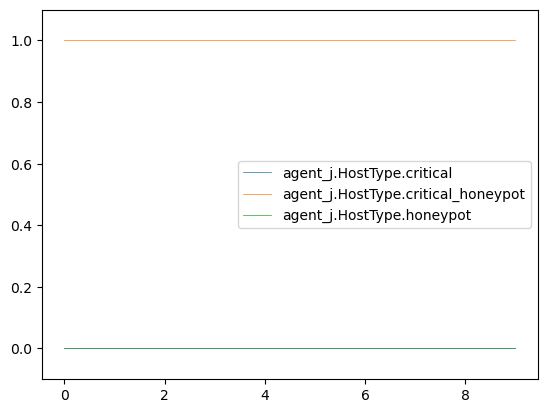

=============AttActive============


state.AttActive.no  state.AttActive.yes agent_i.action agent_j.action
0                 0.0                  1.0        LogIOCs      FileRecon
1                 0.0                  1.0   DecoyAccount   EnumAccounts
2                 0.0                  1.0   LockAccounts     PrivEscAcc
3                 0.0                  1.0   LockAccounts     PrivEscAcc
4                 0.0                  1.0   LockAccounts     PrivEscAcc
5                 0.0                  1.0   LockAccounts      FileRecon
6                 0.0                  1.0   LockAccounts           Exit
7                 1.0                  0.0   LockAccounts            Nop
8                 1.0                  0.0            Nop            Nop
9                 1.0                  0.0            Nop            Nop

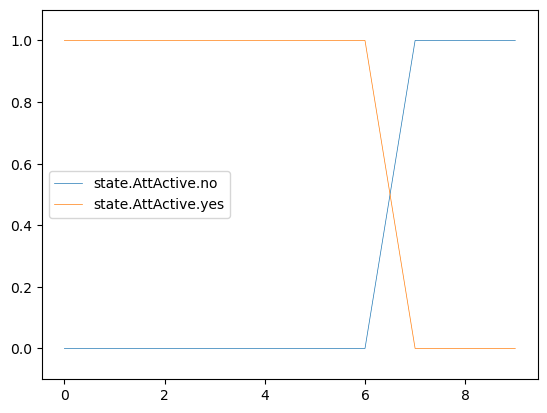

agent_i.AttActive.no  agent_i.AttActive.yes agent_i.action agent_j.action  \
0              0.000000               1.000000        LogIOCs      FileRecon   
1              0.000000               1.000000   DecoyAccount   EnumAccounts   
2              0.000000               1.000000   LockAccounts     PrivEscAcc   
3              0.000026               0.999974   LockAccounts     PrivEscAcc   
4              0.024886               0.975113   LockAccounts     PrivEscAcc   
5              0.005860               0.994140   LockAccounts      FileRecon   
6              0.010118               0.989882   LockAccounts           Exit   
7              0.660511               0.339489   LockAccounts            Nop   
8              0.938754               0.061246            Nop            Nop   
9              0.991282               0.008718            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                             none  
3                   login_activity  
4                   login_activity  
5                        file_enum  
6                             none  
7                             none  
8                             none  
9                        file_enum

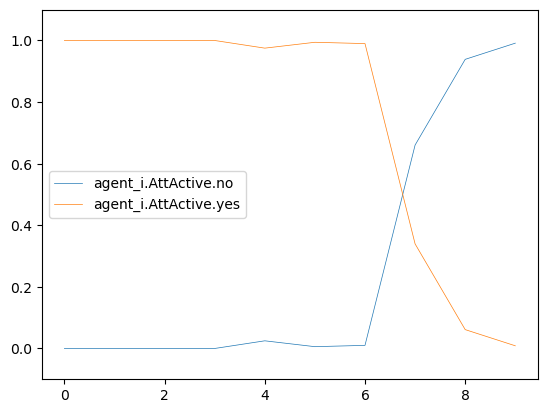

agent_j.AttActive.no  agent_j.AttActive.yes agent_j.action agent_i.action  \
0                   0.0                    1.0      FileRecon        LogIOCs   
1                   0.0                    1.0   EnumAccounts   DecoyAccount   
2                   0.0                    1.0     PrivEscAcc   LockAccounts   
3                   0.0                    1.0     PrivEscAcc   LockAccounts   
4                   0.0                    1.0     PrivEscAcc   LockAccounts   
5                   0.0                    1.0      FileRecon   LockAccounts   
6                   0.0                    1.0           Exit   LockAccounts   
7                   1.0                    0.0            Nop   LockAccounts   
8                   1.0                    0.0            Nop            Nop   
9                   1.0                    0.0            Nop            Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                            auth                         none   
1                          denied                   user_files   
2                          denied                   user_files   
3                          denied                         none   
4                          denied                         none   
5                          denied                   user_files   
6                          denied                   user_files   
7                            auth                   user_files   
8                            auth                   user_files   
9                            auth                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                          active   
2                           failure                          active   
3                           success                          active   
4                           failure                          active   
5                           failure                          active   
6                           failure                      terminated   
7                           failure                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2               acc_policy_change  
3               acc_policy_change  
4               acc_policy_change  
5               acc_policy_change  
6                            none  
7                            none  
8                            none  
9                            none

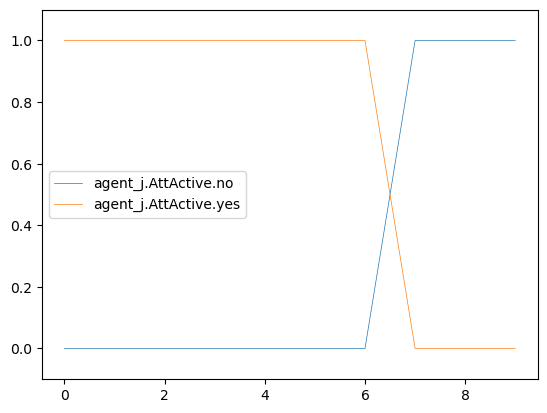

=============IOCsLogged============


state.IOCsLogged.no  state.IOCsLogged.yes agent_i.action agent_j.action
0                  1.0                   0.0        LogIOCs      FileRecon
1                  0.0                   1.0   DecoyAccount   EnumAccounts
2                  0.0                   1.0   LockAccounts     PrivEscAcc
3                  0.0                   1.0   LockAccounts     PrivEscAcc
4                  0.0                   1.0   LockAccounts     PrivEscAcc
5                  0.0                   1.0   LockAccounts      FileRecon
6                  0.0                   1.0   LockAccounts           Exit
7                  0.0                   1.0   LockAccounts            Nop
8                  0.0                   1.0            Nop            Nop
9                  0.0                   1.0            Nop            Nop

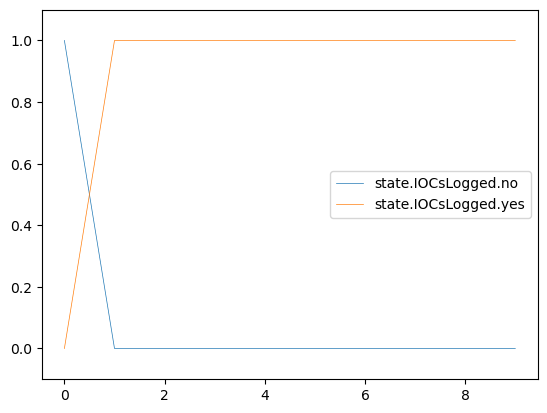

agent_i.IOCsLogged.no  agent_i.IOCsLogged.yes agent_i.action  \
0                    1.0                     0.0        LogIOCs   
1                    0.0                     1.0   DecoyAccount   
2                    0.0                     1.0   LockAccounts   
3                    0.0                     1.0   LockAccounts   
4                    0.0                     1.0   LockAccounts   
5                    0.0                     1.0   LockAccounts   
6                    0.0                     1.0   LockAccounts   
7                    0.0                     1.0   LockAccounts   
8                    0.0                     1.0            Nop   
9                    0.0                     1.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1   EnumAccounts                        file_enum  
2     PrivEscAcc                             none  
3     PrivEscAcc                   login_activity  
4     PrivEscAcc                   login_activity  
5      FileRecon                        file_enum  
6           Exit                             none  
7            Nop                             none  
8            Nop                             none  
9            Nop                        file_enum

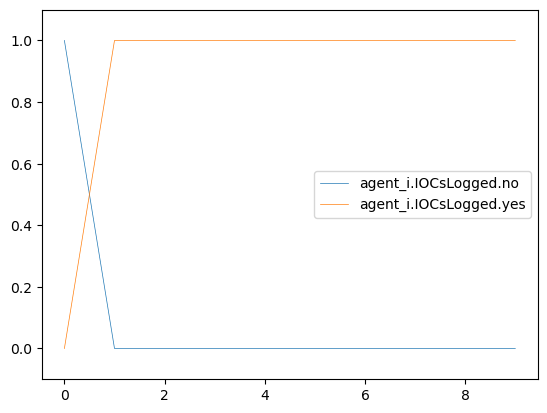

agent_j.IOCsLogged.no  agent_j.IOCsLogged.yes agent_j.action  \
0               1.000000                0.000000      FileRecon   
1               0.750000                0.250000   EnumAccounts   
2               0.633333                0.366667     PrivEscAcc   
3               0.995714                0.004286     PrivEscAcc   
4               0.997562                0.002438     PrivEscAcc   
5               0.990385                0.009615      FileRecon   
6               0.990385                0.009615           Exit   
7               0.990385                0.009615            Nop   
8               0.990385                0.009615            Nop   
9               0.990385                0.009615            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                            auth                         none   
1   DecoyAccount                          denied                   user_files   
2   LockAccounts                          denied                   user_files   
3   LockAccounts                          denied                         none   
4   LockAccounts                          denied                         none   
5   LockAccounts                          denied                   user_files   
6   LockAccounts                          denied                   user_files   
7   LockAccounts                            auth                   user_files   
8            Nop                            auth                   user_files   
9            Nop                            auth                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                          active   
2                           failure                          active   
3                           success                          active   
4                           failure                          active   
5                           failure                          active   
6                           failure                      terminated   
7                           failure                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2               acc_policy_change  
3               acc_policy_change  
4               acc_policy_change  
5               acc_policy_change  
6                            none  
7                            none  
8                            none  
9                            none

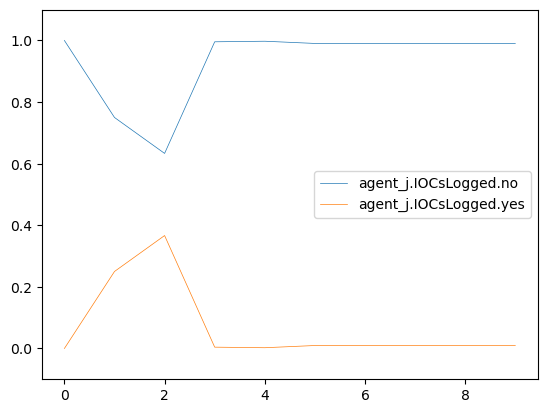

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                       file_write
1                               1.0                   login_activity
2                               1.0                   login_activity
3                               1.0                       file_write
4                               1.0                   login_activity
5                               1.0                             none
6                               1.0                        file_enum
7                               1.0                             none
8                               1.0                             none
9                               1.0                             none

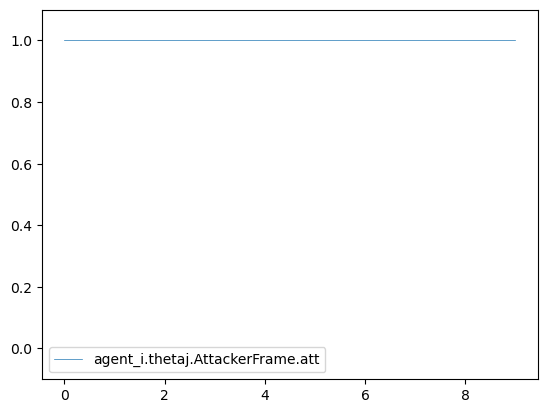

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.500000                        0.500000   
2                         0.500000                        0.500000   
3                         0.907990                        0.092010   
4                         0.992582                        0.007418   
5                         0.992546                        0.007454   
6                         0.992546                        0.007454   
7                         0.992546                        0.007454   
8                         0.992546                        0.007454   
9                         0.992546                        0.007454   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                            auth                         none   
1                          denied                   user_files   
2                          denied                         none   
3                            auth                         none   
4                          denied                   user_files   
5                            auth                   user_files   
6                            auth                         none   
7                          denied                   user_files   
8                          denied                         none   
9                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           success                          active   
1                           failure                          active   
2                           success                          active   
3                           failure                          active   
4                           failure                          active   
5                           success                      terminated   
6                           success                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2               acc_policy_change  
3               acc_policy_change  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

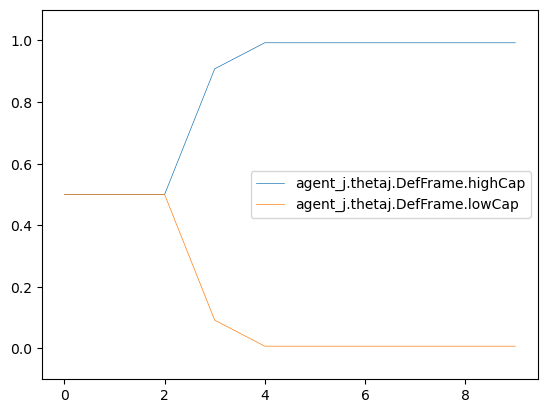

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user agent_i.action  \
0                     0.0                     1.0        LogIOCs   
1                     0.0                     1.0   DecoyAccount   
2                     0.0                     1.0   LockAccounts   
3                     0.0                     1.0   LockAccounts   
4                     0.0                     1.0   LockAccounts   
5                     0.0                     1.0   LockAccounts   
6                     0.0                     1.0   LockAccounts   
7                     0.0                     1.0   LockAccounts   
8                     0.0                     1.0   LockAccounts   
9                     0.0                     1.0            Nop   

   agent_j.action  
0       FileRecon  
1  ManipulateData  
2    EnumAccounts  
3       FileRecon  
4      PrivEscAcc  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

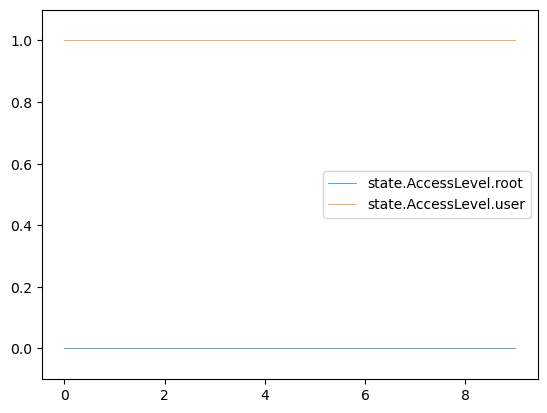

agent_i.AccessLevel.root  agent_i.AccessLevel.user agent_i.action  \
0                       0.0                       1.0        LogIOCs   
1                       0.0                       1.0   DecoyAccount   
2                       0.0                       1.0   LockAccounts   
3                       0.0                       1.0   LockAccounts   
4                       0.0                       1.0   LockAccounts   
5                       0.0                       1.0   LockAccounts   
6                       0.0                       1.0   LockAccounts   
7                       0.0                       1.0   LockAccounts   
8                       0.0                       1.0   LockAccounts   
9                       0.0                       1.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                       file_write  
1  ManipulateData                   login_activity  
2    EnumAccounts                   login_activity  
3       FileRecon                       file_write  
4      PrivEscAcc                   login_activity  
5            Exit                             none  
6             Nop                        file_enum  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

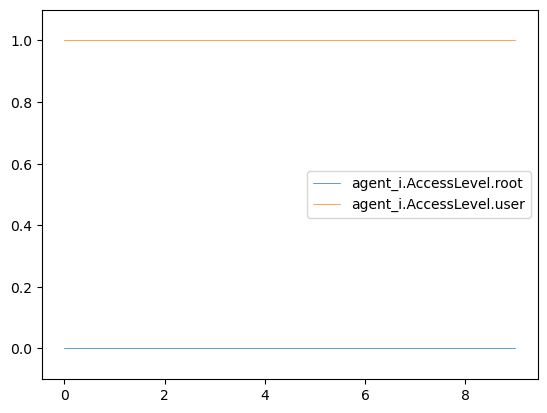

agent_j.AccessLevel.root  agent_j.AccessLevel.user  agent_j.action  \
0                       0.0                       1.0       FileRecon   
1                       0.0                       1.0  ManipulateData   
2                       0.0                       1.0    EnumAccounts   
3                       0.0                       1.0       FileRecon   
4                       0.0                       1.0      PrivEscAcc   
5                       0.0                       1.0            Exit   
6                       0.0                       1.0             Nop   
7                       0.0                       1.0             Nop   
8                       0.0                       1.0             Nop   
9                       0.0                       1.0             Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                            auth                         none   
1   DecoyAccount                          denied                   user_files   
2   LockAccounts                          denied                         none   
3   LockAccounts                            auth                         none   
4   LockAccounts                          denied                   user_files   
5   LockAccounts                            auth                   user_files   
6   LockAccounts                            auth                         none   
7   LockAccounts                          denied                   user_files   
8   LockAccounts                          denied                         none   
9            Nop                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           success                          active   
1                           failure                          active   
2                           success                          active   
3                           failure                          active   
4                           failure                          active   
5                           success                      terminated   
6                           success                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2               acc_policy_change  
3               acc_policy_change  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

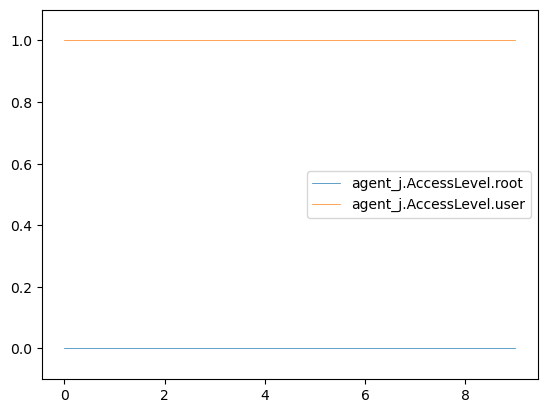

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes agent_i.action  agent_j.action
0                   1.0                    0.0        LogIOCs       FileRecon
1                   1.0                    0.0   DecoyAccount  ManipulateData
2                   0.0                    1.0   LockAccounts    EnumAccounts
3                   0.0                    1.0   LockAccounts       FileRecon
4                   0.0                    1.0   LockAccounts      PrivEscAcc
5                   0.0                    1.0   LockAccounts            Exit
6                   0.0                    1.0   LockAccounts             Nop
7                   0.0                    1.0   LockAccounts             Nop
8                   0.0                    1.0   LockAccounts             Nop
9                   0.0                    1.0            Nop             Nop

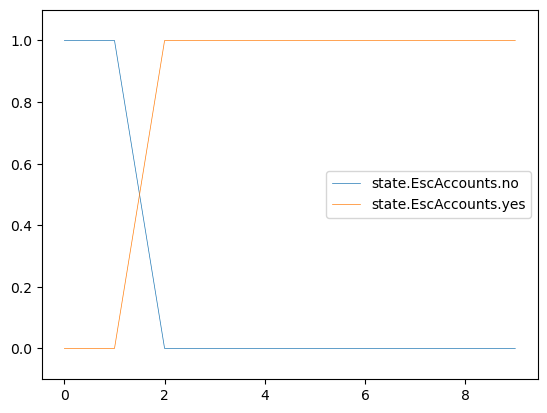

agent_i.EscAccounts.no  agent_i.EscAccounts.yes agent_i.action  \
0                     1.0                      0.0        LogIOCs   
1                     1.0                      0.0   DecoyAccount   
2                     0.0                      1.0   LockAccounts   
3                     0.0                      1.0   LockAccounts   
4                     0.0                      1.0   LockAccounts   
5                     0.0                      1.0   LockAccounts   
6                     0.0                      1.0   LockAccounts   
7                     0.0                      1.0   LockAccounts   
8                     0.0                      1.0   LockAccounts   
9                     0.0                      1.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                       file_write  
1  ManipulateData                   login_activity  
2    EnumAccounts                   login_activity  
3       FileRecon                       file_write  
4      PrivEscAcc                   login_activity  
5            Exit                             none  
6             Nop                        file_enum  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

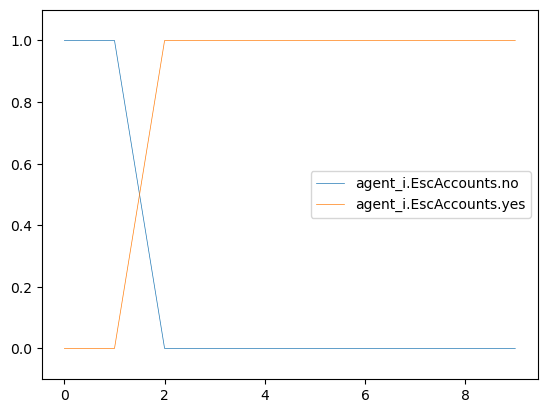

agent_j.EscAccounts.no  agent_j.EscAccounts.yes  agent_j.action  \
0                0.500000                 0.500000       FileRecon   
1                0.500000                 0.500000  ManipulateData   
2                0.375000                 0.625000    EnumAccounts   
3                0.121065                 0.878935       FileRecon   
4                0.130731                 0.869269      PrivEscAcc   
5                0.767907                 0.232092            Exit   
6                0.767908                 0.232092             Nop   
7                0.767907                 0.232092             Nop   
8                0.767908                 0.232092             Nop   
9                0.767907                 0.232092             Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                            auth                         none   
1   DecoyAccount                          denied                   user_files   
2   LockAccounts                          denied                         none   
3   LockAccounts                            auth                         none   
4   LockAccounts                          denied                   user_files   
5   LockAccounts                            auth                   user_files   
6   LockAccounts                            auth                         none   
7   LockAccounts                          denied                   user_files   
8   LockAccounts                          denied                         none   
9            Nop                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           success                          active   
1                           failure                          active   
2                           success                          active   
3                           failure                          active   
4                           failure                          active   
5                           success                      terminated   
6                           success                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2               acc_policy_change  
3               acc_policy_change  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

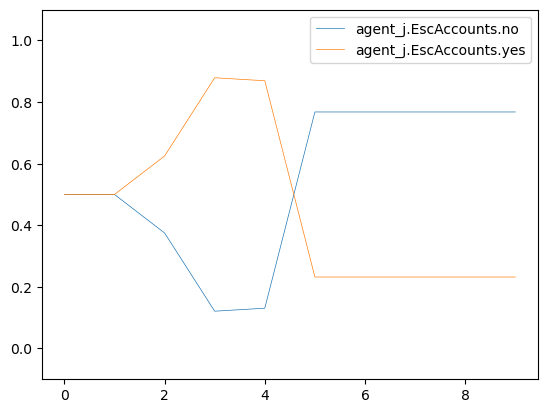

=============AccFound============


state.AccFound.no  state.AccFound.yes agent_i.action  agent_j.action
0                1.0                 0.0        LogIOCs       FileRecon
1                1.0                 0.0   DecoyAccount  ManipulateData
2                1.0                 0.0   LockAccounts    EnumAccounts
3                0.0                 1.0   LockAccounts       FileRecon
4                0.0                 1.0   LockAccounts      PrivEscAcc
5                0.0                 1.0   LockAccounts            Exit
6                0.0                 1.0   LockAccounts             Nop
7                0.0                 1.0   LockAccounts             Nop
8                0.0                 1.0   LockAccounts             Nop
9                0.0                 1.0            Nop             Nop

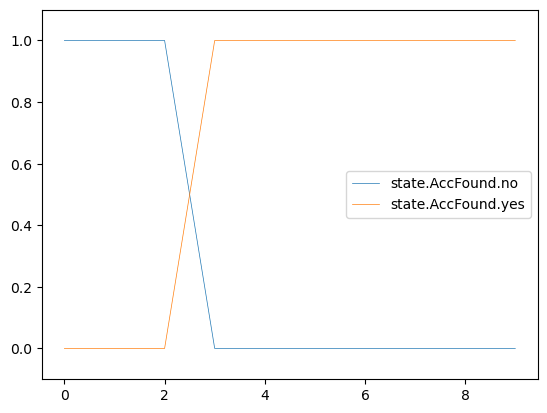

agent_i.AccFound.no  agent_i.AccFound.yes agent_i.action  agent_j.action  \
0             1.000000              0.000000        LogIOCs       FileRecon   
1             1.000000              0.000000   DecoyAccount  ManipulateData   
2             0.335000              0.665000   LockAccounts    EnumAccounts   
3             0.079067              0.920933   LockAccounts       FileRecon   
4             0.082564              0.917436   LockAccounts      PrivEscAcc   
5             0.049207              0.950793   LockAccounts            Exit   
6             0.080450              0.919550   LockAccounts             Nop   
7             0.063923              0.936077   LockAccounts             Nop   
8             0.105944              0.894056   LockAccounts             Nop   
9             0.122932              0.877068            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                       file_write  
1                   login_activity  
2                   login_activity  
3                       file_write  
4                   login_activity  
5                             none  
6                        file_enum  
7                             none  
8                             none  
9                             none

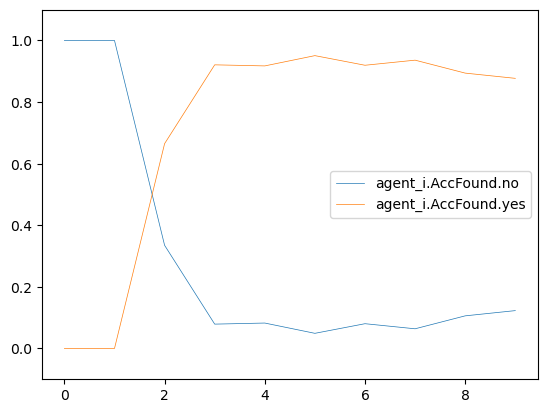

agent_j.AccFound.no  agent_j.AccFound.yes  agent_j.action agent_i.action  \
0             1.000000              0.000000       FileRecon        LogIOCs   
1             1.000000              0.000000  ManipulateData   DecoyAccount   
2             1.000000              0.000000    EnumAccounts   LockAccounts   
3             0.161017              0.838983       FileRecon   LockAccounts   
4             0.170243              0.829757      PrivEscAcc   LockAccounts   
5             1.000000              0.000000            Exit   LockAccounts   
6             1.000000              0.000000             Nop   LockAccounts   
7             1.000000              0.000000             Nop   LockAccounts   
8             1.000000              0.000000             Nop   LockAccounts   
9             1.000000              0.000000             Nop            Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                            auth                         none   
1                          denied                   user_files   
2                          denied                         none   
3                            auth                         none   
4                          denied                   user_files   
5                            auth                   user_files   
6                            auth                         none   
7                          denied                   user_files   
8                          denied                         none   
9                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           success                          active   
1                           failure                          active   
2                           success                          active   
3                           failure                          active   
4                           failure                          active   
5                           success                      terminated   
6                           success                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2               acc_policy_change  
3               acc_policy_change  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

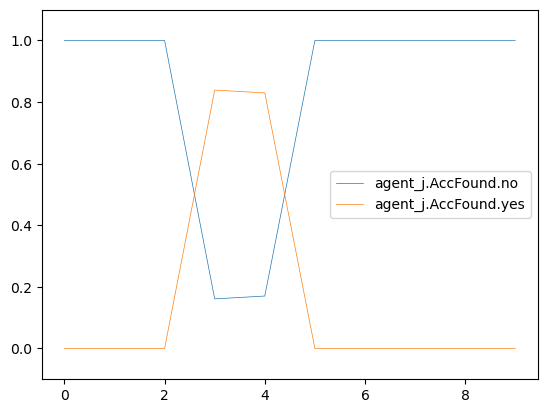

=============DataFound============


state.DataFound.no  state.DataFound.yes agent_i.action  agent_j.action
0                 1.0                  0.0        LogIOCs       FileRecon
1                 1.0                  0.0   DecoyAccount  ManipulateData
2                 1.0                  0.0   LockAccounts    EnumAccounts
3                 1.0                  0.0   LockAccounts       FileRecon
4                 1.0                  0.0   LockAccounts      PrivEscAcc
5                 1.0                  0.0   LockAccounts            Exit
6                 1.0                  0.0   LockAccounts             Nop
7                 1.0                  0.0   LockAccounts             Nop
8                 1.0                  0.0   LockAccounts             Nop
9                 1.0                  0.0            Nop             Nop

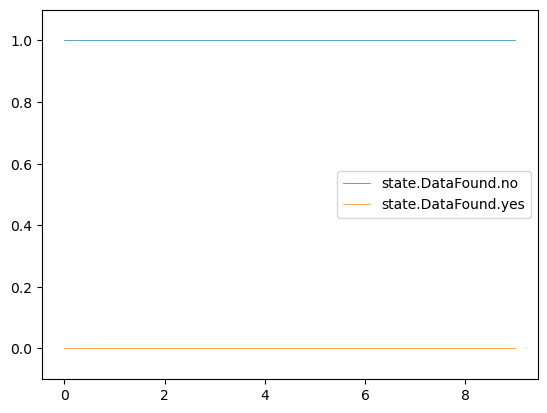

agent_i.DataFound.no  agent_i.DataFound.yes agent_i.action  agent_j.action  \
0                   1.0                    0.0        LogIOCs       FileRecon   
1                   1.0                    0.0   DecoyAccount  ManipulateData   
2                   1.0                    0.0   LockAccounts    EnumAccounts   
3                   1.0                    0.0   LockAccounts       FileRecon   
4                   1.0                    0.0   LockAccounts      PrivEscAcc   
5                   1.0                    0.0   LockAccounts            Exit   
6                   1.0                    0.0   LockAccounts             Nop   
7                   1.0                    0.0   LockAccounts             Nop   
8                   1.0                    0.0   LockAccounts             Nop   
9                   1.0                    0.0            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                       file_write  
1                   login_activity  
2                   login_activity  
3                       file_write  
4                   login_activity  
5                             none  
6                        file_enum  
7                             none  
8                             none  
9                             none

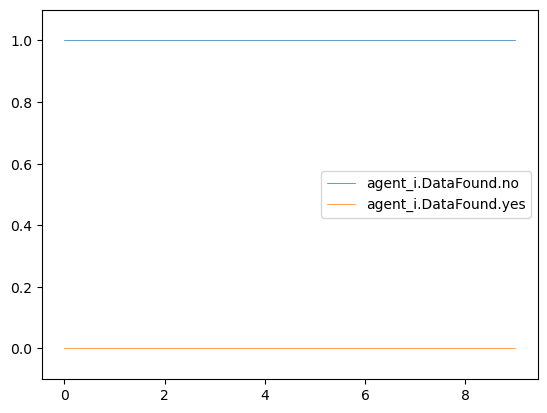

agent_j.DataFound.no  agent_j.DataFound.yes  agent_j.action agent_i.action  \
0              1.000000               0.000000       FileRecon        LogIOCs   
1              0.207547               0.792453  ManipulateData   DecoyAccount   
2              1.000000               0.000000    EnumAccounts   LockAccounts   
3              1.000000               0.000000       FileRecon   LockAccounts   
4              0.985122               0.014878      PrivEscAcc   LockAccounts   
5              0.985122               0.014878            Exit   LockAccounts   
6              0.985122               0.014878             Nop   LockAccounts   
7              0.985122               0.014878             Nop   LockAccounts   
8              0.985122               0.014878             Nop   LockAccounts   
9              0.985122               0.014878             Nop            Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                            auth                         none   
1                          denied                   user_files   
2                          denied                         none   
3                            auth                         none   
4                          denied                   user_files   
5                            auth                   user_files   
6                            auth                         none   
7                          denied                   user_files   
8                          denied                         none   
9                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           success                          active   
1                           failure                          active   
2                           success                          active   
3                           failure                          active   
4                           failure                          active   
5                           success                      terminated   
6                           success                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2               acc_policy_change  
3               acc_policy_change  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

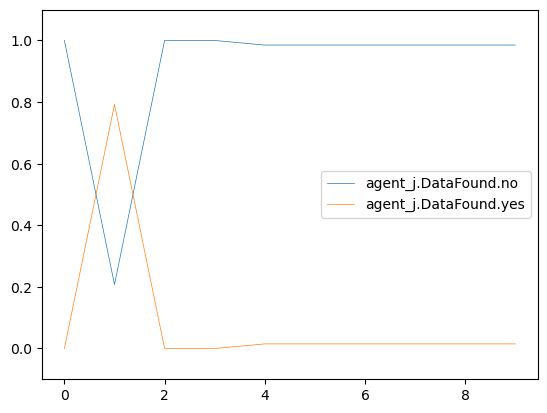

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes agent_i.action  \
0                    1.0                     0.0        LogIOCs   
1                    1.0                     0.0   DecoyAccount   
2                    1.0                     0.0   LockAccounts   
3                    1.0                     0.0   LockAccounts   
4                    1.0                     0.0   LockAccounts   
5                    1.0                     0.0   LockAccounts   
6                    1.0                     0.0   LockAccounts   
7                    1.0                     0.0   LockAccounts   
8                    1.0                     0.0   LockAccounts   
9                    1.0                     0.0            Nop   

   agent_j.action  
0       FileRecon  
1  ManipulateData  
2    EnumAccounts  
3       FileRecon  
4      PrivEscAcc  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

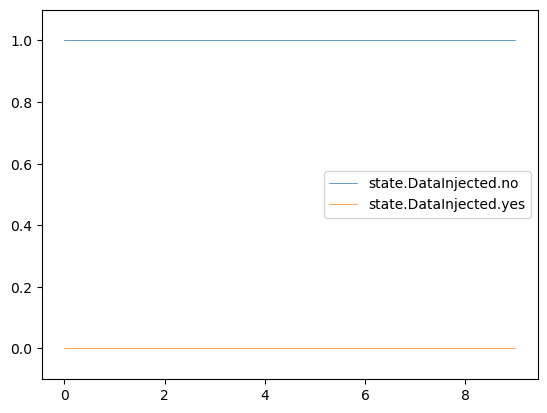

agent_i.DataInjected.no  agent_i.DataInjected.yes agent_i.action  \
0                      1.0                       0.0        LogIOCs   
1                      1.0                       0.0   DecoyAccount   
2                      1.0                       0.0   LockAccounts   
3                      1.0                       0.0   LockAccounts   
4                      1.0                       0.0   LockAccounts   
5                      1.0                       0.0   LockAccounts   
6                      1.0                       0.0   LockAccounts   
7                      1.0                       0.0   LockAccounts   
8                      1.0                       0.0   LockAccounts   
9                      1.0                       0.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                       file_write  
1  ManipulateData                   login_activity  
2    EnumAccounts                   login_activity  
3       FileRecon                       file_write  
4      PrivEscAcc                   login_activity  
5            Exit                             none  
6             Nop                        file_enum  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

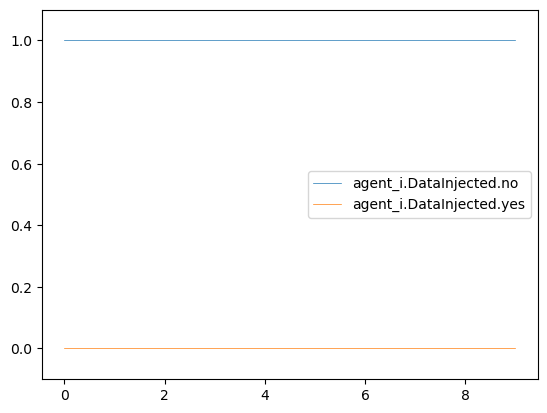

agent_j.DataInjected.no  agent_j.DataInjected.yes  agent_j.action  \
0                      1.0                       0.0       FileRecon   
1                      1.0                       0.0  ManipulateData   
2                      1.0                       0.0    EnumAccounts   
3                      1.0                       0.0       FileRecon   
4                      1.0                       0.0      PrivEscAcc   
5                      1.0                       0.0            Exit   
6                      1.0                       0.0             Nop   
7                      1.0                       0.0             Nop   
8                      1.0                       0.0             Nop   
9                      1.0                       0.0             Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                            auth                         none   
1   DecoyAccount                          denied                   user_files   
2   LockAccounts                          denied                         none   
3   LockAccounts                            auth                         none   
4   LockAccounts                          denied                   user_files   
5   LockAccounts                            auth                   user_files   
6   LockAccounts                            auth                         none   
7   LockAccounts                          denied                   user_files   
8   LockAccounts                          denied                         none   
9            Nop                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           success                          active   
1                           failure                          active   
2                           success                          active   
3                           failure                          active   
4                           failure                          active   
5                           success                      terminated   
6                           success                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2               acc_policy_change  
3               acc_policy_change  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

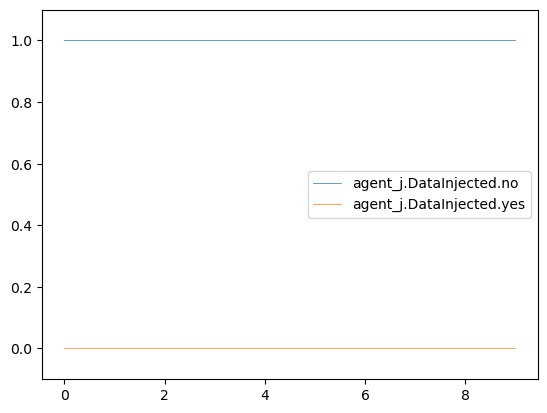

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes agent_i.action  agent_j.action
0                   0.0                    1.0        LogIOCs       FileRecon
1                   0.0                    1.0   DecoyAccount  ManipulateData
2                   0.0                    1.0   LockAccounts    EnumAccounts
3                   0.0                    1.0   LockAccounts       FileRecon
4                   0.0                    1.0   LockAccounts      PrivEscAcc
5                   0.0                    1.0   LockAccounts            Exit
6                   0.0                    1.0   LockAccounts             Nop
7                   0.0                    1.0   LockAccounts             Nop
8                   0.0                    1.0   LockAccounts             Nop
9                   0.0                    1.0            Nop             Nop

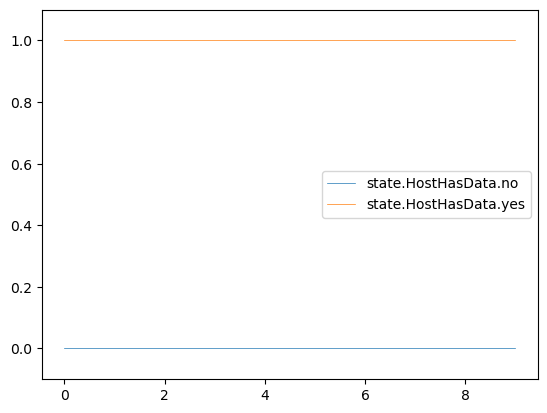

agent_i.HostHasData.no  agent_i.HostHasData.yes agent_i.action  \
0                     0.0                      1.0        LogIOCs   
1                     0.0                      1.0   DecoyAccount   
2                     0.0                      1.0   LockAccounts   
3                     0.0                      1.0   LockAccounts   
4                     0.0                      1.0   LockAccounts   
5                     0.0                      1.0   LockAccounts   
6                     0.0                      1.0   LockAccounts   
7                     0.0                      1.0   LockAccounts   
8                     0.0                      1.0   LockAccounts   
9                     0.0                      1.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                       file_write  
1  ManipulateData                   login_activity  
2    EnumAccounts                   login_activity  
3       FileRecon                       file_write  
4      PrivEscAcc                   login_activity  
5            Exit                             none  
6             Nop                        file_enum  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

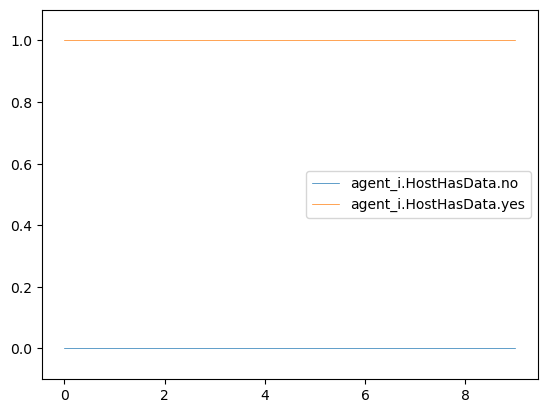

agent_j.HostHasData.no  agent_j.HostHasData.yes  agent_j.action  \
0                0.500000                 0.500000       FileRecon   
1                0.125786                 0.874214  ManipulateData   
2                0.606061                 0.393939    EnumAccounts   
3                0.606061                 0.393939       FileRecon   
4                0.637620                 0.362380      PrivEscAcc   
5                0.637620                 0.362380            Exit   
6                0.637620                 0.362380             Nop   
7                0.637620                 0.362380             Nop   
8                0.637620                 0.362380             Nop   
9                0.637620                 0.362380             Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                            auth                         none   
1   DecoyAccount                          denied                   user_files   
2   LockAccounts                          denied                         none   
3   LockAccounts                            auth                         none   
4   LockAccounts                          denied                   user_files   
5   LockAccounts                            auth                   user_files   
6   LockAccounts                            auth                         none   
7   LockAccounts                          denied                   user_files   
8   LockAccounts                          denied                         none   
9            Nop                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           success                          active   
1                           failure                          active   
2                           success                          active   
3                           failure                          active   
4                           failure                          active   
5                           success                      terminated   
6                           success                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2               acc_policy_change  
3               acc_policy_change  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

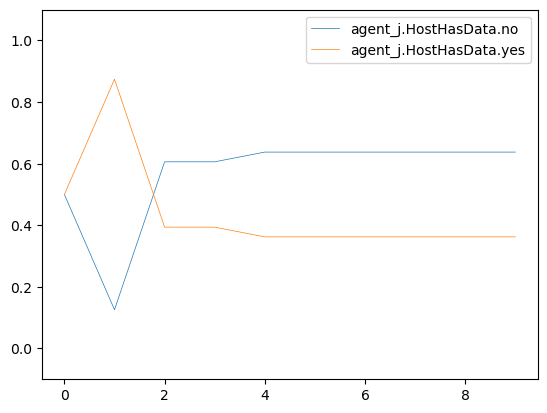

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user agent_i.action  agent_j.action
0                   1.0                   0.0        LogIOCs       FileRecon
1                   1.0                   0.0   DecoyAccount  ManipulateData
2                   1.0                   0.0   LockAccounts    EnumAccounts
3                   1.0                   0.0   LockAccounts       FileRecon
4                   1.0                   0.0   LockAccounts      PrivEscAcc
5                   1.0                   0.0   LockAccounts            Exit
6                   1.0                   0.0   LockAccounts             Nop
7                   1.0                   0.0   LockAccounts             Nop
8                   1.0                   0.0   LockAccounts             Nop
9                   1.0                   0.0            Nop             Nop

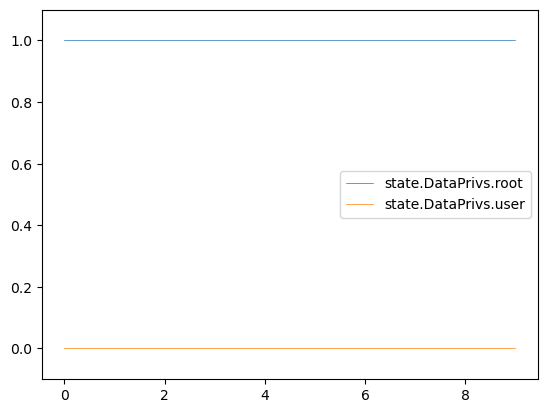

agent_i.DataPrivs.root  agent_i.DataPrivs.user agent_i.action  \
0                     1.0                     0.0        LogIOCs   
1                     1.0                     0.0   DecoyAccount   
2                     1.0                     0.0   LockAccounts   
3                     1.0                     0.0   LockAccounts   
4                     1.0                     0.0   LockAccounts   
5                     1.0                     0.0   LockAccounts   
6                     1.0                     0.0   LockAccounts   
7                     1.0                     0.0   LockAccounts   
8                     1.0                     0.0   LockAccounts   
9                     1.0                     0.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                       file_write  
1  ManipulateData                   login_activity  
2    EnumAccounts                   login_activity  
3       FileRecon                       file_write  
4      PrivEscAcc                   login_activity  
5            Exit                             none  
6             Nop                        file_enum  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

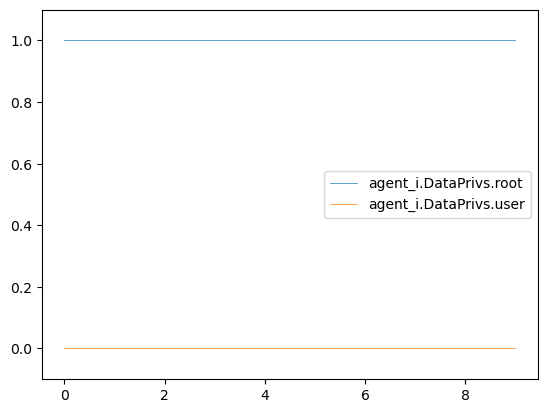

agent_j.DataPrivs.root  agent_j.DataPrivs.user  agent_j.action  \
0                0.500000                0.500000       FileRecon   
1                0.125786                0.874214  ManipulateData   
2                0.606061                0.393939    EnumAccounts   
3                0.606061                0.393939       FileRecon   
4                0.637620                0.362380      PrivEscAcc   
5                0.637620                0.362380            Exit   
6                0.637620                0.362380             Nop   
7                0.637620                0.362380             Nop   
8                0.637620                0.362380             Nop   
9                0.637620                0.362380             Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                            auth                         none   
1   DecoyAccount                          denied                   user_files   
2   LockAccounts                          denied                         none   
3   LockAccounts                            auth                         none   
4   LockAccounts                          denied                   user_files   
5   LockAccounts                            auth                   user_files   
6   LockAccounts                            auth                         none   
7   LockAccounts                          denied                   user_files   
8   LockAccounts                          denied                         none   
9            Nop                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           success                          active   
1                           failure                          active   
2                           success                          active   
3                           failure                          active   
4                           failure                          active   
5                           success                      terminated   
6                           success                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2               acc_policy_change  
3               acc_policy_change  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

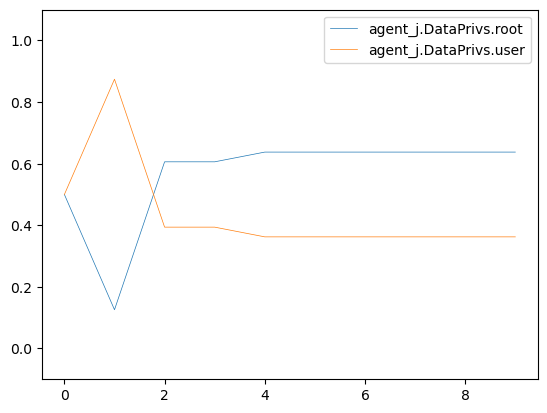

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot agent_i.action  agent_j.action  
0                      1.0        LogIOCs       FileRecon  
1                      1.0   DecoyAccount  ManipulateData  
2                      1.0   LockAccounts    EnumAccounts  
3                      1.0   LockAccounts       FileRecon  
4                      1.0   LockAccounts      PrivEscAcc  
5                      1.0   LockAccounts            Exit  
6                      1.0   LockAccounts             Nop  
7                      1.0   LockAccounts             Nop  
8                      1.0   LockAccounts             Nop  
9                      1.0            Nop             Nop

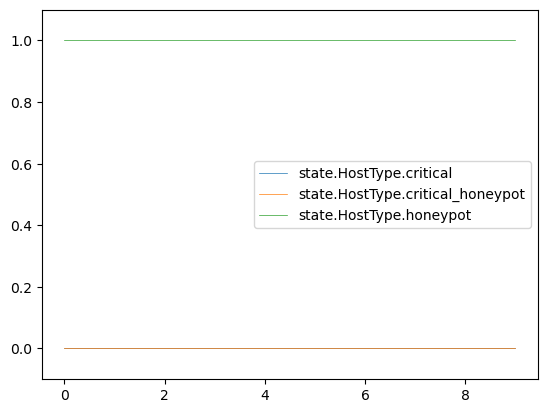

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot agent_i.action  agent_j.action  \
0                        1.0        LogIOCs       FileRecon   
1                        1.0   DecoyAccount  ManipulateData   
2                        1.0   LockAccounts    EnumAccounts   
3                        1.0   LockAccounts       FileRecon   
4                        1.0   LockAccounts      PrivEscAcc   
5                        1.0   LockAccounts            Exit   
6                        1.0   LockAccounts             Nop   
7                        1.0   LockAccounts             Nop   
8                        1.0   LockAccounts             Nop   
9                        1.0            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                       file_write  
1                   login_activity  
2                   login_activity  
3                       file_write  
4                   login_activity  
5                             none  
6                        file_enum  
7                             none  
8                             none  
9                             none

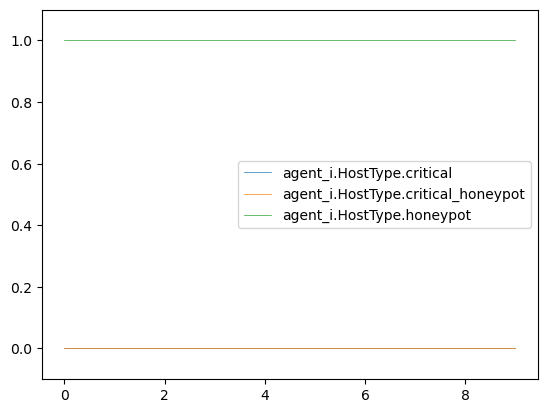

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_j.HostType.honeypot  agent_j.action agent_i.action  \
0                        0.0       FileRecon        LogIOCs   
1                        0.0  ManipulateData   DecoyAccount   
2                        0.0    EnumAccounts   LockAccounts   
3                        0.0       FileRecon   LockAccounts   
4                        0.0      PrivEscAcc   LockAccounts   
5                        0.0            Exit   LockAccounts   
6                        0.0             Nop   LockAccounts   
7                        0.0             Nop   LockAccounts   
8                        0.0             Nop   LockAccounts   
9                        0.0             Nop            Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                            auth                         none   
1                          denied                   user_files   
2                          denied                         none   
3                            auth                         none   
4                          denied                   user_files   
5                            auth                   user_files   
6                            auth                         none   
7                          denied                   user_files   
8                          denied                         none   
9                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           success                          active   
1                           failure                          active   
2                           success                          active   
3                           failure                          active   
4                           failure                          active   
5                           success                      terminated   
6                           success                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2               acc_policy_change  
3               acc_policy_change  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

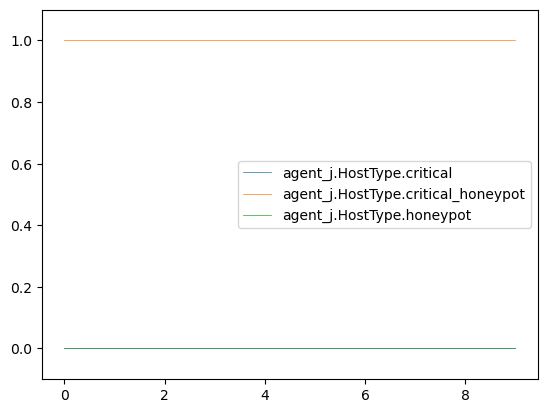

=============AttActive============


state.AttActive.no  state.AttActive.yes agent_i.action  agent_j.action
0                 0.0                  1.0        LogIOCs       FileRecon
1                 0.0                  1.0   DecoyAccount  ManipulateData
2                 0.0                  1.0   LockAccounts    EnumAccounts
3                 0.0                  1.0   LockAccounts       FileRecon
4                 0.0                  1.0   LockAccounts      PrivEscAcc
5                 0.0                  1.0   LockAccounts            Exit
6                 1.0                  0.0   LockAccounts             Nop
7                 1.0                  0.0   LockAccounts             Nop
8                 1.0                  0.0   LockAccounts             Nop
9                 1.0                  0.0            Nop             Nop

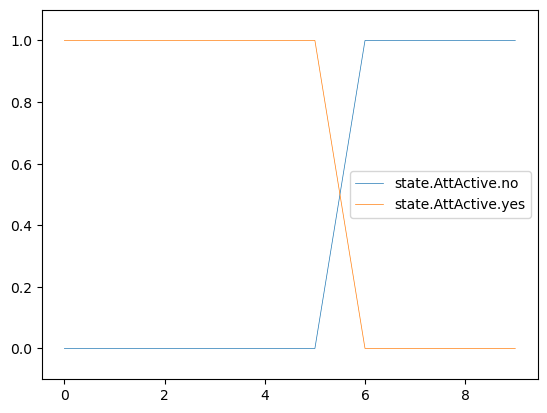

agent_i.AttActive.no  agent_i.AttActive.yes agent_i.action  agent_j.action  \
0              0.000000               1.000000        LogIOCs       FileRecon   
1              0.000000               1.000000   DecoyAccount  ManipulateData   
2              0.000000               1.000000   LockAccounts    EnumAccounts   
3              0.000005               0.999995   LockAccounts       FileRecon   
4              0.027214               0.972786   LockAccounts      PrivEscAcc   
5              0.008419               0.991581   LockAccounts            Exit   
6              0.152482               0.847518   LockAccounts             Nop   
7              0.130212               0.869788   LockAccounts             Nop   
8              0.769629               0.230371   LockAccounts             Nop   
9              0.962847               0.037153            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                       file_write  
1                   login_activity  
2                   login_activity  
3                       file_write  
4                   login_activity  
5                             none  
6                        file_enum  
7                             none  
8                             none  
9                             none

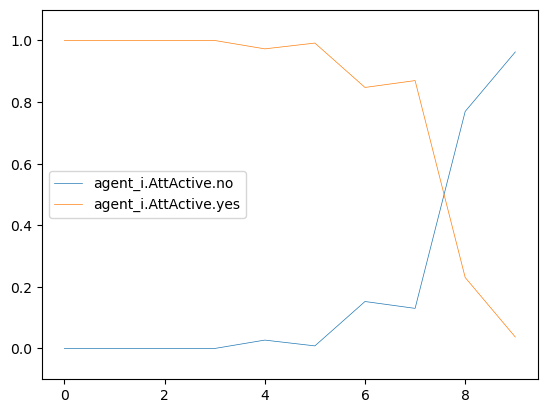

agent_j.AttActive.no  agent_j.AttActive.yes  agent_j.action agent_i.action  \
0                   0.0                    1.0       FileRecon        LogIOCs   
1                   0.0                    1.0  ManipulateData   DecoyAccount   
2                   0.0                    1.0    EnumAccounts   LockAccounts   
3                   0.0                    1.0       FileRecon   LockAccounts   
4                   0.0                    1.0      PrivEscAcc   LockAccounts   
5                   0.0                    1.0            Exit   LockAccounts   
6                   1.0                    0.0             Nop   LockAccounts   
7                   1.0                    0.0             Nop   LockAccounts   
8                   1.0                    0.0             Nop   LockAccounts   
9                   1.0                    0.0             Nop            Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                            auth                         none   
1                          denied                   user_files   
2                          denied                         none   
3                            auth                         none   
4                          denied                   user_files   
5                            auth                   user_files   
6                            auth                         none   
7                          denied                   user_files   
8                          denied                         none   
9                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           success                          active   
1                           failure                          active   
2                           success                          active   
3                           failure                          active   
4                           failure                          active   
5                           success                      terminated   
6                           success                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2               acc_policy_change  
3               acc_policy_change  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

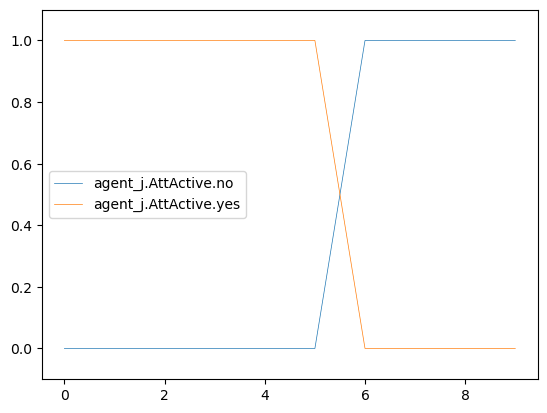

=============IOCsLogged============


state.IOCsLogged.no  state.IOCsLogged.yes agent_i.action  agent_j.action
0                  1.0                   0.0        LogIOCs       FileRecon
1                  0.0                   1.0   DecoyAccount  ManipulateData
2                  0.0                   1.0   LockAccounts    EnumAccounts
3                  0.0                   1.0   LockAccounts       FileRecon
4                  0.0                   1.0   LockAccounts      PrivEscAcc
5                  0.0                   1.0   LockAccounts            Exit
6                  0.0                   1.0   LockAccounts             Nop
7                  0.0                   1.0   LockAccounts             Nop
8                  0.0                   1.0   LockAccounts             Nop
9                  0.0                   1.0            Nop             Nop

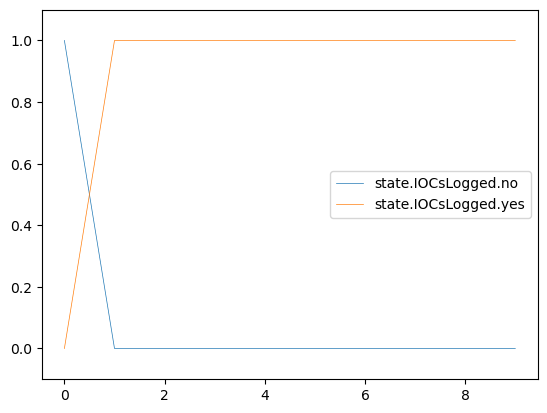

agent_i.IOCsLogged.no  agent_i.IOCsLogged.yes agent_i.action  \
0                    1.0                     0.0        LogIOCs   
1                    0.0                     1.0   DecoyAccount   
2                    0.0                     1.0   LockAccounts   
3                    0.0                     1.0   LockAccounts   
4                    0.0                     1.0   LockAccounts   
5                    0.0                     1.0   LockAccounts   
6                    0.0                     1.0   LockAccounts   
7                    0.0                     1.0   LockAccounts   
8                    0.0                     1.0   LockAccounts   
9                    0.0                     1.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                       file_write  
1  ManipulateData                   login_activity  
2    EnumAccounts                   login_activity  
3       FileRecon                       file_write  
4      PrivEscAcc                   login_activity  
5            Exit                             none  
6             Nop                        file_enum  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

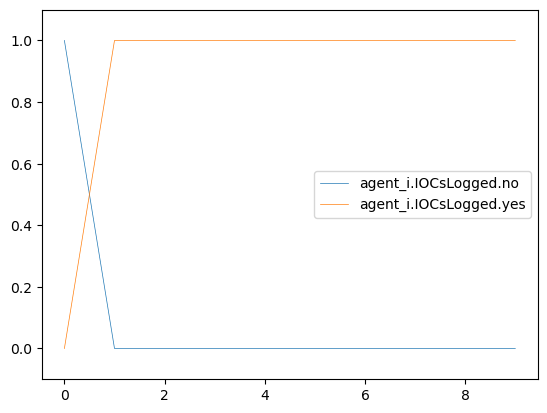

agent_j.IOCsLogged.no  agent_j.IOCsLogged.yes  agent_j.action  \
0               1.000000                0.000000       FileRecon   
1               0.750000                0.250000  ManipulateData   
2               0.750000                0.250000    EnumAccounts   
3               0.920097                0.079903       FileRecon   
4               0.993558                0.006442      PrivEscAcc   
5               0.998280                0.001720            Exit   
6               0.998280                0.001720             Nop   
7               0.998280                0.001720             Nop   
8               0.998280                0.001720             Nop   
9               0.998280                0.001720             Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                            auth                         none   
1   DecoyAccount                          denied                   user_files   
2   LockAccounts                          denied                         none   
3   LockAccounts                            auth                         none   
4   LockAccounts                          denied                   user_files   
5   LockAccounts                            auth                   user_files   
6   LockAccounts                            auth                         none   
7   LockAccounts                          denied                   user_files   
8   LockAccounts                          denied                         none   
9            Nop                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           success                          active   
1                           failure                          active   
2                           success                          active   
3                           failure                          active   
4                           failure                          active   
5                           success                      terminated   
6                           success                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2               acc_policy_change  
3               acc_policy_change  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

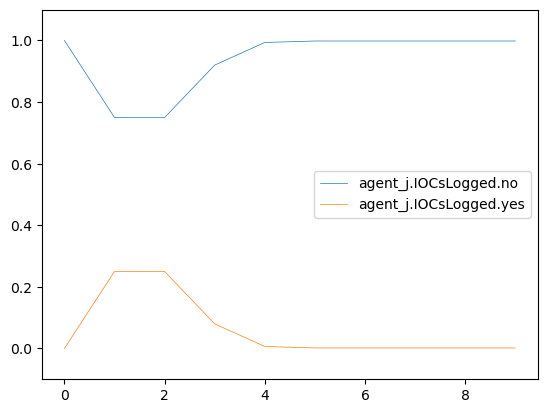

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                        file_enum
2                               1.0                   login_activity
3                               1.0                   login_activity
4                               1.0                   login_activity
5                               1.0                   login_activity
6                               1.0                   login_activity
7                               1.0                   login_activity
8                               1.0                        file_enum
9                               1.0                             none

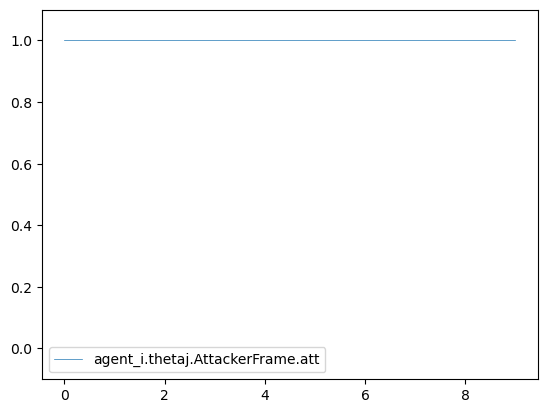

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.500000                        0.500000   
2                         0.577778                        0.422222   
3                         0.981429                        0.018571   
4                         0.989436                        0.010564   
5                         0.958335                        0.041665   
6                         0.958335                        0.041665   
7                         0.958335                        0.041665   
8                         0.958335                        0.041665   
9                         0.958335                        0.041665   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                            auth                         none   
1                          denied                   user_files   
2                          denied                   user_files   
3                          denied                   user_files   
4                          denied                   user_files   
5                          denied                   user_files   
6                          denied                   user_files   
7                          denied                         none   
8                          denied                         none   
9                          denied                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                          active   
2                           success                          active   
3                           failure                          active   
4                           failure                          active   
5                           failure                          active   
6                           failure                      terminated   
7                           failure                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2               acc_policy_change  
3               acc_policy_change  
4               acc_policy_change  
5               acc_policy_change  
6                            none  
7                            none  
8                            none  
9                            none

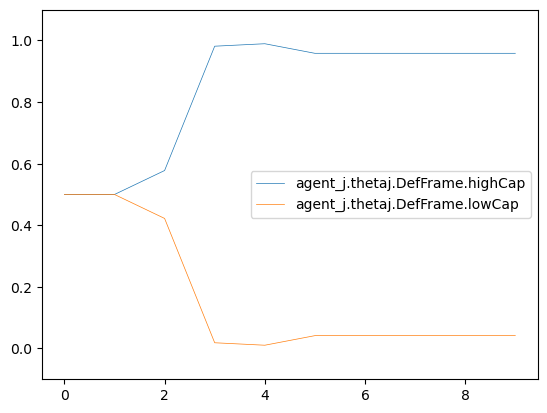

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user agent_i.action  \
0                     0.0                     1.0        LogIOCs   
1                     0.0                     1.0   DecoyAccount   
2                     0.0                     1.0   LockAccounts   
3                     0.0                     1.0   LockAccounts   
4                     0.0                     1.0   LockAccounts   
5                     0.0                     1.0   LockAccounts   
6                     0.0                     1.0   LockAccounts   
7                     0.0                     1.0   LockAccounts   
8                     0.0                     1.0   LockAccounts   
9                     0.0                     1.0   LockAccounts   

  agent_j.action  
0      FileRecon  
1   EnumAccounts  
2     PrivEscAcc  
3     PrivEscAcc  
4     PrivEscAcc  
5      FileRecon  
6           Exit  
7            Nop  
8            Nop  
9            Nop

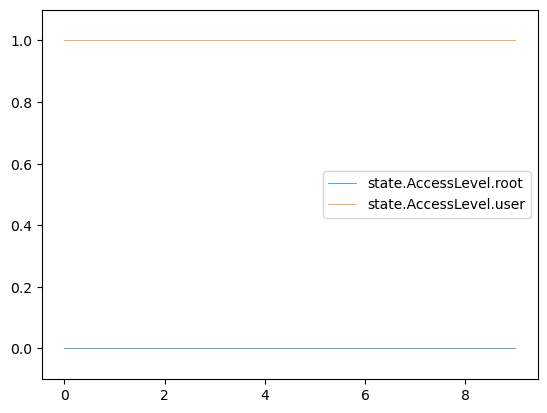

agent_i.AccessLevel.root  agent_i.AccessLevel.user agent_i.action  \
0                       0.0                       1.0        LogIOCs   
1                       0.0                       1.0   DecoyAccount   
2                       0.0                       1.0   LockAccounts   
3                       0.0                       1.0   LockAccounts   
4                       0.0                       1.0   LockAccounts   
5                       0.0                       1.0   LockAccounts   
6                       0.0                       1.0   LockAccounts   
7                       0.0                       1.0   LockAccounts   
8                       0.0                       1.0   LockAccounts   
9                       0.0                       1.0   LockAccounts   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1   EnumAccounts                        file_enum  
2     PrivEscAcc                   login_activity  
3     PrivEscAcc                   login_activity  
4     PrivEscAcc                   login_activity  
5      FileRecon                   login_activity  
6           Exit                   login_activity  
7            Nop                   login_activity  
8            Nop                        file_enum  
9            Nop                             none

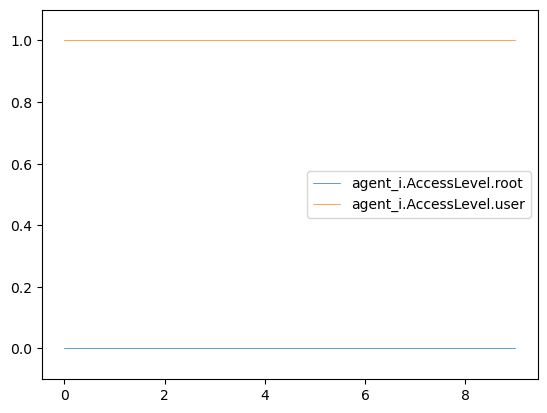

agent_j.AccessLevel.root  agent_j.AccessLevel.user agent_j.action  \
0                       0.0                       1.0      FileRecon   
1                       0.0                       1.0   EnumAccounts   
2                       0.0                       1.0     PrivEscAcc   
3                       0.0                       1.0     PrivEscAcc   
4                       0.0                       1.0     PrivEscAcc   
5                       0.0                       1.0      FileRecon   
6                       0.0                       1.0           Exit   
7                       0.0                       1.0            Nop   
8                       0.0                       1.0            Nop   
9                       0.0                       1.0            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                            auth                         none   
1   DecoyAccount                          denied                   user_files   
2   LockAccounts                          denied                   user_files   
3   LockAccounts                          denied                   user_files   
4   LockAccounts                          denied                   user_files   
5   LockAccounts                          denied                   user_files   
6   LockAccounts                          denied                   user_files   
7   LockAccounts                          denied                         none   
8   LockAccounts                          denied                         none   
9   LockAccounts                          denied                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                          active   
2                           success                          active   
3                           failure                          active   
4                           failure                          active   
5                           failure                          active   
6                           failure                      terminated   
7                           failure                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2               acc_policy_change  
3               acc_policy_change  
4               acc_policy_change  
5               acc_policy_change  
6                            none  
7                            none  
8                            none  
9                            none

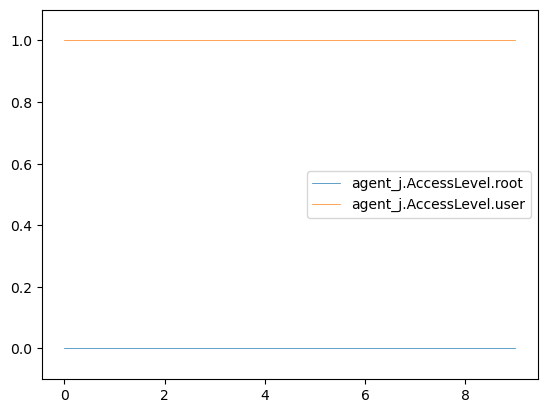

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes agent_i.action agent_j.action
0                   1.0                    0.0        LogIOCs      FileRecon
1                   1.0                    0.0   DecoyAccount   EnumAccounts
2                   0.0                    1.0   LockAccounts     PrivEscAcc
3                   0.0                    1.0   LockAccounts     PrivEscAcc
4                   0.0                    1.0   LockAccounts     PrivEscAcc
5                   0.0                    1.0   LockAccounts      FileRecon
6                   0.0                    1.0   LockAccounts           Exit
7                   0.0                    1.0   LockAccounts            Nop
8                   0.0                    1.0   LockAccounts            Nop
9                   0.0                    1.0   LockAccounts            Nop

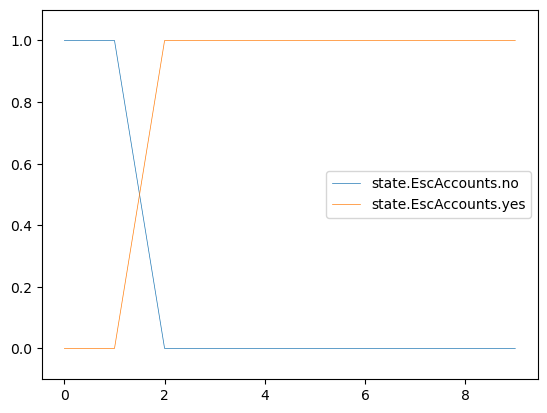

agent_i.EscAccounts.no  agent_i.EscAccounts.yes agent_i.action  \
0                     1.0                      0.0        LogIOCs   
1                     1.0                      0.0   DecoyAccount   
2                     0.0                      1.0   LockAccounts   
3                     0.0                      1.0   LockAccounts   
4                     0.0                      1.0   LockAccounts   
5                     0.0                      1.0   LockAccounts   
6                     0.0                      1.0   LockAccounts   
7                     0.0                      1.0   LockAccounts   
8                     0.0                      1.0   LockAccounts   
9                     0.0                      1.0   LockAccounts   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1   EnumAccounts                        file_enum  
2     PrivEscAcc                   login_activity  
3     PrivEscAcc                   login_activity  
4     PrivEscAcc                   login_activity  
5      FileRecon                   login_activity  
6           Exit                   login_activity  
7            Nop                   login_activity  
8            Nop                        file_enum  
9            Nop                             none

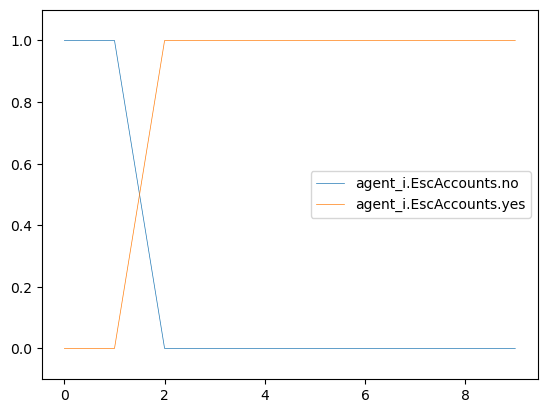

agent_j.EscAccounts.no  agent_j.EscAccounts.yes agent_j.action  \
0                0.500000                 0.500000      FileRecon   
1                0.500000                 0.500000   EnumAccounts   
2                0.083333                 0.916667     PrivEscAcc   
3                0.142857                 0.857143     PrivEscAcc   
4                0.193166                 0.806834     PrivEscAcc   
5                0.761834                 0.238165      FileRecon   
6                0.761834                 0.238165           Exit   
7                0.761835                 0.238165            Nop   
8                0.761834                 0.238165            Nop   
9                0.761835                 0.238165            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                            auth                         none   
1   DecoyAccount                          denied                   user_files   
2   LockAccounts                          denied                   user_files   
3   LockAccounts                          denied                   user_files   
4   LockAccounts                          denied                   user_files   
5   LockAccounts                          denied                   user_files   
6   LockAccounts                          denied                   user_files   
7   LockAccounts                          denied                         none   
8   LockAccounts                          denied                         none   
9   LockAccounts                          denied                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                          active   
2                           success                          active   
3                           failure                          active   
4                           failure                          active   
5                           failure                          active   
6                           failure                      terminated   
7                           failure                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2               acc_policy_change  
3               acc_policy_change  
4               acc_policy_change  
5               acc_policy_change  
6                            none  
7                            none  
8                            none  
9                            none

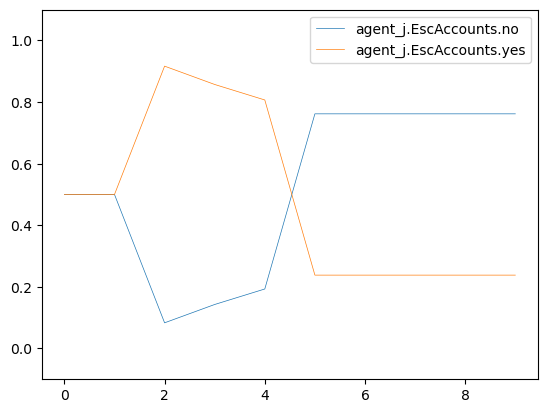

=============AccFound============


state.AccFound.no  state.AccFound.yes agent_i.action agent_j.action
0                1.0                 0.0        LogIOCs      FileRecon
1                1.0                 0.0   DecoyAccount   EnumAccounts
2                0.0                 1.0   LockAccounts     PrivEscAcc
3                0.0                 1.0   LockAccounts     PrivEscAcc
4                0.0                 1.0   LockAccounts     PrivEscAcc
5                0.0                 1.0   LockAccounts      FileRecon
6                0.0                 1.0   LockAccounts           Exit
7                0.0                 1.0   LockAccounts            Nop
8                0.0                 1.0   LockAccounts            Nop
9                0.0                 1.0   LockAccounts            Nop

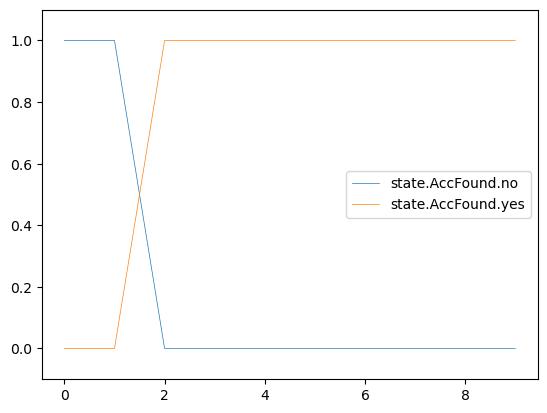

agent_i.AccFound.no  agent_i.AccFound.yes agent_i.action agent_j.action  \
0             1.000000              0.000000        LogIOCs      FileRecon   
1             1.000000              0.000000   DecoyAccount   EnumAccounts   
2             0.305224              0.694776   LockAccounts     PrivEscAcc   
3             0.077058              0.922942   LockAccounts     PrivEscAcc   
4             0.049569              0.950430   LockAccounts     PrivEscAcc   
5             0.045308              0.954692   LockAccounts      FileRecon   
6             0.044365              0.955635   LockAccounts           Exit   
7             0.043939              0.956061   LockAccounts            Nop   
8             0.043596              0.956404   LockAccounts            Nop   
9             0.037268              0.962732   LockAccounts            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                   login_activity  
3                   login_activity  
4                   login_activity  
5                   login_activity  
6                   login_activity  
7                   login_activity  
8                        file_enum  
9                             none

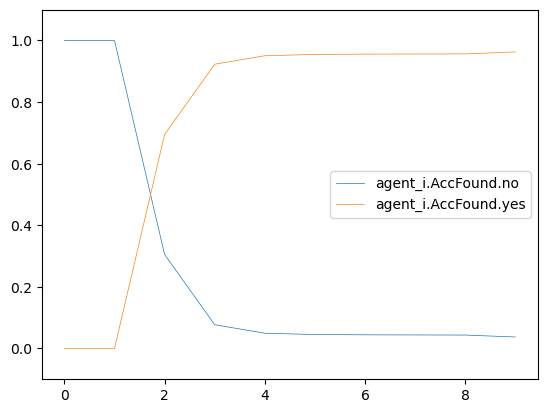

agent_j.AccFound.no  agent_j.AccFound.yes agent_j.action agent_i.action  \
0             1.000000              0.000000      FileRecon        LogIOCs   
1             1.000000              0.000000   EnumAccounts   DecoyAccount   
2             0.125000              0.875000     PrivEscAcc   LockAccounts   
3             0.190000              0.810000     PrivEscAcc   LockAccounts   
4             0.253553              0.746447     PrivEscAcc   LockAccounts   
5             1.000000              0.000000      FileRecon   LockAccounts   
6             1.000000              0.000000           Exit   LockAccounts   
7             1.000000              0.000000            Nop   LockAccounts   
8             1.000000              0.000000            Nop   LockAccounts   
9             1.000000              0.000000            Nop   LockAccounts   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                            auth                         none   
1                          denied                   user_files   
2                          denied                   user_files   
3                          denied                   user_files   
4                          denied                   user_files   
5                          denied                   user_files   
6                          denied                   user_files   
7                          denied                         none   
8                          denied                         none   
9                          denied                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                          active   
2                           success                          active   
3                           failure                          active   
4                           failure                          active   
5                           failure                          active   
6                           failure                      terminated   
7                           failure                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2               acc_policy_change  
3               acc_policy_change  
4               acc_policy_change  
5               acc_policy_change  
6                            none  
7                            none  
8                            none  
9                            none

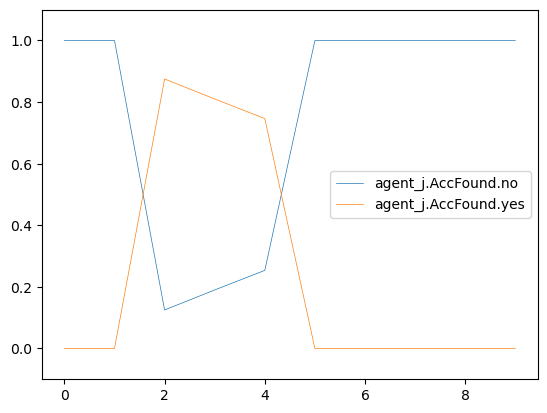

=============DataFound============


state.DataFound.no  state.DataFound.yes agent_i.action agent_j.action
0                 1.0                  0.0        LogIOCs      FileRecon
1                 1.0                  0.0   DecoyAccount   EnumAccounts
2                 1.0                  0.0   LockAccounts     PrivEscAcc
3                 1.0                  0.0   LockAccounts     PrivEscAcc
4                 1.0                  0.0   LockAccounts     PrivEscAcc
5                 1.0                  0.0   LockAccounts      FileRecon
6                 1.0                  0.0   LockAccounts           Exit
7                 1.0                  0.0   LockAccounts            Nop
8                 1.0                  0.0   LockAccounts            Nop
9                 1.0                  0.0   LockAccounts            Nop

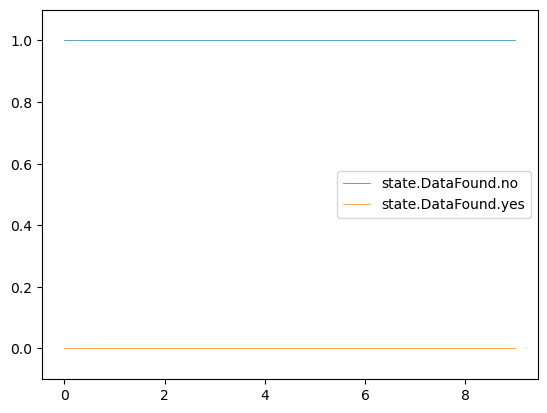

agent_i.DataFound.no  agent_i.DataFound.yes agent_i.action agent_j.action  \
0                   1.0                    0.0        LogIOCs      FileRecon   
1                   1.0                    0.0   DecoyAccount   EnumAccounts   
2                   1.0                    0.0   LockAccounts     PrivEscAcc   
3                   1.0                    0.0   LockAccounts     PrivEscAcc   
4                   1.0                    0.0   LockAccounts     PrivEscAcc   
5                   1.0                    0.0   LockAccounts      FileRecon   
6                   1.0                    0.0   LockAccounts           Exit   
7                   1.0                    0.0   LockAccounts            Nop   
8                   1.0                    0.0   LockAccounts            Nop   
9                   1.0                    0.0   LockAccounts            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                   login_activity  
3                   login_activity  
4                   login_activity  
5                   login_activity  
6                   login_activity  
7                   login_activity  
8                        file_enum  
9                             none

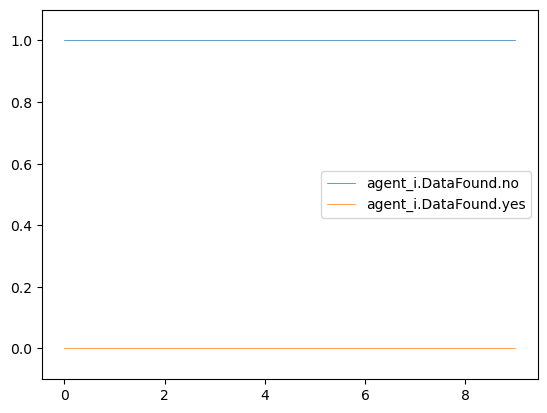

agent_j.DataFound.no  agent_j.DataFound.yes agent_j.action agent_i.action  \
0              1.000000               0.000000      FileRecon        LogIOCs   
1              0.954984               0.045016   EnumAccounts   DecoyAccount   
2              0.954984               0.045016     PrivEscAcc   LockAccounts   
3              0.954984               0.045016     PrivEscAcc   LockAccounts   
4              0.954984               0.045016     PrivEscAcc   LockAccounts   
5              0.954984               0.045016      FileRecon   LockAccounts   
6              1.000000               0.000000           Exit   LockAccounts   
7              1.000000               0.000000            Nop   LockAccounts   
8              1.000000               0.000000            Nop   LockAccounts   
9              1.000000               0.000000            Nop   LockAccounts   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                            auth                         none   
1                          denied                   user_files   
2                          denied                   user_files   
3                          denied                   user_files   
4                          denied                   user_files   
5                          denied                   user_files   
6                          denied                   user_files   
7                          denied                         none   
8                          denied                         none   
9                          denied                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                          active   
2                           success                          active   
3                           failure                          active   
4                           failure                          active   
5                           failure                          active   
6                           failure                      terminated   
7                           failure                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2               acc_policy_change  
3               acc_policy_change  
4               acc_policy_change  
5               acc_policy_change  
6                            none  
7                            none  
8                            none  
9                            none

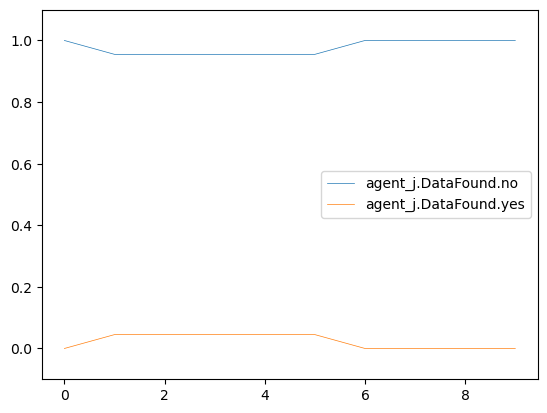

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes agent_i.action agent_j.action
0                    1.0                     0.0        LogIOCs      FileRecon
1                    1.0                     0.0   DecoyAccount   EnumAccounts
2                    1.0                     0.0   LockAccounts     PrivEscAcc
3                    1.0                     0.0   LockAccounts     PrivEscAcc
4                    1.0                     0.0   LockAccounts     PrivEscAcc
5                    1.0                     0.0   LockAccounts      FileRecon
6                    1.0                     0.0   LockAccounts           Exit
7                    1.0                     0.0   LockAccounts            Nop
8                    1.0                     0.0   LockAccounts            Nop
9                    1.0                     0.0   LockAccounts            Nop

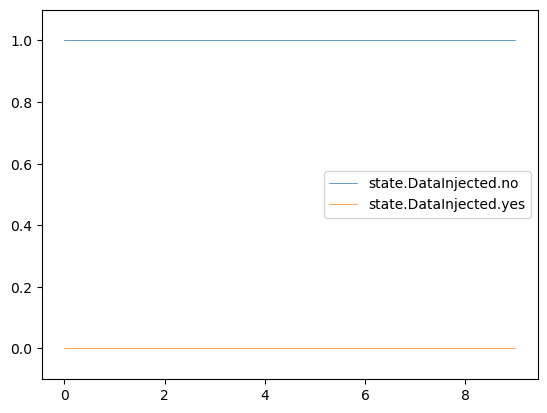

agent_i.DataInjected.no  agent_i.DataInjected.yes agent_i.action  \
0                      1.0                       0.0        LogIOCs   
1                      1.0                       0.0   DecoyAccount   
2                      1.0                       0.0   LockAccounts   
3                      1.0                       0.0   LockAccounts   
4                      1.0                       0.0   LockAccounts   
5                      1.0                       0.0   LockAccounts   
6                      1.0                       0.0   LockAccounts   
7                      1.0                       0.0   LockAccounts   
8                      1.0                       0.0   LockAccounts   
9                      1.0                       0.0   LockAccounts   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1   EnumAccounts                        file_enum  
2     PrivEscAcc                   login_activity  
3     PrivEscAcc                   login_activity  
4     PrivEscAcc                   login_activity  
5      FileRecon                   login_activity  
6           Exit                   login_activity  
7            Nop                   login_activity  
8            Nop                        file_enum  
9            Nop                             none

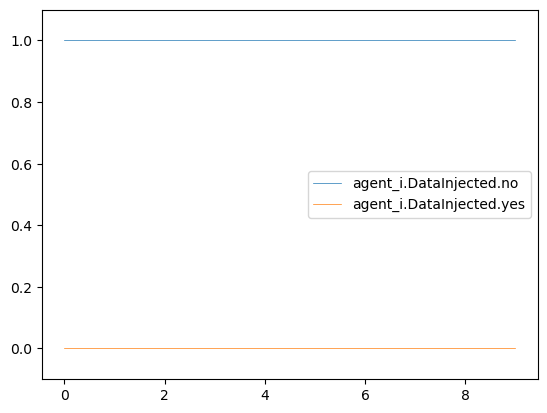

agent_j.DataInjected.no  agent_j.DataInjected.yes agent_j.action  \
0                      1.0                       0.0      FileRecon   
1                      1.0                       0.0   EnumAccounts   
2                      1.0                       0.0     PrivEscAcc   
3                      1.0                       0.0     PrivEscAcc   
4                      1.0                       0.0     PrivEscAcc   
5                      1.0                       0.0      FileRecon   
6                      1.0                       0.0           Exit   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                            auth                         none   
1   DecoyAccount                          denied                   user_files   
2   LockAccounts                          denied                   user_files   
3   LockAccounts                          denied                   user_files   
4   LockAccounts                          denied                   user_files   
5   LockAccounts                          denied                   user_files   
6   LockAccounts                          denied                   user_files   
7   LockAccounts                          denied                         none   
8   LockAccounts                          denied                         none   
9   LockAccounts                          denied                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                          active   
2                           success                          active   
3                           failure                          active   
4                           failure                          active   
5                           failure                          active   
6                           failure                      terminated   
7                           failure                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2               acc_policy_change  
3               acc_policy_change  
4               acc_policy_change  
5               acc_policy_change  
6                            none  
7                            none  
8                            none  
9                            none

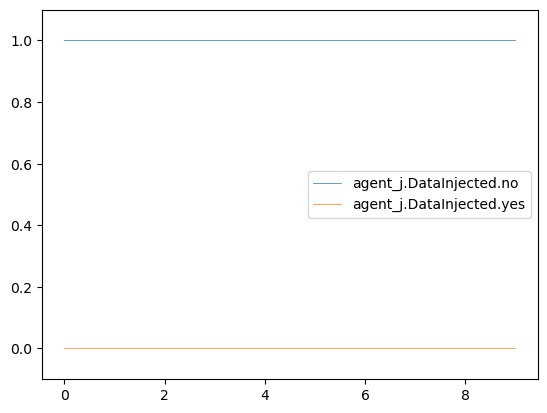

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes agent_i.action agent_j.action
0                   0.0                    1.0        LogIOCs      FileRecon
1                   0.0                    1.0   DecoyAccount   EnumAccounts
2                   0.0                    1.0   LockAccounts     PrivEscAcc
3                   0.0                    1.0   LockAccounts     PrivEscAcc
4                   0.0                    1.0   LockAccounts     PrivEscAcc
5                   0.0                    1.0   LockAccounts      FileRecon
6                   0.0                    1.0   LockAccounts           Exit
7                   0.0                    1.0   LockAccounts            Nop
8                   0.0                    1.0   LockAccounts            Nop
9                   0.0                    1.0   LockAccounts            Nop

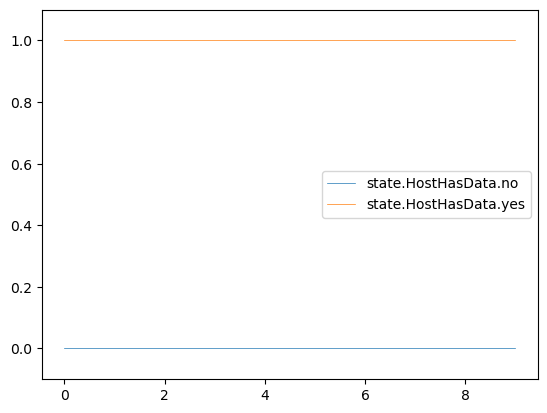

agent_i.HostHasData.no  agent_i.HostHasData.yes agent_i.action  \
0                     0.0                      1.0        LogIOCs   
1                     0.0                      1.0   DecoyAccount   
2                     0.0                      1.0   LockAccounts   
3                     0.0                      1.0   LockAccounts   
4                     0.0                      1.0   LockAccounts   
5                     0.0                      1.0   LockAccounts   
6                     0.0                      1.0   LockAccounts   
7                     0.0                      1.0   LockAccounts   
8                     0.0                      1.0   LockAccounts   
9                     0.0                      1.0   LockAccounts   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1   EnumAccounts                        file_enum  
2     PrivEscAcc                   login_activity  
3     PrivEscAcc                   login_activity  
4     PrivEscAcc                   login_activity  
5      FileRecon                   login_activity  
6           Exit                   login_activity  
7            Nop                   login_activity  
8            Nop                        file_enum  
9            Nop                             none

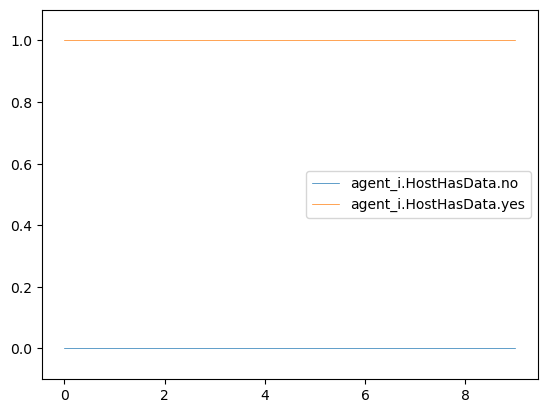

agent_j.HostHasData.no  agent_j.HostHasData.yes agent_j.action  \
0                0.500000                 0.500000      FileRecon   
1                0.578778                 0.421222   EnumAccounts   
2                0.578778                 0.421222     PrivEscAcc   
3                0.578778                 0.421222     PrivEscAcc   
4                0.578778                 0.421222     PrivEscAcc   
5                0.578778                 0.421222      FileRecon   
6                0.647249                 0.352751           Exit   
7                0.647249                 0.352751            Nop   
8                0.647249                 0.352751            Nop   
9                0.647249                 0.352751            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                            auth                         none   
1   DecoyAccount                          denied                   user_files   
2   LockAccounts                          denied                   user_files   
3   LockAccounts                          denied                   user_files   
4   LockAccounts                          denied                   user_files   
5   LockAccounts                          denied                   user_files   
6   LockAccounts                          denied                   user_files   
7   LockAccounts                          denied                         none   
8   LockAccounts                          denied                         none   
9   LockAccounts                          denied                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                          active   
2                           success                          active   
3                           failure                          active   
4                           failure                          active   
5                           failure                          active   
6                           failure                      terminated   
7                           failure                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2               acc_policy_change  
3               acc_policy_change  
4               acc_policy_change  
5               acc_policy_change  
6                            none  
7                            none  
8                            none  
9                            none

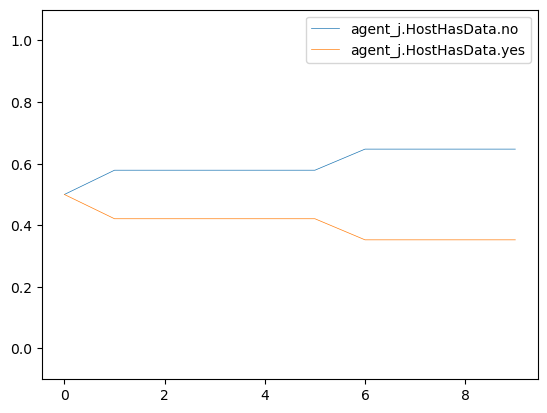

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user agent_i.action agent_j.action
0                   1.0                   0.0        LogIOCs      FileRecon
1                   1.0                   0.0   DecoyAccount   EnumAccounts
2                   1.0                   0.0   LockAccounts     PrivEscAcc
3                   1.0                   0.0   LockAccounts     PrivEscAcc
4                   1.0                   0.0   LockAccounts     PrivEscAcc
5                   1.0                   0.0   LockAccounts      FileRecon
6                   1.0                   0.0   LockAccounts           Exit
7                   1.0                   0.0   LockAccounts            Nop
8                   1.0                   0.0   LockAccounts            Nop
9                   1.0                   0.0   LockAccounts            Nop

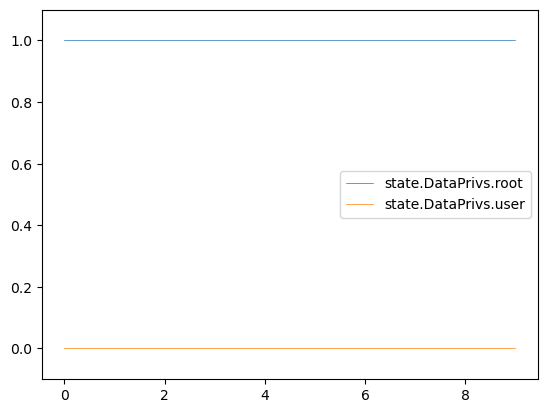

agent_i.DataPrivs.root  agent_i.DataPrivs.user agent_i.action  \
0                     1.0                     0.0        LogIOCs   
1                     1.0                     0.0   DecoyAccount   
2                     1.0                     0.0   LockAccounts   
3                     1.0                     0.0   LockAccounts   
4                     1.0                     0.0   LockAccounts   
5                     1.0                     0.0   LockAccounts   
6                     1.0                     0.0   LockAccounts   
7                     1.0                     0.0   LockAccounts   
8                     1.0                     0.0   LockAccounts   
9                     1.0                     0.0   LockAccounts   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1   EnumAccounts                        file_enum  
2     PrivEscAcc                   login_activity  
3     PrivEscAcc                   login_activity  
4     PrivEscAcc                   login_activity  
5      FileRecon                   login_activity  
6           Exit                   login_activity  
7            Nop                   login_activity  
8            Nop                        file_enum  
9            Nop                             none

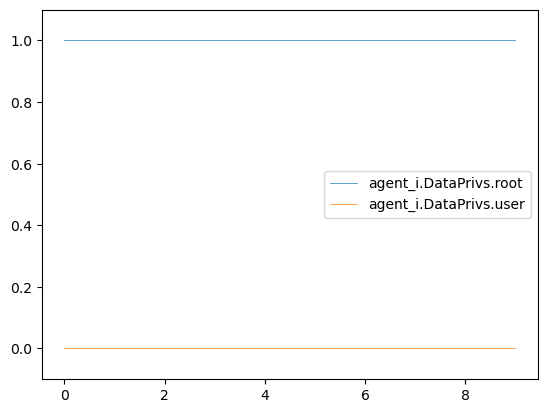

agent_j.DataPrivs.root  agent_j.DataPrivs.user agent_j.action  \
0                0.500000                0.500000      FileRecon   
1                0.578778                0.421222   EnumAccounts   
2                0.578778                0.421222     PrivEscAcc   
3                0.578778                0.421222     PrivEscAcc   
4                0.578778                0.421222     PrivEscAcc   
5                0.578778                0.421222      FileRecon   
6                0.647249                0.352751           Exit   
7                0.647249                0.352751            Nop   
8                0.647249                0.352751            Nop   
9                0.647249                0.352751            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                            auth                         none   
1   DecoyAccount                          denied                   user_files   
2   LockAccounts                          denied                   user_files   
3   LockAccounts                          denied                   user_files   
4   LockAccounts                          denied                   user_files   
5   LockAccounts                          denied                   user_files   
6   LockAccounts                          denied                   user_files   
7   LockAccounts                          denied                         none   
8   LockAccounts                          denied                         none   
9   LockAccounts                          denied                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                          active   
2                           success                          active   
3                           failure                          active   
4                           failure                          active   
5                           failure                          active   
6                           failure                      terminated   
7                           failure                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2               acc_policy_change  
3               acc_policy_change  
4               acc_policy_change  
5               acc_policy_change  
6                            none  
7                            none  
8                            none  
9                            none

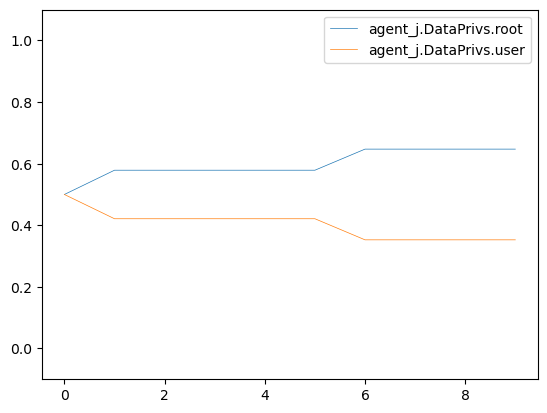

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot agent_i.action agent_j.action  
0                      1.0        LogIOCs      FileRecon  
1                      1.0   DecoyAccount   EnumAccounts  
2                      1.0   LockAccounts     PrivEscAcc  
3                      1.0   LockAccounts     PrivEscAcc  
4                      1.0   LockAccounts     PrivEscAcc  
5                      1.0   LockAccounts      FileRecon  
6                      1.0   LockAccounts           Exit  
7                      1.0   LockAccounts            Nop  
8                      1.0   LockAccounts            Nop  
9                      1.0   LockAccounts            Nop

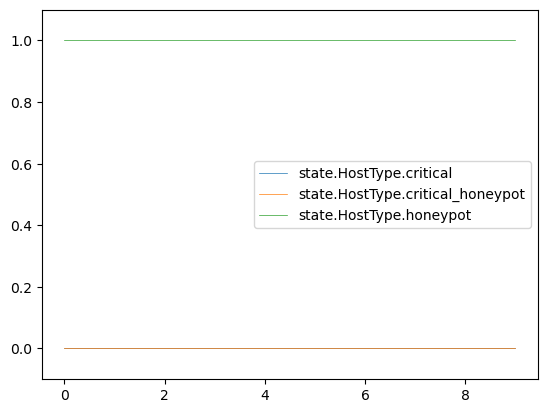

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot agent_i.action agent_j.action  \
0                        1.0        LogIOCs      FileRecon   
1                        1.0   DecoyAccount   EnumAccounts   
2                        1.0   LockAccounts     PrivEscAcc   
3                        1.0   LockAccounts     PrivEscAcc   
4                        1.0   LockAccounts     PrivEscAcc   
5                        1.0   LockAccounts      FileRecon   
6                        1.0   LockAccounts           Exit   
7                        1.0   LockAccounts            Nop   
8                        1.0   LockAccounts            Nop   
9                        1.0   LockAccounts            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                   login_activity  
3                   login_activity  
4                   login_activity  
5                   login_activity  
6                   login_activity  
7                   login_activity  
8                        file_enum  
9                             none

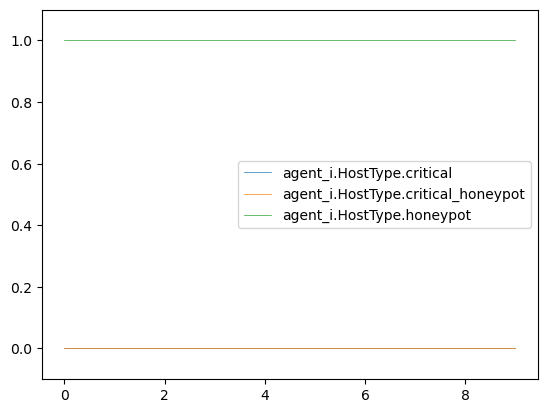

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_j.HostType.honeypot agent_j.action agent_i.action  \
0                        0.0      FileRecon        LogIOCs   
1                        0.0   EnumAccounts   DecoyAccount   
2                        0.0     PrivEscAcc   LockAccounts   
3                        0.0     PrivEscAcc   LockAccounts   
4                        0.0     PrivEscAcc   LockAccounts   
5                        0.0      FileRecon   LockAccounts   
6                        0.0           Exit   LockAccounts   
7                        0.0            Nop   LockAccounts   
8                        0.0            Nop   LockAccounts   
9                        0.0            Nop   LockAccounts   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                            auth                         none   
1                          denied                   user_files   
2                          denied                   user_files   
3                          denied                   user_files   
4                          denied                   user_files   
5                          denied                   user_files   
6                          denied                   user_files   
7                          denied                         none   
8                          denied                         none   
9                          denied                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                          active   
2                           success                          active   
3                           failure                          active   
4                           failure                          active   
5                           failure                          active   
6                           failure                      terminated   
7                           failure                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2               acc_policy_change  
3               acc_policy_change  
4               acc_policy_change  
5               acc_policy_change  
6                            none  
7                            none  
8                            none  
9                            none

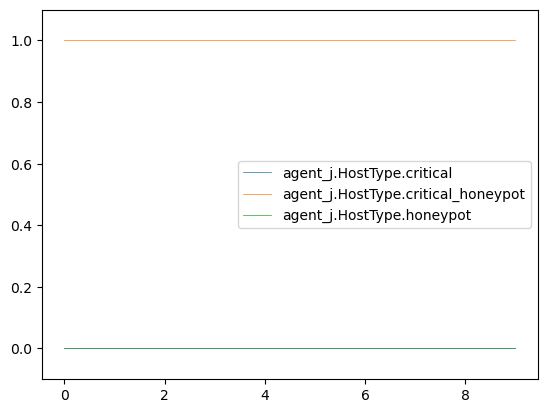

=============AttActive============


state.AttActive.no  state.AttActive.yes agent_i.action agent_j.action
0                 0.0                  1.0        LogIOCs      FileRecon
1                 0.0                  1.0   DecoyAccount   EnumAccounts
2                 0.0                  1.0   LockAccounts     PrivEscAcc
3                 0.0                  1.0   LockAccounts     PrivEscAcc
4                 0.0                  1.0   LockAccounts     PrivEscAcc
5                 0.0                  1.0   LockAccounts      FileRecon
6                 0.0                  1.0   LockAccounts           Exit
7                 1.0                  0.0   LockAccounts            Nop
8                 1.0                  0.0   LockAccounts            Nop
9                 1.0                  0.0   LockAccounts            Nop

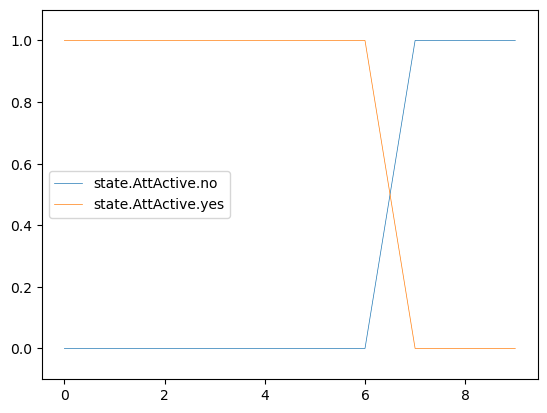

agent_i.AttActive.no  agent_i.AttActive.yes agent_i.action agent_j.action  \
0          0.000000e+00               1.000000        LogIOCs      FileRecon   
1          0.000000e+00               1.000000   DecoyAccount   EnumAccounts   
2          0.000000e+00               1.000000   LockAccounts     PrivEscAcc   
3          7.567961e-07               0.999999   LockAccounts     PrivEscAcc   
4          4.294361e-03               0.995705   LockAccounts     PrivEscAcc   
5          9.848009e-04               0.999015   LockAccounts      FileRecon   
6          1.353594e-03               0.998646   LockAccounts           Exit   
7          1.397776e-03               0.998602   LockAccounts            Nop   
8          1.408137e-03               0.998592   LockAccounts            Nop   
9          5.612885e-03               0.994387   LockAccounts            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                   login_activity  
3                   login_activity  
4                   login_activity  
5                   login_activity  
6                   login_activity  
7                   login_activity  
8                        file_enum  
9                             none

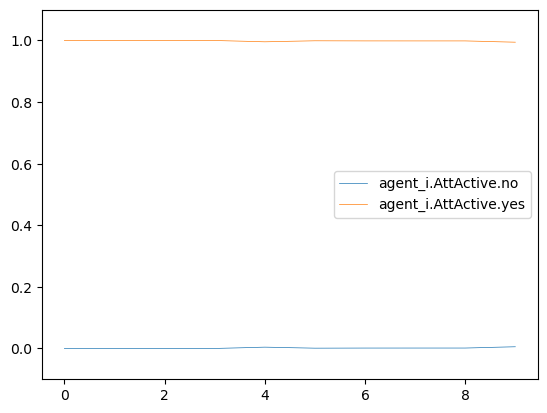

agent_j.AttActive.no  agent_j.AttActive.yes agent_j.action agent_i.action  \
0                   0.0                    1.0      FileRecon        LogIOCs   
1                   0.0                    1.0   EnumAccounts   DecoyAccount   
2                   0.0                    1.0     PrivEscAcc   LockAccounts   
3                   0.0                    1.0     PrivEscAcc   LockAccounts   
4                   0.0                    1.0     PrivEscAcc   LockAccounts   
5                   0.0                    1.0      FileRecon   LockAccounts   
6                   0.0                    1.0           Exit   LockAccounts   
7                   1.0                    0.0            Nop   LockAccounts   
8                   1.0                    0.0            Nop   LockAccounts   
9                   1.0                    0.0            Nop   LockAccounts   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                            auth                         none   
1                          denied                   user_files   
2                          denied                   user_files   
3                          denied                   user_files   
4                          denied                   user_files   
5                          denied                   user_files   
6                          denied                   user_files   
7                          denied                         none   
8                          denied                         none   
9                          denied                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                          active   
2                           success                          active   
3                           failure                          active   
4                           failure                          active   
5                           failure                          active   
6                           failure                      terminated   
7                           failure                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2               acc_policy_change  
3               acc_policy_change  
4               acc_policy_change  
5               acc_policy_change  
6                            none  
7                            none  
8                            none  
9                            none

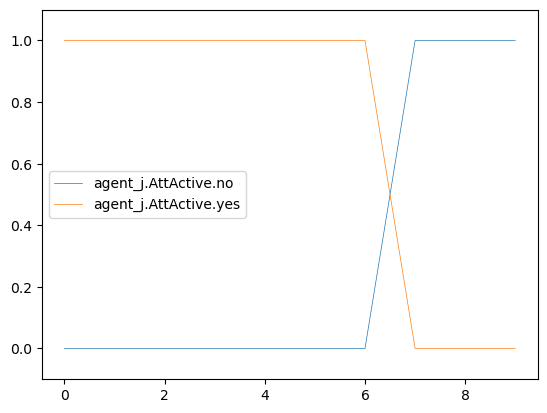

=============IOCsLogged============


state.IOCsLogged.no  state.IOCsLogged.yes agent_i.action agent_j.action
0                  1.0                   0.0        LogIOCs      FileRecon
1                  0.0                   1.0   DecoyAccount   EnumAccounts
2                  0.0                   1.0   LockAccounts     PrivEscAcc
3                  0.0                   1.0   LockAccounts     PrivEscAcc
4                  0.0                   1.0   LockAccounts     PrivEscAcc
5                  0.0                   1.0   LockAccounts      FileRecon
6                  0.0                   1.0   LockAccounts           Exit
7                  0.0                   1.0   LockAccounts            Nop
8                  0.0                   1.0   LockAccounts            Nop
9                  0.0                   1.0   LockAccounts            Nop

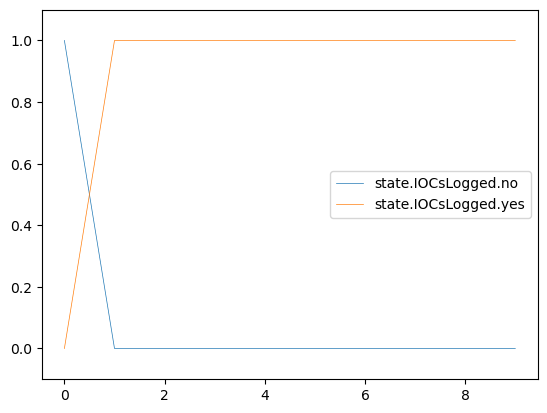

agent_i.IOCsLogged.no  agent_i.IOCsLogged.yes agent_i.action  \
0                    1.0                     0.0        LogIOCs   
1                    0.0                     1.0   DecoyAccount   
2                    0.0                     1.0   LockAccounts   
3                    0.0                     1.0   LockAccounts   
4                    0.0                     1.0   LockAccounts   
5                    0.0                     1.0   LockAccounts   
6                    0.0                     1.0   LockAccounts   
7                    0.0                     1.0   LockAccounts   
8                    0.0                     1.0   LockAccounts   
9                    0.0                     1.0   LockAccounts   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1   EnumAccounts                        file_enum  
2     PrivEscAcc                   login_activity  
3     PrivEscAcc                   login_activity  
4     PrivEscAcc                   login_activity  
5      FileRecon                   login_activity  
6           Exit                   login_activity  
7            Nop                   login_activity  
8            Nop                        file_enum  
9            Nop                             none

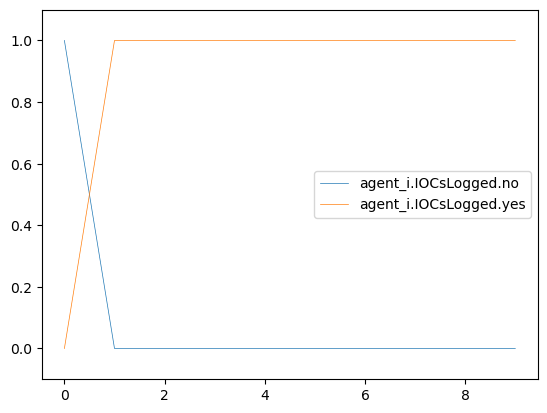

agent_j.IOCsLogged.no  agent_j.IOCsLogged.yes agent_j.action  \
0               1.000000                0.000000      FileRecon   
1               0.750000                0.250000   EnumAccounts   
2               0.633333                0.366667     PrivEscAcc   
3               0.995714                0.004286     PrivEscAcc   
4               0.997562                0.002438     PrivEscAcc   
5               0.990385                0.009615      FileRecon   
6               0.990385                0.009615           Exit   
7               0.990385                0.009615            Nop   
8               0.990385                0.009615            Nop   
9               0.990385                0.009615            Nop   

  agent_i.action agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0        LogIOCs                            auth                         none   
1   DecoyAccount                          denied                   user_files   
2   LockAccounts                          denied                   user_files   
3   LockAccounts                          denied                   user_files   
4   LockAccounts                          denied                   user_files   
5   LockAccounts                          denied                   user_files   
6   LockAccounts                          denied                   user_files   
7   LockAccounts                          denied                         none   
8   LockAccounts                          denied                         none   
9   LockAccounts                          denied                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                          active   
2                           success                          active   
3                           failure                          active   
4                           failure                          active   
5                           failure                          active   
6                           failure                      terminated   
7                           failure                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2               acc_policy_change  
3               acc_policy_change  
4               acc_policy_change  
5               acc_policy_change  
6                            none  
7                            none  
8                            none  
9                            none

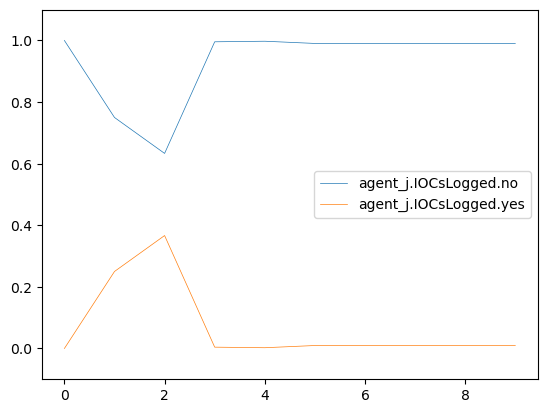

+++++++++++++++++++ End Interaction +++++++++++++++++++


In [7]:
# Get belief over opponent frames
def get_opponent_frame(dataframe):
    
    thetaj_columns = list(filter(lambda x: "thetaj" in x.split("."), dataframe))
    
    if len(thetaj_columns) > 0:
        return dataframe[thetaj_columns]
    
    else:
        return None

# Print and plot P(Theta_j)
def print_thetaj_belief(belief_thetaj_df, obs):
    df = pandas.concat([belief_thetaj_df, obs], axis=1)
    display(df)
    df.plot(linewidth=0.5)
    plotter.ylim(-0.1, 1.1)
    plotter.show()

# Summarize beliefs
def summarize_beliefs(state_vars, dataframe):
    print(f"+++++++++++++++++++ Begin Interaction +++++++++++++++++++")
    agent_i_data = filter_columns_by_agent(dataframe, "agent_i")
    agent_j_data = filter_columns_by_agent(dataframe, "agent_j")
    states = filter_columns_by_agent(dataframe, "state")
    
    actions_i = filter_columns_by_state(agent_i_data, "action")
    actions_j = filter_columns_by_state(agent_j_data, "action")
    
    obs_i = filter_columns_by_state(agent_i_data, "observation")
    obs_j = filter_columns_by_state(agent_j_data, "observation")
    
    i_belief_thetaj = get_opponent_frame(agent_i_data)
    if i_belief_thetaj is not None:
        print_thetaj_belief(i_belief_thetaj, obs_i)
    
    j_belief_thetaj = get_opponent_frame(agent_j_data)
    if j_belief_thetaj is not None:
        print_thetaj_belief(j_belief_thetaj, obs_j)
    
    for var in state_vars:
        print(f"============={var}============")
        # show state
        state_values = filter_columns_by_state(states, var)
        state_values = pandas.concat([state_values, actions_i, actions_j], axis = 1)
        display(state_values)
        state_values.plot(linewidth=0.5)
        plotter.ylim(-0.1, 1.1)
        plotter.show()
        
        # show agent i
        agent_i_beliefs = filter_columns_by_state(agent_i_data, var)
        agent_i_beliefs = pandas.concat([agent_i_beliefs, actions_i, actions_j, obs_i], axis = 1)
        display(agent_i_beliefs)
        agent_i_beliefs.plot(linewidth=0.5)
        plotter.ylim(-0.1, 1.1)
        plotter.show()
        
        # show agent j
        agent_j_beliefs = filter_columns_by_state(agent_j_data, var)
        agent_j_beliefs = pandas.concat([agent_j_beliefs, actions_j, actions_i, obs_j], axis = 1)
        display(agent_j_beliefs)
        agent_j_beliefs.plot(linewidth=0.5)
        plotter.ylim(-0.1, 1.1)
        plotter.show()
        print("==============================")
    
    print(f"+++++++++++++++++++ End Interaction +++++++++++++++++++")

# Use state data to figure out the state variables
def get_state_vars(columns):
    
    states = filter(lambda x: "state" in x.split(".") and len(x.split(".")) >= 2, columns)
    state_vars = map(lambda x: x.split(".")[1], states)
    
    return list(set(state_vars))

# Fetch dataframe with columns belonging to a particular agent
def filter_columns_by_agent(dataframe, name):
    columns = dataframe.columns
    filtered_columns = list(filter(lambda x: name in x.split("."), columns))
    
    df = dataframe[filtered_columns]
    return df

# Get columns containing the state name in the header
def filter_columns_by_state(dataframe, state):
    filtered_columns = list(filter(lambda x: state in x.split("."), dataframe.columns))
    return dataframe[filtered_columns]

# Main loop to summarize all traces
for trace in TRACE_FILES:
    data = load_json(trace)
    
    dataframe = pandas.json_normalize(data)    
    state_vars = get_state_vars(dataframe.columns)
    
    summarize_beliefs(state_vars, dataframe)

    